# Prologue

## Import Libraries

In [1]:
import os

import pandas as pd
import numpy as np

from datetime import datetime

import glob

import shutil

import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline

import scipy.stats as stats
from scipy.stats import ttest_ind

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pointbiserialr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Directory

In [2]:
os.getcwd()

'/Users/michaelbyrd/Desktop/MIS556'

In [3]:
# Specify the path of the directory you want to change to
new_directory = "/Users/michaelbyrd/Desktop/MIS556/stats"

# Change the current working directory
os.chdir(new_directory)

# Display Directory
os.getcwd()

'/Users/michaelbyrd/Desktop/MIS556/stats'

In [4]:
# Display All Columns

pd.set_option('display.max_columns', None)

## Display Limit

In [5]:
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

In [6]:
# Display All Columns

pd.set_option('display.max_columns', None)

# Functions

In [7]:
# Function for Complete Breakdown
def breakdown(df):
    # print("Head", "\n\n\n", df.head())
    # print("Tail", "\n\n\n", df.tail())
    # print("\n\n\n", "Columns", "\n", df.columns)
    # print("\n\n\n", "Describe", "\n", df.describe())
    # print("\n\n\n", "Correlation Matrix", "\n", df.corr())
    # print("\n\n\n", "Info", "\n", df.info())
    print("Distinct Count", "\n", df.nunique())
    print("\n\n\n", "Count", "\n", df.count())
    print("\n\n\n", "DTypes", "\n", df.dtypes)
    print("\n\n\n", "Shape", "\n", df.shape)
    print("\n\n\n", "Nulls", "\n", df.isna().sum())
    print("\n\n\n", "Null %", "\n", round(df.isna().sum()/len(df)*100, 2))
    # print("\n\n\n", "Mean", "\n\n\n", df.mean())
    # print("\n\n\n", "Median", "\n\n\n", df.median())
    # print("\n\n\n", "Standard Deviation", "\n\n\n", df.std())
    # print("\n\n\n", "Max", "\n\n\n", df.max())
    # print("\n\n\n", "Min", "\n\n\n", df.min())

In [8]:
# Function to convert time format to float representing minutes
def convert_to_minutes(time_str):
    if isinstance(time_str, float):
        return time_str  # Return the float value directly
    else:
        minutes, seconds = map(int, time_str.split(':'))
        return minutes + seconds / 60.0

In [9]:
def find_duplicates_in_column(df, column_name):
    """
    Find and display a list of duplicates in a specified column of a DataFrame.

    Parameters:
    - df: DataFrame
        The DataFrame containing the column with potential duplicates.
    - column_name: str
        The name of the column to search for duplicates.

    Returns:
    - list
        A list containing unique duplicate values found in the specified column.
    """
    # Find duplicates in the specified column
    duplicate_values = df[df.duplicated(subset=[column_name], keep=False)]

    # Extract the list of duplicate values
    duplicate_list = duplicate_values[column_name].unique().tolist()

    return duplicate_list

In [10]:
def convert_inches(height):
    """
    Convert height from feet'inches" format to inches.

    Parameters:
    - height: str
        Height value in the format feet'inches" (e.g., "5'10").

    Returns:
    - int
        Height in inches.
    """
    if pd.isna(height):  # Handling NaN values
        return height
    
    feet, inches = height.split("'")
    total_inches = int(feet) * 12 + int(inches.strip('"'))
    return total_inches

In [11]:
def unique_column_values(dataframe, column_name):
    """
    Returns a list of unique values in the specified column of a DataFrame.
    
    Args:
    - dataframe: pandas DataFrame containing the data
    - column_name: name of the column
    
    Returns:
    - unique_values: list of unique values in the specified column
    """
    unique_values = dataframe[column_name].unique().tolist()
    return unique_values

# SQL Start

In [12]:
# Define the database file name
db_file = 'mma.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_file)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

In [13]:
# Execute SQL query to get all table names in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the table names
table_names = cursor.fetchall()

# Print the table names
print("Tables in the database:")
for name in table_names:
    print(name[0])


Tables in the database:
master
fighter_buyrate
event_buyrate
frame
career
fight_average
round_average
records
heavyweight
light_heavyweight
middleweight
welterweight
lightweight
featherweight
bantamweight
flyweight
women_featherweight
women_bantamweight
women_flyweight
women_strawweight


In [14]:
len(table_names)

20

In [15]:
connection = sqlite3.connect(db_file)

# Queries

## master

In [16]:
master = pd.read_sql('SELECT * FROM master', connection)
master

EVENT                           BOUT  ROUND  \
0          UFC 299: O'Malley vs. Vera 2   CJ Vergara vs. Asu Almabayev    1.0   
1          UFC 299: O'Malley vs. Vera 2   CJ Vergara vs. Asu Almabayev    2.0   
2          UFC 299: O'Malley vs. Vera 2   CJ Vergara vs. Asu Almabayev    3.0   
3          UFC 299: O'Malley vs. Vera 2   CJ Vergara vs. Asu Almabayev    1.0   
4          UFC 299: O'Malley vs. Vera 2   CJ Vergara vs. Asu Almabayev    2.0   
...                                 ...                            ...    ...   
34579  UFC 26: Ultimate Field Of Dreams  Tyrone Roberts vs. David Dodd    2.0   
34580  UFC 26: Ultimate Field Of Dreams  Tyrone Roberts vs. David Dodd    3.0   
34581  UFC 26: Ultimate Field Of Dreams  Tyrone Roberts vs. David Dodd    1.0   
34582  UFC 26: Ultimate Field Of Dreams  Tyrone Roberts vs. David Dodd    2.0   
34583  UFC 26: Ultimate Field Of Dreams  Tyrone Roberts vs. David Dodd    3.0   

              FIGHTER   KD   TD  SUB.ATT  REV      CTRL  HEAD  BODY  LEG  \
0       Asu Almabayev  0.0  4.0      0.0  0.0  3.233333   7.0   3.0  6.0   
1       Asu Almabayev  0.0  2.0      0.0  0.0  3.583333  10.0   1.0  1.0   
2       Asu Almabayev  0.0  3.0      0.0  0.0  2.716667   5.0   5.0  6.0   
3          CJ Vergara  0.0  0.0      0.0  0.0  0.233333   3.0   3.0  1.0   
4          CJ Vergara  0.0  0.0      0.0  0.0  0.000000   5.0   2.0  1.0   
...               ...  ...  ...      ...  ...       ...   ...   ...  ...   
34579      David Dodd  0.0  0.0      0.0  0.0  0.000000   1.0   2.0  0.0   
34580      David Dodd  0.0  0.0      0.0  0.0  0.033333   0.0   3.0  0.0   
34581  Tyrone Roberts  0.0  0.0      0.0  0.0  3.216667   3.0   1.0  2.0   
34582  Tyrone Roberts  0.0  1.0      0.0  0.0  1.533333   3.0   1.0  0.0   
34583  Tyrone Roberts  0.0  0.0      0.0  0.0  0.033333   5.0   1.0  0.0   

       DISTANCE  CLINCH  GROUND   SIG  TOT.SIG     SIG_%   STR  TOTAL.STR  \
0          10.0     2.0     4.0  16.0     25.0  0.640000  23.0       34.0   
1           4.0     1.0     7.0  12.0     21.0  0.571429  36.0       55.0   
2           9.0     5.0     2.0  16.0     31.0  0.516129  26.0       43.0   
3           4.0     3.0     0.0   7.0     14.0  0.500000  13.0       20.0   
4           5.0     0.0     3.0   8.0     12.0  0.666667  25.0       30.0   
...         ...     ...     ...   ...      ...       ...   ...        ...   
34579       0.0     2.0     1.0   3.0      5.0  0.600000   9.0       12.0   
34580       0.0     3.0     0.0   3.0     13.0  0.230769   3.0       13.0   
34581       6.0     0.0     0.0   6.0     16.0  0.375000  61.0       81.0   
34582       2.0     2.0     0.0   4.0     14.0  0.285714  36.0       50.0   
34583       4.0     2.0     0.0   6.0     30.0  0.200000   8.0       32.0   

          TOT_%  TOTAL.TD      TD_%  TOTAL.HEAD    HEAD_%  TOTAL.BODY  \
0      0.676471       6.0  0.666667        15.0  0.466667         4.0   
1      0.654545       2.0  1.000000        19.0  0.526316         1.0   
2      0.604651       6.0  0.500000        19.0  0.263158         6.0   
3      0.650000       0.0       NaN         9.0  0.333333         3.0   
4      0.833333       0.0       NaN         8.0  0.625000         3.0   
...         ...       ...       ...         ...       ...         ...   
34579  0.750000       0.0       NaN         3.0  0.333333         2.0   
34580  0.230769       1.0  0.000000         9.0  0.000000         4.0   
34581  0.753086       0.0       NaN        13.0  0.230769         1.0   
34582  0.720000       1.0  1.000000        13.0  0.230769         1.0   
34583  0.250000       0.0       NaN        27.0  0.185185         3.0   

         BODY_%  TOTAL.LEG  LEG_%  TOTAL.DISTANCE  DISTANCE_%  TOTAL.CLINCH  \
0      0.750000        6.0    1.0            19.0    0.526316           2.0   
1      1.000000        1.0    1.0             9.0    0.444444           2.0   
2      0.833333        6.0    1.0            23.0    0.391304           6.0   
3      1.000000        2.0    

## fighter_buyrate

In [17]:
fighter_buyrate = pd.read_sql('SELECT * FROM fighter_buyrate', connection)

# Sorting by Buyrate from highest to lowest
fighter_buyrate = fighter_buyrate.sort_values(by='Buyrate', ascending=False).reset_index(drop=True)

fighter_buyrate

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0        Conor McGregor  Southpaw           Yes          Yes             Yes   
1     Georges St-Pierre  Orthodox           Yes          Yes             Yes   
2            Jim Miller  Southpaw            No           No              No   
3             Jon Jones  Orthodox           Yes          Yes             Yes   
4           Demian Maia  Southpaw            No           No             Yes   
...                 ...       ...           ...          ...             ...   
2312     Roque Martinez  Orthodox            No           No              No   
2313      Lara Procopio  Orthodox            No           No              No   
2314      Justin Jaynes  Orthodox            No           No              No   
2315  Montserrat Conejo  Southpaw            No           No              No   
2316     Tyrone Roberts  Orthodox            No           No              No   

     EITHER_CHAMP     Buyrate  Avg_Buyrate_Per_Event  PPV_Fights  \
0             Yes  13555166.0           1.355517e+06        10.0   
1             Yes  12430000.0           5.650000e+05        22.0   
2              No  11741000.0           6.522778e+05        18.0   
3             Yes  10992000.0           6.465882e+05        17.0   
4              No  10907000.0           5.453500e+05        20.0   
...           ...         ...                    ...         ...   
2312           No         0.0                    NaN         NaN   
2313           No         0.0                    NaN         NaN   
2314           No         0.0                    NaN         NaN   
2315           No         0.0                    NaN         NaN   
2316           No         0.0                    NaN         NaN   

      Buyrate_PERCENTILE  PPV_Fights_PERCENTILE  
0             100.000000              94.283647  
1              99.956841              99.927641  
2              99.913681              99.493488  
3              99.870522              99.204052  
4              99.827363              99.710564  
...                  ...                    ...  
2312           20.198533                    NaN  
2313           20.198533                    NaN  
2314           20.198533                    NaN  
2315           20.198533                    NaN  
2316           20.198533                    NaN  

[2317 rows x 11 columns]

In [18]:
fb = fighter_buyrate[fighter_buyrate['Buyrate'] > 0]
# fb = fighter_buyrate[fighter_buyrate['PPV_Fights'] > 1]
# fb = fb.dropna(subset=['Buyrate'])
# fb = fighter_buyrate

# Calculate the counts for the top 2%, 5%, and 10% of the dataset
top_1_percent_count = int(len(fb) * 0.01)
top_10_percent_count = int(len(fb) * 0.1)

# Sort the dataset by 'Buyrate' descending
fb_sorted_by_buyrate = fb.sort_values(by='Buyrate', ascending=False)

# Extract the top 1% and 10% earners
top_1_percent_earners = fb_sorted_by_buyrate.head(top_1_percent_count)
top_10_percent_earners = fb_sorted_by_buyrate.head(top_10_percent_count)

# Convert to lists for display
top_1_percent_list = top_1_percent_earners['FIGHTER'].tolist()
top_10_percent_list = top_10_percent_earners['FIGHTER'].tolist()

In [19]:
top_1_percent_earners

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0      Conor McGregor  Southpaw           Yes          Yes             Yes   
1   Georges St-Pierre  Orthodox           Yes          Yes             Yes   
2          Jim Miller  Southpaw            No           No              No   
3           Jon Jones  Orthodox           Yes          Yes             Yes   
4         Demian Maia  Southpaw            No           No             Yes   
5      Anderson Silva  Southpaw           Yes           No             Yes   
6     Johny Hendricks  Southpaw           Yes           No             Yes   
7           Frank Mir  Southpaw           Yes          Yes             Yes   
8      Donald Cerrone  Orthodox            No           No             Yes   
9       Diego Sanchez  Southpaw            No           No             Yes   
10    Jeremy Stephens  Orthodox            No           No              No   
11     Dustin Poirier  Southpaw            No          Yes             Yes   
12          Jon Fitch  Orthodox            No           No             Yes   

   EITHER_CHAMP     Buyrate  Avg_Buyrate_Per_Event  PPV_Fights  \
0           Yes  13555166.0           1.355517e+06        10.0   
1           Yes  12430000.0           5.650000e+05        22.0   
2            No  11741000.0           6.522778e+05        18.0   
3           Yes  10992000.0           6.465882e+05        17.0   
4            No  10907000.0           5.453500e+05        20.0   
5           Yes  10739000.0           5.113810e+05        21.0   
6           Yes   9924000.0           6.616000e+05        15.0   
7           Yes   9519000.0           4.326818e+05        22.0   
8            No   9378429.0           6.252286e+05        15.0   
9            No   9126000.0           6.084000e+05        15.0   
10           No   8625000.0           6.160714e+05        14.0   
11          Yes   8524737.0           5.683158e+05        15.0   
12           No   8519000.0           6.085000e+05        14.0   

    Buyrate_PERCENTILE  PPV_Fights_PERCENTILE  
0           100.000000              94.283647  
1            99.956841              99.927641  
2            99.913681              99.493488  
3            99.870522              99.204052  
4            99.827363              99.710564  
5            99.784204              99.782923  
6            99.741044              98.625181  
7            99.697885              99.927641  
8            99.654726              98.625181  
9            99.611567              98.625181  
10           99.568407              98.263386  
11           99.525248              98.335745  
12           99.482089              97.937771

In [20]:
top_10_percent_earners

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0         Conor McGregor  Southpaw           Yes          Yes             Yes   
1      Georges St-Pierre  Orthodox           Yes          Yes             Yes   
2             Jim Miller  Southpaw            No           No              No   
3              Jon Jones  Orthodox           Yes          Yes             Yes   
4            Demian Maia  Southpaw            No           No             Yes   
..                   ...       ...           ...          ...             ...   
133        Dominick Cruz  Orthodox           Yes           No             Yes   
134  Krzysztof Soszynski    Switch            No           No              No   
135          Max Griffin  Orthodox            No           No              No   
136        Derrick Lewis  Orthodox            No           No             Yes   
137          Aaron Riley  Southpaw            No           No              No   

    EITHER_CHAMP     Buyrate  Avg_Buyrate_Per_Event  PPV_Fights  \
0            Yes  13555166.0           1.355517e+06        10.0   
1            Yes  12430000.0           5.650000e+05        22.0   
2             No  11741000.0           6.522778e+05        18.0   
3            Yes  10992000.0           6.465882e+05        17.0   
4             No  10907000.0           5.453500e+05        20.0   
..           ...         ...                    ...         ...   
133          Yes   3975000.0           5.678571e+05         7.0   
134           No   3935000.0           5.621429e+05         7.0   
135           No   3930000.0           9.825000e+05         4.0   
136           No   3880000.0           7.760000e+05         5.0   
137           No   3830000.0           6.383333e+05         6.0   

     Buyrate_PERCENTILE  PPV_Fights_PERCENTILE  
0            100.000000              94.283647  
1             99.956841              99.927641  
2             99.913681              99.493488  
3             99.870522              99.204052  
4             99.827363              99.710564  
..                  ...                    ...  
133           94.259819              88.205499  
134           94.216659              88.205499  
135           94.173500              74.963821  
136           94.130341              81.150507  
137           94.087182              85.419682  

[138 rows x 11 columns]

## event_buyrate

In [21]:
event_buyrate = pd.read_sql('SELECT * FROM event_buyrate', connection)

event_buyrate = event_buyrate[event_buyrate['Buyrate'] > 0]
event_buyrate

EVENT        DATE    Buyrate
76     UFC 274: Oliveira vs. Gaethje  2022-05-07   400000.0
92     UFC 269: Oliveira vs. Poirier  2021-12-11   500000.0
96    UFC 268: Usman vs. Covington 2  2021-11-06   700000.0
111  UFC 264: Poirier vs. McGregor 3  2021-07-10  1800000.0
114  UFC 263: Adesanya vs. Vettori 2  2021-06-12   600000.0
..                               ...         ...        ...
639              UFC 37: High Impact  2002-05-10    50000.0
640           UFC 36: Worlds Collide  2002-03-22    55000.0
641                UFC 35: Throwdown  2002-01-11    35000.0
642             UFC 34: High Voltage  2001-11-02    65000.0
643         UFC 33: Victory in Vegas  2001-09-28    75000.0

[209 rows x 3 columns]

## frame

In [22]:
frame = pd.read_sql('SELECT * FROM frame', connection)
frame

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0          Asu Almabayev      None            No           No              No   
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
...                  ...       ...           ...          ...             ...   
2312          Joao Roque  Orthodox            No           No              No   
2313      Marcelo Aguiar  Orthodox            No           No              No   
2314      Adrian Serrano      None            No           No              No   
2315          David Dodd  Orthodox            No           No              No   
2316      Tyrone Roberts  Orthodox            No           No              No   

     EITHER_CHAMP  HEIGHT  WEIGHT  REACH  APE_INDEX  FRAME  HEIGHT_DIFF  \
0              No     NaN     NaN    NaN        NaN    NaN          NaN   
1              No    66.0   135.0   68.0   1.030303   67.0     0.422470   
2              No    76.0   265.0   80.0   1.052632   78.0     1.138963   
3              No    75.0   205.0   79.0   1.053333   77.0     1.066832   
4              No    71.0   170.0   73.0   1.028169   72.0     1.203161   
...           ...     ...     ...    ...        ...    ...          ...   
2312           No    66.0   155.0   66.0   1.000000   66.0    -3.541575   
2313           No    70.0   170.0   70.0   1.000000   70.0    -1.328423   
2314           No    68.0   170.0   68.0   1.000000   68.0    -3.328423   
2315           No    74.0   200.0   74.0   1.000000   74.0     1.331878   
2316           No    69.0   185.0   69.0   1.000000   69.0    -3.668122   

      REACH_DIFF  AGE_DIFF   AI_DIFF  FRAME_DIFF  OPP_HEIGHT  OPP_WEIGHT  \
0            NaN       NaN       NaN         NaN   66.000000  135.000000   
1       1.124836  2.432091  0.010375    0.773653   66.500000  125.000000   
2       2.904203 -3.661011  0.022708    2.021583   74.888889  245.777778   
3       2.927534 -0.532982  0.024388    1.997183   75.142857  239.571429   
4       1.438362 -2.626320  0.002739    1.320761   69.857143  157.857143   
...          ...       ...       ...         ...         ...         ...   
2312   -5.279980 -1.101245 -0.025164   -4.410778   67.000000  145.000000   
2313   -3.251590       NaN -0.027023   -2.290007   69.000000  170.000000   
2314   -5.251590  6.223228 -0.027023   -4.290007   70.000000  170.000000   
2315   -0.782579 -4.365562 -0.029232    0.274650   69.000000  185.000000   
2316   -5.782579       NaN -0.029232   -4.725350   74.000000  200.000000   

      OPP_REACH  OPP_APE_INDEX  OPP_FRAME  OPP_REACH_DIFF  OPP_AGE_DIFF  \
0     68.000000       1.030303  67.000000        1.124836      3.432091   
1     70.000000       1.052352  68.250000        3.124836     -2.817909   
2     78.222222       1.044572  76.555556        1.126425      1.561212   
3     77.285714       1.028885  76.214286        1.213248      3.609875   
4     71.428571       1.022399  70.642857       -0.133067      1.945109   
...         ...            ...        ...             ...           ...   
2312  70.000000       1.044776  68.500000       -1.279980     -4.101245   
2313  73.000000       1.057971  71.000000       -0.251590     -3.776772   
2314  70.000000       1.000000  70.000000       -3.251590     -1.776772   
2315  69.000000       1.000000  69.000000       -5.782579           NaN   
2316  74.000000       1.000000  74.000000       -0.782579     -4.365562   

      OPP_AI_DIFF  OPP_FRAME_DIFF  HEIGHT_DELTA  REACH_DELTA  AGE_DELTA  \
0        0.010375        0.773653           NaN          NaN        NaN   
1        0.032424        2.023653     -0.500000    -2.000000   4.750000   
2        0.014648        0.577138      1.111111     1.777778  -5.222222   
3       -0.000060        1.21

## career

In [23]:
career = pd.read_sql('SELECT * FROM career', connection)
career

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0          Asu Almabayev      None            No           No              No   
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
...                  ...       ...           ...          ...             ...   
2312          Joao Roque  Orthodox            No           No              No   
2313      Marcelo Aguiar  Orthodox            No           No              No   
2314      Adrian Serrano      None            No           No              No   
2315          David Dodd  Orthodox            No           No              No   
2316      Tyrone Roberts  Orthodox            No           No              No   

     EITHER_CHAMP   KD    TD  SUB.ATT  REV       CTRL   HEAD   BODY    LEG  \
0              No  0.0   9.0      0.0  0.0   9.533333   22.0    9.0   13.0   
1              No  0.0   0.0      1.0  1.0  10.750000  203.0  149.0   52.0   
2              No  2.0  62.0      0.0  0.0  80.250000  395.0   69.0  110.0   
3              No  0.0  25.0      8.0  1.0  47.950000  143.0    8.0    2.0   
4              No  4.0  16.0      5.0  1.0  24.416667  159.0   85.0   43.0   
...           ...  ...   ...      ...  ...        ...    ...    ...    ...   
2312           No  0.0   1.0      0.0  0.0   0.266667    2.0    2.0    1.0   
2313           No  0.0   0.0      0.0  0.0   0.000000    2.0    0.0    0.0   
2314           No  0.0   0.0      0.0  1.0   3.116667    2.0    4.0    0.0   
2315           No  0.0   0.0      0.0  0.0   0.033333    5.0    5.0    0.0   
2316           No  0.0   1.0      0.0  0.0   4.783333   11.0    3.0    2.0   

      DISTANCE  CLINCH  GROUND    SIG  TOT.SIG     STR  TOTAL.STR  TOTAL.TD  \
0         23.0     8.0    13.0   44.0     77.0    85.0      132.0      14.0   
1        285.0    35.0    84.0  404.0    700.0   579.0      895.0       0.0   
2        260.0    73.0   241.0  574.0   1144.0  1016.0     1681.0     116.0   
3          8.0     3.0   142.0  153.0    232.0   328.0      442.0      42.0   
4        166.0    50.0    71.0  287.0    525.0   439.0      700.0      43.0   
...        ...     ...     ...    ...      ...     ...        ...       ...   
2312       5.0     0.0     0.0    5.0     59.0     5.0       59.0      18.0   
2313       0.0     0.0     2.0    2.0      2.0    21.0       21.0       0.0   
2314       3.0     3.0     0.0    6.0     23.0    55.0       79.0       2.0   
2315       3.0     5.0     2.0   10.0     31.0    27.0       49.0       2.0   
2316      12.0     4.0     0.0   16.0     60.0   105.0      163.0       1.0   

      TOTAL.HEAD  TOTAL.BODY  TOTAL.LEG  TOTAL.DISTANCE  TOTAL.CLINCH  \
0           53.0        11.0       13.0            51.0          10.0   
1          448.0       193.0       59.0           531.0          46.0   
2          941.0        80.0      123.0           754.0          91.0   
3          216.0        10.0        6.0            22.0           8.0   
4          372.0       108.0       45.0           335.0          64.0   
...          ...         ...        ...             ...           ...   
2312        43.0         6.0       10.0            57.0           1.0   
2313         2.0         0.0        0.0             0.0           0.0   
2314        16.0         7.0        0.0            15.0           8.0   
2315        25.0         6.0        0.0            22.0           6.0   
2316        53.0         5.0        2.0            45.0          13.0   

      TOTAL.GROUND  OPP_KD  OPP_TD  OPP_SUB.ATT  OPP_REV   OPP_CTRL  OPP_HEAD  \
0             16.0     0.0     0.0          0.0      0.0   0.233333      13.0   
1            123.0     2.0    16.0          5.0      2.0  20.200000     222.0   
2            299.0     4.0    13.0    

## fight_average

In [24]:
fight_average = pd.read_sql('SELECT * FROM fight_average', connection)
fight_average

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0          Asu Almabayev      None            No           No              No   
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
...                  ...       ...           ...          ...             ...   
2312          Joao Roque  Orthodox            No           No              No   
2313      Marcelo Aguiar  Orthodox            No           No              No   
2314      Adrian Serrano      None            No           No              No   
2315          David Dodd  Orthodox            No           No              No   
2316      Tyrone Roberts  Orthodox            No           No              No   

     EITHER_CHAMP          FA_FIGHTER     FA_KD     FA_TD  FA_SUB.ATT  \
0              No       Asu Almabayev  0.000000  3.000000    0.000000   
1              No          CJ Vergara  0.000000  0.000000    0.083333   
2              No      Curtis Blaydes  0.055556  1.266667    0.000000   
3              No     Jailton Almeida  0.000000  2.028571    0.685714   
4              No  Benoit Saint Denis  0.357143  1.238095    0.500000   
...           ...                 ...       ...       ...         ...   
2312           No          Joao Roque  0.000000  0.333333    0.000000   
2313           No      Marcelo Aguiar  0.000000  0.000000    0.000000   
2314           No      Adrian Serrano  0.000000  0.000000    0.000000   
2315           No          David Dodd  0.000000  0.000000    0.000000   
2316           No      Tyrone Roberts  0.000000  0.333333    0.000000   

        FA_REV   FA_CTRL    FA_HEAD   FA_BODY    FA_LEG  FA_DISTANCE  \
0     0.000000  3.177778   7.333333  3.000000  4.333333     7.666667   
1     0.083333  0.694444  13.222222  8.861111  3.194444    17.111111   
2     0.000000  1.519198   9.433333  1.475926  2.385185     6.462963   
3     0.028571  3.565476  13.557143  0.571429  0.100000     0.428571   
4     0.142857  1.931746  10.833333  6.380952  3.047619    11.404762   
...        ...       ...        ...       ...       ...          ...   
2312  0.000000  0.088889   0.666667  0.666667  0.333333     1.666667   
2313  0.000000  0.000000   2.000000  0.000000  0.000000     0.000000   
2314  0.500000  1.558333   1.000000  2.000000  0.000000     1.500000   
2315  0.000000  0.011111   1.666667  1.666667  0.000000     1.000000   
2316  0.000000  1.594444   3.666667  1.000000  0.666667     4.000000   

      FA_CLINCH  FA_GROUND     FA_SIG  FA_TOT.SIG     FA_STR  FA_TOTAL.STR  \
0      2.666667   4.333333  14.666667   25.666667  28.333333     44.000000   
1      2.027778   6.138889  25.277778   43.722222  35.694444     55.388889   
2      1.612963   5.218519  13.294444   27.970370  22.492593     39.153704   
3      0.085714  13.714286  14.228571   22.457143  26.142857     37.014286   
4      3.642857   5.214286  20.261905   37.119048  32.666667     51.357143   
...         ...        ...        ...         ...        ...           ...   
2312   0.000000   0.000000   1.666667   19.666667   1.666667     19.666667   
2313   0.000000   2.000000   2.000000    2.000000  21.000000     21.000000   
2314   1.500000   0.000000   3.000000   11.500000  27.500000     39.500000   
2315   1.666667   0.666667   3.333333   10.333333   9.000000     16.333333   
2316   1.333333   0.000000   5.333333   20.000000  35.000000     54.333333   

      FA_TOTAL.TD  FA_TOTAL.HEAD  FA_TOTAL.BODY  FA_TOTAL.LEG  \
0        4.666667      17.666667       3.666667      4.333333   
1        0.000000      28.388889      11.694444      3.638889   
2        2.444444      23.518519       1.692593      2.759259   
3        3.000000      21.228571       0.857143      0.371429   
4        3.238095      25.642857       8

## round_average

In [25]:
round_average = pd.read_sql('SELECT * FROM round_average', connection)
round_average

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0          Asu Almabayev      None            No           No              No   
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
...                  ...       ...           ...          ...             ...   
2312          Joao Roque  Orthodox            No           No              No   
2313      Marcelo Aguiar  Orthodox            No           No              No   
2314      Adrian Serrano      None            No           No              No   
2315          David Dodd  Orthodox            No           No              No   
2316      Tyrone Roberts  Orthodox            No           No              No   

     EITHER_CHAMP          RA_FIGHTER     RA_KD     RA_TD  RA_SUB.ATT  \
0              No       Asu Almabayev  0.000000  3.000000    0.000000   
1              No          CJ Vergara  0.000000  0.000000    0.055556   
2              No      Curtis Blaydes  0.024444  1.886667    0.000000   
3              No     Jailton Almeida  0.000000  1.476190    0.304762   
4              No  Benoit Saint Denis  0.209524  0.895238    0.257143   
...           ...                 ...       ...       ...         ...   
2312           No          Joao Roque  0.000000  0.333333    0.000000   
2313           No      Marcelo Aguiar  0.000000  0.000000    0.000000   
2314           No      Adrian Serrano  0.000000  0.000000    0.000000   
2315           No          David Dodd  0.000000  0.000000    0.000000   
2316           No      Tyrone Roberts  0.000000  0.333333    0.000000   

        RA_REV   RA_CTRL    RA_HEAD   RA_BODY    RA_LEG  RA_DISTANCE  \
0     0.000000  3.177778   7.333333  3.000000  4.333333     7.666667   
1     0.055556  0.681481  12.750000  9.861111  3.083333    18.250000   
2     0.000000  2.670889   8.462222  1.548889  1.500000     5.433333   
3     0.200000  3.737937   8.580952  0.571429  0.266667     0.647619   
4     0.047619  1.433492  11.952381  6.561905  2.961905    14.514286   
...        ...       ...        ...       ...       ...          ...   
2312  0.000000  0.088889   0.666667  0.666667  0.333333     1.666667   
2313  0.000000  0.000000   2.000000  0.000000  0.000000     0.000000   
2314  0.500000  1.558333   1.000000  2.000000  0.000000     1.500000   
2315  0.000000  0.011111   1.666667  1.666667  0.000000     1.000000   
2316  0.000000  1.594444   3.666667  1.000000  0.666667     4.000000   

      RA_CLINCH  RA_GROUND     RA_SIG  RA_TOT.SIG     RA_STR  RA_TOTAL.STR  \
0      2.666667   4.333333  14.666667   25.666667  28.333333     44.000000   
1      2.500000   4.944444  25.694444   44.611111  37.111111     57.305556   
2      1.900000   4.177778  11.511111   21.655556  22.500000     35.106667   
3      0.600000   8.171429   9.419048   14.228571  27.542857     35.980952   
4      2.761905   4.200000  21.476190   39.304762  29.761905     49.047619   
...         ...        ...        ...         ...        ...           ...   
2312   0.000000   0.000000   1.666667   19.666667   1.666667     19.666667   
2313   0.000000   2.000000   2.000000    2.000000  21.000000     21.000000   
2314   1.500000   0.000000   3.000000   11.500000  27.500000     39.500000   
2315   1.666667   0.666667   3.333333   10.333333   9.000000     16.333333   
2316   1.333333   0.000000   5.333333   20.000000  35.000000     54.333333   

      RA_TOTAL.TD  RA_TOTAL.HEAD  RA_TOTAL.BODY  RA_TOTAL.LEG  \
0        4.666667      17.666667       3.666667      4.333333   
1        0.000000      28.472222      12.638889      3.500000   
2        3.837778      18.253333       1.726667      1.675556   
3        3.409524      12.971429       0.628571      0.628571   
4        3.780952      28.190476       8

## records

In [26]:
records = pd.read_sql('SELECT * FROM records', connection)
records

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0          Asu Almabayev      None            No           No              No   
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
...                  ...       ...           ...          ...             ...   
2312          Joao Roque  Orthodox            No           No              No   
2313      Marcelo Aguiar  Orthodox            No           No              No   
2314      Adrian Serrano      None            No           No              No   
2315          David Dodd  Orthodox            No           No              No   
2316      Tyrone Roberts  Orthodox            No           No              No   

     EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  Draws  \
0              No             3             1     1       0      0   
1              No            16             6     3       3      0   
2              No            41            18    13       4      0   
3              No            13             7     6       1      0   
4              No            13             7     5       2      0   
...           ...           ...           ...   ...     ...    ...   
2312           No             3             1     0       1      0   
2313           No             1             1     0       1      0   
2314           No             2             1     0       1      0   
2315           No             3             1     0       1      0   
2316           No             3             1     1       0      0   

      No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
0               0              0                  0                1   
1               0              1                  0                2   
2               1              8                  0                5   
3               0              2                  3                1   
4               0              3                  2                0   
...           ...            ...                ...              ...   
2312            0              0                  0                0   
2313            0              0                  0                0   
2314            0              0                  0                0   
2315            0              0                  0                0   
2316            0              0                  0                1   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
0                  0                   0                 0   
1                  0                   1                 2   
2                  4                   0                 0   
3                  1                   0                 0   
4                  1                   0                 1   
...              ...                 ...               ...   
2312               0                   0                 1   
2313               1                   0                 0   
2314               0                   0                 1   
2315               0                   0                 1   
2316               0                   0                 0   

      Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
0                         0.0              0.0                0.0   
1                         0.0              0.0                0.0   
2                         0.0              0.0                0.0   
3                         0.0              0.0                0.0   
4                         0.0              0.0                0.0   
...                       ...              ...                ...   
2312                      0.0              0.0                0.0   
2313                      0.0            

In [27]:
# Filter rows where 'Total_Fights' is greater than 3
min_fights = records[records['Total_Fights'] > 3]

# Create a list of fighters with more than 3 fights
fighters_list = min_fights['FIGHTER'].tolist()

len(fighters_list)

1321

# Analyses

## Stances

In [28]:
# Counting the values in the STANCE column
stance_count = records["STANCE"].value_counts()

# Calculating the percentage of each stance
stance_percentage = records["STANCE"].value_counts(normalize=True) * 100

# Combine count and percentage into a single DataFrame for a better display
stance_summary = pd.DataFrame({'Count': stance_count, 'Percentage': stance_percentage})

stance_summary

Count  Percentage
Orthodox   1601   77.156627
Southpaw    360   17.349398
Switch      114    5.493976

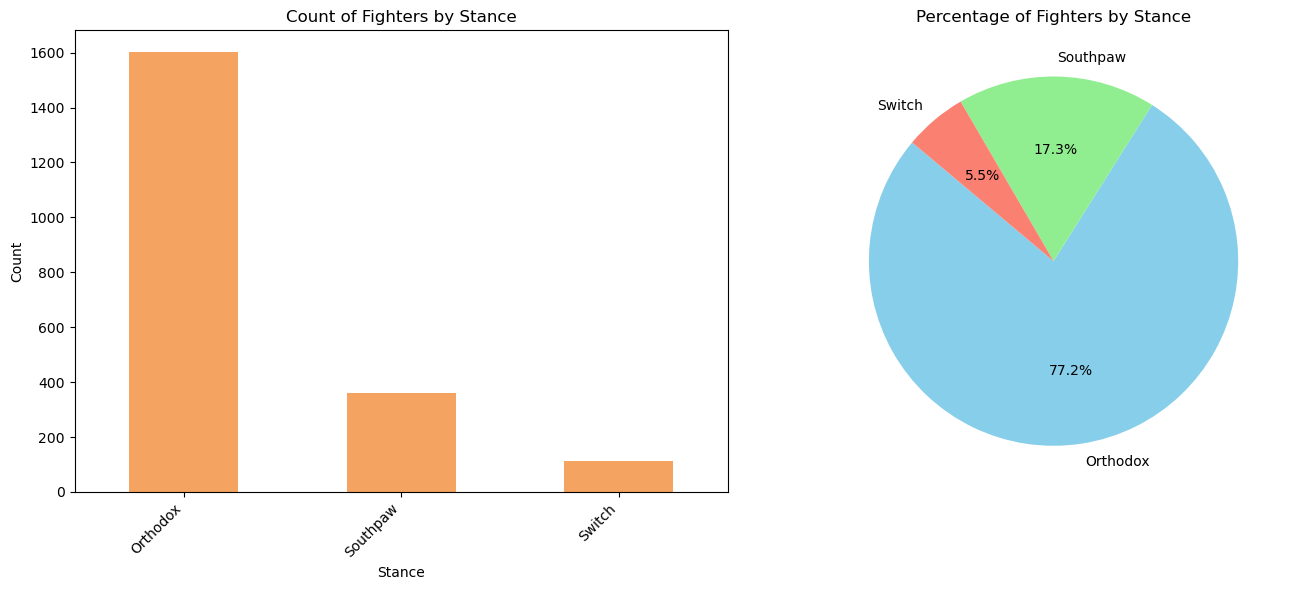

In [29]:
# Plotting the counts of the STANCE values
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Count plot
stance_count.plot(kind='bar', ax=ax[0], color='sandybrown')
ax[0].set_title('Count of Fighters by Stance')
ax[0].set_xlabel('Stance')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Percentage plot
stance_percentage.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax[1].set_ylabel('')
ax[1].set_title('Percentage of Fighters by Stance')

plt.tight_layout()
plt.show()

### Champions

In [30]:
# Looking at just champions
champion_records = records[(records['EVER_CHAMPION'] == 'Yes') | (records['EVER_INTERIM'] == 'Yes')]

champion_records.sort_values(by='Wins_with_Title', ascending=False, na_position='last')

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM  \
617              Jon Jones  Orthodox           Yes          Yes   
1262     Georges St-Pierre  Orthodox           Yes          Yes   
1174    Demetrious Johnson  Orthodox           Yes           No   
946         Anderson Silva  Southpaw           Yes           No   
527           Amanda Nunes  Orthodox           Yes           No   
...                    ...       ...           ...          ...   
873          Carlos Condit  Orthodox            No          Yes   
956   Germaine de Randamie  Orthodox           Yes           No   
1001           Yoel Romero  Southpaw            No          Yes   
1073         Nicco Montano  Southpaw           Yes           No   
2282       Kevin Randleman  Orthodox           Yes           No   

     EVER_CHALLENGER EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  \
617              Yes          Yes            74            23    21       1   
1262             Yes          Yes            71            22    20       2   
1174             Yes          Yes            69            18    15       2   
946              Yes          Yes            63            25    17       7   
527              Yes          Yes            47            18    16       2   
...              ...          ...           ...           ...   ...     ...   
873              Yes          Yes            54            19     9      10   
956              Yes          Yes            24             9     7       2   
1001             Yes          Yes            43            13     9       4   
1073             Yes          Yes             8             2     1       1   
2282             Yes          Yes            12             4     2       2   

      Draws  No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
617       0            1              5                  6               10   
1262      0            0              5                  3               12   
1174      1            0              2                  5                8   
946       0            1             11                  3                3   
527       0            0              7                  3                6   
...     ...          ...            ...                ...              ...   
873       0            0              5                  0                4   
956       0            0              3                  1                3   
1001      0            0              7                  0                2   
1073      0            0              0                  0                1   
2282      0            0              0                  0                2   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
617                0                   0                 0   
1262               1                   1                 0   
1174               0                   0                 2   
946                4                   0                 3   
527                1                   1                 0   
...              ...                 ...               ...   
873                1                   3                 6   
956                1                   0                 1   
1001               0                   0                 4   
1073               0                   0                 1   
2282               2                   0                 0   

      Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
617                      16.0             15.0                0.0   
1262                     15.0             13.0                2.0   
1174                     14.0             12.0                2.0   
946                      13.0             11.0                2.0   
527                      12.0             11.0                1.0   
...                       ...              ...                ...   
873                       3.0              1.0                2.0   
956                

In [31]:
# Champions make up about 4.5% of the fighter population
105/2317

0.045317220543806644

In [32]:
# Counting the values in the STANCE column
champion_stance_count = champion_records["STANCE"].value_counts()

# Calculating the percentage of each stance
champion_stance_percentage = champion_records["STANCE"].value_counts(normalize=True) * 100

# Combine count and percentage into a single DataFrame for a better display
champion_stance_summary = pd.DataFrame({'Count': champion_stance_count, 'Percentage': champion_stance_percentage})

champion_stance_summary

Count  Percentage
Orthodox     78   74.285714
Southpaw     20   19.047619
Switch        7    6.666667

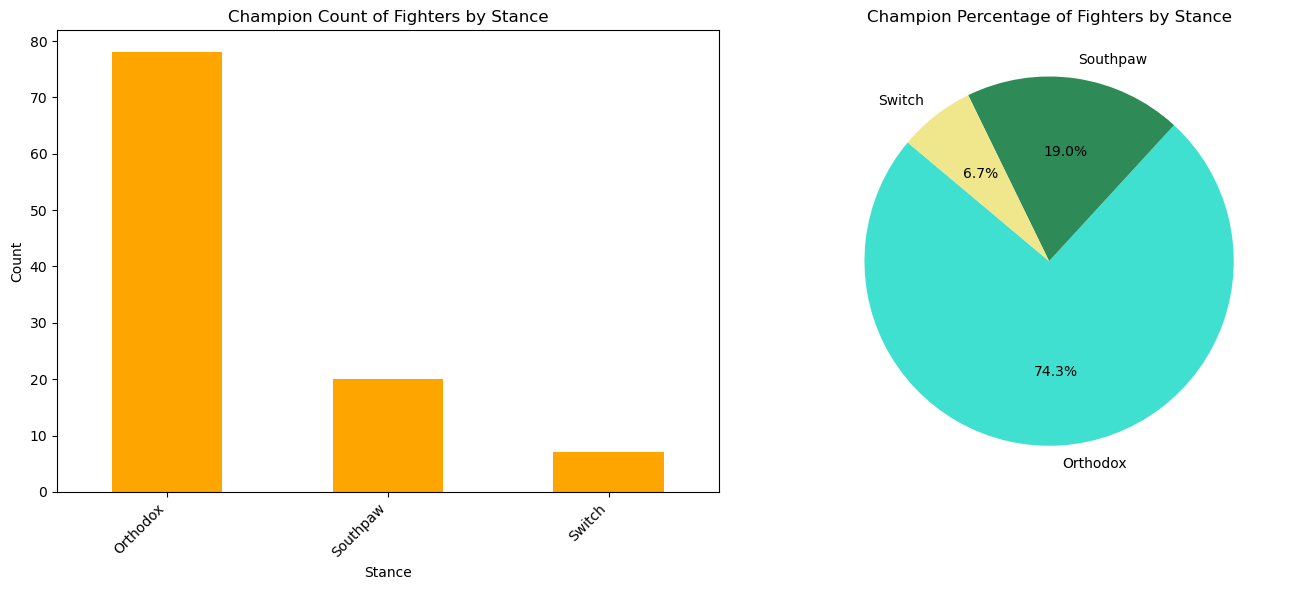

In [33]:
# Plotting the counts of the STANCE values
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Count plot
champion_stance_count.plot(kind='bar', ax=ax[0], color='orange')
ax[0].set_title('Champion Count of Fighters by Stance')
ax[0].set_xlabel('Stance')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Percentage plot
champion_stance_percentage.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', startangle=140, colors=['turquoise', 'seagreen', 'khaki', 'hotpink'])
ax[1].set_ylabel('')
ax[1].set_title('Champion Percentage of Fighters by Stance')

plt.tight_layout()
plt.show()

### Challengers

In [34]:
# Looking at just challengers
challenger_records = records[(records['EVER_CHALLENGER'] == 'Yes')]

challenger_records

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5       Dustin Poirier  Southpaw            No          Yes             Yes   
6        Gilbert Burns  Orthodox            No           No             Yes   
17    Rafael Dos Anjos  Southpaw           Yes           No             Yes   
22            Petr Yan    Switch           Yes          Yes             Yes   
26         Marlon Vera    Switch            No           No             Yes   
...                ...       ...           ...          ...             ...   
2277    Hayato Sakurai  Orthodox            No           No             Yes   
2278      Pat Miletich  Orthodox           Yes           No             Yes   
2282   Kevin Randleman  Orthodox           Yes           No             Yes   
2289        Yuki Kondo  Southpaw            No           No             Yes   
2296  Kenichi Yamamoto  Orthodox            No           No             Yes   

     EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  Draws  \
5             Yes            71            30    22       7      0   
6              No            57            22    15       7      0   
17            Yes           111            35    21      14      0   
22            Yes            45            13     9       4      0   
26             No            66            23    15       8      0   
...           ...           ...           ...   ...     ...    ...   
2277           No             4             1     0       1      0   
2278          Yes            10             5     3       2      0   
2282          Yes            12             4     2       2      0   
2289           No             7             3     1       2      0   
2296           No             2             1     0       1      0   

      No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
5               1             11                  4                7   
6               0              3                  5                7   
17              0              4                  5               12   
22              0              4                  0                5   
26              0              7                  4                4   
...           ...            ...                ...              ...   
2277            0              0                  0                0   
2278            0              1                  2                0   
2282            0              0                  0                2   
2289            0              1                  0                0   
2296            0              0                  0                0   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
5                  3                   3                 1   
6                  3                   0                 4   
17                 3                   1                10   
22                 0                   0                 3   
26                 0                   0                 8   
...              ...                 ...               ...   
2277               1                   0                 0   
2278               1                   1                 0   
2282               2                   0                 0   
2289               0                   1                 1   
2296               0                   1                 0   

      Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
5                         3.0              1.0                2.0   
6                         1.0              0.0                1.0   
17                        4.0              2.0                2.0   
22                        4.0              2.0                2.0   
26                        1.0              0.0                1.0   
...                       ...              ...                ...   
2277                      1.0              0.0                1.0   
2278                      3.0              2.0                1

In [35]:
# Challengers make up about 9.5% of the fighter population
221/2317

0.0953819594302978

In [36]:
# Counting the values in the STANCE column
challenger_stance_count = challenger_records["STANCE"].value_counts()

# Calculating the percentage of each stance
challenger_stance_percentage = challenger_records["STANCE"].value_counts(normalize=True) * 100

# Combine count and percentage into a single DataFrame for a better display
challenger_stance_summary = pd.DataFrame({'Count': challenger_stance_count, 'Percentage': challenger_stance_percentage})

challenger_stance_summary

Count  Percentage
Orthodox    163   73.755656
Southpaw     46   20.814480
Switch       12    5.429864

### Top 1 Percent

In [37]:

top_1 = records[records['FIGHTER'].isin(top_1_percent_list)]

top_1

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5        Dustin Poirier  Southpaw            No          Yes             Yes   
181          Jim Miller  Southpaw            No           No              No   
617           Jon Jones  Orthodox           Yes          Yes             Yes   
748      Donald Cerrone  Orthodox            No           No             Yes   
871     Jeremy Stephens  Orthodox            No           No              No   
874      Conor McGregor  Southpaw           Yes          Yes             Yes   
884         Demian Maia  Southpaw            No           No             Yes   
946      Anderson Silva  Southpaw           Yes           No             Yes   
958       Diego Sanchez  Southpaw            No           No             Yes   
1261    Johny Hendricks  Southpaw           Yes           No             Yes   
1262  Georges St-Pierre  Orthodox           Yes          Yes             Yes   
1431          Frank Mir  Southpaw           Yes          Yes             Yes   
1785          Jon Fitch  Orthodox            No           No             Yes   

     EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  Draws  \
5             Yes            71            30    22       7      0   
181            No            96            43    26      16      0   
617           Yes            74            23    21       1      0   
748            No            81            38    23      14      0   
871            No            86            34    15      18      0   
874           Yes            28            14    10       4      0   
884            No            89            33    22      11      0   
946           Yes            63            25    17       7      0   
958            No            84            32    19      13      0   
1261          Yes            56            21    13       8      0   
1262          Yes            71            22    20       2      0   
1431          Yes            43            27    16      11      0   
1785           No            50            18    14       3      1   

      No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
5               1             11                  4                7   
181             1              6                 12                8   
617             1              5                  6               10   
748             1             10                  6                7   
871             1              8                  0                7   
874             0              8                  0                2   
884             0              1                 11               10   
946             1             11                  3                3   
958             0              6                  0               12   
1261            0              5                  0                8   
1262            0              5                  3               12   
1431            0              5                  8                2   
1785            0              1                  3               10   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
5                  3                   3                 1   
181                2                   3                11   
617                0                   0                 0   
748                8                   1                 5   
871                3                   3                12   
874                2                   2                 0   
884                2                   0                 9   
946                4                   0                 3   
958                4                   0                 9   
1261               3                   0                 5   
1262               1                   1                 0   
1431               8                   0                 3   
1785               1                   0                 2   

      Total_Fights_with_Title  Wins_

In [38]:
# Counting the values in the STANCE column
top_1_stance_count = top_1["STANCE"].value_counts()

# Calculating the percentage of each stance
top_1_stance_percentage = top_1["STANCE"].value_counts(normalize=True) * 100

# Combine count and percentage into a single DataFrame for a better display
top_1_stance_summary = pd.DataFrame({'Count': top_1_stance_count, 'Percentage': top_1_stance_percentage})

top_1_stance_summary

Count  Percentage
Southpaw      8   61.538462
Orthodox      5   38.461538

### Top 10 Percent

In [39]:
top_10 = records[records['FIGHTER'].isin(top_10_percent_list)]

top_10

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5       Dustin Poirier  Southpaw            No          Yes             Yes   
17    Rafael Dos Anjos  Southpaw           Yes           No             Yes   
100       Brad Tavares  Orthodox            No           No              No   
115        Max Griffin  Orthodox            No           No              No   
142         Drew Dober  Southpaw            No           No              No   
...                ...       ...           ...          ...             ...   
1912     Randy Couture  Orthodox           Yes          Yes             Yes   
1918   Kurt Pellegrino  Orthodox            No           No              No   
1919   Ricardo Almeida  Orthodox            No           No              No   
1973     Keith Jardine  Orthodox            No           No              No   
1974     Chuck Liddell  Orthodox           Yes           No             Yes   

     EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  Draws  \
5             Yes            71            30    22       7      0   
17            Yes           111            35    21      14      0   
100            No            65            24    15       9      0   
115            No            44            16     8       8      0   
142            No            46            23    13       9      0   
...           ...           ...           ...   ...     ...    ...   
1912          Yes            57            20    12       8      0   
1918           No            28            12     7       5      0   
1919           No            25            11     6       5      0   
1973           No            30            13     6       7      0   
1974          Yes            42            20    14       6      0   

      No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
5               1             11                  4                7   
17              0              4                  5               12   
100             0              2                  0               13   
115             0              3                  0                5   
142             1              9                  1                3   
...           ...            ...                ...              ...   
1912            0              5                  3                4   
1918            0              1                  4                2   
1919            0              0                  3                3   
1973            0              2                  0                4   
1974            0              9                  0                5   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
5                  3                   3                 1   
17                 3                   1                10   
100                5                   0                 4   
115                1                   0                 7   
142                1                   4                 4   
...              ...                 ...               ...   
1912               7                   0                 1   
1918               0                   2                 3   
1919               1                   1                 2   
1973               4                   0                 3   
1974               5                   0                 1   

      Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
5                         3.0              1.0                2.0   
17                        4.0              2.0                2.0   
100                       0.0              0.0                0.0   
115                       0.0              0.0                0.0   
142                       0.0              0.0                0.0   
...                       ...              ...                ...   
1912                     14.0              8.0                6.0   
1918                      0.0              0.0                0

In [40]:
# Counting the values in the STANCE column
top_10_stance_count = top_10["STANCE"].value_counts()

# Calculating the percentage of each stance
top_10_stance_percentage = top_10["STANCE"].value_counts(normalize=True) * 100

# Combine count and percentage into a single DataFrame for a better display
top_10_stance_summary = pd.DataFrame({'Count': top_10_stance_count, 'Percentage': top_10_stance_percentage})

top_10_stance_summary

Count  Percentage
Orthodox    107   77.536232
Southpaw     28   20.289855
Switch        3    2.173913

### Clustering

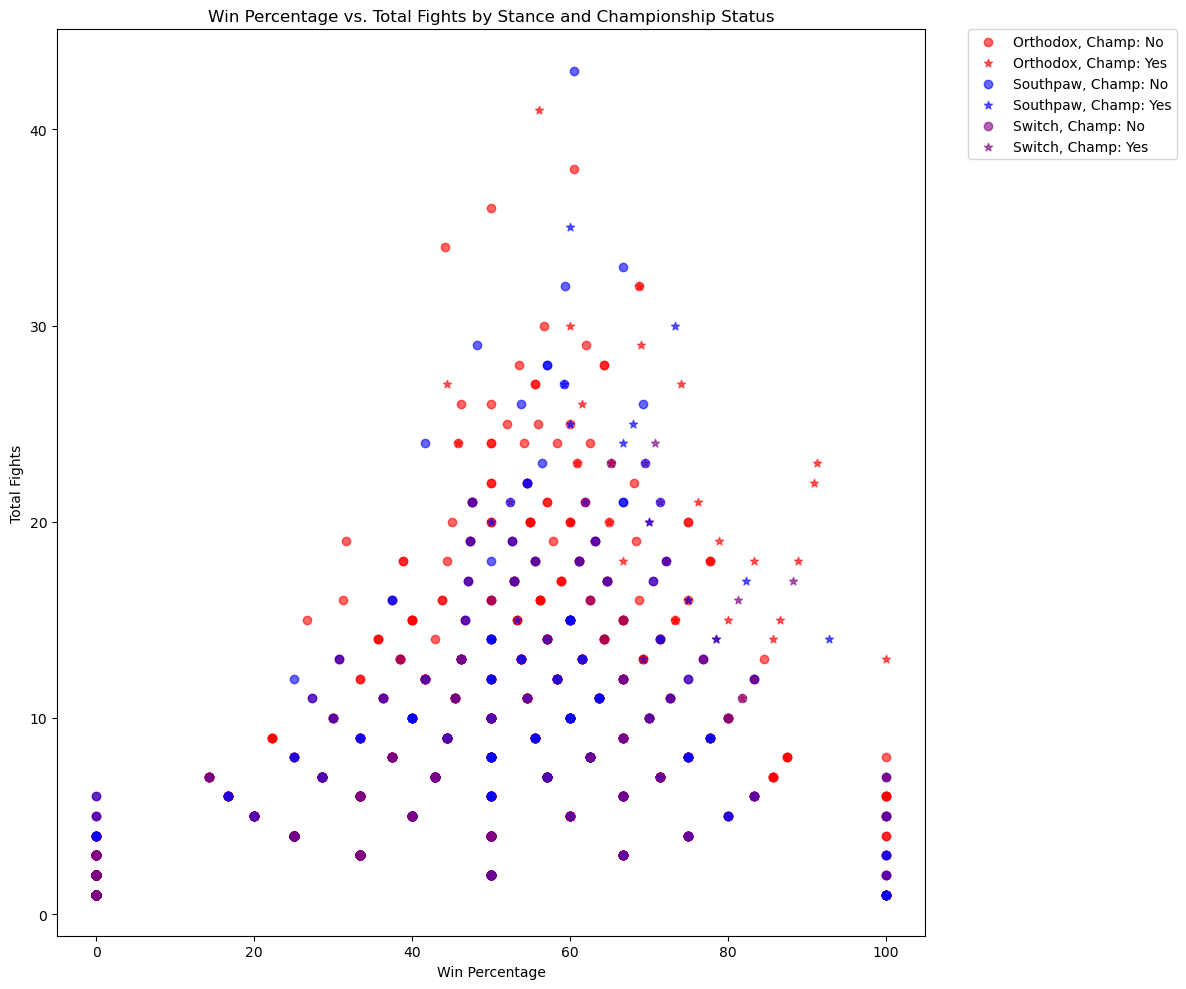

In [41]:
# Remove rows with nulls in 'STANCE' column
cleaned_data = records.dropna(subset=['STANCE'])

# Define color map for stances
color_map = {
    'Orthodox': 'red',
    'Southpaw': 'blue',
    'Switch': 'purple'
}


# Adjusting the figure size for a bigger plot
fig, ax = plt.subplots(figsize=(12, 10))  # Increased figure size
for stance, df_group in cleaned_data.groupby('STANCE'):
    for champ, df_champ in df_group.groupby('EITHER_CHAMP'):
        marker = '*' if champ == 'Yes' else 'o'
        color = color_map.get(stance, 'gray')  # Use the defined color map
        ax.scatter(df_champ['Win_%'], df_champ['Total_Fights'], label=f"{stance}, Champ: {champ}", color=color, alpha=0.6, marker=marker)

# Customize the plot
ax.set_xlabel('Win Percentage')
ax.set_ylabel('Total Fights')
ax.set_title('Win Percentage vs. Total Fights by Stance and Championship Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

plt.show()

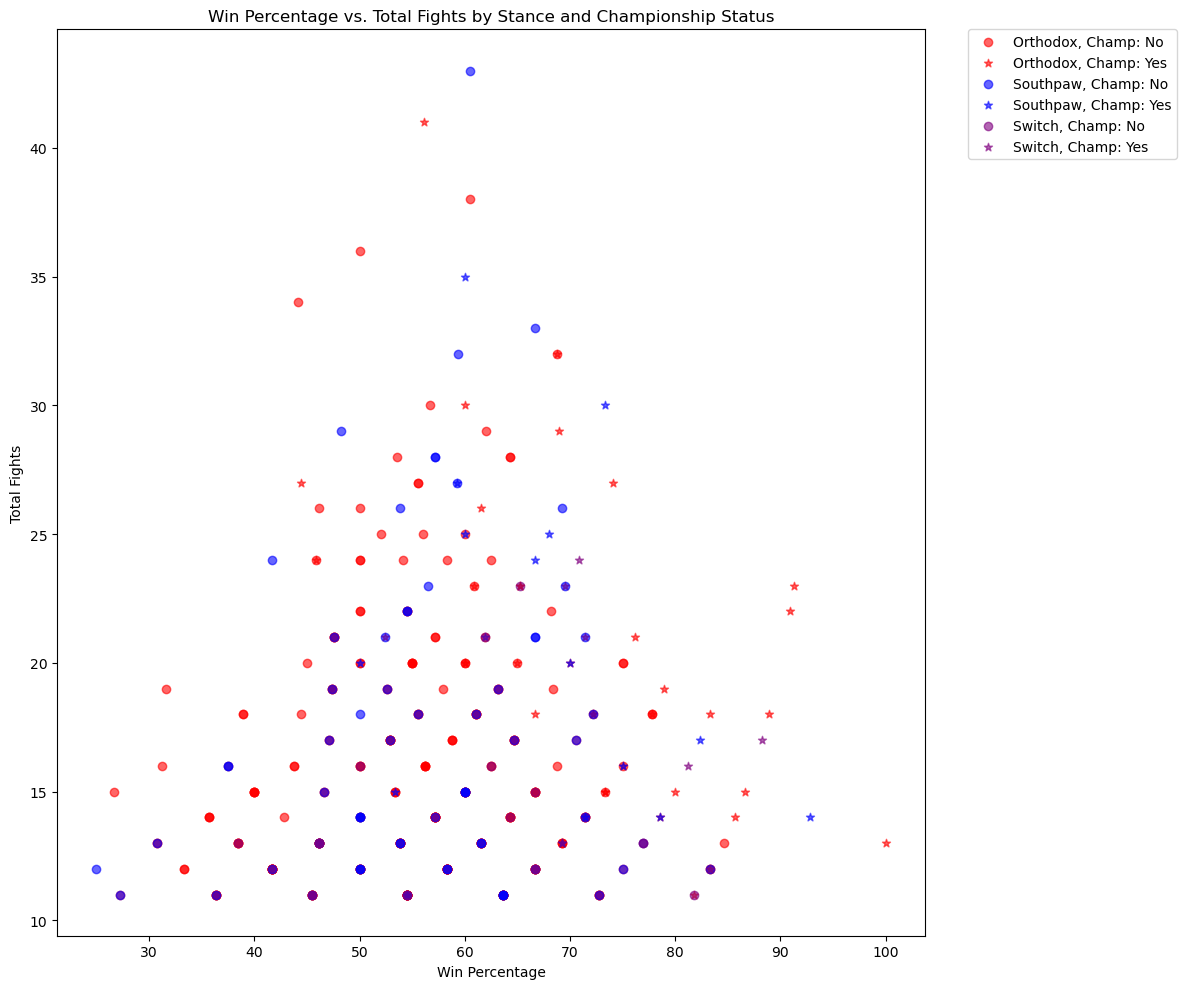

In [42]:
# Filter the dataframe for Total_Fights greater than 10
df_ten= cleaned_data[cleaned_data['Total_Fights'] > 10]

# Adjusting the figure size for a bigger plot
fig, ax = plt.subplots(figsize=(12, 10))  # Increased figure size
for stance, df_group in df_ten.groupby('STANCE'):
    for champ, df_champ in df_group.groupby('EITHER_CHAMP'):
        marker = '*' if champ == 'Yes' else 'o'
        color = color_map.get(stance, 'gray')  # Use the defined color map
        ax.scatter(df_champ['Win_%'], df_champ['Total_Fights'], label=f"{stance}, Champ: {champ}", color=color, alpha=0.6, marker=marker)

# Customize the plot
ax.set_xlabel('Win Percentage')
ax.set_ylabel('Total Fights')
ax.set_title('Win Percentage vs. Total Fights by Stance and Championship Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

plt.show()

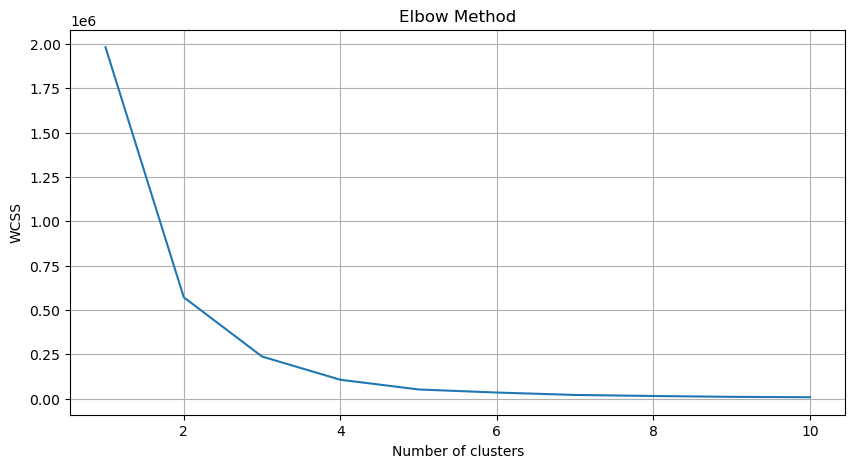

In [43]:
# Prepare the data for clustering
X = records[['Win_%']].dropna()  # Removing rows with NaN in 'Win_%' to avoid errors during clustering

# Elbow method to find the optimal number of clusters
wcss = []  # Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'elbow'
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.grid(True)
plt.show()

In [44]:
# Proceed with K-means clustering using an example choice of 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Assigning cluster labels to the data
X['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with cluster labels
X.head()

Win_%  Cluster
0  100.000000        2
1   50.000000        0
2   72.222222        2
3   85.714286        2
4   71.428571        2

In [45]:
# Prepare the data for clustering including both 'Win_%' and 'Total_Fights'
X_multi = records[['Win_%', 'Total_Fights']].dropna()  # Removing rows with NaN to avoid errors during clustering

# Applying K-means clustering with 3 clusters as a starting example
kmeans_multi = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_multi.fit(X_multi)

# Assigning cluster labels to the data
X_multi['Cluster'] = kmeans_multi.labels_

# Display the first few rows of the dataframe with cluster labels
X_multi.head()

Win_%  Total_Fights  Cluster
0  100.000000             1        2
1   50.000000             6        1
2   72.222222            18        2
3   85.714286             7        2
4   71.428571             7        2

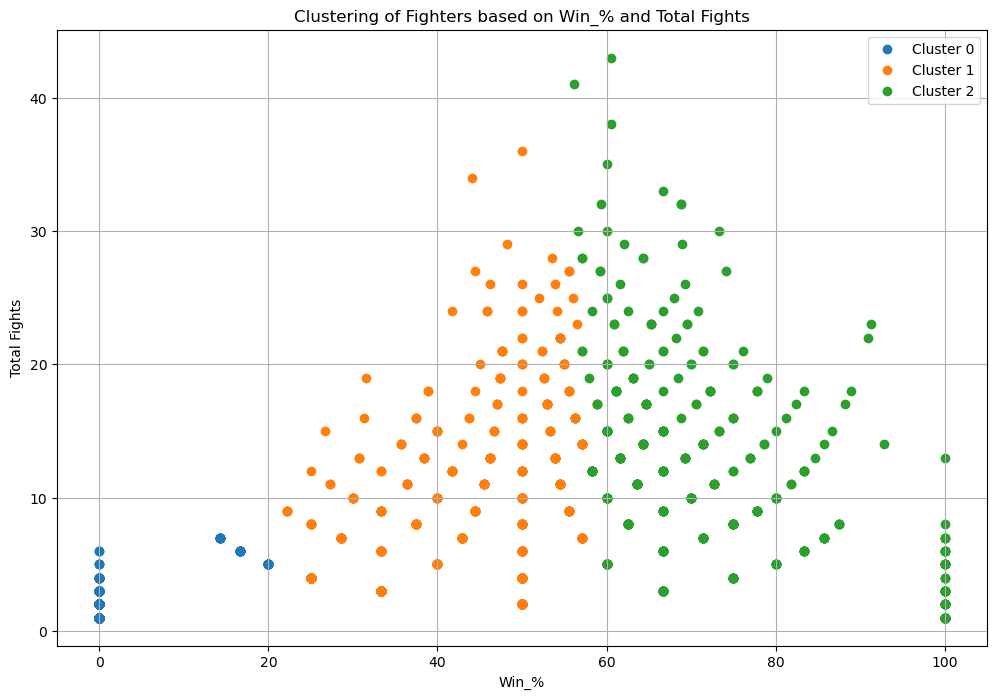

In [46]:
# Let's visualize the clustering on a scatter plot with 'Win_%' on the x-axis and 'Total_Fights' on the y-axis.
plt.figure(figsize=(12, 8))

# Scatter plot for clusters
for cluster in set(kmeans_multi.labels_):
    filtered_data = X_multi[X_multi['Cluster'] == cluster]
    plt.scatter(filtered_data['Win_%'], filtered_data['Total_Fights'], label=f'Cluster {cluster}')

plt.title('Clustering of Fighters based on Win_% and Total Fights')
plt.xlabel('Win_%')
plt.ylabel('Total Fights')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Calculating the average Total_Fights and Win_% by STANCE
average_stats_by_stance = cleaned_data.groupby('STANCE')[['Total_Fights', 'Win_%']].mean()

average_stats_by_stance

Total_Fights      Win_%
STANCE                           
Orthodox      6.623985  35.409997
Southpaw      7.825000  39.094968
Switch        6.105263  36.037242

In [48]:
# Calculating the average Total_Fights and Win_% by STANCE
average_stats_by_stance = records.groupby('STANCE')[['Total_Fights', 'Win_%']].mean()

# Grouping by STANCE, summing Total Wins and Total Fights
sum_stats_by_stance = records.groupby('STANCE')[['Wins', 'Total_Fights']].sum()

# Creating a new column 'Win_%' by dividing Wins by Total_Fights in the summed data
sum_stats_by_stance['Win_%'] = (sum_stats_by_stance['Wins'] / sum_stats_by_stance['Total_Fights']) * 100

sum_stats_by_stance

Wins  Total_Fights      Win_%
STANCE                                 
Orthodox  5145         10605  48.514851
Southpaw  1452          2817  51.544196
Switch     357           696  51.293103

In [49]:
# Calculate the correlation between Win_% and Total_Fights
correlation = records['Win_%'].corr(records['Total_Fights'])
correlation

0.4608597384904863

In [50]:
# Calculate the correlation of Win_% to Total_Fights for each value in STANCE
correlation_by_stance = records.groupby('STANCE')['Win_%', 'Total_Fights'].corr().iloc[0::2,-1].reset_index()

# Rename columns for clarity
correlation_by_stance.columns = ['STANCE', 'Measurement', 'Correlation']
correlation_by_stance = correlation_by_stance.drop('Measurement', axis=1)

correlation_by_stance

/var/folders/_6/_1qflrx12_j4kc3ssfs46ldw0000gn/T/ipykernel_2835/3902886768.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_by_stance = records.groupby('STANCE')['Win_%', 'Total_Fights'].corr().iloc[0::2,-1].reset_index()


STANCE  Correlation
0  Orthodox     0.550111
1  Southpaw     0.517370
2    Switch     0.675876

### Records

In [51]:
# Filter out rows where 'STANCE' is null and then analyze the relationship between 'STANCE' and 'Wins'
filtered_data = records.dropna(subset=['STANCE'])

# Since 'STANCE' is a categorical variable and 'Wins' is numerical, we'll use one-hot encoding for 'STANCE' to perform correlation analysis
stance_dummies = pd.get_dummies(filtered_data['STANCE'])

# Join the encoded stance data with the 'Wins' column
stance_wins_data = stance_dummies.join(filtered_data['Wins'])

# Calculate correlation between stance types and wins
correlation_matrix = stance_wins_data.corr().loc[['Wins']]

correlation_matrix

Orthodox  Southpaw    Switch  Wins
Wins -0.063166  0.077987 -0.013224   1.0

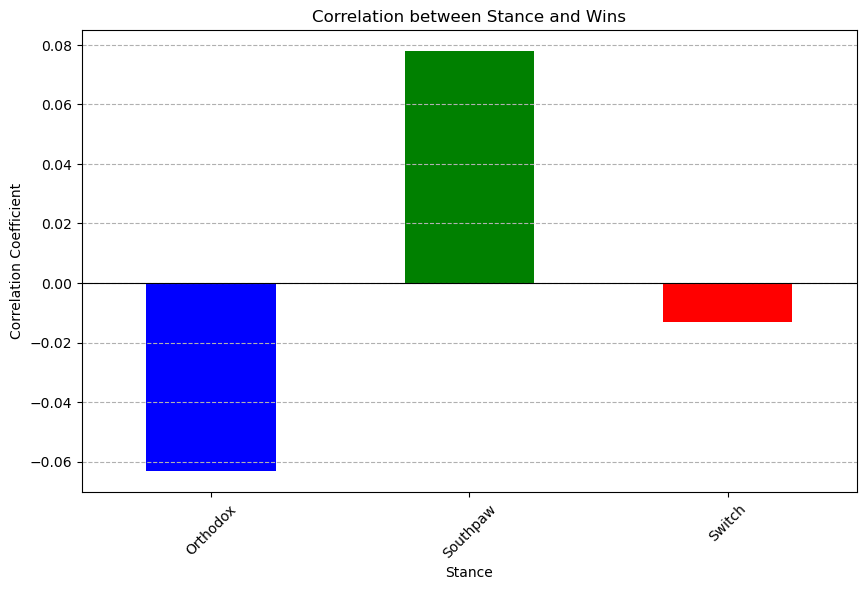

In [52]:
# For visualization, we'll create a bar plot to show the correlation of each stance with wins.

# Extracting correlation values excluding the last one (Wins with itself)
correlation_values = correlation_matrix.drop(columns=['Wins']).iloc[0]

# Plotting
plt.figure(figsize=(10, 6))
correlation_values.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Correlation between Stance and Wins')
plt.xlabel('Stance')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.8)  # Line to indicate zero correlation
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


In [53]:

# We need to merge the cluster labels back into the original dataset to associate each fighter with their cluster.
# We'll join on the index after ensuring it's aligned between the datasets.
data_with_clusters = records.join(X_multi['Cluster'], how='inner')

# Now we'll filter out rows where 'STANCE' is null to focus on Orthodox, Southpaw, and Switch only.
data_with_clusters_no_nulls = data_with_clusters.dropna(subset=['STANCE'])

# Group by cluster and stance, then count the number of fighters in each category.
stance_distribution_by_cluster = data_with_clusters_no_nulls.groupby(['Cluster', 'STANCE']).size().unstack(fill_value=0)

stance_distribution_by_cluster

STANCE   Orthodox  Southpaw  Switch
Cluster                            
0             491        96      36
1             753       166      49
2             357        98      29

In [54]:
# Calculate the percentage of each stance within each cluster
stance_percentage_by_cluster = stance_distribution_by_cluster.div(stance_distribution_by_cluster.sum(axis=1), axis=0) * 100

stance_percentage_by_cluster

STANCE    Orthodox   Southpaw    Switch
Cluster                                
0        78.812199  15.409310  5.778491
1        77.789256  17.148760  5.061983
2        73.760331  20.247934  5.991736

## Exploratory

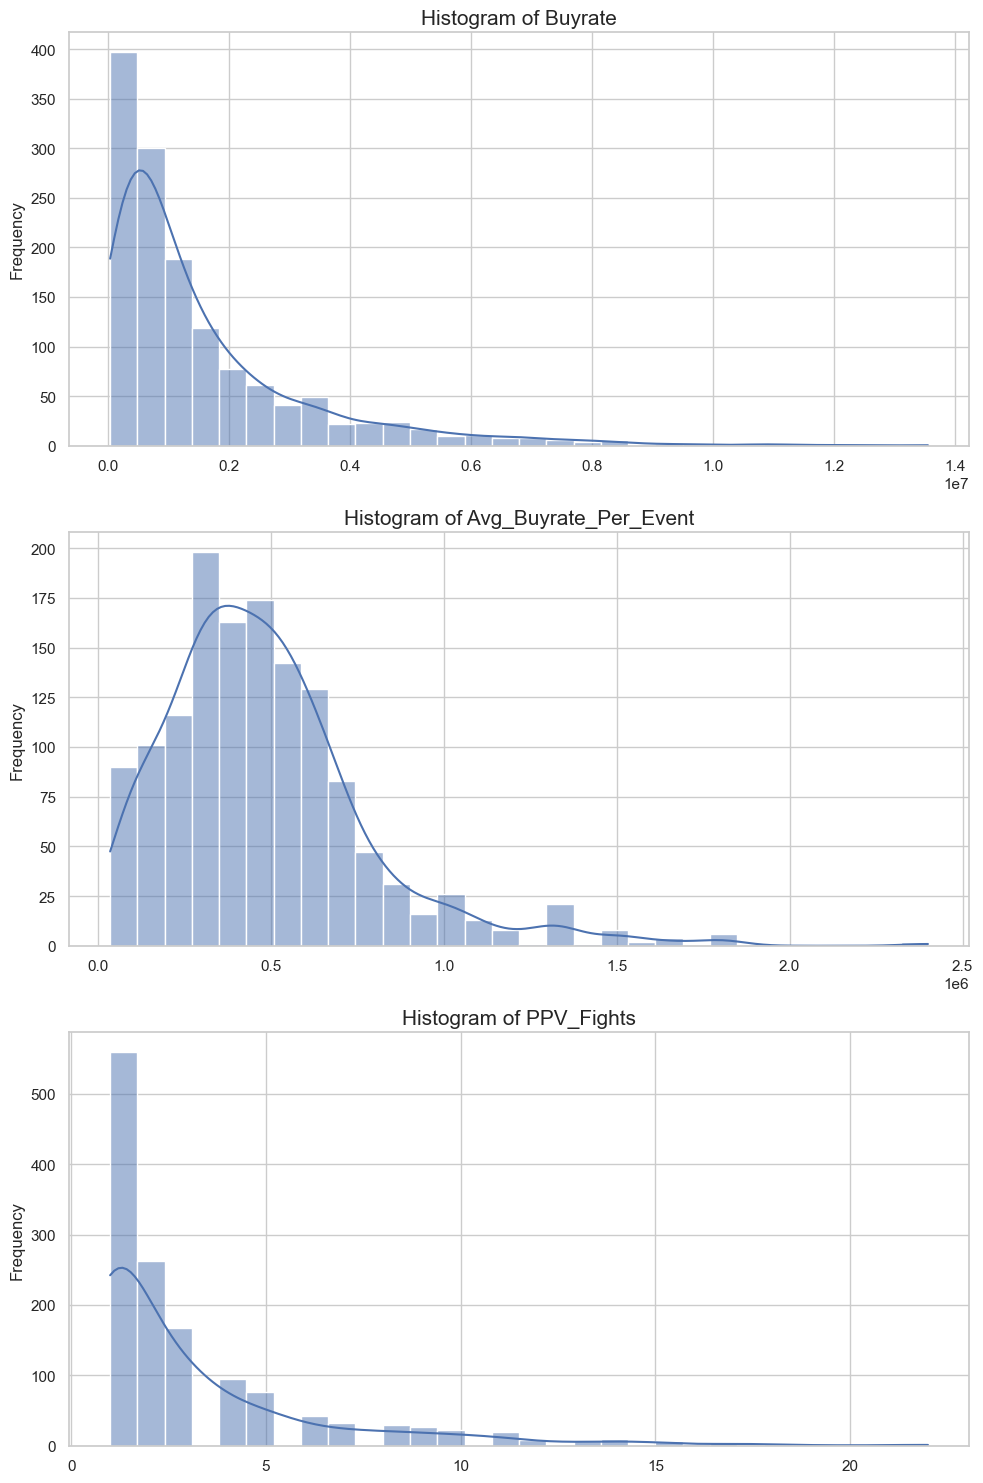

In [55]:
# Hsitograms

data = fb

# Setting up the visualization environment
sns.set(style="whitegrid")

# Creating histograms for numerical columns
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

numerical_cols = ['Buyrate', 'Avg_Buyrate_Per_Event', 'PPV_Fights']
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], bins=30, ax=ax[i], kde=True)
    ax[i].set_title(f'Histogram of {col}', fontsize=15)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


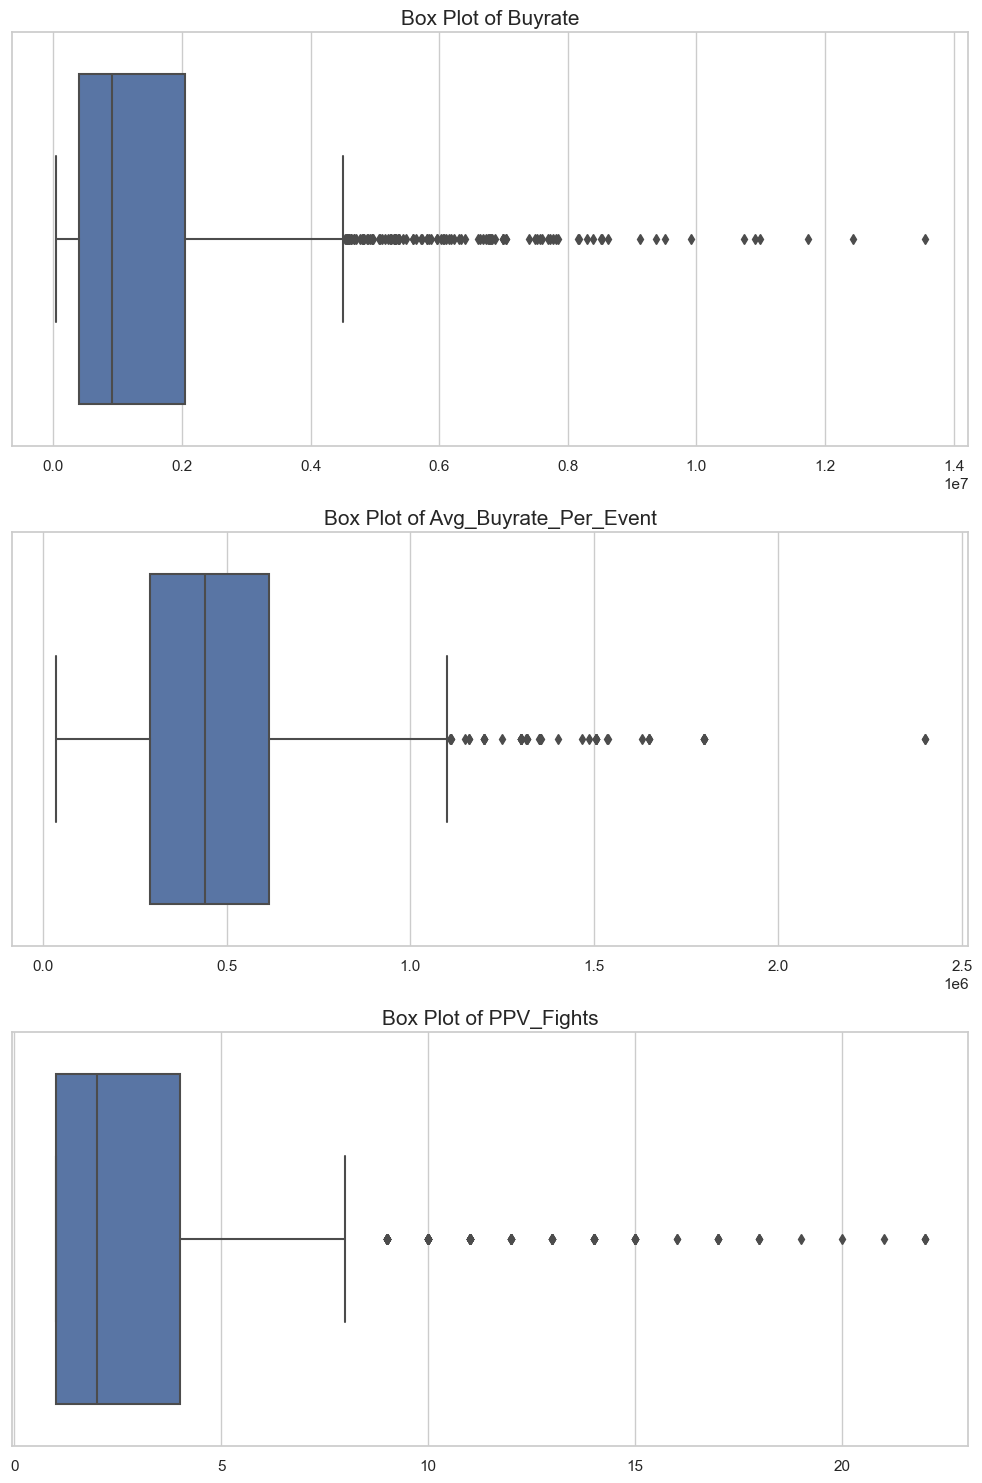

In [56]:
# Creating box plots for numerical columns
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col], ax=ax[i])
    ax[i].set_title(f'Box Plot of {col}', fontsize=15)
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()


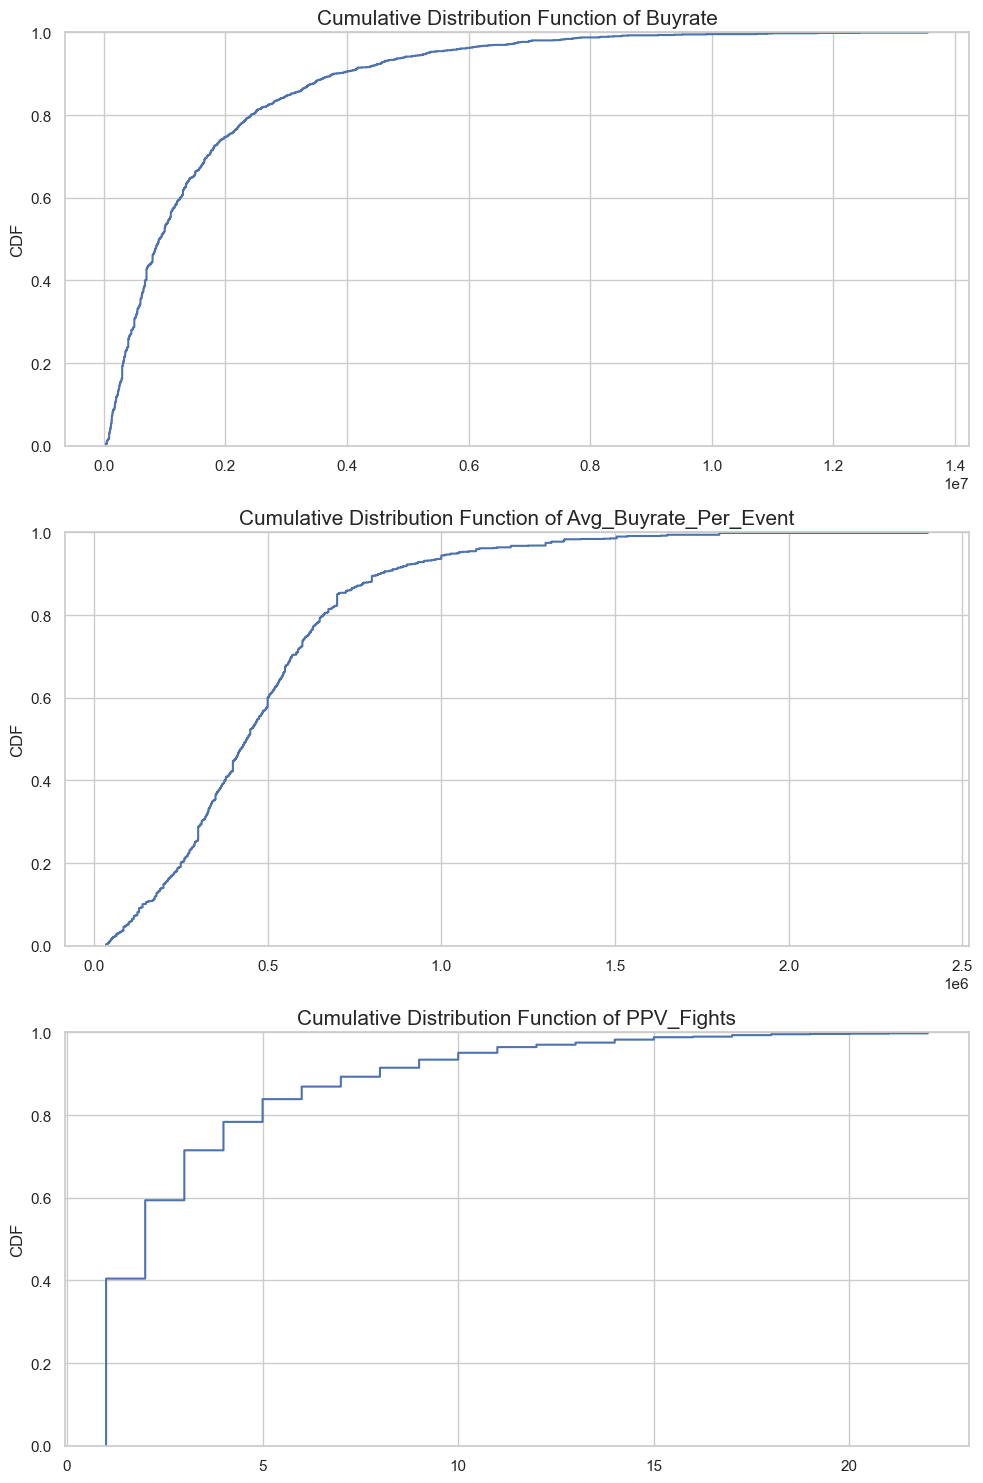

In [57]:
# Cumulative Distribution Function

# Creating CDFs for numerical columns
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

for i, col in enumerate(numerical_cols):
    sns.ecdfplot(data[col], ax=ax[i])
    ax[i].set_title(f'Cumulative Distribution Function of {col}', fontsize=15)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('CDF')

plt.tight_layout()
plt.show()


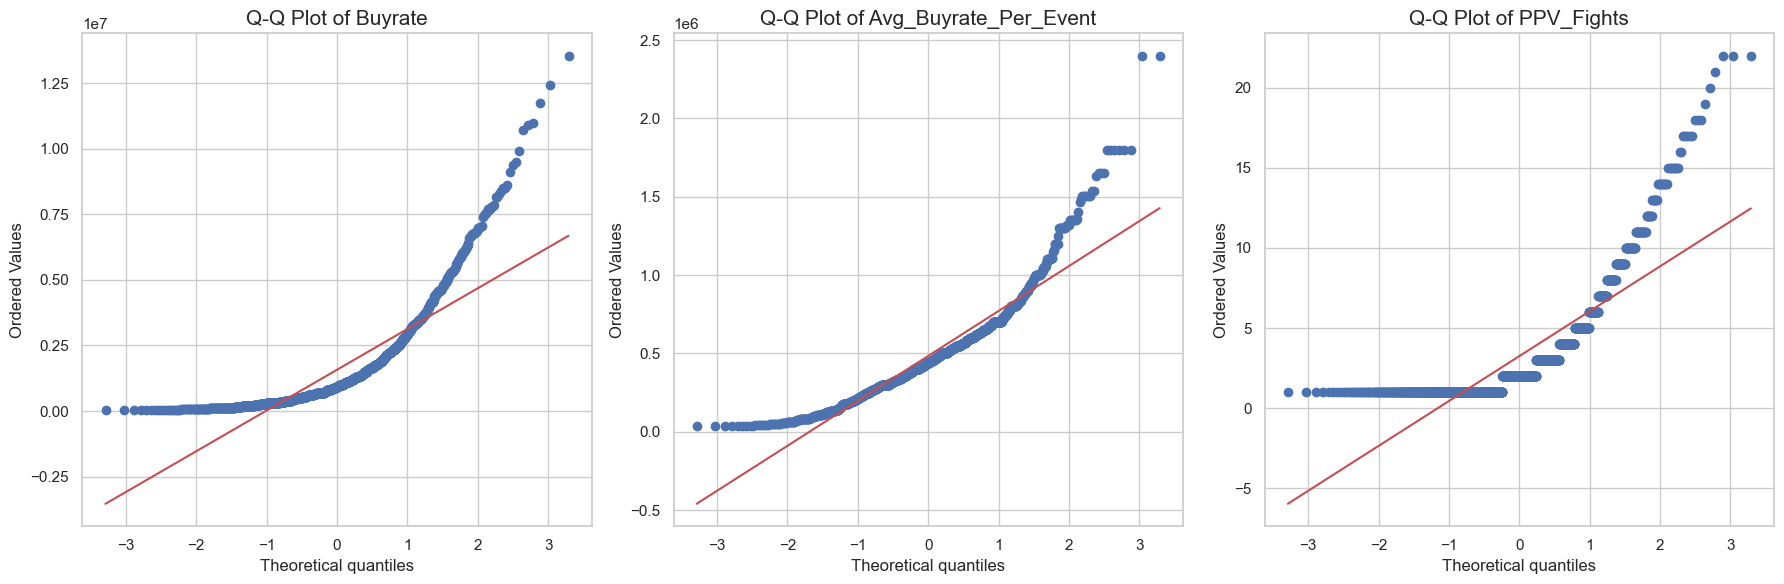

In [58]:
# Scatterplot

# Creating Q-Q plots for numerical columns
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numerical_cols):
    stats.probplot(data[col].dropna(), dist="norm", plot=ax[i])
    ax[i].set_title(f'Q-Q Plot of {col}', fontsize=15)

plt.tight_layout()
plt.show()


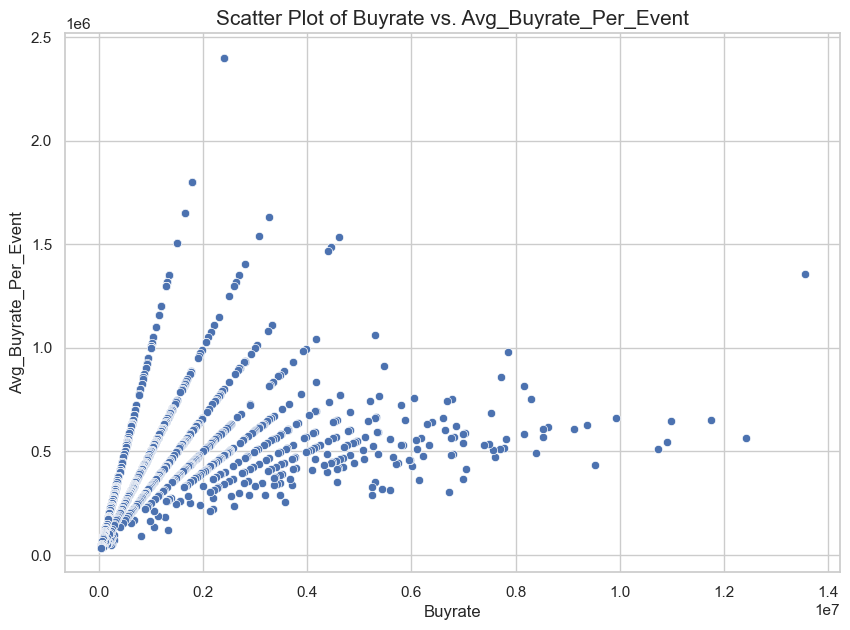

In [59]:
# Scatter plot for Buyrate vs. Avg_Buyrate_Per_Event
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Buyrate', y='Avg_Buyrate_Per_Event', data=data)
plt.title('Scatter Plot of Buyrate vs. Avg_Buyrate_Per_Event', fontsize=15)
plt.xlabel('Buyrate')
plt.ylabel('Avg_Buyrate_Per_Event')
plt.show()


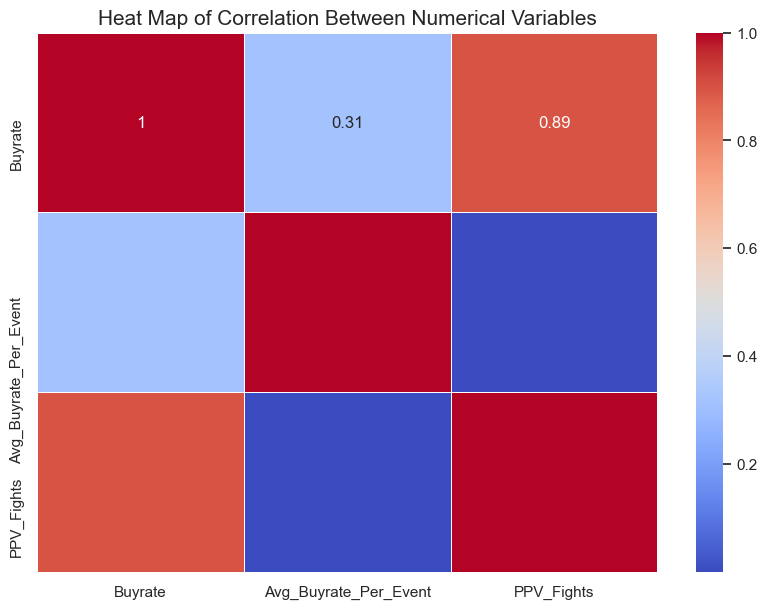

In [60]:
# Calculating the correlation matrix
corr_matrix = data[numerical_cols].corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heat Map of Correlation Between Numerical Variables', fontsize=15)
plt.show()

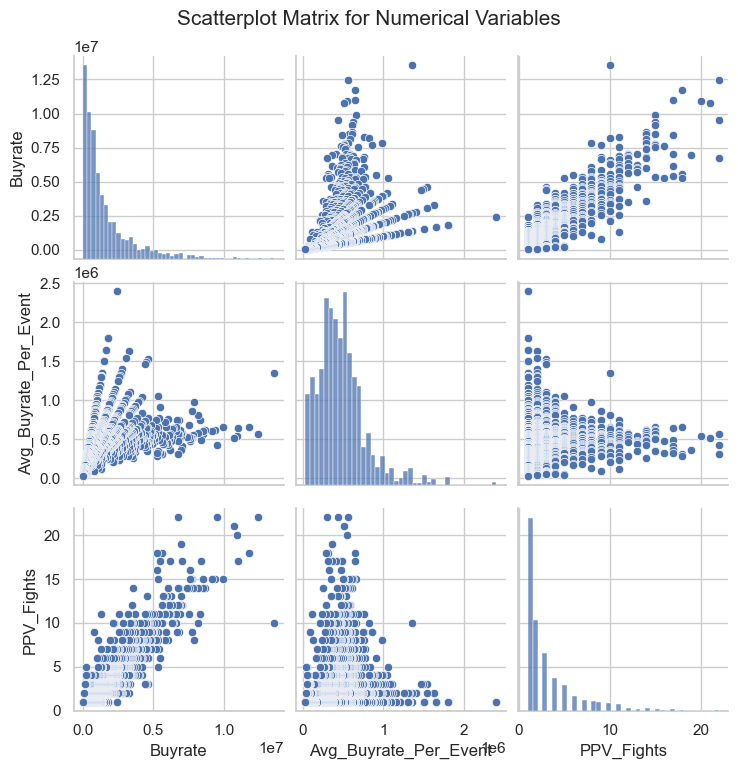

In [61]:
# Creating a scatterplot matrix for the numerical columns
sns.pairplot(data[numerical_cols].dropna())
plt.suptitle('Scatterplot Matrix for Numerical Variables', size=15, y=1.02)
plt.show()

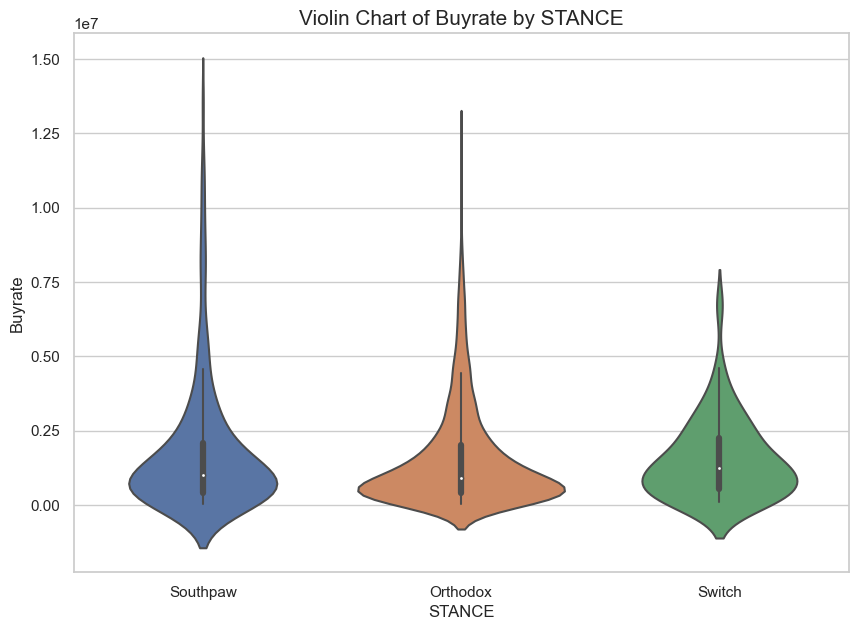

In [62]:
# Creating a violin chart for Buyrate across different STANCE categories
plt.figure(figsize=(10, 7))
sns.violinplot(x='STANCE', y='Buyrate', data=data)
plt.title('Violin Chart of Buyrate by STANCE', fontsize=15)
plt.xlabel('STANCE')
plt.ylabel('Buyrate')
plt.show()


## Distributions

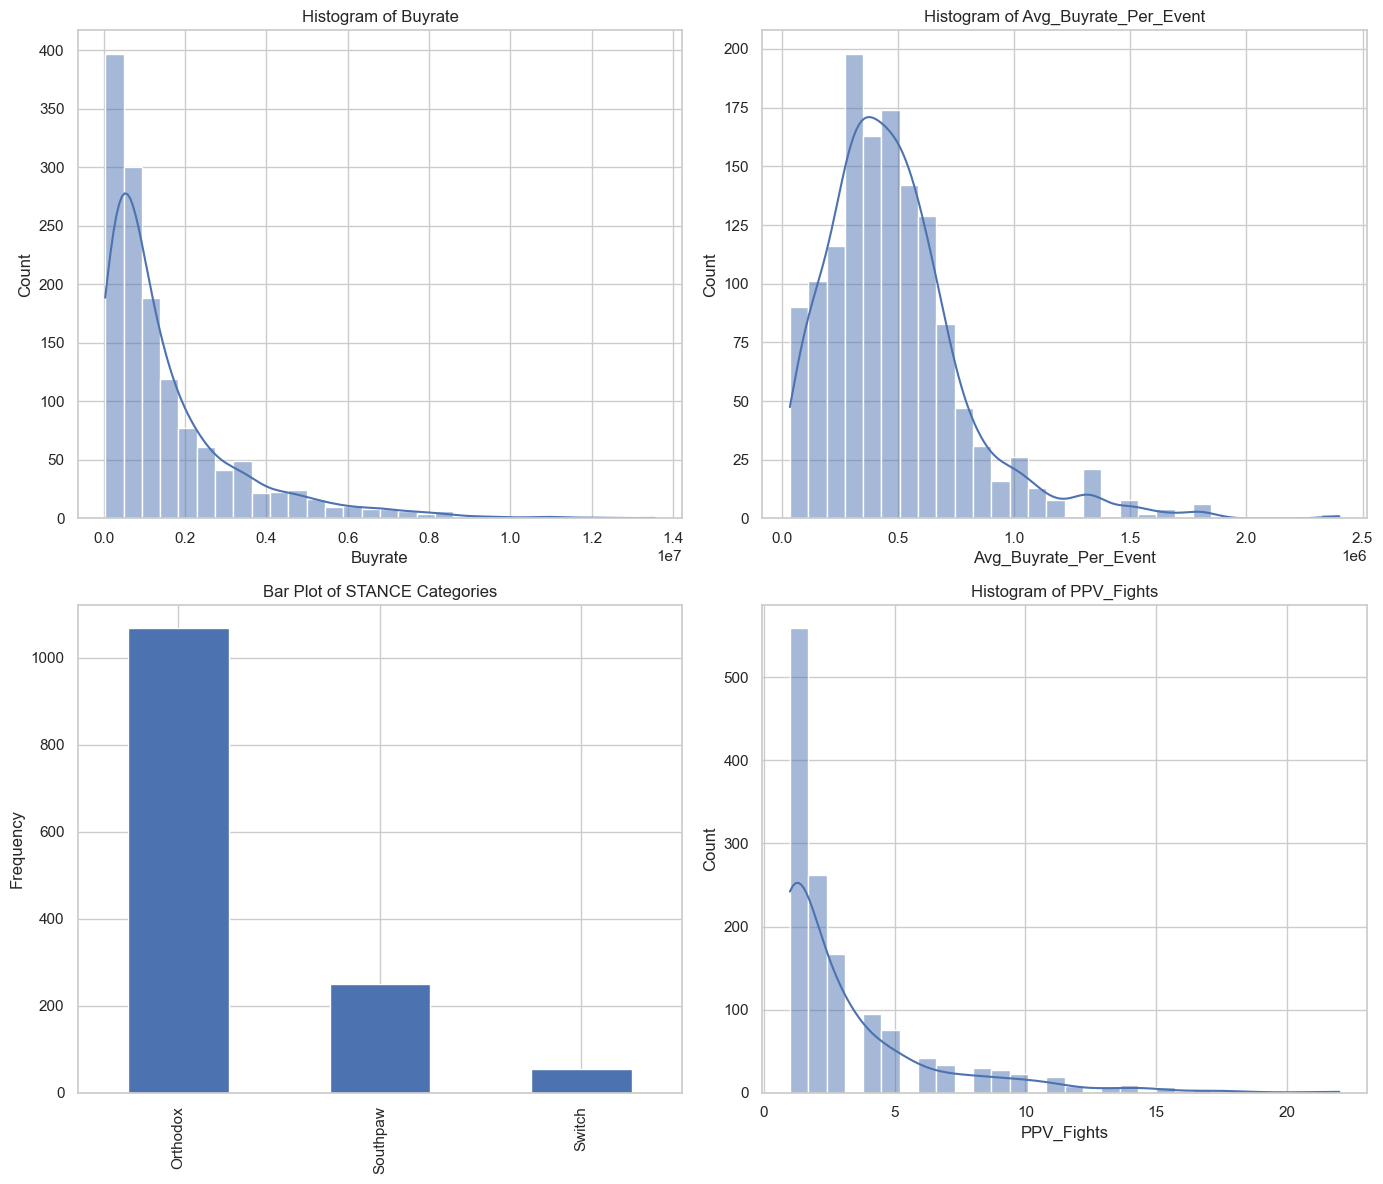

In [63]:
# Visualizing distributions for numerical and categorical variables

# Setting up the visualization environment
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Numerical distributions: Histograms for Buyrate and Avg_Buyrate_Per_Event to show potential skewness
sns.histplot(data['Buyrate'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Histogram of Buyrate', fontsize=12)

sns.histplot(data['Avg_Buyrate_Per_Event'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Histogram of Avg_Buyrate_Per_Event', fontsize=12)

# Categorical distribution: Bar plot for STANCE
stance_counts = data['STANCE'].value_counts()
stance_counts.plot(kind='bar', ax=ax[1, 0])
ax[1, 0].set_title('Bar Plot of STANCE Categories', fontsize=12)
ax[1, 0].set_ylabel('Frequency')

# Checking for bimodality: Histogram for PPV_Fights
sns.histplot(data['PPV_Fights'], bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Histogram of PPV_Fights', fontsize=12)

plt.tight_layout()
plt.show()


## Statistical Experiments

In [64]:
# Filtering the dataset for champions and non-champions based on the 'EVER_CHAMPION' column
champions = data[data['EVER_CHAMPION'] == 'Yes']['Buyrate'].dropna()
non_champions = data[data['EVER_CHAMPION'] == 'No']['Buyrate'].dropna()

# Performing a t-test between the two groups
t_stat, p_value = ttest_ind(champions, non_champions, equal_var=False)  # Assuming unequal variances

# Results
t_stat, p_value


(8.931855956063758, 3.611960344837494e-14)

In [65]:
# Aligning the data by dropping rows where either 'Buyrate' or 'PPV_Fights' is NaN
aligned_data = data.dropna(subset=['Buyrate', 'PPV_Fights'])

# Recalculating the correlation coefficient
correlation_coefficient, p_value_corr = stats.pearsonr(aligned_data['Buyrate'], aligned_data['PPV_Fights'])

correlation_coefficient, p_value_corr


(0.8949544756238267, 0.0)

In [66]:
# Filtering the data for different stances and their buyrates
stances = data['STANCE'].dropna().unique()
stance_groups = [data[data['STANCE'] == stance]['Buyrate'].dropna() for stance in stances]

# Performing ANOVA
anova_result = f_oneway(*stance_groups)

anova_result.statistic, anova_result.pvalue

(2.0003919810677537, 0.13567748040766384)

In [67]:
# Creating a contingency table for EVER_CHAMPION and EVER_INTERIM
contingency_table = pd.crosstab(data['EVER_CHAMPION'], data['EVER_INTERIM'])

# Performing Chi-Square Test for Independence
chi2, p_value_chi, dof, expected = chi2_contingency(contingency_table)

chi2, p_value_chi


(86.74632597329565, 1.2337278621079489e-20)

## Significance Testing

In [68]:
# Hypothetical population mean
hypothetical_mean = 500000

# Performing a one-sample t-test
t_stat_one_sample, p_value_one_sample = ttest_1samp(data['Buyrate'].dropna(), hypothetical_mean)

t_stat_one_sample, p_value_one_sample

(22.233014749661585, 7.373923247471336e-94)

In [69]:
# Calculate the Test Statistic
# We already have the groups defined: champions vs. non-champions

# Determine the P-Value
# Reusing the two-sample t-test calculation from earlier for the same groups
t_stat_ab, p_value_ab = ttest_ind(champions, non_champions, equal_var=False)

# Displaying the test statistic and p-value as part of the A/B testing steps
t_stat_ab, p_value_ab

(8.931855956063758, 3.611960344837494e-14)

## Versus

### Stances

In [70]:
# Create a new subset with the specified columns
df = master[['STANCE', 'RESULT', 'OPP_STANCE']]

# Remove rows where 'STANCE' or 'OPP_STANCE' is null
df = df.dropna(subset=['STANCE', 'OPP_STANCE'])


# Display the first few rows of the new subset to confirm
df

STANCE RESULT OPP_STANCE
6      Orthodox    Win   Orthodox
7      Orthodox    Win   Orthodox
8      Orthodox   Loss   Orthodox
9      Orthodox   Loss   Orthodox
10     Southpaw   Loss   Southpaw
...         ...    ...        ...
34579  Orthodox   Loss   Orthodox
34580  Orthodox   Loss   Orthodox
34581  Orthodox    Win   Orthodox
34582  Orthodox    Win   Orthodox
34583  Orthodox    Win   Orthodox

[32810 rows x 3 columns]

In [71]:
df = df[df['STANCE'] != df['OPP_STANCE']]

df = df[df['RESULT'].isin(['Win', 'Loss'])]

df

STANCE RESULT OPP_STANCE
14     Orthodox   Loss     Switch
15     Orthodox   Loss     Switch
16     Orthodox   Loss     Switch
17       Switch    Win   Orthodox
18       Switch    Win   Orthodox
...         ...    ...        ...
34555  Orthodox   Loss   Southpaw
34556  Orthodox   Loss   Southpaw
34557  Orthodox   Loss   Southpaw
34568  Orthodox   Loss     Switch
34569    Switch    Win   Orthodox

[12178 rows x 3 columns]

In [72]:
# Assuming df is your DataFrame after filtering to include only 'Win' and 'Loss' in 'RESULT'
result_counts = df.groupby(['STANCE', 'RESULT']).size().unstack(fill_value=0)

# Calculate the total fights per stance
result_counts['Total'] = result_counts.sum(axis=1)

# Calculate percentages
result_counts['Win_Percentage'] = (result_counts['Win'] / result_counts['Total']) * 100
result_counts['Loss_Percentage'] = (result_counts['Loss'] / result_counts['Total']) * 100

# You can then display this DataFrame
print(result_counts[['Win', 'Loss', 'Win_Percentage', 'Loss_Percentage']])


RESULT     Win  Loss  Win_Percentage  Loss_Percentage
STANCE                                               
Orthodox  2705  3051       46.994441        53.005559
Southpaw  2635  2379       52.552852        47.447148
Switch     749   659       53.196023        46.803977


### Advantages

In [73]:
# Select specific columns and remove duplicates
subset_df = master[['BOUT', 'RESULT', 'FRAME_DELTA']].drop_duplicates().dropna(subset=['FRAME_DELTA'])

# Create ADVANTAGE column based on FRAME_DELTA
subset_df['ADVANTAGE'] = subset_df['FRAME_DELTA'].apply(lambda x: 'Yes' if x > 0 else 'No')

subset_df = subset_df[subset_df['RESULT'].isin(['Win', 'Loss'])]

# Output to verify the changes
subset_df

BOUT RESULT  FRAME_DELTA ADVANTAGE
6          Curtis Blaydes vs. Jailton Almeida    Win          1.0       Yes
8          Curtis Blaydes vs. Jailton Almeida   Loss         -1.0        No
10      Dustin Poirier vs. Benoit Saint Denis   Loss          1.5       Yes
12      Dustin Poirier vs. Benoit Saint Denis    Win         -1.5        No
14     Gilbert Burns vs. Jack Della Maddalena   Loss         -1.5        No
...                                       ...    ...          ...       ...
34572           Pat Miletich vs. John Alessio    Win         -1.0        No
34574        Shonie Carter vs. Adrian Serrano   Loss         -2.0        No
34576        Shonie Carter vs. Adrian Serrano    Win          2.0       Yes
34578           Tyrone Roberts vs. David Dodd   Loss          5.0       Yes
34581           Tyrone Roberts vs. David Dodd    Win         -5.0        No

[13764 rows x 4 columns]

In [74]:
# Assuming df is your DataFrame after filtering to include only 'Win' and 'Loss' in 'RESULT'
result_counts = subset_df.groupby(['ADVANTAGE', 'RESULT']).size().unstack(fill_value=0)

# Calculate the total fights per stance
result_counts['Total'] = result_counts.sum(axis=1)

# Calculate percentages
result_counts['Win_Percentage'] = (result_counts['Win'] / result_counts['Total']) * 100
result_counts['Loss_Percentage'] = (result_counts['Loss'] / result_counts['Total']) * 100

# You can then display this DataFrame
print(result_counts[['Win', 'Loss', 'Win_Percentage', 'Loss_Percentage']])


RESULT      Win  Loss  Win_Percentage  Loss_Percentage
ADVANTAGE                                             
No         3503  3958       46.950811        53.049189
Yes        3379  2924       53.609392        46.390608


In [75]:
# Select specific columns and remove duplicates
subset_df = master[['BOUT', 'RESULT', 'APE_INDEX','HEIGHT_DELTA', 'REACH_DELTA', 'AGE_DELTA',  'FRAME_DELTA']].drop_duplicates()

subset_df

BOUT RESULT  APE_INDEX  HEIGHT_DELTA  \
0               CJ Vergara vs. Asu Almabayev    Win        NaN           NaN   
3               CJ Vergara vs. Asu Almabayev   Loss   1.030303           NaN   
6         Curtis Blaydes vs. Jailton Almeida    Win   1.052632           1.0   
8         Curtis Blaydes vs. Jailton Almeida   Loss   1.053333          -1.0   
10     Dustin Poirier vs. Benoit Saint Denis   Loss   1.028169           2.0   
...                                      ...    ...        ...           ...   
34572          Pat Miletich vs. John Alessio    Win   1.000000           0.0   
34574       Shonie Carter vs. Adrian Serrano   Loss   1.000000          -2.0   
34576       Shonie Carter vs. Adrian Serrano    Win   1.000000           2.0   
34578          Tyrone Roberts vs. David Dodd   Loss   1.000000           5.0   
34581          Tyrone Roberts vs. David Dodd    Win   1.000000          -5.0   

       REACH_DELTA  AGE_DELTA  FRAME_DELTA  
0              NaN        NaN          NaN  
3              NaN        NaN          NaN  
6              1.0        1.0          1.0  
8             -1.0       -1.0         -1.0  
10             1.0       -7.0          1.5  
...            ...        ...          ...  
34572         -2.0       12.0         -1.0  
34574         -2.0        8.0         -2.0  
34576          2.0       -8.0          2.0  
34578          5.0        NaN          5.0  
34581         -5.0        NaN         -5.0  

[14488 rows x 7 columns]

In [76]:
# Filter the dataframe where RESULT is 'Win'
win_df = subset_df[subset_df['RESULT'] == 'Win']

win_df

BOUT RESULT  APE_INDEX  HEIGHT_DELTA  \
0                CJ Vergara vs. Asu Almabayev    Win        NaN           NaN   
6          Curtis Blaydes vs. Jailton Almeida    Win   1.052632           1.0   
12      Dustin Poirier vs. Benoit Saint Denis    Win   1.043478          -2.0   
17     Gilbert Burns vs. Jack Della Maddalena    Win   1.028169           1.0   
23              Ion Cutelaba vs. Philipe Lins    Win   1.054054           1.0   
...                                       ...    ...        ...           ...   
34558         Kevin Randleman vs. Pedro Rizzo    Win   1.000000          -3.0   
34569          Matt Hughes vs. Marcelo Aguiar    Win   1.057971          -1.0   
34572           Pat Miletich vs. John Alessio    Win   1.000000           0.0   
34576        Shonie Carter vs. Adrian Serrano    Win   1.000000           2.0   
34581           Tyrone Roberts vs. David Dodd    Win   1.000000          -5.0   

       REACH_DELTA  AGE_DELTA  FRAME_DELTA  
0              NaN        NaN          NaN  
6              1.0        1.0          1.0  
12            -1.0        7.0         -1.5  
17             2.0      -10.0          1.5  
23             3.0        8.0          2.0  
...            ...        ...          ...  
34558         -3.0        2.0         -3.0  
34569          3.0        NaN          1.0  
34572         -2.0       12.0         -1.0  
34576          2.0       -8.0          2.0  
34581         -5.0        NaN         -5.0  

[7112 rows x 7 columns]

In [77]:
win_df.describe()

APE_INDEX  HEIGHT_DELTA  REACH_DELTA    AGE_DELTA  FRAME_DELTA
count  6986.000000   6901.000000  6901.000000  6954.000000  6901.000000
mean      1.026002      0.114621     0.373859    -0.793069     0.244240
std       0.027321      2.540008     3.301459     5.194162     2.654312
min       0.920635    -13.000000   -12.000000   -18.000000   -12.500000
25%       1.000000     -1.000000    -2.000000    -4.000000    -1.500000
50%       1.027397      0.000000     0.000000    -1.000000     0.000000
75%       1.043478      2.000000     2.000000     3.000000     2.000000
max       1.120000     12.000000    13.000000    16.000000    11.500000

In [78]:
# Remove rows with any missing delta values
win_df = subset_df.dropna(subset=['APE_INDEX','HEIGHT_DELTA', 'REACH_DELTA', 'AGE_DELTA', 'FRAME_DELTA'])

# Convert 'RESULT' to binary (1 for 'Win', 0 otherwise)
win_df['RESULT_BINARY'] = (win_df['RESULT'] == 'Win').astype(int)

y = win_df['RESULT_BINARY']

# Initialize a dictionary to store the accuracy of each model
accuracy_dict = {}

# Loop through each delta column and perform logistic regression individually
for delta_column in ['APE_INDEX','HEIGHT_DELTA', 'REACH_DELTA', 'AGE_DELTA', 'FRAME_DELTA']:
    # Select the column as the predictor
    X = win_df[[delta_column]]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = logreg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy
    accuracy_dict[delta_column] = accuracy

accuracy_dict


/var/folders/_6/_1qflrx12_j4kc3ssfs46ldw0000gn/T/ipykernel_2835/1180037860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_df['RESULT_BINARY'] = (win_df['RESULT'] == 'Win').astype(int)


{'APE_INDEX': 0.5348419540229885,
 'HEIGHT_DELTA': 0.5255028735632183,
 'REACH_DELTA': 0.5427442528735632,
 'AGE_DELTA': 0.5520833333333334,
 'FRAME_DELTA': 0.5427442528735632}

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


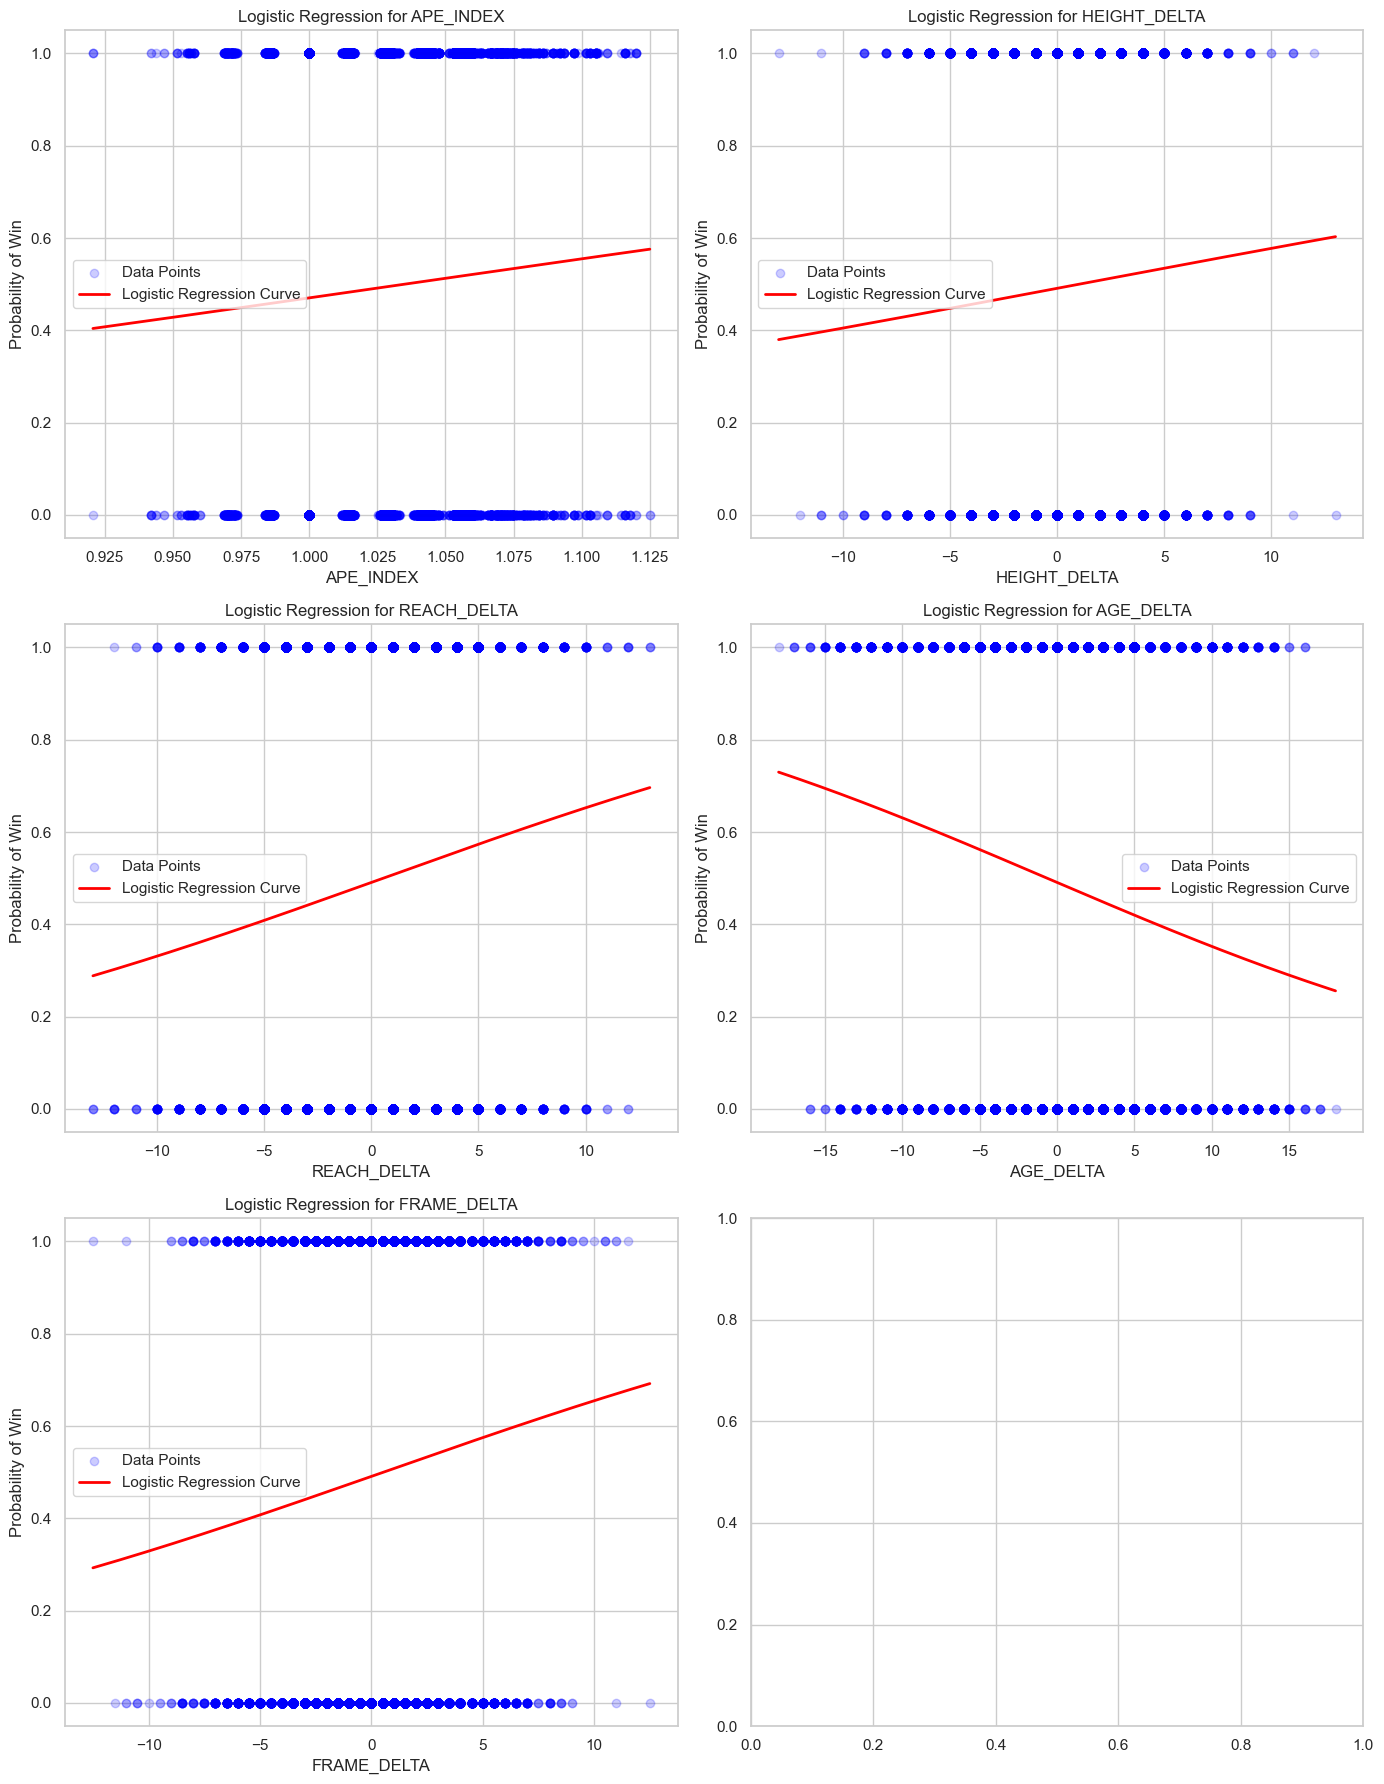

In [79]:
# Set up the figure and axes for plotting
fig, axs = plt.subplots(3, 2, figsize=(14, 18))
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Loop through each delta column and plot
for i, delta_column in enumerate(['APE_INDEX', 'HEIGHT_DELTA', 'REACH_DELTA', 'AGE_DELTA',  'FRAME_DELTA']):
    # Prepare the data
    X = win_df[[delta_column]]
    y = win_df['RESULT_BINARY']
    
    # Fit the logistic regression model
    logreg = LogisticRegression()
    logreg.fit(X, y)
    
    # Generate a sequence of values for the predictor variable
    X_test = np.linspace(X.min(), X.max(), 300)
    
    # Predict probabilities for the test sequence
    y_test_pred = logreg.predict_proba(X_test)[:, 1]
    
    # Plot
    axs[i].scatter(X, y, color='blue', alpha=0.2, label='Data Points')
    axs[i].plot(X_test, y_test_pred, color='red', linewidth=2, label='Logistic Regression Curve')
    axs[i].set_xlabel(f'{delta_column}')
    axs[i].set_ylabel('Probability of Win')
    axs[i].set_title(f'Logistic Regression for {delta_column}')
    axs[i].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### Age

In [80]:

# Selecting specific columns and dropping duplicates and null values
age_df = master[['BOUT', 'RESULT', 'AGE']].drop_duplicates().dropna()

# Filter where RESULT is either 'Win' or 'Loss'
age_df = age_df[age_df['RESULT'].isin(['Win', 'Loss'])]

# Display 
age_df


BOUT RESULT   AGE
3               CJ Vergara vs. Asu Almabayev   Loss  32.0
6         Curtis Blaydes vs. Jailton Almeida    Win  33.0
8         Curtis Blaydes vs. Jailton Almeida   Loss  32.0
10     Dustin Poirier vs. Benoit Saint Denis   Loss  28.0
12     Dustin Poirier vs. Benoit Saint Denis    Win  35.0
...                                      ...    ...   ...
34570          Pat Miletich vs. John Alessio   Loss  20.0
34572          Pat Miletich vs. John Alessio    Win  32.0
34574       Shonie Carter vs. Adrian Serrano   Loss  36.0
34576       Shonie Carter vs. Adrian Serrano    Win  28.0
34578          Tyrone Roberts vs. David Dodd   Loss  26.0

[14141 rows x 3 columns]

In [81]:
age_df.describe()

AGE
count  14141.000000
mean      29.780567
std        4.134685
min       18.000000
25%       27.000000
50%       30.000000
75%       32.000000
max       47.000000

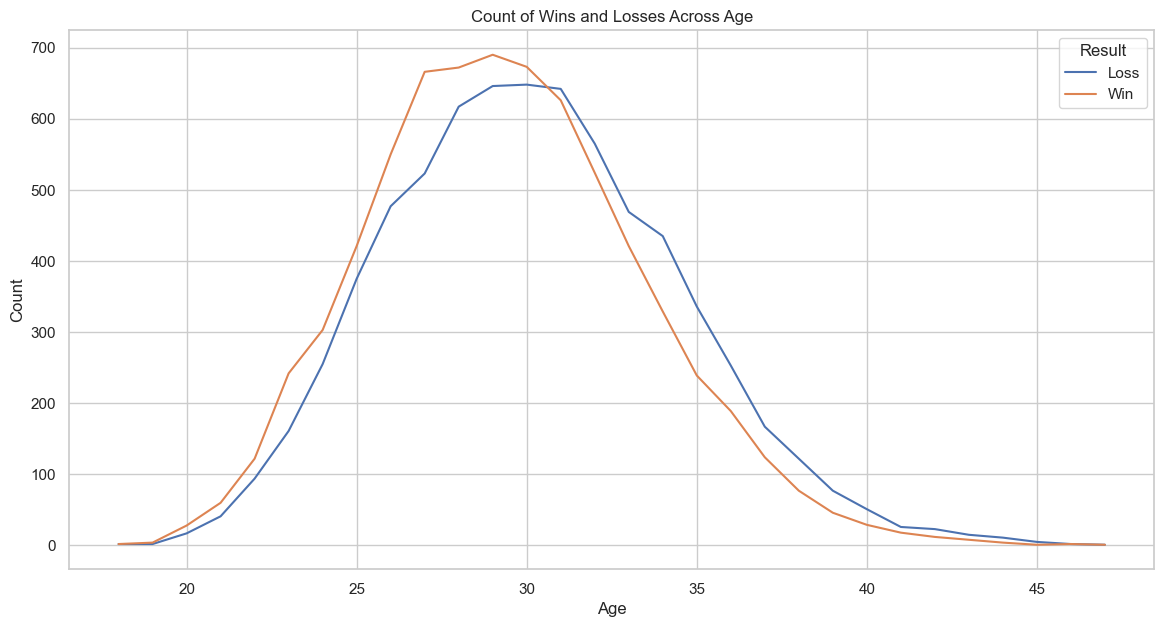

In [82]:
# Grouping the data by AGE and RESULT and counting occurrences
age_result_count = age_df.groupby(['AGE', 'RESULT']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 7))
for result in age_result_count.columns:
    plt.plot(age_result_count.index, age_result_count[result], label=result)

plt.title('Count of Wins and Losses Across Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Result')
plt.grid(True)
plt.show()

### Deltas

In [83]:
# Select specific columns and remove duplicates
subset_df = master[['BOUT', 'RESULT', 'APE_INDEX','HEIGHT_DELTA', 'REACH_DELTA', 'AGE_DELTA',  'FRAME_DELTA']].drop_duplicates()

subset_df

BOUT RESULT  APE_INDEX  HEIGHT_DELTA  \
0               CJ Vergara vs. Asu Almabayev    Win        NaN           NaN   
3               CJ Vergara vs. Asu Almabayev   Loss   1.030303           NaN   
6         Curtis Blaydes vs. Jailton Almeida    Win   1.052632           1.0   
8         Curtis Blaydes vs. Jailton Almeida   Loss   1.053333          -1.0   
10     Dustin Poirier vs. Benoit Saint Denis   Loss   1.028169           2.0   
...                                      ...    ...        ...           ...   
34572          Pat Miletich vs. John Alessio    Win   1.000000           0.0   
34574       Shonie Carter vs. Adrian Serrano   Loss   1.000000          -2.0   
34576       Shonie Carter vs. Adrian Serrano    Win   1.000000           2.0   
34578          Tyrone Roberts vs. David Dodd   Loss   1.000000           5.0   
34581          Tyrone Roberts vs. David Dodd    Win   1.000000          -5.0   

       REACH_DELTA  AGE_DELTA  FRAME_DELTA  
0              NaN        NaN          NaN  
3              NaN        NaN          NaN  
6              1.0        1.0          1.0  
8             -1.0       -1.0         -1.0  
10             1.0       -7.0          1.5  
...            ...        ...          ...  
34572         -2.0       12.0         -1.0  
34574         -2.0        8.0         -2.0  
34576          2.0       -8.0          2.0  
34578          5.0        NaN          5.0  
34581         -5.0        NaN         -5.0  

[14488 rows x 7 columns]

In [84]:
win_df = subset_df[subset_df['RESULT'] == 'Win']

win_df

BOUT RESULT  APE_INDEX  HEIGHT_DELTA  \
0                CJ Vergara vs. Asu Almabayev    Win        NaN           NaN   
6          Curtis Blaydes vs. Jailton Almeida    Win   1.052632           1.0   
12      Dustin Poirier vs. Benoit Saint Denis    Win   1.043478          -2.0   
17     Gilbert Burns vs. Jack Della Maddalena    Win   1.028169           1.0   
23              Ion Cutelaba vs. Philipe Lins    Win   1.054054           1.0   
...                                       ...    ...        ...           ...   
34558         Kevin Randleman vs. Pedro Rizzo    Win   1.000000          -3.0   
34569          Matt Hughes vs. Marcelo Aguiar    Win   1.057971          -1.0   
34572           Pat Miletich vs. John Alessio    Win   1.000000           0.0   
34576        Shonie Carter vs. Adrian Serrano    Win   1.000000           2.0   
34581           Tyrone Roberts vs. David Dodd    Win   1.000000          -5.0   

       REACH_DELTA  AGE_DELTA  FRAME_DELTA  
0              NaN        NaN          NaN  
6              1.0        1.0          1.0  
12            -1.0        7.0         -1.5  
17             2.0      -10.0          1.5  
23             3.0        8.0          2.0  
...            ...        ...          ...  
34558         -3.0        2.0         -3.0  
34569          3.0        NaN          1.0  
34572         -2.0       12.0         -1.0  
34576          2.0       -8.0          2.0  
34581         -5.0        NaN         -5.0  

[7112 rows x 7 columns]

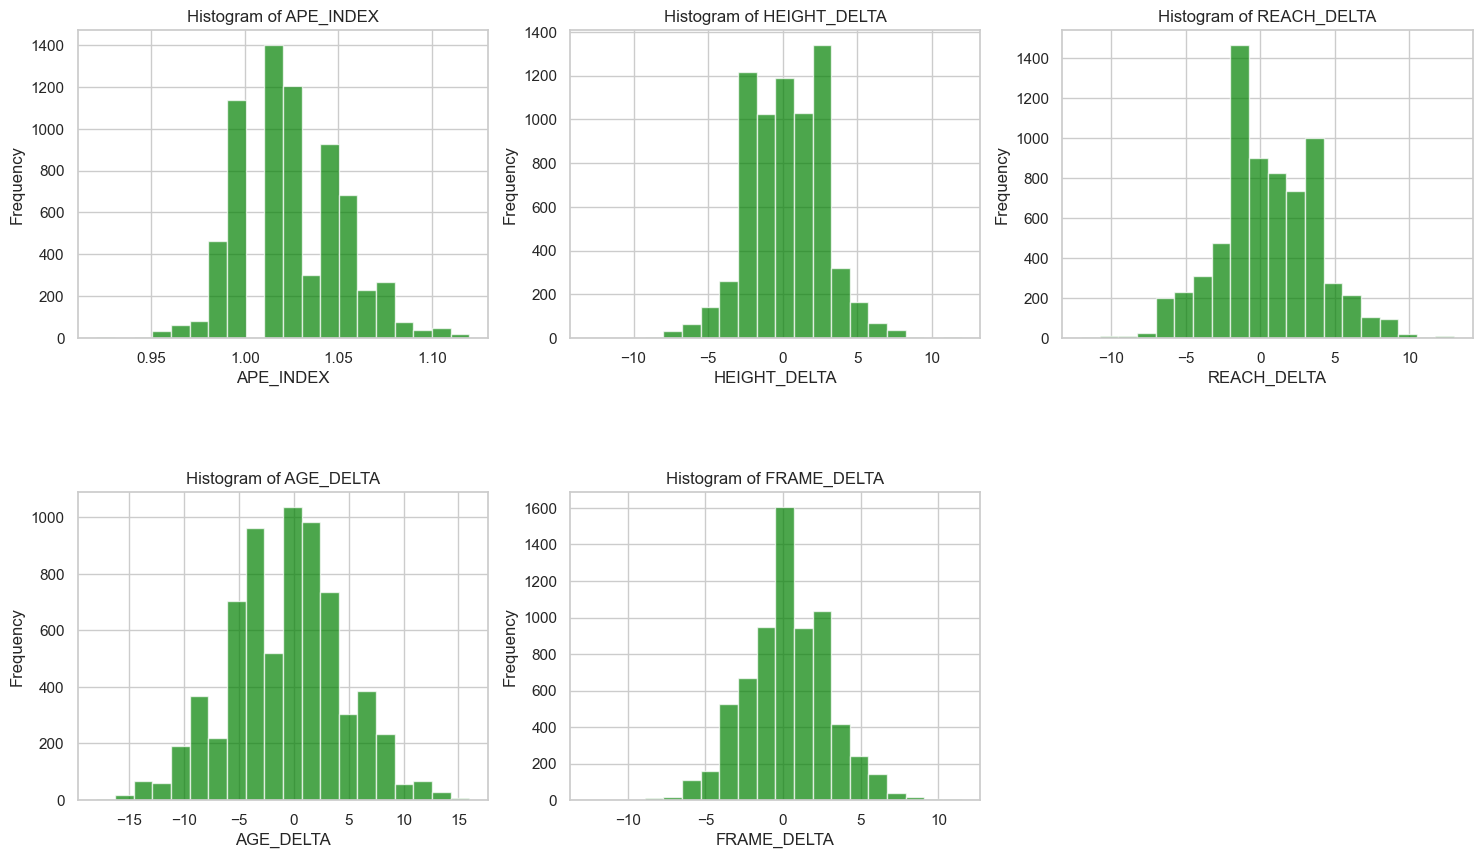

In [85]:
# Creating histograms for the desired columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)

columns = ['APE_INDEX', 'HEIGHT_DELTA', 'REACH_DELTA', 'AGE_DELTA', 'FRAME_DELTA']
for ax, column in zip(axes.flatten(), columns):
    ax.hist(win_df[column].dropna(), bins=20, color='green', alpha=0.7)  # Adjust bin size as necessary
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove the empty subplot (if there are an odd number of columns)
fig.delaxes(axes[1][2])

plt.show()


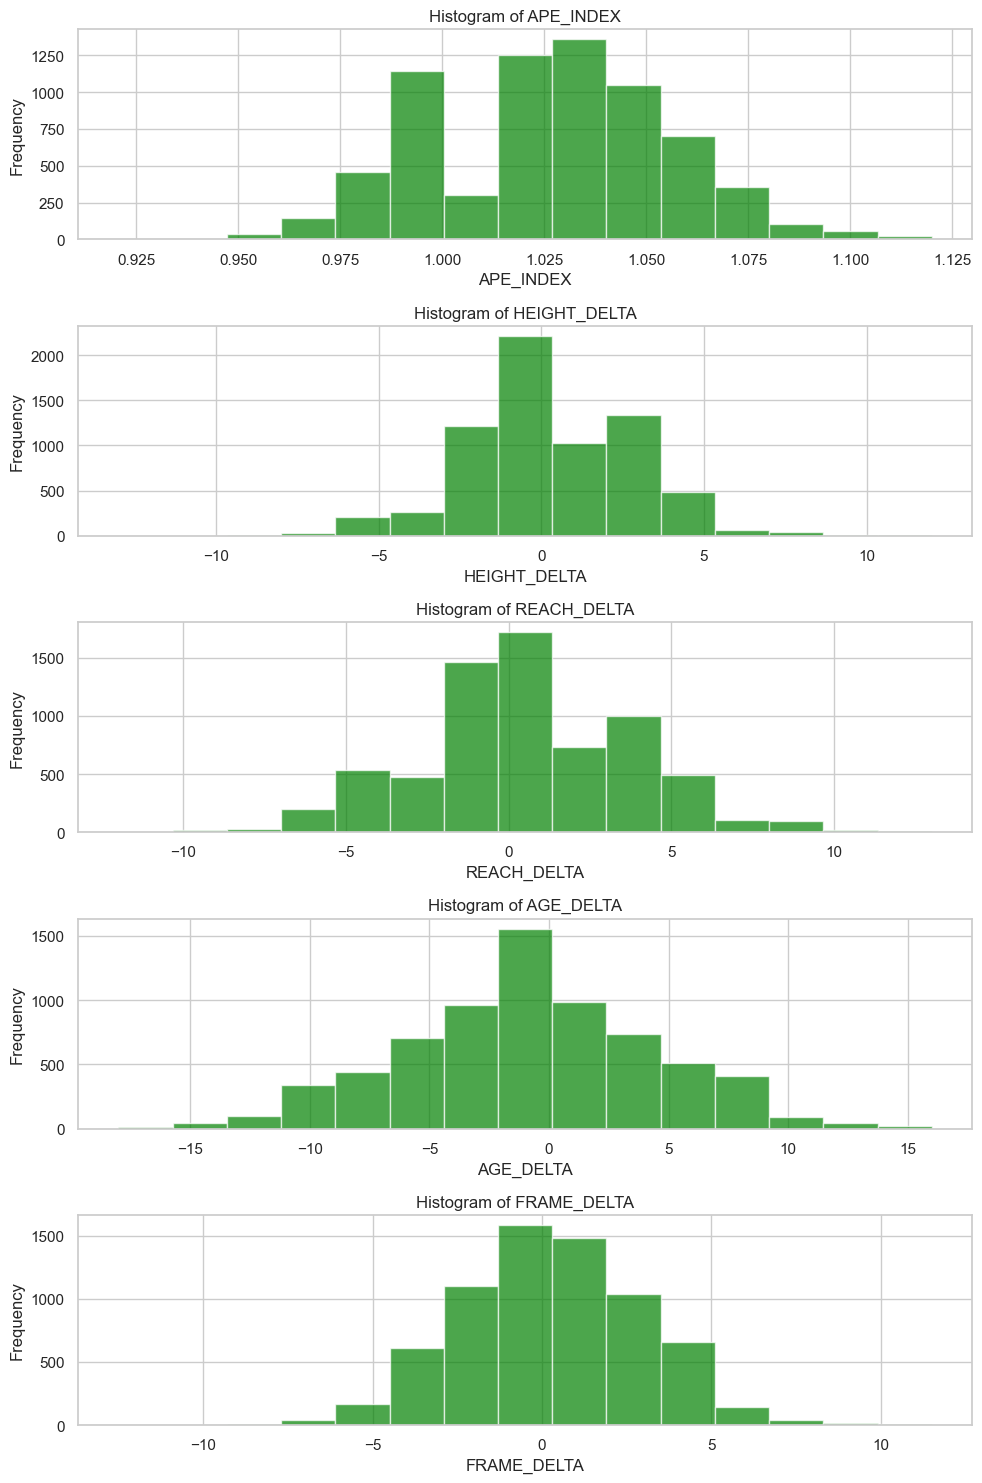

In [86]:

# Create a figure and axis objects
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 15))

# Plotting histograms
for i, col in enumerate(columns):
    axes[i].hist(win_df[col].dropna(), bins=15, color='green', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [87]:
# Assuming df is your DataFrame
loss_df = subset_df[subset_df['RESULT'] == 'Loss']

loss_df

BOUT RESULT  APE_INDEX  HEIGHT_DELTA  \
3                CJ Vergara vs. Asu Almabayev   Loss   1.030303           NaN   
8          Curtis Blaydes vs. Jailton Almeida   Loss   1.053333          -1.0   
10      Dustin Poirier vs. Benoit Saint Denis   Loss   1.028169           2.0   
14     Gilbert Burns vs. Jack Della Maddalena   Loss   1.014286          -1.0   
20              Ion Cutelaba vs. Philipe Lins   Loss   1.027397          -1.0   
...                                       ...    ...        ...           ...   
34563         Kevin Randleman vs. Pedro Rizzo   Loss   1.000000           3.0   
34568          Matt Hughes vs. Marcelo Aguiar   Loss   1.000000           1.0   
34570           Pat Miletich vs. John Alessio   Loss   1.028571           0.0   
34574        Shonie Carter vs. Adrian Serrano   Loss   1.000000          -2.0   
34578           Tyrone Roberts vs. David Dodd   Loss   1.000000           5.0   

       REACH_DELTA  AGE_DELTA  FRAME_DELTA  
3              NaN        NaN          NaN  
8             -1.0       -1.0         -1.0  
10             1.0       -7.0          1.5  
14            -2.0       10.0         -1.5  
20            -3.0       -8.0         -2.0  
...            ...        ...          ...  
34563          3.0       -2.0          3.0  
34568         -3.0        NaN         -1.0  
34570          2.0      -12.0          1.0  
34574         -2.0        8.0         -2.0  
34578          5.0        NaN          5.0  

[7114 rows x 7 columns]

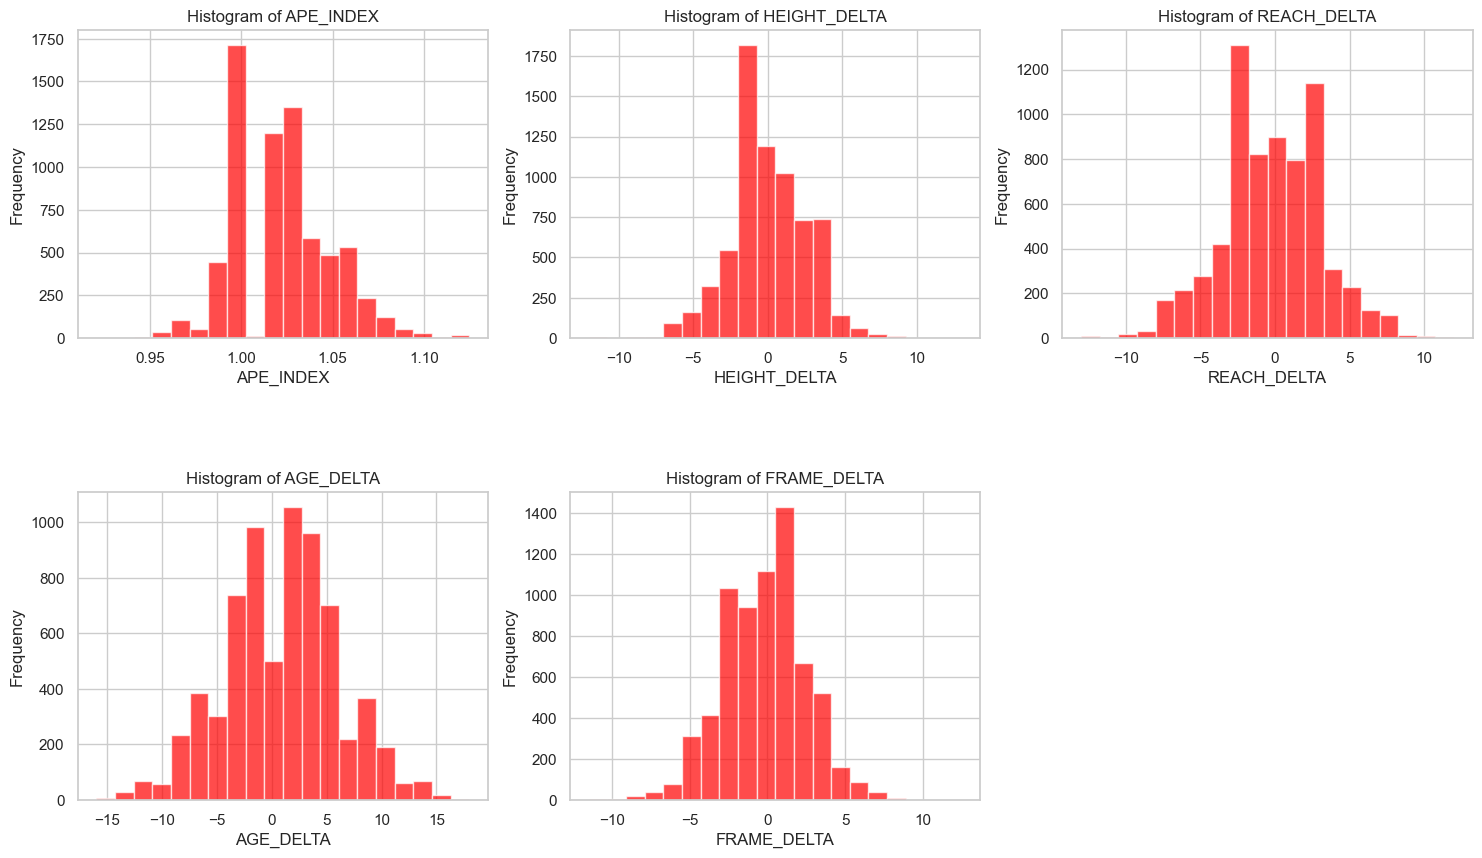

In [88]:
# Creating histograms for the desired columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)

columns = ['APE_INDEX', 'HEIGHT_DELTA', 'REACH_DELTA', 'AGE_DELTA', 'FRAME_DELTA']
for ax, column in zip(axes.flatten(), columns):
    ax.hist(loss_df[column].dropna(), bins=20, color='red', alpha=0.7)  # Adjust bin size as necessary
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove the empty subplot (if there are an odd number of columns)
fig.delaxes(axes[1][2])

plt.show()

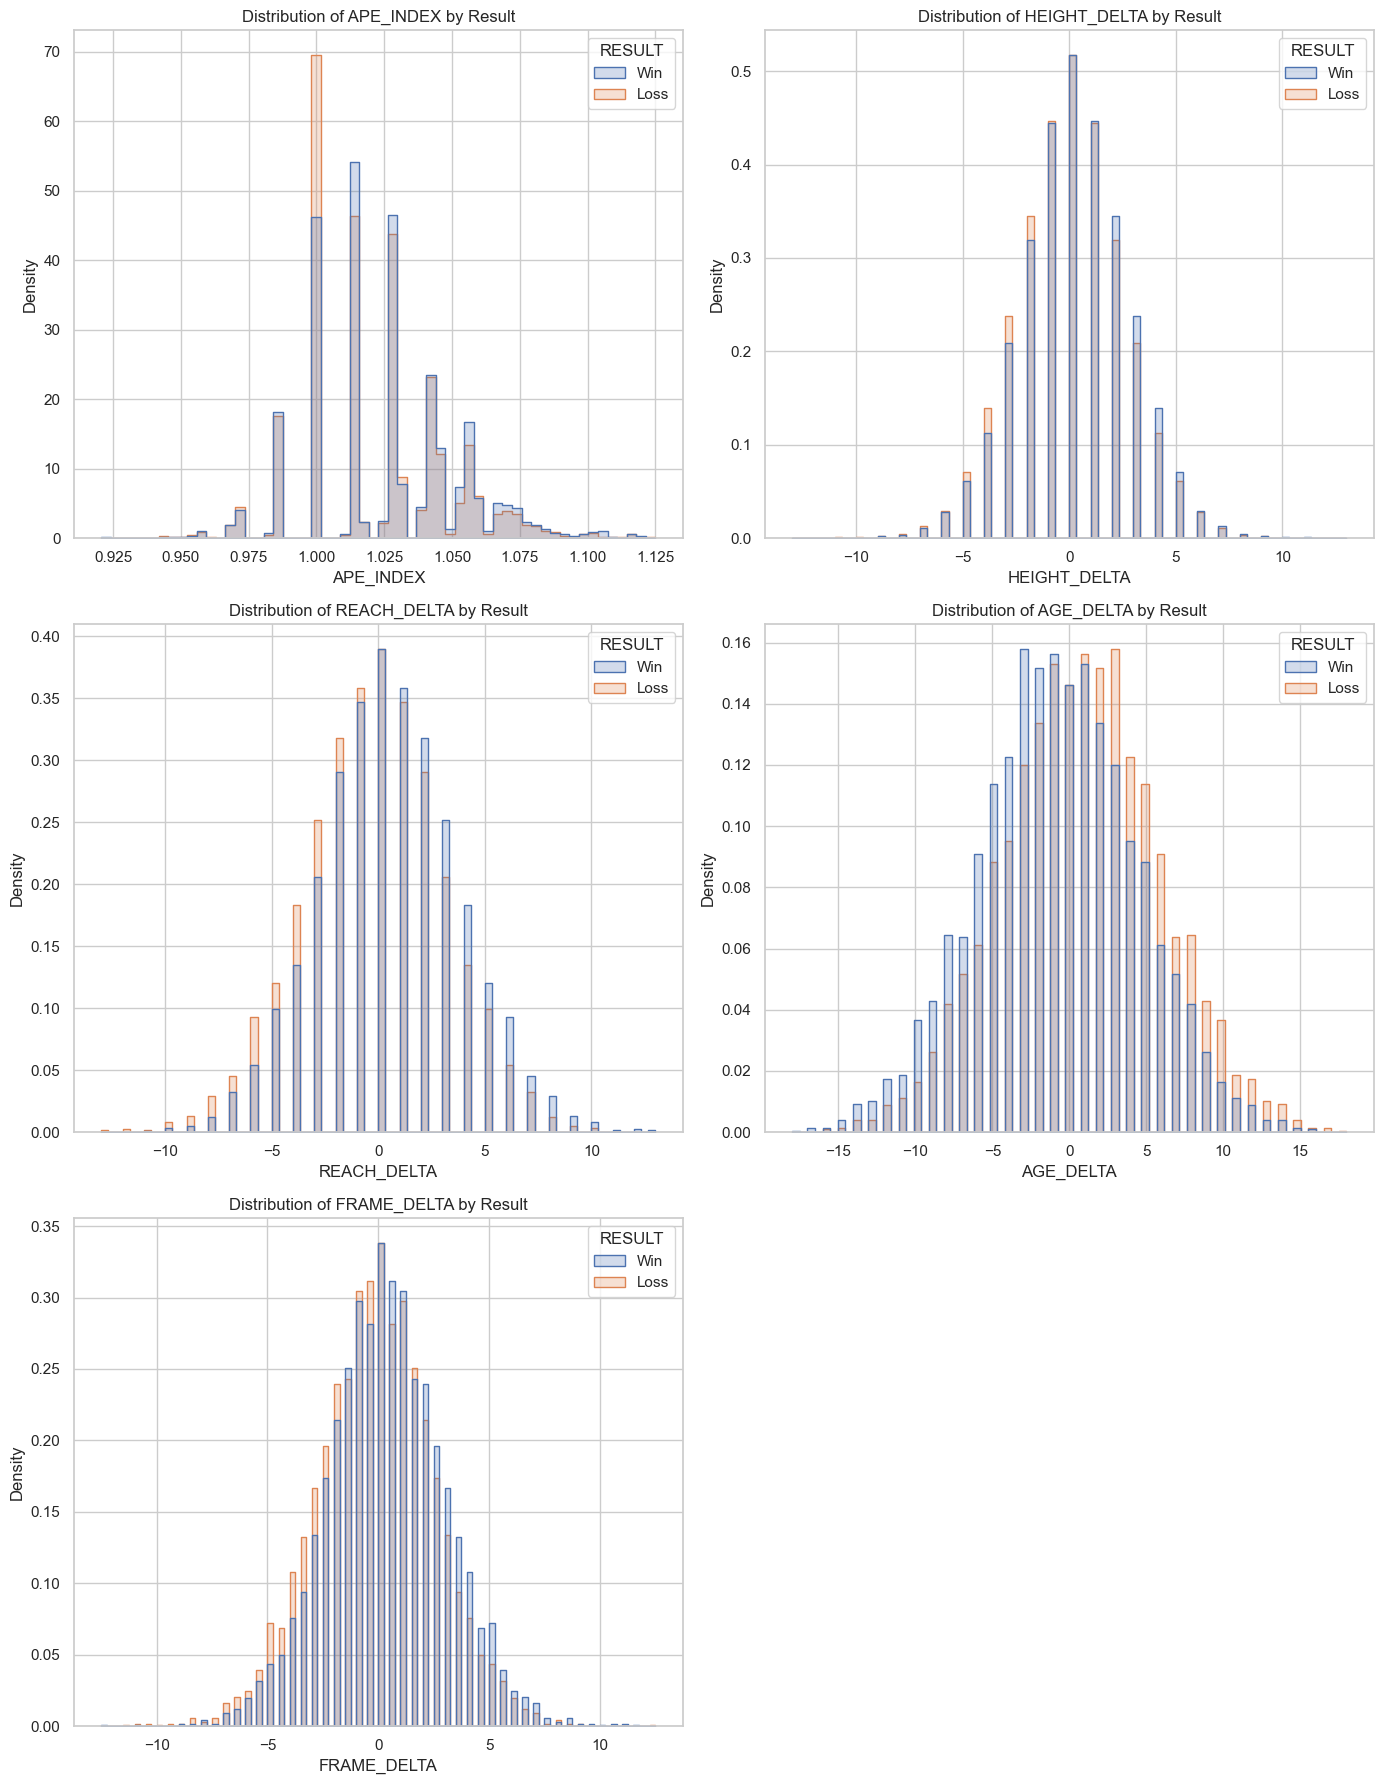

In [89]:
# Filtering out 'No Contest' and 'Draw' from the 'RESULT' column
filtered_subset_df = subset_df[~subset_df['RESULT'].isin(['No Contest', 'Draw'])]

# Creating the histograms again with the filtered data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Plotting histograms for each column, excluding 'No Contest' and 'Draw' results
for i, column in enumerate(columns):
    sns.histplot(data=filtered_subset_df, x=column, hue="RESULT", element="step", stat="density", common_norm=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by Result')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove the last empty subplot (if any)
if len(columns) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## Buyrate Tests

In [90]:
fb = fighter_buyrate[fighter_buyrate['PPV_Fights'] > 0]

fb.describe()

Buyrate  Avg_Buyrate_Per_Event   PPV_Fights  Buyrate_PERCENTILE  \
count  1.382000e+03           1.382000e+03  1382.000000         1382.000000   
mean   1.574689e+06           4.843432e+05     3.251085           70.198533   
std    1.796960e+06           3.025672e+05     3.343249           17.223849   
min    3.500000e+04           3.500000e+04     1.000000           40.483384   
25%    4.000000e+05           2.904444e+05     1.000000           55.135952   
50%    9.150000e+05           4.400000e+05     2.000000           70.198533   
75%    2.040000e+06           6.150000e+05     4.000000           85.088476   
max    1.355517e+07           2.400000e+06    22.000000          100.000000   

       PPV_Fights_PERCENTILE  
count            1382.000000  
mean               50.036179  
std                27.769294  
min                20.260492  
25%                20.260492  
50%                49.963821  
75%                74.963821  
max                99.927641

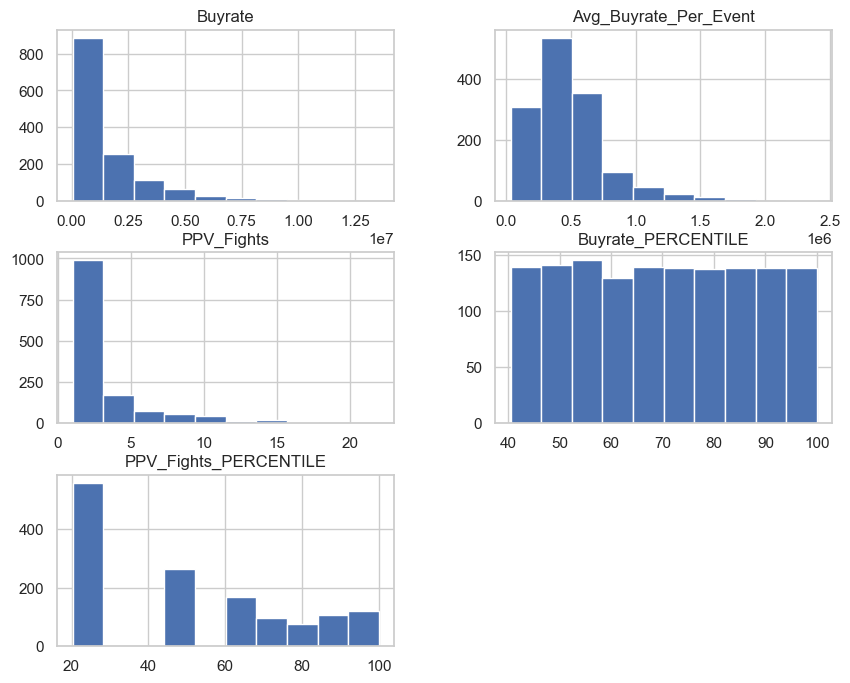

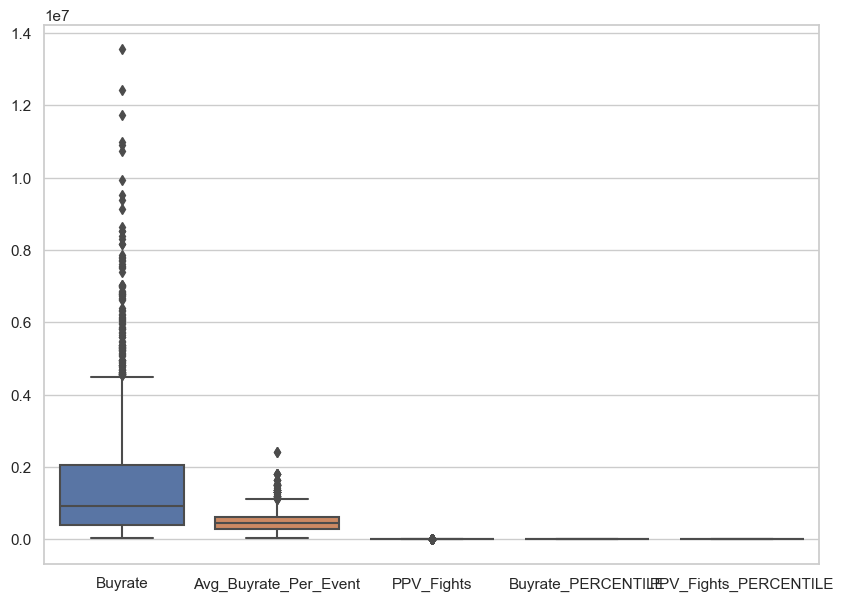

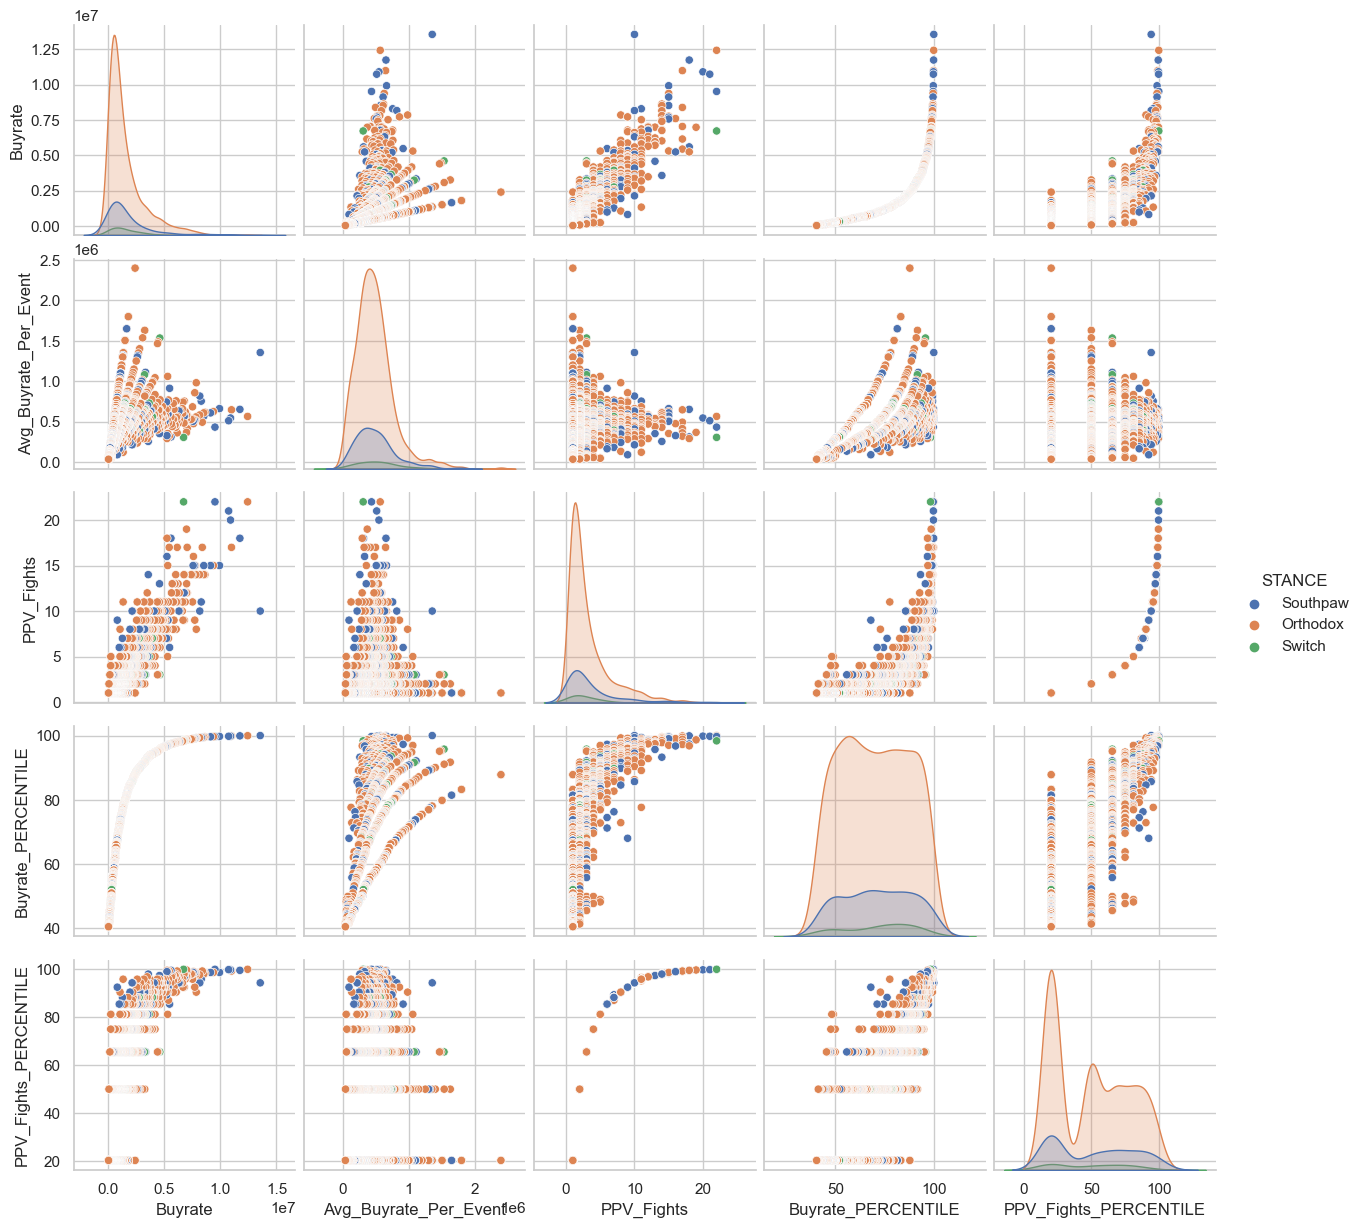

In [91]:
# Histogram
fb.hist(figsize=(10, 8))

# Box Plot
plt.figure(figsize=(10, 7))
sns.boxplot(data=fb, orient="v")

# Pair Plot
sns.pairplot(fb, hue="STANCE")

In [92]:
fb.corr()

Buyrate  Avg_Buyrate_Per_Event  PPV_Fights  \
Buyrate                1.000000               0.314592    0.894954   
Avg_Buyrate_Per_Event  0.314592               1.000000    0.000047   
PPV_Fights             0.894954               0.000047    1.000000   
Buyrate_PERCENTILE     0.816858               0.532203    0.717016   
PPV_Fights_PERCENTILE  0.744467              -0.001989    0.825409   

                       Buyrate_PERCENTILE  PPV_Fights_PERCENTILE  
Buyrate                          0.816858               0.744467  
Avg_Buyrate_Per_Event            0.532203              -0.001989  
PPV_Fights                       0.717016               0.825409  
Buyrate_PERCENTILE               1.000000               0.812387  
PPV_Fights_PERCENTILE            0.812387               1.000000

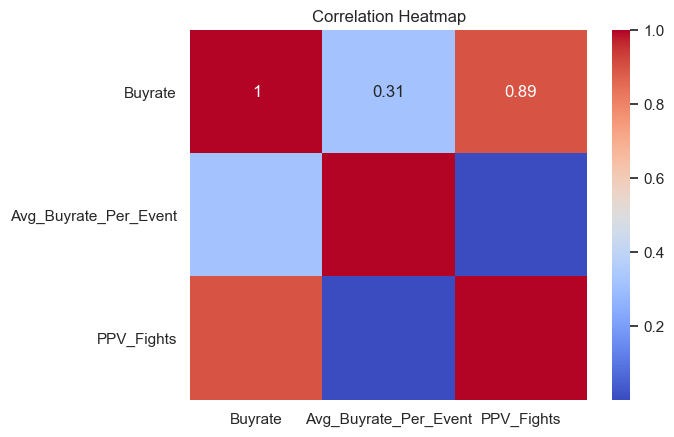

In [93]:
correlation_matrix = fb[['Buyrate', 'Avg_Buyrate_Per_Event', 'PPV_Fights']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

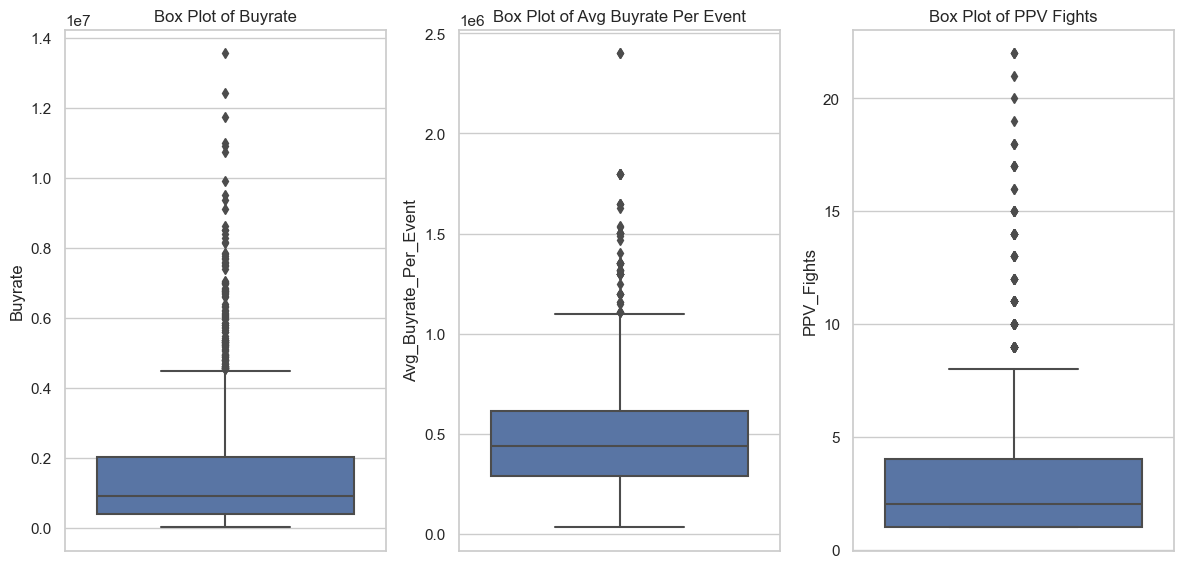

In [94]:
# Plotting box plots for the numerical columns
plt.figure(figsize=(12, 6))

# Subplot 1: Buyrate
plt.subplot(1, 3, 1)
sns.boxplot(y=fb['Buyrate'])
plt.title('Box Plot of Buyrate')

# Subplot 2: Avg_Buyrate_Per_Event
plt.subplot(1, 3, 2)
sns.boxplot(y=fb['Avg_Buyrate_Per_Event'].dropna())  # Drop NA for visualization
plt.title('Box Plot of Avg Buyrate Per Event')

# Subplot 3: PPV_Fights
plt.subplot(1, 3, 3)
sns.boxplot(y=fb['PPV_Fights'].dropna())  # Drop NA for visualization
plt.title('Box Plot of PPV Fights')

plt.tight_layout()
plt.show()

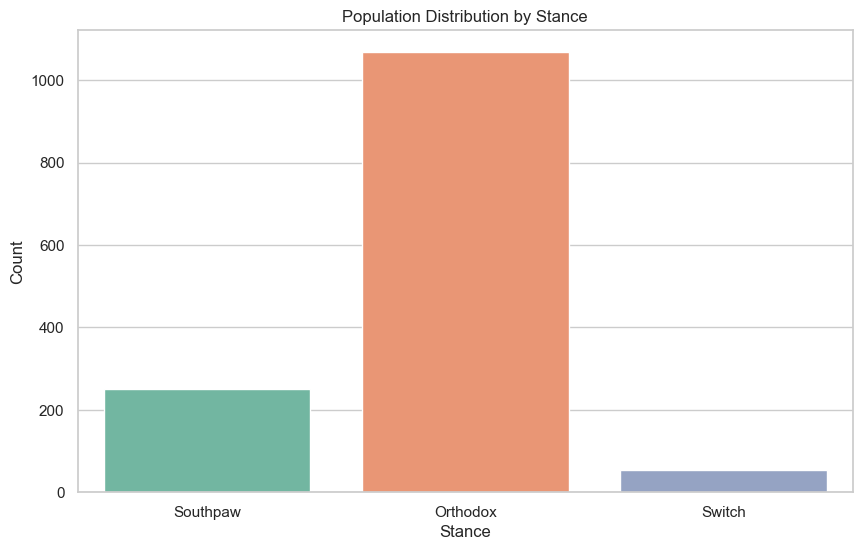

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(x='STANCE', data=fb, palette='Set2')
plt.title('Population Distribution by Stance')
plt.xlabel('Stance')
plt.ylabel('Count')
plt.show()

In [96]:
# For demonstration, we'll filter the dataset for 'Orthodox' and 'Southpaw' stances only
# and consider the 'Buyrate' column for A/B testing
orthodox_buyrates = fb[fb['STANCE'] == 'Orthodox']['Buyrate']
southpaw_buyrates = fb[fb['STANCE'] == 'Southpaw']['Buyrate']

# Perform a t-test between the two groups
t_stat, p_value = ttest_ind(orthodox_buyrates, southpaw_buyrates, nan_policy='omit')  # 'omit' to ignore NaNs

t_stat, p_value

(-1.953142081883958, 0.05101444611068796)

In [97]:
champion_buyrates = fb[(fb['EVER_CHAMPION'] == 'Yes') | (fb['EVER_INTERIM'] == 'Yes')]['Buyrate']
non_champion_buyrates = fb[(fb['EVER_CHAMPION'] != 'Yes') | (fb['EVER_INTERIM'] != 'Yes')]['Buyrate']


# Perform a t-test between the two groups
t_stat, p_value = ttest_ind(champion_buyrates, non_champion_buyrates)

t_stat, p_value

(14.399514360866917, 4.511800859866136e-44)

In [98]:
# Perform ANOVA test
f_stat, p_value = f_oneway(champion_buyrates, non_champion_buyrates)

f_stat, p_value

(207.34601382881243, 4.511800859866283e-44)

In [99]:
# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(fb[['Buyrate', 'Avg_Buyrate_Per_Event', 'PPV_Fights']])

print(f"Chi-square statistic: {chi2}, P-value: {p_value}")

Chi-square statistic: 372587190.1667059, P-value: 0.0


In [100]:
# Number of successes (conversions) and samples in each group
successes = np.array([300, 350])
samples = np.array([1000, 1000])

# Perform z-test
z_stat, p_value = proportions_ztest(count=successes, nobs=samples)

print(f"Z-statistic: {z_stat}, P-value: {p_value}")

Z-statistic: -2.3870495801314426, P-value: 0.01698420058213061


In [101]:

fb.sort_values(by='Buyrate', ascending=False, inplace = True)
fb.reset_index(drop=True, inplace = True)
# fb.index = range(1, len(fb) + 1)

fb

/var/folders/_6/_1qflrx12_j4kc3ssfs46ldw0000gn/T/ipykernel_2835/741843745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb.sort_values(by='Buyrate', ascending=False, inplace = True)


FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0         Conor McGregor  Southpaw           Yes          Yes             Yes   
1      Georges St-Pierre  Orthodox           Yes          Yes             Yes   
2             Jim Miller  Southpaw            No           No              No   
3              Jon Jones  Orthodox           Yes          Yes             Yes   
4            Demian Maia  Southpaw            No           No             Yes   
...                  ...       ...           ...          ...             ...   
1377       Chris Brennan  Orthodox            No           No              No   
1378     Kevin Randleman  Orthodox           Yes           No             Yes   
1379        Sean Alvarez  Orthodox            No           No              No   
1380  Richard Crunkilton  Orthodox            No           No              No   
1381          Romie Aram  Orthodox            No           No              No   

     EITHER_CHAMP     Buyrate  Avg_Buyrate_Per_Event  PPV_Fights  \
0             Yes  13555166.0           1.355517e+06        10.0   
1             Yes  12430000.0           5.650000e+05        22.0   
2              No  11741000.0           6.522778e+05        18.0   
3             Yes  10992000.0           6.465882e+05        17.0   
4              No  10907000.0           5.453500e+05        20.0   
...           ...         ...                    ...         ...   
1377           No     35000.0           3.500000e+04         1.0   
1378          Yes     35000.0           3.500000e+04         1.0   
1379           No     35000.0           3.500000e+04         1.0   
1380           No     35000.0           3.500000e+04         1.0   
1381           No     35000.0           3.500000e+04         1.0   

      Buyrate_PERCENTILE  PPV_Fights_PERCENTILE  
0             100.000000              94.283647  
1              99.956841              99.927641  
2              99.913681              99.493488  
3              99.870522              99.204052  
4              99.827363              99.710564  
...                  ...                    ...  
1377           40.483384              20.260492  
1378           40.483384              20.260492  
1379           40.483384              20.260492  
1380           40.483384              20.260492  
1381           40.483384              20.260492  

[1382 rows x 11 columns]

In [102]:
fb.describe()

Buyrate  Avg_Buyrate_Per_Event   PPV_Fights  Buyrate_PERCENTILE  \
count  1.382000e+03           1.382000e+03  1382.000000         1382.000000   
mean   1.574689e+06           4.843432e+05     3.251085           70.198533   
std    1.796960e+06           3.025672e+05     3.343249           17.223849   
min    3.500000e+04           3.500000e+04     1.000000           40.483384   
25%    4.000000e+05           2.904444e+05     1.000000           55.135952   
50%    9.150000e+05           4.400000e+05     2.000000           70.198533   
75%    2.040000e+06           6.150000e+05     4.000000           85.088476   
max    1.355517e+07           2.400000e+06    22.000000          100.000000   

       PPV_Fights_PERCENTILE  
count            1382.000000  
mean               50.036179  
std                27.769294  
min                20.260492  
25%                20.260492  
50%                49.963821  
75%                74.963821  
max                99.927641

In [103]:
fb.corr()

Buyrate  Avg_Buyrate_Per_Event  PPV_Fights  \
Buyrate                1.000000               0.314592    0.894954   
Avg_Buyrate_Per_Event  0.314592               1.000000    0.000047   
PPV_Fights             0.894954               0.000047    1.000000   
Buyrate_PERCENTILE     0.816858               0.532203    0.717016   
PPV_Fights_PERCENTILE  0.744467              -0.001989    0.825409   

                       Buyrate_PERCENTILE  PPV_Fights_PERCENTILE  
Buyrate                          0.816858               0.744467  
Avg_Buyrate_Per_Event            0.532203              -0.001989  
PPV_Fights                       0.717016               0.825409  
Buyrate_PERCENTILE               1.000000               0.812387  
PPV_Fights_PERCENTILE            0.812387               1.000000

In [104]:
# Group the data by 'EITHER_CHAMP' and calculate the total buyrate for each category
champ_summary = fb.groupby('EITHER_CHAMP')['Buyrate'].sum().reset_index()

# Calculate the total buyrate to find out the percentage contribution of each category
total_buyrate = champ_summary['Buyrate'].sum()
champ_summary['Percentage'] = (champ_summary['Buyrate'] / total_buyrate) * 100

champ_summary

EITHER_CHAMP       Buyrate  Percentage
0           No  1.750347e+09   80.430609
1          Yes  4.258729e+08   19.569391

In [105]:
total_buyrate

2176219652.0

In [106]:
# Group the data by 'EVER_CHALLENGER' and calculate the total buyrate for each category
challenger_summary = fb.groupby('EVER_CHALLENGER')['Buyrate'].sum().reset_index()

# Calculate the total buyrate to find out the percentage contribution of each category
total_buyrate = champ_summary['Buyrate'].sum()
challenger_summary['Percentage'] = (challenger_summary['Buyrate'] / total_buyrate) * 100

challenger_summary

EVER_CHALLENGER       Buyrate  Percentage
0              No  1.435586e+09   65.966973
1             Yes  7.406334e+08   34.033027

In [107]:
# Group the data by 'STANCE' and calculate the total buyrate for each category
stance_summary = fb.groupby('STANCE')['Buyrate'].sum().reset_index()

# Calculate the total buyrate to find out the percentage contribution of each category
total_buyrate = champ_summary['Buyrate'].sum()
stance_summary['Percentage'] = (stance_summary['Buyrate'] / total_buyrate) * 100

stance_summary

STANCE       Buyrate  Percentage
0  Orthodox  1.643317e+09   75.512465
1  Southpaw  4.469722e+08   20.538929
2    Switch  8.104633e+07    3.724180

In [108]:
# Clean the data: Remove rows with NaN in either 'Buyrate' or 'PPV_Fights'
df_cleaned = fb.dropna(subset=['Buyrate', 'PPV_Fights'])

# Defining the dependent variable (y) and independent variable (x)
y = df_cleaned['Buyrate'].values.reshape(-1, 1)
x = df_cleaned['PPV_Fights'].values.reshape(-1, 1)

# Linear Regression
model = LinearRegression()
model.fit(x, y)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Calculate R-squared
r_squared = model.score(x, y)

slope[0], intercept[0], r_squared

(481028.1468489902, 10825.027646517381, 0.8009435134391198)

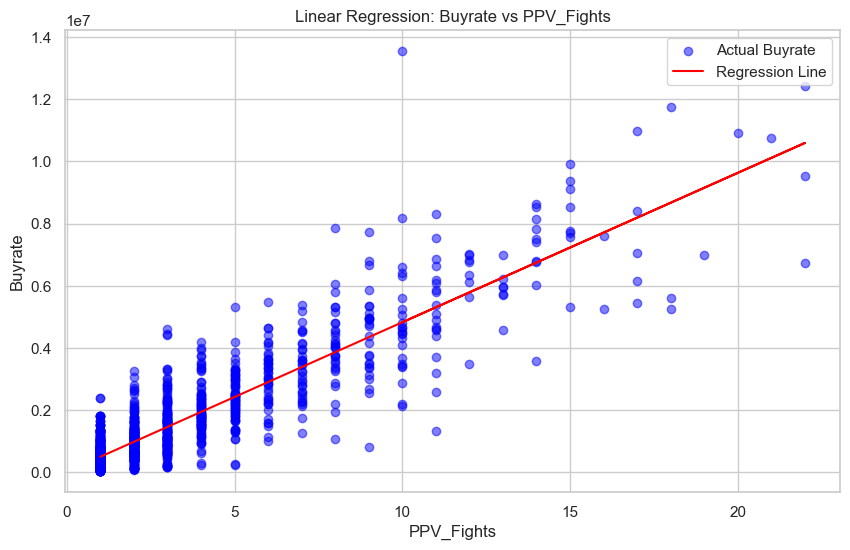

In [109]:
# Predict y values for the given x values to plot the regression line
y_pred = model.predict(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Actual Buyrate')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Buyrate vs PPV_Fights')
plt.xlabel('PPV_Fights')
plt.ylabel('Buyrate')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
# Creating dummy variables for the 'STANCE' column
df_with_dummies = pd.get_dummies(df_cleaned, columns=['STANCE'], drop_first=True)


# Defining the new independent variables including the stance dummies
X_multiple = df_with_dummies[['PPV_Fights', 'STANCE_Southpaw', 'STANCE_Switch']]

# Multiple Linear Regression
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

# Coefficients and Intercept
coefficients = model_multiple.coef_[0]
intercept_multiple = model_multiple.intercept_

# Calculate R-squared for the multiple regression
r_squared_multiple = model_multiple.score(X_multiple, y)

coefficients, intercept_multiple[0], r_squared_multiple


(array([480994.16146437,  33376.03748113, 129287.79240106]),
 -153.882503160974,
 0.8011702621643987)

<Figure size 1000x600 with 0 Axes>

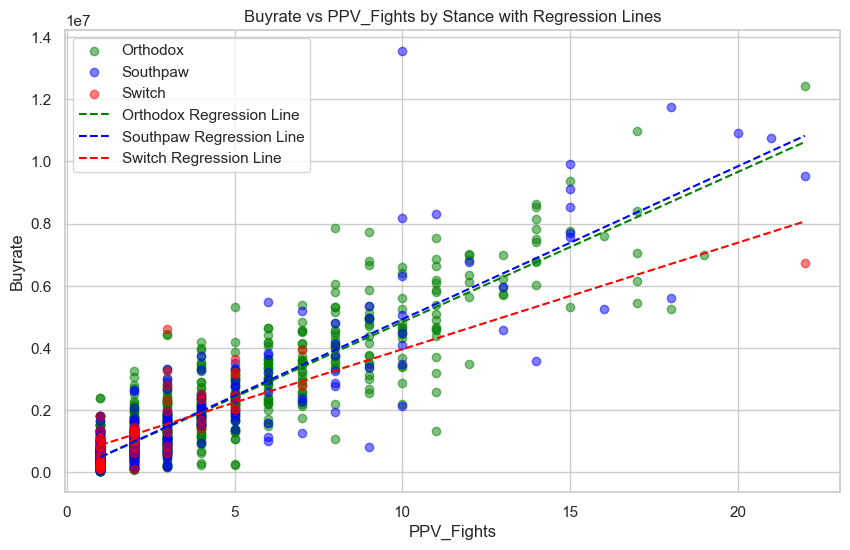

In [111]:
# For simplicity, let's calculate and display regression lines for each stance category independently
# This involves fitting a simple linear model for each stance category with respect to PPV_Fights
# Separate data by stance for color-coding
southpaw = df_with_dummies[df_with_dummies['STANCE_Southpaw'] == 1]
switch = df_with_dummies[df_with_dummies['STANCE_Switch'] == 1]
orthodox = df_with_dummies[(df_with_dummies['STANCE_Southpaw'] == 0) & (df_with_dummies['STANCE_Switch'] == 0)]

# Prepare figure
plt.figure(figsize=(10, 6))



# Initialize models for each stance
model_orthodox = LinearRegression()
model_southpaw = LinearRegression()
model_switch = LinearRegression()

# Fit the models
model_orthodox.fit(orthodox['PPV_Fights'].values.reshape(-1, 1), orthodox['Buyrate'])
model_southpaw.fit(southpaw['PPV_Fights'].values.reshape(-1, 1), southpaw['Buyrate'])
model_switch.fit(switch['PPV_Fights'].values.reshape(-1, 1), switch['Buyrate'])

# Generate predictions for each stance category for a smooth line
x_range = np.linspace(df_with_dummies['PPV_Fights'].min(), df_with_dummies['PPV_Fights'].max(), 100).reshape(-1, 1)
y_pred_orthodox = model_orthodox.predict(x_range)
y_pred_southpaw = model_southpaw.predict(x_range)
y_pred_switch = model_switch.predict(x_range)

# Plotting
plt.figure(figsize=(10, 6))

# Actual data points
plt.scatter(orthodox['PPV_Fights'], orthodox['Buyrate'], color='green', alpha=0.5, label='Orthodox')
plt.scatter(southpaw['PPV_Fights'], southpaw['Buyrate'], color='blue', alpha=0.5, label='Southpaw')
plt.scatter(switch['PPV_Fights'], switch['Buyrate'], color='red', alpha=0.5, label='Switch')

# Regression lines
plt.plot(x_range, y_pred_orthodox, color='green', linestyle='--', label='Orthodox Regression Line')
plt.plot(x_range, y_pred_southpaw, color='blue', linestyle='--', label='Southpaw Regression Line')
plt.plot(x_range, y_pred_switch, color='red', linestyle='--', label='Switch Regression Line')

plt.title('Buyrate vs PPV_Fights by Stance with Regression Lines')
plt.xlabel('PPV_Fights')
plt.ylabel('Buyrate')
plt.legend()
plt.grid(True)

plt.show()


In [112]:

# Filter out rows where necessary data is missing
df_filtered = fb.dropna(subset=['Buyrate', 'PPV_Fights'])

# Define the features and target variable
X = df_filtered[['EITHER_CHAMP', 'PPV_Fights']]
y = df_filtered['Buyrate']

# Encoding categorical data & Preparing the pipeline for linear regression
categorical_features = ['EITHER_CHAMP']
numerical_features = ['PPV_Fights']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', LinearRegression())])

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Multiple Linear Regression to the Training set
regression_pipeline.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regression_pipeline.predict(X_test)

# Calculating the performance metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse


(0.848032301446808, 645916621186.0352)

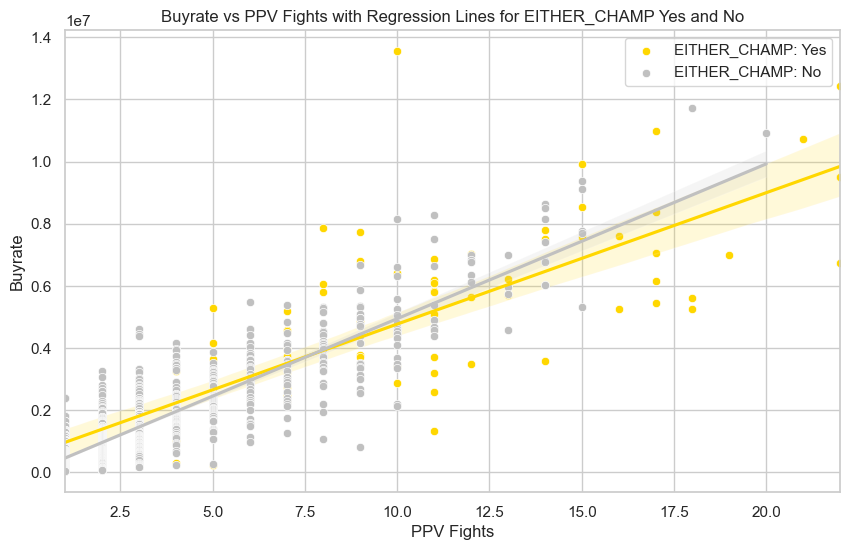

In [113]:
# Set a larger plot size
plt.figure(figsize=(10, 6))

# Create separate dataframes for 'EITHER_CHAMP' 'Yes' and 'No'
df_champ_yes = df_filtered[df_filtered['EITHER_CHAMP'] == 'Yes']
df_champ_no = df_filtered[df_filtered['EITHER_CHAMP'] == 'No']

# Plotting 'EITHER_CHAMP' 'Yes'
sns.scatterplot(x='PPV_Fights', y='Buyrate', data=df_champ_yes, color='gold', label='EITHER_CHAMP: Yes')

# Plotting regression line for 'EITHER_CHAMP' 'Yes'
sns.regplot(x='PPV_Fights', y='Buyrate', data=df_champ_yes, scatter=False, color='gold')

# Plotting 'EITHER_CHAMP' 'No'
sns.scatterplot(x='PPV_Fights', y='Buyrate', data=df_champ_no, color='silver', label='EITHER_CHAMP: No')

# Plotting regression line for 'EITHER_CHAMP' 'No'
sns.regplot(x='PPV_Fights', y='Buyrate', data=df_champ_no, scatter=False, color='silver')

plt.xlabel('PPV Fights')
plt.ylabel('Buyrate')
plt.title('Buyrate vs PPV Fights with Regression Lines for EITHER_CHAMP Yes and No')
plt.legend()
plt.show()


In [114]:
# Filter out rows where necessary data is missing
df_filtered = fb.dropna(subset=['Buyrate', 'PPV_Fights'])

# Define the features and target variable
X = df_filtered[['EVER_CHALLENGER', 'PPV_Fights']]
y = df_filtered['Buyrate']

# Encoding categorical data & Preparing the pipeline for linear regression
categorical_features = ['EVER_CHALLENGER']
numerical_features = ['PPV_Fights']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', LinearRegression())])

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Multiple Linear Regression to the Training set
regression_pipeline.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regression_pipeline.predict(X_test)

# Calculating the performance metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse


(0.8597258317738283, 596214969647.7537)

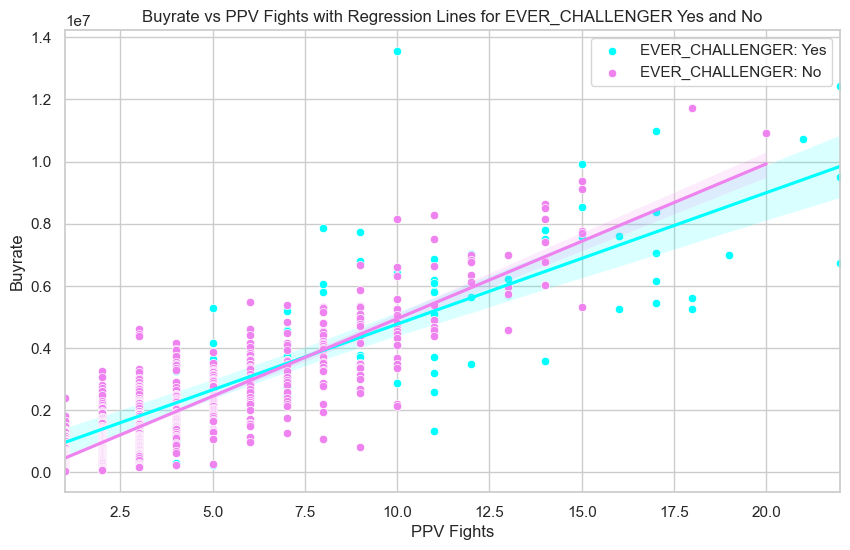

In [115]:
# Set a larger plot size
plt.figure(figsize=(10, 6))

# Create separate dataframes for 'EITHER_CHAMP' 'Yes' and 'No'
df_challenger_yes = df_filtered[df_filtered['EVER_CHALLENGER'] == 'Yes']
df_challenger_no = df_filtered[df_filtered['EVER_CHALLENGER'] == 'No']

# Plotting 'EITHER_CHAMP' 'Yes'
sns.scatterplot(x='PPV_Fights', y='Buyrate', data=df_champ_yes, color='aqua', label='EVER_CHALLENGER: Yes')

# Plotting regression line for 'EITHER_CHAMP' 'Yes'
sns.regplot(x='PPV_Fights', y='Buyrate', data=df_champ_yes, scatter=False, color='aqua')

# Plotting 'EITHER_CHAMP' 'No'
sns.scatterplot(x='PPV_Fights', y='Buyrate', data=df_champ_no, color='violet', label='EVER_CHALLENGER: No')

# Plotting regression line for 'EITHER_CHAMP' 'No'
sns.regplot(x='PPV_Fights', y='Buyrate', data=df_champ_no, scatter=False, color='violet')

plt.xlabel('PPV Fights')
plt.ylabel('Buyrate')
plt.title('Buyrate vs PPV Fights with Regression Lines for EVER_CHALLENGER Yes and No')
plt.legend()
plt.show()

In [116]:
# Calculating the total cumulative buyrate
total_cumulative_buyrate = fb['Buyrate'].sum()

total_cumulative_buyrate

2176219652.0

In [117]:
# Calculate mean and median buyrate for each stance
buyrate_stats = fb.groupby('STANCE')['Buyrate'].agg(['mean', 'median'])

# Display the statistics
buyrate_stats

mean     median
STANCE                           
Orthodox  1.538686e+06   892500.0
Southpaw  1.787889e+06  1000000.0
Switch    1.500858e+06  1245000.0

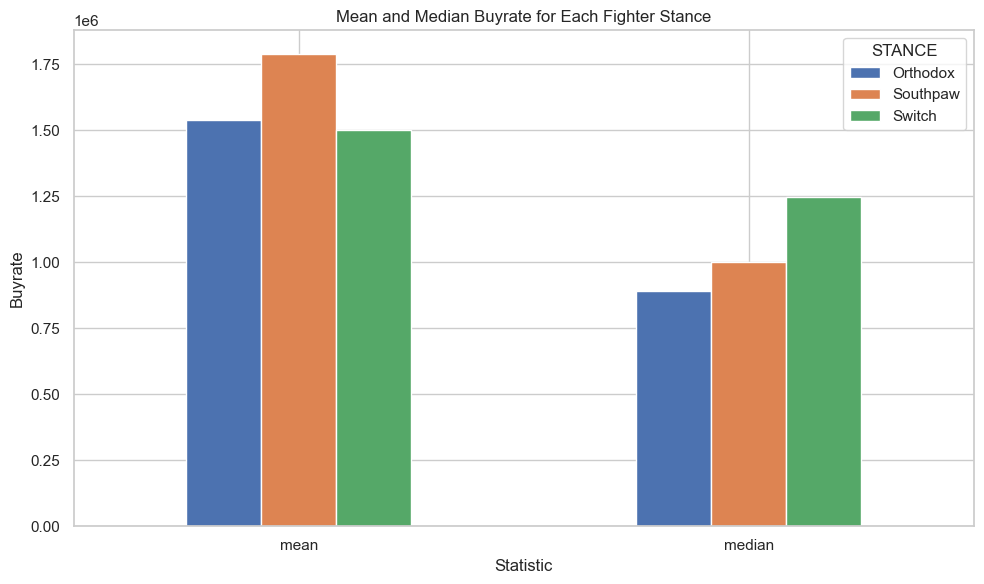

In [118]:
# Prepare data for plotting for the stances
plot_data_stance = buyrate_stats.T  # Transpose to get categories as columns

# Plotting for stances
plot_data_stance.plot(kind='bar', figsize=(10, 6))
plt.title('Mean and Median Buyrate for Each Fighter Stance')
plt.ylabel('Buyrate')
plt.xlabel('Statistic')
plt.xticks(rotation=0)
plt.legend(title='STANCE')
plt.tight_layout()

# Show the plot
plt.show()


In [119]:
# Calculate mean and median ppv fights 
ppv_fight1 = fb.groupby('EITHER_CHAMP')['PPV_Fights'].agg(['mean', 'median'])

# Display the statistics
ppv_fight1

mean  median
EITHER_CHAMP                  
No            2.822014     2.0
Yes           8.693069     8.0

In [120]:
# Calculate mean and median buyrate 
buyrate_stats1 = fb.groupby('EITHER_CHAMP')['Buyrate'].agg(['mean', 'median'])

# Display the statistics
buyrate_stats1

mean     median
EITHER_CHAMP                         
No            1.366391e+06   840000.0
Yes           4.216564e+06  3713000.0

In [121]:
# Calculate mean and median buyrate 
buyrate_percent1 = fb.groupby('EITHER_CHAMP')['Buyrate_PERCENTILE'].agg(['mean', 'median'])

# Display the statistics
buyrate_percent1

mean     median
EITHER_CHAMP                      
No            68.805678  68.580060
Yes           87.864343  93.655589

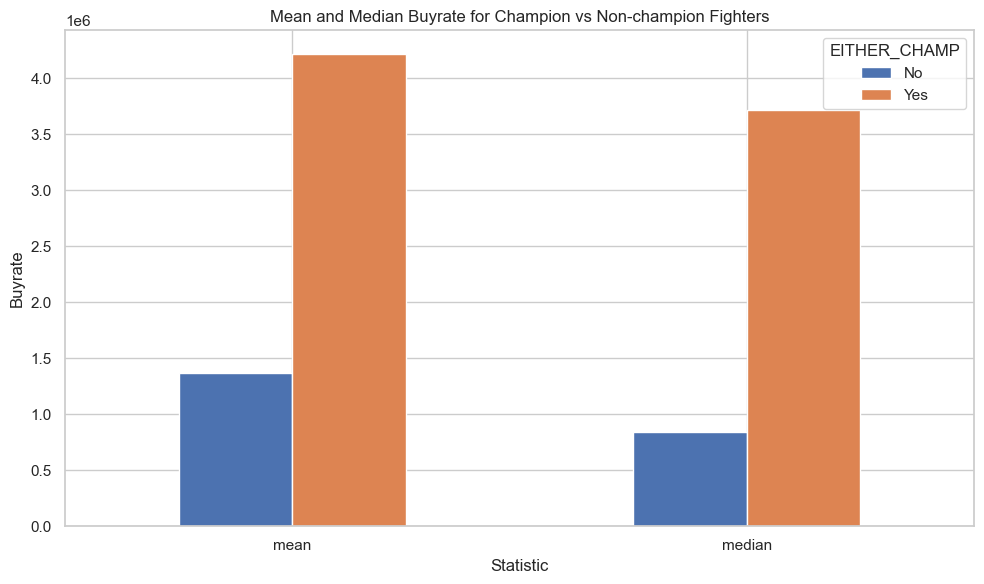

In [122]:
# Prepare data for plotting
plot_data = buyrate_stats1.T  # Transpose to get categories as columns

# Plotting
plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Mean and Median Buyrate for Champion vs Non-champion Fighters')
plt.ylabel('Buyrate')
plt.xlabel('Statistic')
plt.xticks(rotation=0)
plt.legend(title='EITHER_CHAMP')
plt.tight_layout()

# Show the plot
plt.show()

In [123]:
# Calculate mean and median ppv fights 
ppv_fight2 = fb.groupby('EVER_CHALLENGER')['PPV_Fights'].agg(['mean', 'median'])

# Display the statistics
ppv_fight2

mean  median
EVER_CHALLENGER                  
No               2.527350     2.0
Yes              7.245283     6.0

In [124]:
# Calculate mean and median buyrate 
buyrate_stats2 = fb.groupby('EVER_CHALLENGER')['Buyrate'].agg(['mean', 'median'])

# Display the statistics
buyrate_stats2

mean     median
EVER_CHALLENGER                         
No               1.226997e+06   787500.0
Yes              3.493554e+06  2789500.0

In [125]:
# Calculate mean and median buyrate
buyrate_percent1 = fb.groupby('EVER_CHALLENGER')['Buyrate_PERCENTILE'].agg(['mean', 'median'])

# Display the statistics
buyrate_percent1

mean     median
EVER_CHALLENGER                      
No               67.492761  66.832110
Yes              85.131330  89.900734

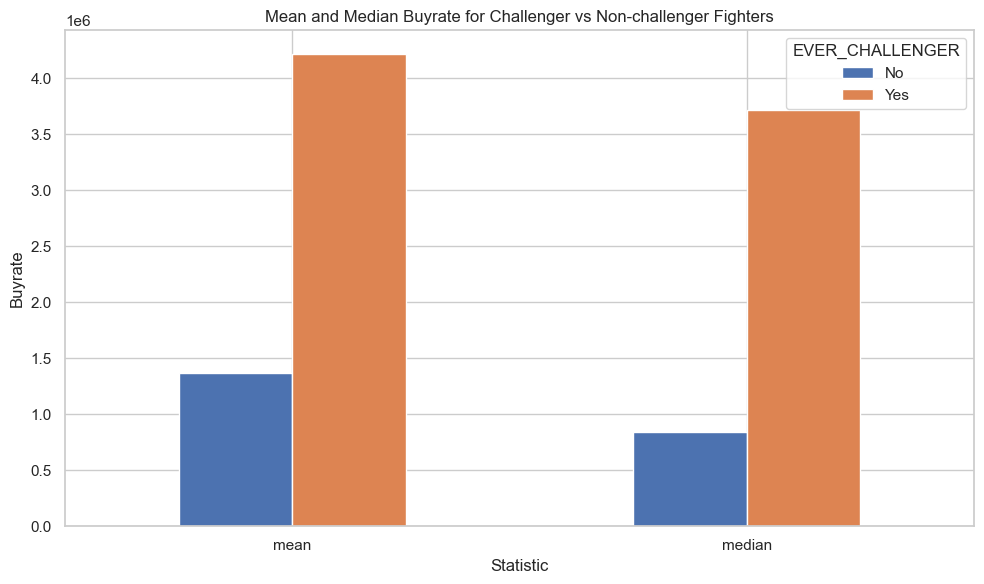

In [126]:
# Prepare data for plotting
plot_data = buyrate_stats1.T  # Transpose to get categories as columns

# Plotting
plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Mean and Median Buyrate for Challenger vs Non-challenger Fighters')
plt.ylabel('Buyrate')
plt.xlabel('Statistic')
plt.xticks(rotation=0)
plt.legend(title='EVER_CHALLENGER')
plt.tight_layout()

# Show the plot
plt.show()

In [127]:
# Calculate the number of entries that represent the top 10% of the dataset
top_10_percent_count = int(len(fb) * 0.1)

# Sort the dataset by 'Buyrate' descending and take the top 10%
top_10_percent_earners = fb.sort_values(by='Buyrate', ascending=False).head(top_10_percent_count)

top_10_percent_earners

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0         Conor McGregor  Southpaw           Yes          Yes             Yes   
1      Georges St-Pierre  Orthodox           Yes          Yes             Yes   
2             Jim Miller  Southpaw            No           No              No   
3              Jon Jones  Orthodox           Yes          Yes             Yes   
4            Demian Maia  Southpaw            No           No             Yes   
..                   ...       ...           ...          ...             ...   
133        Dominick Cruz  Orthodox           Yes           No             Yes   
134  Krzysztof Soszynski    Switch            No           No              No   
135          Max Griffin  Orthodox            No           No              No   
136        Derrick Lewis  Orthodox            No           No             Yes   
137          Aaron Riley  Southpaw            No           No              No   

    EITHER_CHAMP     Buyrate  Avg_Buyrate_Per_Event  PPV_Fights  \
0            Yes  13555166.0           1.355517e+06        10.0   
1            Yes  12430000.0           5.650000e+05        22.0   
2             No  11741000.0           6.522778e+05        18.0   
3            Yes  10992000.0           6.465882e+05        17.0   
4             No  10907000.0           5.453500e+05        20.0   
..           ...         ...                    ...         ...   
133          Yes   3975000.0           5.678571e+05         7.0   
134           No   3935000.0           5.621429e+05         7.0   
135           No   3930000.0           9.825000e+05         4.0   
136           No   3880000.0           7.760000e+05         5.0   
137           No   3830000.0           6.383333e+05         6.0   

     Buyrate_PERCENTILE  PPV_Fights_PERCENTILE  
0            100.000000              94.283647  
1             99.956841              99.927641  
2             99.913681              99.493488  
3             99.870522              99.204052  
4             99.827363              99.710564  
..                  ...                    ...  
133           94.259819              88.205499  
134           94.216659              88.205499  
135           94.173500              74.963821  
136           94.130341              81.150507  
137           94.087182              85.419682  

[138 rows x 11 columns]

In [128]:
# Calculate the number of entries that represent the top 1% of the dataset
top_1_percent_count = int(len(fb) * 0.01)

# Sort the dataset by 'Buyrate' descending and take the top 10%
top_1_percent_earners = fb.sort_values(by='Buyrate', ascending=False).head(top_1_percent_count)

top_1_percent_earners

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0      Conor McGregor  Southpaw           Yes          Yes             Yes   
1   Georges St-Pierre  Orthodox           Yes          Yes             Yes   
2          Jim Miller  Southpaw            No           No              No   
3           Jon Jones  Orthodox           Yes          Yes             Yes   
4         Demian Maia  Southpaw            No           No             Yes   
5      Anderson Silva  Southpaw           Yes           No             Yes   
6     Johny Hendricks  Southpaw           Yes           No             Yes   
7           Frank Mir  Southpaw           Yes          Yes             Yes   
8      Donald Cerrone  Orthodox            No           No             Yes   
9       Diego Sanchez  Southpaw            No           No             Yes   
10    Jeremy Stephens  Orthodox            No           No              No   
11     Dustin Poirier  Southpaw            No          Yes             Yes   
12          Jon Fitch  Orthodox            No           No             Yes   

   EITHER_CHAMP     Buyrate  Avg_Buyrate_Per_Event  PPV_Fights  \
0           Yes  13555166.0           1.355517e+06        10.0   
1           Yes  12430000.0           5.650000e+05        22.0   
2            No  11741000.0           6.522778e+05        18.0   
3           Yes  10992000.0           6.465882e+05        17.0   
4            No  10907000.0           5.453500e+05        20.0   
5           Yes  10739000.0           5.113810e+05        21.0   
6           Yes   9924000.0           6.616000e+05        15.0   
7           Yes   9519000.0           4.326818e+05        22.0   
8            No   9378429.0           6.252286e+05        15.0   
9            No   9126000.0           6.084000e+05        15.0   
10           No   8625000.0           6.160714e+05        14.0   
11          Yes   8524737.0           5.683158e+05        15.0   
12           No   8519000.0           6.085000e+05        14.0   

    Buyrate_PERCENTILE  PPV_Fights_PERCENTILE  
0           100.000000              94.283647  
1            99.956841              99.927641  
2            99.913681              99.493488  
3            99.870522              99.204052  
4            99.827363              99.710564  
5            99.784204              99.782923  
6            99.741044              98.625181  
7            99.697885              99.927641  
8            99.654726              98.625181  
9            99.611567              98.625181  
10           99.568407              98.263386  
11           99.525248              98.335745  
12           99.482089              97.937771

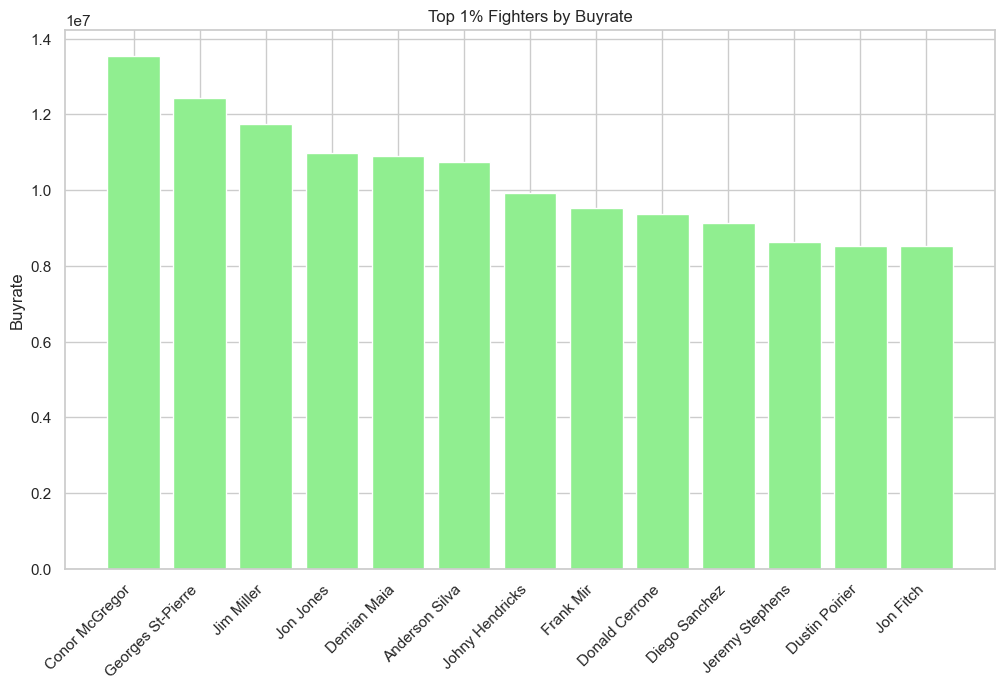

In [129]:
# Filter to top 1% fighters by their buyrate. 
top = top_1_percent_earners

# Visualization with vertical bars
plt.figure(figsize=(12, 7))
plt.bar(top['FIGHTER'], top['Buyrate'], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Buyrate')
plt.title('Top 1% Fighters by Buyrate')
plt.show()

In [130]:
top_1_percent_list

['Conor McGregor',
 'Georges St-Pierre',
 'Jim Miller',
 'Jon Jones',
 'Demian Maia',
 'Anderson Silva',
 'Johny Hendricks',
 'Frank Mir',
 'Donald Cerrone',
 'Diego Sanchez',
 'Jeremy Stephens',
 'Dustin Poirier',
 'Jon Fitch']

In [131]:
top_10_percent_list

['Conor McGregor',
 'Georges St-Pierre',
 'Jim Miller',
 'Jon Jones',
 'Demian Maia',
 'Anderson Silva',
 'Johny Hendricks',
 'Frank Mir',
 'Donald Cerrone',
 'Diego Sanchez',
 'Jeremy Stephens',
 'Dustin Poirier',
 'Jon Fitch',
 'Frankie Edgar',
 'Dong Hyun Kim',
 'Nate Diaz',
 'Thiago Alves',
 'Brock Lesnar',
 'Michael Bisping',
 'Tim Boetsch',
 'Khabib Nurmagomedov',
 'Gleison Tibau',
 'Rashad Evans',
 'Lyoto Machida',
 'Mark Bocek',
 'Forrest Griffin',
 'Matt Brown',
 'Tito Ortiz',
 'Anthony Pettis',
 'Gabriel Gonzaga',
 'Stefan Struve',
 'BJ Penn',
 'Chris Weidman',
 'John Makdessi',
 'Patrick Cote',
 'Cody Garbrandt',
 'Rick Story',
 'Josh Koscheck',
 'Matt Hughes',
 'Nik Lentz',
 'Alan Belcher',
 'Stephen Thompson',
 'Carlos Condit',
 'Cheick Kongo',
 'Chris Leben',
 'Jose Aldo',
 'Tony Ferguson',
 'Chuck Liddell',
 'Melvin Guillard',
 'Amanda Nunes',
 'Ronda Rousey',
 'Nate Marquardt',
 'Yushin Okami',
 'Daniel Cormier',
 'Stephan Bonnar',
 'Cain Velasquez',
 'Quinton Jackson',

In [132]:
# For the top 10% earners, we'll calculate the numbers and percentages for the 'STANCE', 'EVER_CHAMPION', 'EVER_INTERIM', and 'EVER_CHALLENGER' columns

# Filtering to the top 10% earners
top_10_percent = fb_sorted_by_buyrate.head(top_10_percent_count)

# Calculating counts and percentages for each specified column
columns_of_interest = ['STANCE', 'EVER_CHAMPION', 'EVER_INTERIM', 'EVER_CHALLENGER', 'EITHER_CHAMP']
summary = {}

for column in columns_of_interest:
    counts = top_10_percent[column].value_counts()
    percentages = top_10_percent[column].value_counts(normalize=True) * 100
    summary[column] = pd.DataFrame({'Number': counts, 'Percentage': percentages})

summary

{'STANCE':           Number  Percentage
 Orthodox     107   77.536232
 Southpaw      28   20.289855
 Switch         3    2.173913,
 'EVER_CHAMPION':      Number  Percentage
 No       96   69.565217
 Yes      42   30.434783,
 'EVER_INTERIM':      Number  Percentage
 No      125    90.57971
 Yes      13     9.42029,
 'EVER_CHALLENGER':      Number  Percentage
 Yes      76   55.072464
 No       62   44.927536,
 'EITHER_CHAMP':      Number  Percentage
 No       91   65.942029
 Yes      47   34.057971}

In [133]:
# For the top 1% earners, we'll calculate the numbers and percentages for the 'STANCE', 'EVER_CHAMPION', 'EVER_INTERIM', and 'EVER_CHALLENGER' columns

# Filtering to the top 1% earners
top_1_percent = fb_sorted_by_buyrate.head(top_1_percent_count)

# Calculating counts and percentages for each specified column
columns_of_interest = ['STANCE', 'EVER_CHAMPION', 'EVER_INTERIM', 'EVER_CHALLENGER', 'EITHER_CHAMP']
summary = {}

for column in columns_of_interest:
    counts = top_1_percent[column].value_counts()
    percentages = top_1_percent[column].value_counts(normalize=True) * 100
    summary[column] = pd.DataFrame({'Number': counts, 'Percentage': percentages})

summary

{'STANCE':           Number  Percentage
 Southpaw       8   61.538462
 Orthodox       5   38.461538,
 'EVER_CHAMPION':      Number  Percentage
 No        7   53.846154
 Yes       6   46.153846,
 'EVER_INTERIM':      Number  Percentage
 No        8   61.538462
 Yes       5   38.461538,
 'EVER_CHALLENGER':      Number  Percentage
 Yes      11   84.615385
 No        2   15.384615,
 'EITHER_CHAMP':      Number  Percentage
 Yes       7   53.846154
 No        6   46.153846}

### fighter_buyrate correlations

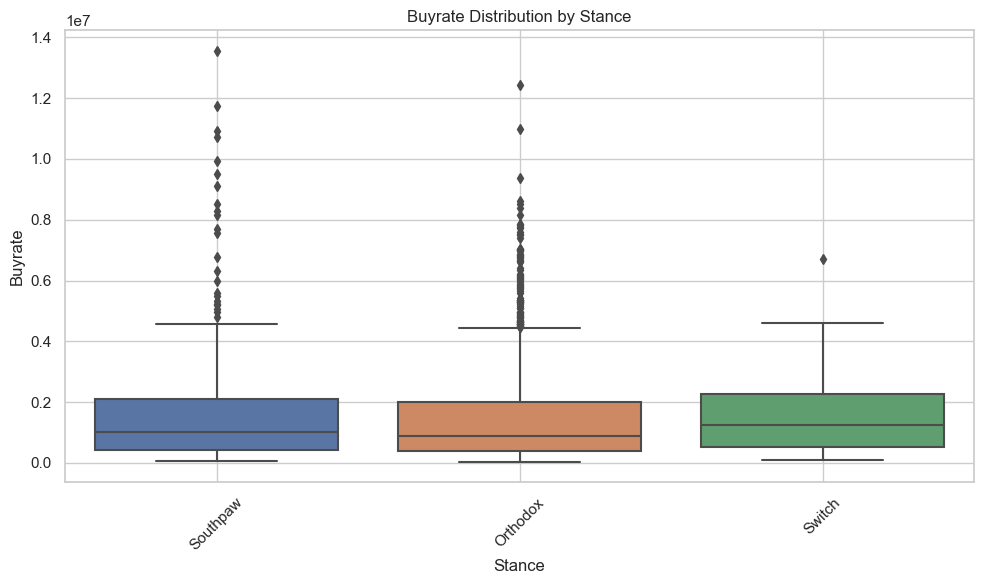

In [134]:
# Remove rows where either 'STANCE' or 'Buyrate' is missing
cleaned_data = fb.dropna(subset=['STANCE', 'Buyrate'])

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='STANCE', y='Buyrate', data=cleaned_data)
plt.title('Buyrate Distribution by Stance')
plt.xlabel('Stance')
plt.ylabel('Buyrate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [135]:
# Prepare data for ANOVA
stances = cleaned_data['STANCE'].unique()
grouped_data = [cleaned_data['Buyrate'][cleaned_data['STANCE'] == stance] for stance in stances]

# Perform ANOVA
anova_result = f_oneway(*grouped_data)

anova_result

F_onewayResult(statistic=2.0003919810677537, pvalue=0.13567748040766384)

In [136]:
# Perform Tukey HSD test
tukey_result = pairwise_tukeyhsd(endog=cleaned_data['Buyrate'], groups=cleaned_data['STANCE'], alpha=0.05)

# Convert the result to a DataFrame for better readability
tukey_summary = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])

tukey_summary

group1    group2     meandiff   p-adj        lower        upper  reject
0  Orthodox  Southpaw  249202.4272  0.1198  -47447.6301  545852.4844   False
1  Orthodox    Switch  -37828.4288  0.9876 -626748.4028  551091.5451   False
2  Southpaw    Switch -287030.8560  0.5373 -920626.6266  346564.9146   False

In [137]:
# First, let's convert the 'EITHER_CHAMP' column to a binary format where 'Yes' is 1 and 'No' is 0
fb['EITHER_CHAMP_BINARY'] = (fb['EITHER_CHAMP'] == 'Yes').astype(int)

# Now, let's calculate the correlation between 'EITHER_CHAMP_BINARY' and 'Buyrate'
correlation = fb[['EITHER_CHAMP_BINARY', 'Buyrate']].corr()

correlation

/var/folders/_6/_1qflrx12_j4kc3ssfs46ldw0000gn/T/ipykernel_2835/3371666952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['EITHER_CHAMP_BINARY'] = (fb['EITHER_CHAMP'] == 'Yes').astype(int)


EITHER_CHAMP_BINARY   Buyrate
EITHER_CHAMP_BINARY             1.000000  0.412969
Buyrate                         0.412969  1.000000

In [138]:
# First, let's convert the 'EITHER_CHAMP' column to a binary format where 'Yes' is 1 and 'No' is 0
fb['EVER_CHALLENGER_BINARY'] = (fb['EVER_CHALLENGER'] == 'Yes').astype(int)

# Now, let's calculate the correlation between 'EITHER_CHAMP_BINARY' and 'Buyrate'
correlation = fb[['EVER_CHALLENGER_BINARY', 'Buyrate']].corr()

correlation

/var/folders/_6/_1qflrx12_j4kc3ssfs46ldw0000gn/T/ipykernel_2835/1082348933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['EVER_CHALLENGER_BINARY'] = (fb['EVER_CHALLENGER'] == 'Yes').astype(int)


EVER_CHALLENGER_BINARY   Buyrate
EVER_CHALLENGER_BINARY                1.000000  0.454714
Buyrate                               0.454714  1.000000

In [139]:
# Create dummy variables for EITHER_CHAMP and EVER_CHALLENGER columns
fb['EITHER_CHAMP_dummy'] = (fb['EITHER_CHAMP'] == 'Yes').astype(int)
fb['EVER_CHALLENGER_dummy'] = (fb['EVER_CHALLENGER'] == 'Yes').astype(int)

# Create dummy variables for each value in the STANCE column
stance_dummies = pd.get_dummies(fb['STANCE'], prefix='STANCE')

# Combine the dummy variables with the original dataframe
fb_combined = pd.concat([fb, stance_dummies], axis=1)

# Display the columns of the modified dataframe to ensure the dummies were added correctly
# fb_combined.columns.tolist()

# Correcting the mistake to include STANCE dummy variables in the correlation matrix
full_correlation_matrix = fb_combined[['Buyrate', 'Avg_Buyrate_Per_Event', 'PPV_Fights', 
                                       'EITHER_CHAMP_dummy', 'EVER_CHALLENGER_dummy', 
                                       'STANCE_Orthodox', 'STANCE_Southpaw', 'STANCE_Switch']].corr()

full_correlation_matrix

/var/folders/_6/_1qflrx12_j4kc3ssfs46ldw0000gn/T/ipykernel_2835/3780777172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['EITHER_CHAMP_dummy'] = (fb['EITHER_CHAMP'] == 'Yes').astype(int)
/var/folders/_6/_1qflrx12_j4kc3ssfs46ldw0000gn/T/ipykernel_2835/3780777172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['EVER_CHALLENGER_dummy'] = (fb['EVER_CHALLENGER'] == 'Yes').astype(int)


Buyrate  Avg_Buyrate_Per_Event  PPV_Fights  \
Buyrate                1.000000               0.314592    0.894954   
Avg_Buyrate_Per_Event  0.314592               1.000000    0.000047   
PPV_Fights             0.894954               0.000047    1.000000   
EITHER_CHAMP_dummy     0.412969               0.028900    0.457227   
EVER_CHALLENGER_dummy  0.454714               0.020710    0.508737   
STANCE_Orthodox       -0.036963              -0.042655   -0.028501   
STANCE_Southpaw        0.055777               0.020872    0.055813   
STANCE_Switch         -0.008288               0.050279   -0.024089   

                       EITHER_CHAMP_dummy  EVER_CHALLENGER_dummy  \
Buyrate                          0.412969               0.454714   
Avg_Buyrate_Per_Event            0.028900               0.020710   
PPV_Fights                       0.457227               0.508737   
EITHER_CHAMP_dummy               1.000000               0.659646   
EVER_CHALLENGER_dummy            0.659646               1.000000   
STANCE_Orthodox                 -0.020250              -0.032738   
STANCE_Southpaw                  0.005268               0.024254   
STANCE_Switch                    0.043811               0.038510   

                       STANCE_Orthodox  STANCE_Southpaw  STANCE_Switch  
Buyrate                      -0.036963         0.055777      -0.008288  
Avg_Buyrate_Per_Event        -0.042655         0.020872       0.050279  
PPV_Fights                   -0.028501         0.055813      -0.024089  
EITHER_CHAMP_dummy           -0.020250         0.005268       0.043811  
EVER_CHALLENGER_dummy        -0.032738         0.024254       0.038510  
STANCE_Orthodox               1.000000        -0.866698      -0.371894  
STANCE_Southpaw              -0.866698         1.000000      -0.094764  
STANCE_Switch                -0.371894        -0.094764       1.000000

In [140]:
# Create dummy variables for EITHER_CHAMP and EVER_CHALLENGER columns
top_10_percent['EITHER_CHAMP_dummy'] = (top_10_percent['EITHER_CHAMP'] == 'Yes').astype(int)
top_10_percent['EVER_CHALLENGER_dummy'] = (top_10_percent['EVER_CHALLENGER'] == 'Yes').astype(int)

# Create dummy variables for each value in the STANCE column
stance_dummies = pd.get_dummies(top_10_percent['STANCE'], prefix='STANCE')

# Combine the dummy variables with the original dataframe
fb_combined = pd.concat([top_10_percent, stance_dummies], axis=1)

# Display the columns of the modified dataframe to ensure the dummies were added correctly
# fb_combined.columns.tolist()

# Correcting the mistake to include STANCE dummy variables in the correlation matrix
full_correlation_matrix = fb_combined[['Buyrate', 'Avg_Buyrate_Per_Event', 'PPV_Fights', 
                                       'EITHER_CHAMP_dummy', 'EVER_CHALLENGER_dummy', 
                                       'STANCE_Orthodox', 'STANCE_Southpaw', 'STANCE_Switch']].corr()

full_correlation_matrix

/var/folders/_6/_1qflrx12_j4kc3ssfs46ldw0000gn/T/ipykernel_2835/2837436102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_percent['EITHER_CHAMP_dummy'] = (top_10_percent['EITHER_CHAMP'] == 'Yes').astype(int)
/var/folders/_6/_1qflrx12_j4kc3ssfs46ldw0000gn/T/ipykernel_2835/2837436102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_percent['EVER_CHALLENGER_dummy'] = (top_10_percent['EVER_CHALLENGER'] == 'Yes').astype(int)


Buyrate  Avg_Buyrate_Per_Event  PPV_Fights  \
Buyrate                1.000000               0.049096    0.685557   
Avg_Buyrate_Per_Event  0.049096               1.000000   -0.584288   
PPV_Fights             0.685557              -0.584288    1.000000   
EITHER_CHAMP_dummy     0.308537              -0.097268    0.366633   
EVER_CHALLENGER_dummy  0.292038              -0.137815    0.362326   
STANCE_Orthodox       -0.268087              -0.024369   -0.224168   
STANCE_Southpaw        0.302463              -0.027014    0.233117   
STANCE_Switch         -0.066884               0.144238   -0.001336   

                       EITHER_CHAMP_dummy  EVER_CHALLENGER_dummy  \
Buyrate                          0.308537               0.292038   
Avg_Buyrate_Per_Event           -0.097268              -0.137815   
PPV_Fights                       0.366633               0.362326   
EITHER_CHAMP_dummy               1.000000               0.649108   
EVER_CHALLENGER_dummy            0.649108               1.000000   
STANCE_Orthodox                 -0.016195              -0.067283   
STANCE_Southpaw                  0.017633               0.093448   
STANCE_Switch                   -0.002279              -0.065150   

                       STANCE_Orthodox  STANCE_Southpaw  STANCE_Switch  
Buyrate                      -0.268087         0.302463      -0.066884  
Avg_Buyrate_Per_Event        -0.024369        -0.027014       0.144238  
PPV_Fights                   -0.224168         0.233117      -0.001336  
EITHER_CHAMP_dummy           -0.016195         0.017633      -0.002279  
EVER_CHALLENGER_dummy        -0.067283         0.093448      -0.065150  
STANCE_Orthodox               1.000000        -0.937333      -0.276952  
STANCE_Southpaw              -0.937333         1.000000      -0.075210  
STANCE_Switch                -0.276952        -0.075210       1.000000

In [141]:
# Create dummy variables for EITHER_CHAMP and EVER_CHALLENGER columns
top_1_percent['EITHER_CHAMP_dummy'] = (top_1_percent['EITHER_CHAMP'] == 'Yes').astype(int)
top_1_percent['EVER_CHALLENGER_dummy'] = (top_1_percent['EVER_CHALLENGER'] == 'Yes').astype(int)

# Create dummy variables for each value in the STANCE column
stance_dummies = pd.get_dummies(top_1_percent['STANCE'], prefix='STANCE')

# Combine the dummy variables with the original dataframe
fb_combined = pd.concat([top_1_percent, stance_dummies], axis=1)

# Display the columns of the modified dataframe to ensure the dummies were added correctly
# fb_combined.columns.tolist()

# Correcting the mistake to include STANCE dummy variables in the correlation matrix
full_correlation_matrix = fb_combined[['Buyrate', 'Avg_Buyrate_Per_Event', 'PPV_Fights', 
                                       'EITHER_CHAMP_dummy', 'EVER_CHALLENGER_dummy', 
                                       'STANCE_Orthodox', 'STANCE_Southpaw']].corr()

full_correlation_matrix

/var/folders/_6/_1qflrx12_j4kc3ssfs46ldw0000gn/T/ipykernel_2835/860985673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1_percent['EITHER_CHAMP_dummy'] = (top_1_percent['EITHER_CHAMP'] == 'Yes').astype(int)
/var/folders/_6/_1qflrx12_j4kc3ssfs46ldw0000gn/T/ipykernel_2835/860985673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1_percent['EVER_CHALLENGER_dummy'] = (top_1_percent['EVER_CHALLENGER'] == 'Yes').astype(int)


Buyrate  Avg_Buyrate_Per_Event  PPV_Fights  \
Buyrate                1.000000               0.589853    0.113339   
Avg_Buyrate_Per_Event  0.589853               1.000000   -0.704153   
PPV_Fights             0.113339              -0.704153    1.000000   
EITHER_CHAMP_dummy     0.357520               0.158545    0.204082   
EVER_CHALLENGER_dummy  0.034371               0.023418    0.093993   
STANCE_Orthodox       -0.164151              -0.124390   -0.083649   
STANCE_Southpaw        0.164151               0.124390    0.083649   

                       EITHER_CHAMP_dummy  EVER_CHALLENGER_dummy  \
Buyrate                          0.357520               0.034371   
Avg_Buyrate_Per_Event            0.158545               0.023418   
PPV_Fights                       0.204082               0.093993   
EITHER_CHAMP_dummy               1.000000               0.460566   
EVER_CHALLENGER_dummy            0.460566               1.000000   
STANCE_Orthodox                 -0.219578              -0.101130   
STANCE_Southpaw                  0.219578               0.101130   

                       STANCE_Orthodox  STANCE_Southpaw  
Buyrate                      -0.164151         0.164151  
Avg_Buyrate_Per_Event        -0.124390         0.124390  
PPV_Fights                   -0.083649         0.083649  
EITHER_CHAMP_dummy           -0.219578         0.219578  
EVER_CHALLENGER_dummy        -0.101130         0.101130  
STANCE_Orthodox               1.000000        -1.000000  
STANCE_Southpaw              -1.000000         1.000000

## frame stats

In [142]:
# Display max rows
pd.set_option('display.max_rows', None)

breakdown(frame)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

Distinct Count 
 FIGHTER                    2317
STANCE                        3
EVER_CHAMPION                 2
EVER_INTERIM                  2
EVER_CHALLENGER               2
EITHER_CHAMP                  2
HEIGHT                       23
WEIGHT                       48
REACH                        27
APE_INDEX                   179
FRAME                        44
HEIGHT_DIFF                 772
REACH_DIFF                  809
AGE_DIFF                   1583
AI_DIFF                    1078
FRAME_DIFF                  906
OPP_HEIGHT                  569
OPP_WEIGHT                  618
OPP_REACH                   592
OPP_APE_INDEX              1829
OPP_FRAME                   748
OPP_REACH_DIFF             1431
OPP_AGE_DIFF               1597
OPP_AI_DIFF                2052
OPP_FRAME_DIFF             1534
HEIGHT_DELTA                467
REACH_DELTA                 518
AGE_DELTA                   610
AI_DELTA                   1916
FRAME_DELTA                 620
HEIGHT_DELTA_RANK      

In [143]:
frame.describe()

HEIGHT       WEIGHT        REACH    APE_INDEX        FRAME  \
count  2180.000000  2285.000000  2180.000000  2180.000000  2180.000000   
mean     70.160092   166.136543    71.490826     1.018953    70.825459   
std       3.482015    34.890644     4.011389     0.026378     3.640943   
min      60.000000   115.000000    58.000000     0.920635    60.000000   
25%      68.000000   145.000000    69.000000     1.000000    68.500000   
50%      70.000000   155.000000    72.000000     1.013889    71.000000   
75%      73.000000   185.000000    74.000000     1.039089    73.500000   
max      83.000000   275.000000    84.000000     1.125000    83.500000   

       HEIGHT_DIFF   REACH_DIFF     AGE_DIFF      AI_DIFF   FRAME_DIFF  \
count  2180.000000  2180.000000  2221.000000  2180.000000  2180.000000   
mean     -0.058956    -0.466490    -0.564307    -0.005690    -0.262723   
std       1.942093     2.564479     3.548923     0.026326     2.080214   
min      -9.328423   -11.251590   -11.267538    -0.082762   -10.290007   
25%      -1.328423    -2.185220    -3.101245    -0.027023    -1.592139   
50%      -0.088424    -0.501138    -0.685643    -0.010878    -0.290007   
75%       1.170691     1.217421     1.897596     0.012026     1.108479   
max       8.138963     8.720020    13.353224     0.101657     7.589222   

        OPP_HEIGHT   OPP_WEIGHT    OPP_REACH  OPP_APE_INDEX    OPP_FRAME  \
count  2278.000000  2310.000000  2278.000000    2278.000000  2278.000000   
mean     70.193045   165.988108    71.830934       1.023263    71.011989   
std       3.148040    34.201223     3.642067       0.017115     3.350022   
min      60.000000   115.000000    60.000000       0.946667    60.000000   
25%      68.000000   140.000000    69.381250       1.013699    68.666667   
50%      70.285714   158.215909    72.000000       1.023611    71.166667   
75%      72.567460   185.000000    74.500000       1.032544    73.500000   
max      79.500000   265.000000    82.000000       1.109375    80.250000   

       OPP_REACH_DIFF  OPP_AGE_DIFF  OPP_AI_DIFF  OPP_FRAME_DIFF  \
count     2278.000000   2297.000000  2278.000000     2278.000000   
mean        -0.056961     -0.636821    -0.001250       -0.011852   
std          1.563383      2.566301     0.016283        1.252395   
min         -7.251590    -11.267538    -0.082565       -5.665245   
25%         -0.875164     -2.125546    -0.010501       -0.671204   
50%          0.013388     -0.434578    -0.001392        0.036262   
75%          0.765050      0.950849     0.007051        0.709993   
max          7.748410     15.172323     0.084828        5.709993   

       HEIGHT_DELTA  REACH_DELTA    AGE_DELTA     AI_DELTA  FRAME_DELTA  \
count   2173.000000  2173.000000  2206.000000  2173.000000  2173.000000   
mean      -0.083528    -0.399578     0.056264    -0.004412    -0.241553   
std        2.077244     2.734528     4.109363     0.029627     2.198091   
min       -7.000000   -13.000000   -13.000000    -0.132219    -8.500000   
25%       -1.500000    -2.000000    -2.980769    -0.024443    -1.600000   
50%        0.000000    -0.333333     0.000000    -0.005616    -0.208333   
75%        1.166667     1.333333     2.700000     0.015002     1.131579   
max        8.083333    10.333333    16.000000     0.106059     8.333333   

       HEIGHT_DELTA_RANK  REACH_DELTA_RANK  AGE_DELTA_RANK  AI_DELTA_RANK  \
count        2173.000000       2173.000000     2206.000000    2173.000000   
mean          241.616659        285.902899      303.892112     986.327197   
std           124.078774        140.424174      165.529317     542.493323   
min             1.000000          1.000000        1.000000       1.000000   
25%           141.000000        173.000000      166.000000     539.000000   
50%           232.000000        287.000000      301.000000     976.000000   
75%           350.000000        398.000000      451.750000    1462.000000   
max           467.000000        518.000000      610.000000    1916.000000   

       FRA

In [144]:
subset_columns = [
    'FIGHTER', 'STANCE', 'EVER_CHAMPION', 'EVER_INTERIM', 'EVER_CHALLENGER', 'EITHER_CHAMP', 
    'APE_INDEX', 'HEIGHT_DELTA', 'REACH_DELTA', 'FRAME_DELTA', 'HEIGHT_DELTA_PERCENTILE',
    'REACH_DELTA_PERCENTILE', 'FRAME_DELTA_PERCENTILE'
]

# Creating the subset dataframe
subset_df = frame[subset_columns]


### Champions

In [145]:
frame_champions = subset_df[subset_df['EITHER_CHAMP'] == 'Yes']

frame_champions

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5        Dustin Poirier  Southpaw            No          Yes             Yes   
17     Rafael Dos Anjos  Southpaw           Yes           No             Yes   
22             Petr Yan    Switch           Yes          Yes             Yes   
27        Sean O'Malley    Switch           Yes           No             Yes   
50       Brandon Moreno  Orthodox           Yes          Yes             Yes   
...                 ...       ...           ...          ...             ...   
2241      Carlos Newton  Orthodox           Yes           No             Yes   
2246    Ricco Rodriguez  Orthodox           Yes           No             Yes   
2273  Murilo Bustamante  Orthodox           Yes           No             Yes   
2278       Pat Miletich  Orthodox           Yes           No             Yes   
2282    Kevin Randleman  Orthodox           Yes           No             Yes   

     EITHER_CHAMP  APE_INDEX  HEIGHT_DELTA  REACH_DELTA  FRAME_DELTA  \
5             Yes   1.043478     -0.733333     0.366667    -0.183333   
17            Yes   1.029412     -2.428571    -2.371429    -2.400000   
22            Yes   1.000000      0.076923    -1.923077    -0.923077   
27            Yes   1.014085      3.500000     2.916667     3.208333   
50            Yes   1.044776      1.200000     2.266667     1.733333   
...           ...        ...           ...          ...          ...   
2241          Yes   1.000000     -1.250000    -2.250000    -1.750000   
2246          Yes   1.000000      2.285714     1.000000     1.642857   
2273          Yes   1.000000      2.000000     0.666667     1.333333   
2278          Yes   1.000000     -0.600000    -1.400000    -1.000000   
2282          Yes   1.000000     -3.250000    -4.750000    -4.000000   

      HEIGHT_DELTA_PERCENTILE  REACH_DELTA_PERCENTILE  FRAME_DELTA_PERCENTILE  
5                   37.689830               61.297745               50.529222  
17                  11.803958               22.411413               15.485504  
22                  55.384261               29.498389               37.735849  
27                  96.042338               88.748274               94.845835  
50                  75.218592               84.583525               82.236539  
...                       ...                     ...                     ...  
2241                27.979751               23.676944               23.101703  
2246                87.735849               70.432582               81.132075  
2273                84.836631               66.037736               77.657616  
2278                40.128854               35.066728               35.687989  
2282                 5.338242                6.189600                4.555913  

[105 rows x 13 columns]

In [146]:
frame_champions.describe()

APE_INDEX  HEIGHT_DELTA  REACH_DELTA  FRAME_DELTA  \
count  105.000000    105.000000   105.000000   105.000000   
mean     1.026797      0.056519     0.200751     0.128635   
std      0.027708      1.694103     2.395933     1.831165   
min      0.955882     -4.000000    -6.400000    -5.033333   
25%      1.000000     -0.812500    -1.400000    -1.000000   
50%      1.027027      0.000000     0.235294     0.095238   
75%      1.044776      1.166667     1.571429     1.500000   
max      1.105263      5.500000     8.260870     5.173913   

       HEIGHT_DELTA_PERCENTILE  REACH_DELTA_PERCENTILE  FRAME_DELTA_PERCENTILE  
count               105.000000              105.000000              105.000000  
mean                 52.694103               56.344093               55.304933  
std                  25.876933               26.727779               26.141637  
min                   2.922227                1.679705                1.702715  
25%                  36.493327               35.066728               35.687989  
50%                  52.600092               58.950759               55.729406  
75%                  74.873447               77.542568               79.475380  
max                  99.332720               99.907961               99.171652

### Challengers

In [147]:
frame_challengers = subset_df[subset_df['EVER_CHALLENGER'] == 'Yes']

frame_challengers

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5       Dustin Poirier  Southpaw            No          Yes             Yes   
6        Gilbert Burns  Orthodox            No           No             Yes   
17    Rafael Dos Anjos  Southpaw           Yes           No             Yes   
22            Petr Yan    Switch           Yes          Yes             Yes   
26         Marlon Vera    Switch            No           No             Yes   
...                ...       ...           ...          ...             ...   
2277    Hayato Sakurai  Orthodox            No           No             Yes   
2278      Pat Miletich  Orthodox           Yes           No             Yes   
2282   Kevin Randleman  Orthodox           Yes           No             Yes   
2289        Yuki Kondo  Southpaw            No           No             Yes   
2296  Kenichi Yamamoto  Orthodox            No           No             Yes   

     EITHER_CHAMP  APE_INDEX  HEIGHT_DELTA  REACH_DELTA  FRAME_DELTA  \
5             Yes   1.043478     -0.733333     0.366667    -0.183333   
6              No   1.014286     -0.818182    -1.727273    -1.272727   
17            Yes   1.029412     -2.428571    -2.371429    -2.400000   
22            Yes   1.000000      0.076923    -1.923077    -0.923077   
26             No   1.029412      0.521739     1.347826     0.934783   
...           ...        ...           ...          ...          ...   
2277           No   1.000000     -2.000000    -6.000000    -4.000000   
2278          Yes   1.000000     -0.600000    -1.400000    -1.000000   
2282          Yes   1.000000     -3.250000    -4.750000    -4.000000   
2289           No   1.000000     -2.666667    -3.000000    -2.833333   
2296           No   1.000000      2.000000     2.000000     2.000000   

      HEIGHT_DELTA_PERCENTILE  REACH_DELTA_PERCENTILE  FRAME_DELTA_PERCENTILE  
5                   37.689830               61.297745               50.529222  
6                   36.424298               31.201104               29.797515  
17                  11.803958               22.411413               15.485504  
22                  55.384261               29.498389               37.735849  
26                  63.368615               75.103543               71.237920  
...                       ...                     ...                     ...  
2277                16.820064                2.439024                4.555913  
2278                40.128854               35.066728               35.687989  
2282                 5.338242                6.189600                4.555913  
2289                 9.710078               16.175794               11.527842  
2296                84.836631               81.845375               86.102163  

[221 rows x 13 columns]

In [148]:
frame_challengers.describe()

APE_INDEX  HEIGHT_DELTA  REACH_DELTA  FRAME_DELTA  \
count  221.000000    221.000000   221.000000   221.000000   
mean     1.025508     -0.033799     0.107765     0.036983   
std      0.027757      1.797022     2.417903     1.889372   
min      0.955882     -6.571429    -7.388889    -6.583333   
25%      1.000000     -1.076923    -1.500000    -1.071429   
50%      1.027027     -0.041667     0.000000     0.000000   
75%      1.043478      1.000000     1.571429     1.312500   
max      1.120000      6.500000     8.260870     6.125000   

       HEIGHT_DELTA_PERCENTILE  REACH_DELTA_PERCENTILE  FRAME_DELTA_PERCENTILE  
count               221.000000              221.000000              221.000000  
mean                 50.925176               55.299094               53.820125  
std                  26.200253               26.819117               26.540393  
min                   0.230097                0.690290                0.460193  
25%                  29.682467               33.548090               33.617119  
50%                  49.930971               55.453290               53.796595  
75%                  71.514036               77.542568               77.450529  
max                  99.769903               99.907961               99.654855

### Non Champions

In [149]:
frame_non_champions = subset_df[subset_df['EITHER_CHAMP'] != 'Yes']

frame_non_champions.describe()

APE_INDEX  HEIGHT_DELTA  REACH_DELTA  FRAME_DELTA  \
count  2075.000000   2068.000000  2068.000000  2068.000000   
mean      1.018556     -0.090638    -0.430059    -0.260349   
std       0.026253      2.094919     2.747623     2.213824   
min       0.920635     -7.000000   -13.000000    -8.500000   
25%       1.000000     -1.500000    -2.090909    -1.625000   
50%       1.013889     -0.064583    -0.375000    -0.228220   
75%       1.031746      1.166667     1.333333     1.125000   
max       1.125000      8.083333    10.333333     8.333333   

       HEIGHT_DELTA_PERCENTILE  REACH_DELTA_PERCENTILE  FRAME_DELTA_PERCENTILE  
count              2068.000000             2068.000000             2068.000000  
mean                 49.887388               49.702065               49.754827  
std                  29.006774               28.941008               28.983471  
min                   0.115048                0.046019                0.069029  
25%                  23.815002               24.643350               24.551312  
50%                  49.804418               49.654855               49.689370  
75%                  74.873447               74.666360               74.827428  
max                 100.000000              100.000000              100.000000

### Non Challengers

In [150]:
frame_non_challengers = subset_df[subset_df['EVER_CHALLENGER'] != 'Yes']

frame_non_challengers.describe()

APE_INDEX  HEIGHT_DELTA  REACH_DELTA  FRAME_DELTA  \
count  1959.000000   1952.000000  1952.000000  1952.000000   
mean      1.018213     -0.089158    -0.457019    -0.273088   
std       0.026122      2.106956     2.762785     2.228585   
min       0.920635     -7.000000   -13.000000    -8.500000   
25%       1.000000     -1.500000    -2.135714    -1.666667   
50%       1.013699      0.000000    -0.428571    -0.240385   
75%       1.031250      1.203571     1.333333     1.114583   
max       1.125000      8.083333    10.333333     8.333333   

       HEIGHT_DELTA_PERCENTILE  REACH_DELTA_PERCENTILE  FRAME_DELTA_PERCENTILE  
count              1952.000000             1952.000000             1952.000000  
mean                 49.920869               49.425666               49.593111  
std                  29.154905               29.036276               29.098911  
min                   0.115048                0.046019                0.069029  
25%                  23.815002               24.275196               24.160147  
50%                  52.600092               49.148642               49.378739  
75%                  75.247354               74.666360               74.689370  
max                 100.000000              100.000000              100.000000

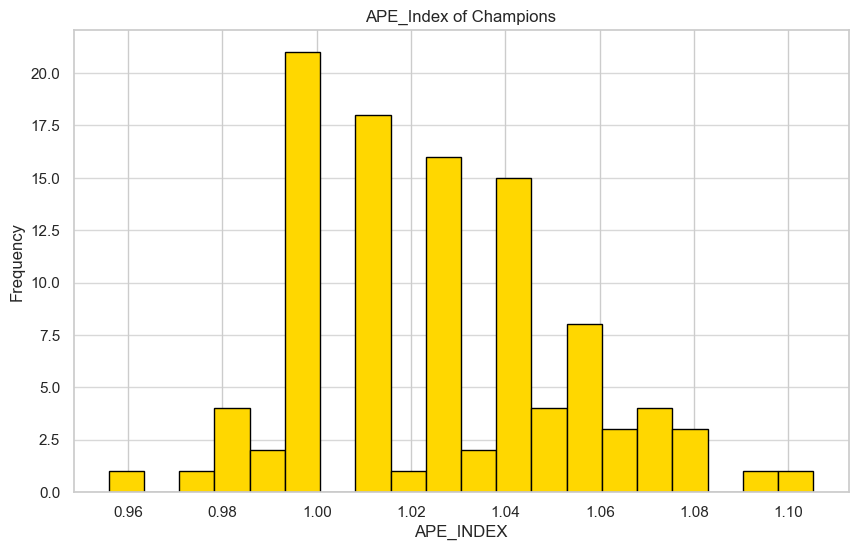

In [151]:
# Plotting the histogram of APE_INDEX for fighters who have been a champion
plt.figure(figsize=(10, 6))
plt.hist(frame_champions['APE_INDEX'].dropna(), bins=20, color='gold', edgecolor='black')
plt.title('APE_Index of Champions')
plt.xlabel('APE_INDEX')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

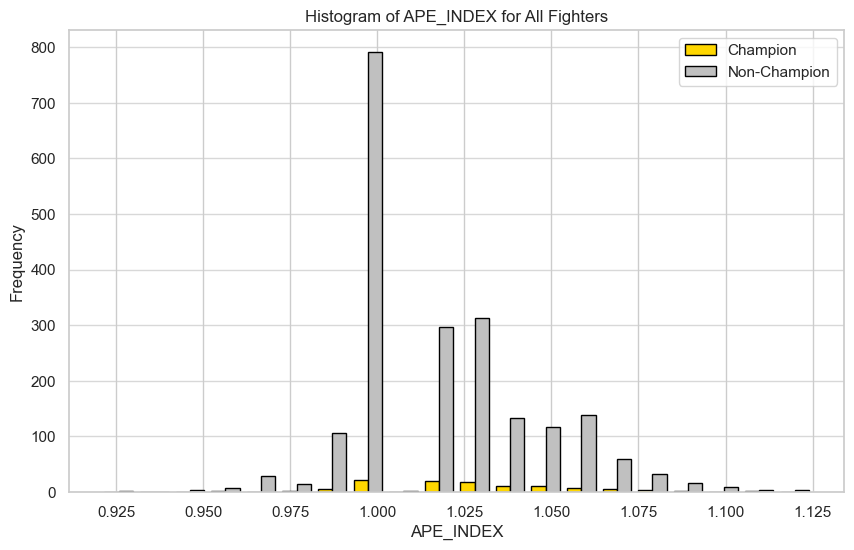

In [152]:
# Separate APE_INDEX based on EITHER_CHAMP 'Yes' or 'No'
ape_yes = frame[frame['EITHER_CHAMP'] == 'Yes']['APE_INDEX']
ape_no = frame[frame['EITHER_CHAMP'] == 'No']['APE_INDEX']

# Plotting the histogram with two colors
plt.figure(figsize=(10, 6))
plt.hist([ape_yes.dropna(), ape_no.dropna()], bins=20, color=['gold', 'silver'], label=['Champion', 'Non-Champion'], edgecolor='black')
plt.title('Histogram of APE_INDEX for All Fighters')
plt.xlabel('APE_INDEX')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

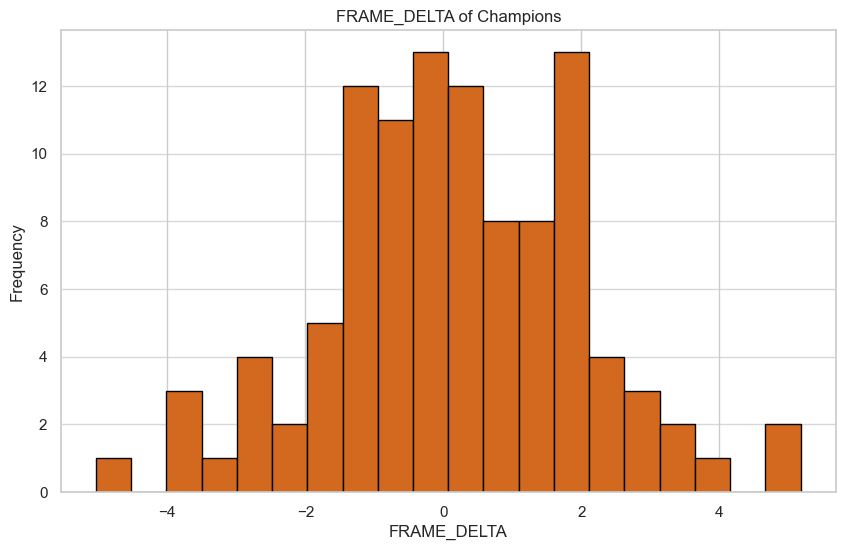

In [153]:
# Plotting the histogram of FRAME_DELTA for fighters who have been a champion
plt.figure(figsize=(10, 6))
plt.hist(frame_champions['FRAME_DELTA'].dropna(), bins=20, color='chocolate', edgecolor='black')
plt.title('FRAME_DELTA of Champions')
plt.xlabel('FRAME_DELTA')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

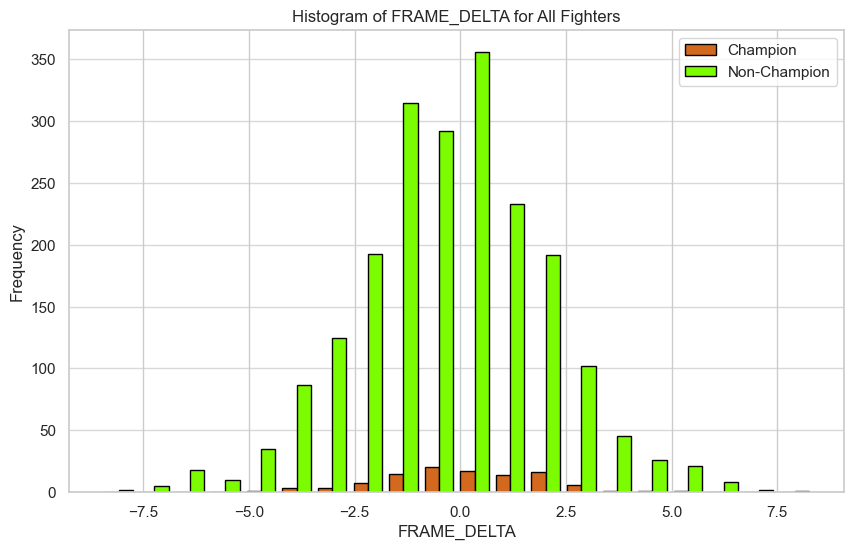

In [154]:
# Separate APE_INDEX based on EITHER_CHAMP 'Yes' or 'No'
h_yes = frame[frame['EITHER_CHAMP'] == 'Yes']['FRAME_DELTA']
h_no = frame[frame['EITHER_CHAMP'] == 'No']['FRAME_DELTA']

# Plotting the histogram with two colors
plt.figure(figsize=(10, 6))
plt.hist([h_yes.dropna(), h_no.dropna()], bins=20, color=['chocolate', 'lawngreen'], label=['Champion', 'Non-Champion'], edgecolor='black')
plt.title('Histogram of FRAME_DELTA for All Fighters')
plt.xlabel('FRAME_DELTA')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

## career_stats

In [155]:
# Filter the dataframe using the correct column name "FIGHTER"
c = career[career['FIGHTER'].isin(fighters_list)]

c

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
5         Dustin Poirier  Southpaw            No          Yes             Yes   
...                  ...       ...           ...          ...             ...   
2252         Ian Freeman  Orthodox            No           No              No   
2264      Eugene Jackson  Orthodox            No           No              No   
2278        Pat Miletich  Orthodox           Yes           No             Yes   
2282     Kevin Randleman  Orthodox           Yes           No             Yes   
2286         Fabiano Iha  Orthodox            No           No              No   

     EITHER_CHAMP    KD    TD  SUB.ATT  REV       CTRL    HEAD   BODY    LEG  \
1              No   0.0   0.0      1.0  1.0  10.750000   203.0  149.0   52.0   
2              No   2.0  62.0      0.0  0.0  80.250000   395.0   69.0  110.0   
3              No   0.0  25.0      8.0  1.0  47.950000   143.0    8.0    2.0   
4              No   4.0  16.0      5.0  1.0  24.416667   159.0   85.0   43.0   
5             Yes  14.0  28.0     24.0  4.0  69.400000  1343.0  158.0  177.0   
...           ...   ...   ...      ...  ...        ...     ...    ...    ...   
2252           No   0.0   3.0      1.0  1.0  17.100000    86.0    9.0    4.0   
2264           No   0.0   2.0      3.0  0.0   0.700000     3.0    1.0    0.0   
2278          Yes   1.0   6.0      3.0  0.0  14.166667    47.0    6.0   11.0   
2282          Yes   0.0   5.0      3.0  0.0  25.866667    43.0    6.0    1.0   
2286           No   0.0   5.0      6.0  0.0   8.616667    24.0    3.0   10.0   

      DISTANCE  CLINCH  GROUND     SIG  TOT.SIG     STR  TOTAL.STR  TOTAL.TD  \
1        285.0    35.0    84.0   404.0    700.0   579.0      895.0       0.0   
2        260.0    73.0   241.0   574.0   1144.0  1016.0     1681.0     116.0   
3          8.0     3.0   142.0   153.0    232.0   328.0      442.0      42.0   
4        166.0    50.0    71.0   287.0    525.0   439.0      700.0      43.0   
5       1262.0   254.0   162.0  1678.0   3284.0  2010.0     3654.0      77.0   
...        ...     ...     ...     ...      ...     ...        ...       ...   
2252      11.0    28.0    60.0    99.0    196.0   214.0      317.0       6.0   
2264       2.0     1.0     1.0     4.0     17.0    73.0       89.0       3.0   
2278      40.0     9.0    15.0    64.0    140.0   202.0      281.0       6.0   
2282      14.0     8.0    28.0    50.0    110.0   153.0      222.0       9.0   
2286      12.0    13.0    12.0    37.0     79.0    73.0      121.0      11.0   

      TOTAL.HEAD  TOTAL.BODY  TOTAL.LEG  TOTAL.DISTANCE  TOTAL.CLINCH  \
1          448.0       193.0       59.0           531.0          46.0   
2          941.0        80.0      123.0           754.0          91.0   
3          216.0        10.0        6.0            22.0           8.0   
4          372.0       108.0       45.0           335.0          64.0   
5         2850.0       219.0      215.0          2644.0         387.0   
...          ...         ...        ...             ...           ...   
2252       180.0        12.0        4.0            52.0          42.0   
2264        15.0         2.0        0.0            14.0           1.0   
2278       120.0         7.0       13.0           107.0          14.0   
2282       103.0         6.0        1.0            46.0          10.0   
2286        62.0         6.0       11.0            38.0          22.0   

      TOTAL.GROUND  OPP_KD  OPP_TD  OPP_SUB.ATT  OPP_REV   OPP_CTRL  OPP_HEAD  \
1            123.0     2.0    16.0          5.0      2.0  20.200000     222.0   
2            299.0     4.0    13.0          2.0      0.0   7.650000     224.0   
3 

In [156]:
c.describe()

KD           TD      SUB.ATT          REV         CTRL  \
count  1321.000000  1321.000000  1321.000000  1321.000000  1321.000000   
mean      2.252839    10.596518     3.781983     1.286147    22.030066   
std       2.797936    12.094638     4.775982     1.735074    21.518480   
min       0.000000     0.000000     0.000000     0.000000     0.016667   
25%       0.000000     3.000000     1.000000     0.000000     7.500000   
50%       1.000000     7.000000     2.000000     1.000000    15.566667   
75%       3.000000    14.000000     5.000000     2.000000    30.366667   
max      20.000000    90.000000    48.000000    13.000000   162.116667   

              HEAD         BODY          LEG     DISTANCE       CLINCH  \
count  1321.000000  1321.000000  1321.000000  1321.000000  1321.000000   
mean    232.949281    75.190008    59.572294   266.233157    50.746404   
std     206.074111    73.364291    64.177366   256.704216    51.291325   
min       3.000000     0.000000     0.000000     2.000000     0.000000   
25%      94.000000    27.000000    19.000000    96.000000    17.000000   
50%     172.000000    52.000000    39.000000   186.000000    35.000000   
75%     299.000000    98.000000    76.000000   337.000000    65.000000   
max    2117.000000   723.000000   508.000000  2709.000000   453.000000   

            GROUND          SIG      TOT.SIG          STR    TOTAL.STR  \
count  1321.000000  1321.000000  1321.000000  1321.000000  1321.000000   
mean     50.732021   367.711582   824.610901   543.055261  1024.389856   
std      55.189324   318.010726   706.163668   437.079073   824.978180   
min       0.000000     4.000000    17.000000    20.000000    55.000000   
25%      15.000000   151.000000   337.000000   242.000000   446.000000   
50%      33.000000   272.000000   608.000000   416.000000   776.000000   
75%      66.000000   467.000000  1052.000000   700.000000  1328.000000   
max     461.000000  3122.000000  6586.000000  3366.000000  6859.000000   

          TOTAL.TD   TOTAL.HEAD   TOTAL.BODY    TOTAL.LEG  TOTAL.DISTANCE  \
count  1321.000000  1321.000000  1321.000000  1321.000000     1321.000000   
mean     27.595004   642.404996   108.452687    73.753217      678.369417   
std      30.025952   556.757267   105.465905    80.207654      621.034104   
min       0.000000    15.000000     2.000000     0.000000       14.000000   
25%       8.000000   260.000000    38.000000    24.000000      261.000000   
50%      18.000000   474.000000    77.000000    48.000000      484.000000   
75%      36.000000   838.000000   143.000000    94.000000      871.000000   
max     274.000000  5254.000000   964.000000   630.000000     6034.000000   

       TOTAL.CLINCH  TOTAL.GROUND       OPP_KD       OPP_TD  OPP_SUB.ATT  \
count   1321.000000   1321.000000  1321.000000  1321.000000  1321.000000   
mean      72.629069     73.612415     1.996972     9.981075     3.450416   
std       70.811884     79.410315     2.045688     8.668933     3.875037   
min        0.000000      0.000000     0.000000     0.000000     0.000000   
25%       26.000000     22.000000     0.000000     4.000000     1.000000   
50%       50.000000     48.000000     1.000000     8.000000     2.000000   
75%       93.000000     98.000000     3.000000    14.000000     5.000000   
max      576.000000    656.000000    12.000000    74.000000    29.000000   

           OPP_REV     OPP_CTRL     OPP_HEAD     OPP_BODY      OPP_LEG  \
count  1321.000000  1321.000000  1321.000000  1321.000000  1321.000000   
mean      1.267979    20.563096   221.841787    73.132475    58.787282   
std       1.741024    16.528213   177.951083    59.925306    53.229429   
min       0.000000     0.016667     8.000000     0.000000     1.000000   
25%       0.000000     9.433333   101.000000    31.000000    23.000000   
50%       1.000000    16.400000   166.000000    57.000000    43.000000   
75%       2.000000    26.716667   290.000000    96.000000    77.000000   
max      12.000000   128.183333  1310.000000

In [157]:
# Selecting general performance indicators based on available columns
metrics = [
    "KD", "TD", "SUB.ATT", "REV", "CTRL", "HEAD", "BODY", "LEG", "DISTANCE",
    "CLINCH", "GROUND", "SIG", "STR", "TD_DEF", "HEAD_DEF", "BODY_DEF", "LEG_DEF",
    "DISTANCE_DEF", "CLINCH_DEF", "GROUND_DEF", "SIG_DEF", "STR_DEF", "TD_%",
    "HEAD_%", "BODY_%", "LEG_%", "DISTANCE_%", "CLINCH_%", "GROUND_%", "SIG_%",
    "STR_%", "TD_DEF_%", "HEAD_DEF_%", "BODY_DEF_%", "LEG_DEF_%", "DISTANCE_DEF_%",
    "CLINCH_DEF_%", "GROUND_DEF_%", "SIG_DEF_%", "STR_DEF_%"
]

# Reinitializing the dictionary to hold the top ten fighters for the updated list of metrics
top_fighters_per_metric = {}

# Creating a dictionary to hold the top ten fighters for each metric
top_fighters_per_metric = {}

# Finding the top ten fighters for each metric
for metric in metrics:
    # Some metrics may have missing values, so we sort only non-NA values
    top_fighters_per_metric[metric] = c.nlargest(10, metric)[['FIGHTER', metric]]

# Printing the top ten fighters for each metric with a blank line in between
for metric, data in top_fighters_per_metric.items():
    print(f"Top ten fighters for {metric}:")
    if isinstance(data, pd.DataFrame):
        print(data.to_string(index=False))
    else:
        print(data)
    print("\n")  # Blank line for separation

Top ten fighters for KD:
          FIGHTER   KD
   Donald Cerrone 20.0
  Jeremy Stephens 18.0
   Anderson Silva 18.0
    Edson Barboza 16.0
   Dustin Poirier 14.0
     Mauricio Rua 14.0
    Thiago Santos 14.0
Junior Dos Santos 14.0
    Lyoto Machida 14.0
    Chuck Liddell 14.0


Top ten fighters for TD:
           FIGHTER   TD
 Georges St-Pierre 90.0
     Gleison Tibau 84.0
 Merab Dvalishvili 79.0
        Clay Guida 78.0
Demetrious Johnson 74.0
     Frankie Edgar 73.0
   Colby Covington 69.0
         Nik Lentz 69.0
  Rafael Dos Anjos 68.0
       Demian Maia 68.0


Top ten fighters for SUB.ATT:
         FIGHTER  SUB.ATT
      Jim Miller     48.0
Charles Oliveira     40.0
     Chris Lytle     31.0
      Joe Lauzon     29.0
     Demian Maia     27.0
       Nate Diaz     26.0
       Nik Lentz     26.0
   Darren Elkins     25.0
  Dustin Poirier     24.0
      Matt Brown     24.0


Top ten fighters for REV:
        FIGHTER  REV
   Louis Smolka 13.0
   Alex Caceres 12.0
 Anthony Pettis 11.0
 

### Champions

In [158]:
# Champions
c_champions = career[career['EITHER_CHAMP'] == 'Yes']

c_champions

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5        Dustin Poirier  Southpaw            No          Yes             Yes   
17     Rafael Dos Anjos  Southpaw           Yes           No             Yes   
22             Petr Yan    Switch           Yes          Yes             Yes   
27        Sean O'Malley    Switch           Yes           No             Yes   
50       Brandon Moreno  Orthodox           Yes          Yes             Yes   
...                 ...       ...           ...          ...             ...   
2241      Carlos Newton  Orthodox           Yes           No             Yes   
2246    Ricco Rodriguez  Orthodox           Yes           No             Yes   
2273  Murilo Bustamante  Orthodox           Yes           No             Yes   
2278       Pat Miletich  Orthodox           Yes           No             Yes   
2282    Kevin Randleman  Orthodox           Yes           No             Yes   

     EITHER_CHAMP    KD    TD  SUB.ATT  REV        CTRL    HEAD   BODY    LEG  \
5             Yes  14.0  28.0     24.0  4.0   69.400000  1343.0  158.0  177.0   
17            Yes   7.0  68.0     20.0  3.0  136.750000  1061.0  433.0  324.0   
22            Yes  10.0  25.0      2.0  2.0   32.866667   758.0  231.0  126.0   
27            Yes   6.0   3.0      3.0  1.0    1.966667   668.0  208.0   88.0   
50            Yes   4.0  30.0      8.0  6.0   52.816667   738.0  162.0   99.0   
...           ...   ...   ...      ...  ...         ...     ...    ...    ...   
2241          Yes   0.0   7.0      4.0  3.0   11.750000    11.0    9.0    3.0   
2246          Yes   0.0  17.0      6.0  2.0   39.600000   142.0   25.0   11.0   
2273          Yes   2.0   6.0      2.0  0.0    7.183333    36.0    4.0    1.0   
2278          Yes   1.0   6.0      3.0  0.0   14.166667    47.0    6.0   11.0   
2282          Yes   0.0   5.0      3.0  0.0   25.866667    43.0    6.0    1.0   

      DISTANCE  CLINCH  GROUND     SIG  TOT.SIG     STR  TOTAL.STR  TOTAL.TD  \
5       1262.0   254.0   162.0  1678.0   3284.0  2010.0     3654.0      77.0   
17      1220.0   321.0   277.0  1818.0   3858.0  2587.0     4723.0     191.0   
22       806.0   122.0   187.0  1115.0   2083.0  1438.0     2437.0      49.0   
27       910.0    19.0    35.0   964.0   1556.0   991.0     1589.0       7.0   
50       856.0    56.0    87.0   999.0   2268.0  1307.0     2599.0      64.0   
...        ...     ...     ...     ...      ...     ...        ...       ...   
2241      11.0     9.0     3.0    23.0     77.0    98.0      158.0      13.0   
2246      43.0    26.0   109.0   178.0    314.0   473.0      626.0      42.0   
2273      24.0     4.0    13.0    41.0     82.0    68.0      109.0      29.0   
2278      40.0     9.0    15.0    64.0    140.0   202.0      281.0       6.0   
2282      14.0     8.0    28.0    50.0    110.0   153.0      222.0       9.0   

      TOTAL.HEAD  TOTAL.BODY  TOTAL.LEG  TOTAL.DISTANCE  TOTAL.CLINCH  \
5         2850.0       219.0      215.0          2644.0         387.0   
17        2880.0       588.0      390.0          3046.0         407.0   
22        1665.0       284.0      134.0          1700.0         154.0   
27        1199.0       265.0       92.0          1491.0          23.0   
50        1925.0       223.0      120.0          2032.0         102.0   
...          ...         ...        ...             ...           ...   
2241        64.0        10.0        3.0            55.0          14.0   
2246       268.0        34.0       12.0           113.0          34.0   
2273        77.0         4.0        1.0            42.0          11.0   
2278       120.0         7.0       13.0           107.0          14.0   
2282       103.0         6.0        1.0            46.0          10.0   

      TOTAL.GROUND  OPP_KD  OPP_TD  OPP_SUB.ATT  OPP_REV    OPP_CTRL  \
5            253.0     3.0    29.0         28.0      3.0   58.800000   
17           405.0     2.0    74.0          2.0      2.0  125.066667   
22           229.0     1.0  

In [159]:
c_champions.describe()

KD          TD     SUB.ATT         REV        CTRL  \
count  105.000000  105.000000  105.000000  105.000000  105.000000   
mean     5.095238   21.266667    6.523810    1.647619   43.173333   
std      4.093907   19.244513    6.342917    2.014281   33.787510   
min      0.000000    0.000000    0.000000    0.000000    1.966667   
25%      2.000000    6.000000    2.000000    0.000000   16.116667   
50%      4.000000   16.000000    5.000000    1.000000   33.250000   
75%      8.000000   30.000000   10.000000    3.000000   60.000000   
max     18.000000   90.000000   40.000000   11.000000  162.116667   

              HEAD        BODY         LEG     DISTANCE      CLINCH  \
count   105.000000  105.000000  105.000000   105.000000  105.000000   
mean    502.019048  155.123810  124.000000   557.952381  105.285714   
std     337.013324  116.603428  103.537247   426.853726   79.759821   
min      11.000000    4.000000    1.000000    11.000000    4.000000   
25%     263.000000   81.000000   49.000000   220.000000   51.000000   
50%     454.000000  132.000000   99.000000   509.000000   89.000000   
75%     668.000000  207.000000  198.000000   755.000000  141.000000   
max    2117.000000  723.000000  508.000000  2709.000000  359.000000   

           GROUND          SIG      TOT.SIG          STR    TOTAL.STR  \
count  105.000000   105.000000   105.000000   105.000000   105.000000   
mean   117.904762   781.142857  1642.685714  1117.323810  2015.828571   
std     92.796564   502.187148  1096.090582   636.510371  1219.192462   
min      3.000000    23.000000    77.000000    68.000000   109.000000   
25%     49.000000   400.000000   837.000000   593.000000  1076.000000   
50%    101.000000   738.000000  1483.000000  1064.000000  1881.000000   
75%    152.000000   999.000000  2154.000000  1521.000000  2716.000000   
max    461.000000  3122.000000  6586.000000  3366.000000  6859.000000   

         TOTAL.TD   TOTAL.HEAD  TOTAL.BODY   TOTAL.LEG  TOTAL.DISTANCE  \
count  105.000000   105.000000  105.000000  105.000000      105.000000   
mean    50.457143  1275.323810  214.466667  152.895238     1326.704762   
std     45.315566   878.010135  162.951271  131.673323      994.435131   
min      0.000000    64.000000    4.000000    1.000000       42.000000   
25%     13.000000   696.000000   97.000000   55.000000      565.000000   
50%     42.000000  1135.000000  186.000000  123.000000     1208.000000   
75%     75.000000  1665.000000  283.000000  249.000000     1740.000000   
max    232.000000  5254.000000  964.000000  630.000000     6034.000000   

       TOTAL.CLINCH  TOTAL.GROUND      OPP_KD      OPP_TD  OPP_SUB.ATT  \
count    105.000000    105.000000  105.000000  105.000000   105.000000   
mean     147.400000    168.580952    2.847619   14.514286     4.180952   
std      109.010285    129.461145    2.691800   12.000893     4.652917   
min       10.000000      8.000000    0.000000    0.000000     0.000000   
25%       66.000000     68.000000    1.000000    6.000000     1.000000   
50%      124.000000    142.000000    2.000000   12.000000     3.000000   
75%      196.000000    218.000000    5.000000   19.000000     6.000000   
max      474.000000    656.000000   12.000000   74.000000    28.000000   

          OPP_REV    OPP_CTRL     OPP_HEAD    OPP_BODY     OPP_LEG  \
count  105.000000  105.000000   105.000000  105.000000  105.000000   
mean     1.523810   29.469206   386.523810  128.561905  107.238095   
std      2.057329   23.436535   257.322758   86.901350   79.699499   
min      0.000000    0.016667    21.000000    9.000000    5.000000   
25%      0.000000   10.550000   192.000000   60.000000   45.000000   
50%      1.000000   23.983333   348.000000  113.000000   93.000000   
75%      2.000000   43.783333   519.000000  196.000000  152.000000   
max      9.000000  125.066667  1310.000000  454.000000  486.000000   

       OPP_DISTANCE  OPP_CLINCH  OPP_GROUND      OPP_SIG  OPP_TOT.SIG  \
count    105.000000  105.000000  105.000000   105.000000 

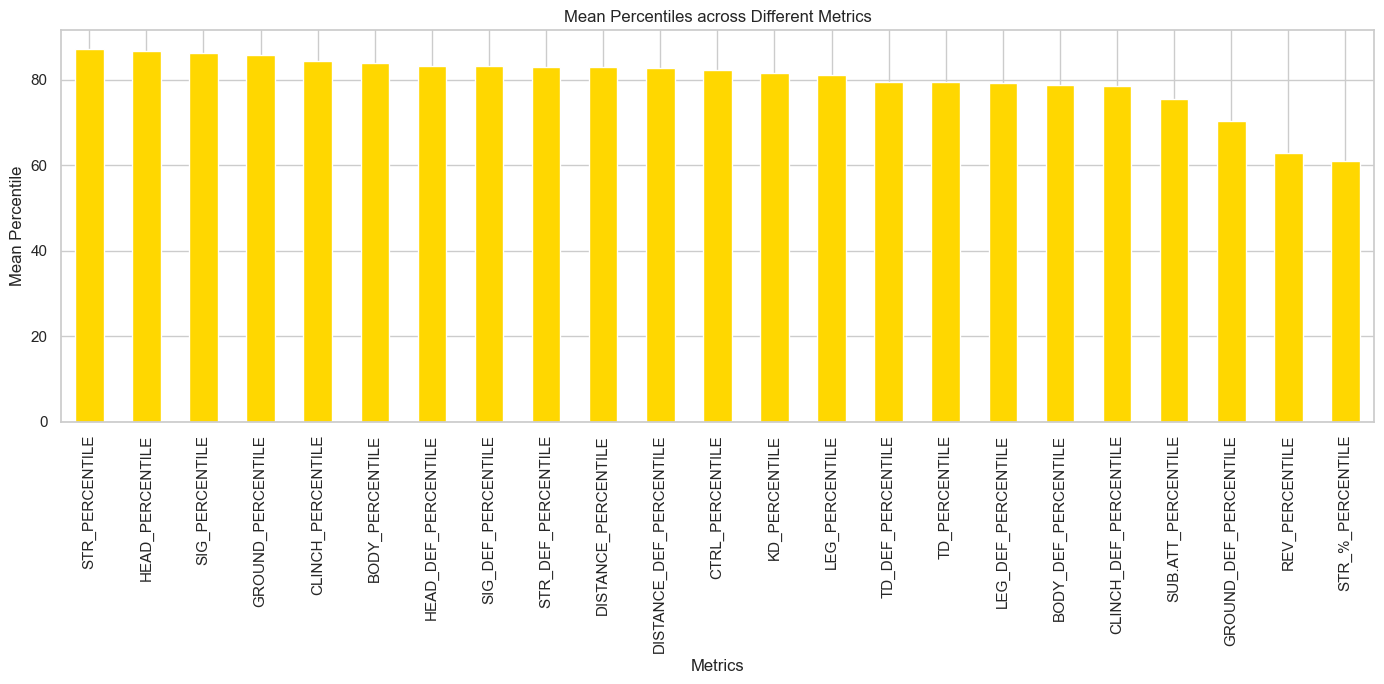

In [160]:
# List of columns to calculate means
columns_of_interest = [
    "KD_PERCENTILE", "TD_PERCENTILE", "SUB.ATT_PERCENTILE", "REV_PERCENTILE", "CTRL_PERCENTILE",
    "HEAD_PERCENTILE", "BODY_PERCENTILE", "LEG_PERCENTILE", "DISTANCE_PERCENTILE", "CLINCH_PERCENTILE",
    "GROUND_PERCENTILE", "SIG_PERCENTILE", "STR_PERCENTILE", "STR_%_PERCENTILE", "TD_DEF_PERCENTILE",
    "HEAD_DEF_PERCENTILE", "BODY_DEF_PERCENTILE", "LEG_DEF_PERCENTILE", "DISTANCE_DEF_PERCENTILE",
    "CLINCH_DEF_PERCENTILE", "GROUND_DEF_PERCENTILE", "SIG_DEF_PERCENTILE", "STR_DEF_PERCENTILE"
]

# Calculate the mean for each of the specified columns
means1 = c_champions[columns_of_interest].mean()

# Rank the means from highest to lowest and plot again
sorted_means1 = means1.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means1.plot(kind='bar', color='gold')
plt.title('Mean Percentiles across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [161]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means1)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

STR_PERCENTILE             87.157449
HEAD_PERCENTILE            86.612409
SIG_PERCENTILE             86.254187
GROUND_PERCENTILE          85.805948
CLINCH_PERCENTILE          84.387652
BODY_PERCENTILE            83.800070
HEAD_DEF_PERCENTILE        83.239616
SIG_DEF_PERCENTILE         83.157819
STR_DEF_PERCENTILE         83.047249
DISTANCE_PERCENTILE        82.934007
DISTANCE_DEF_PERCENTILE    82.739585
CTRL_PERCENTILE            82.224962
KD_PERCENTILE              81.512218
LEG_PERCENTILE             81.137349
TD_DEF_PERCENTILE          79.541073
TD_PERCENTILE              79.423516
LEG_DEF_PERCENTILE         79.246152
BODY_DEF_PERCENTILE        78.732145
CLINCH_DEF_PERCENTILE      78.587048
SUB.ATT_PERCENTILE         75.471566
GROUND_DEF_PERCENTILE      70.326572
REV_PERCENTILE             62.787060
STR_%_PERCENTILE           60.918044
dtype: float64


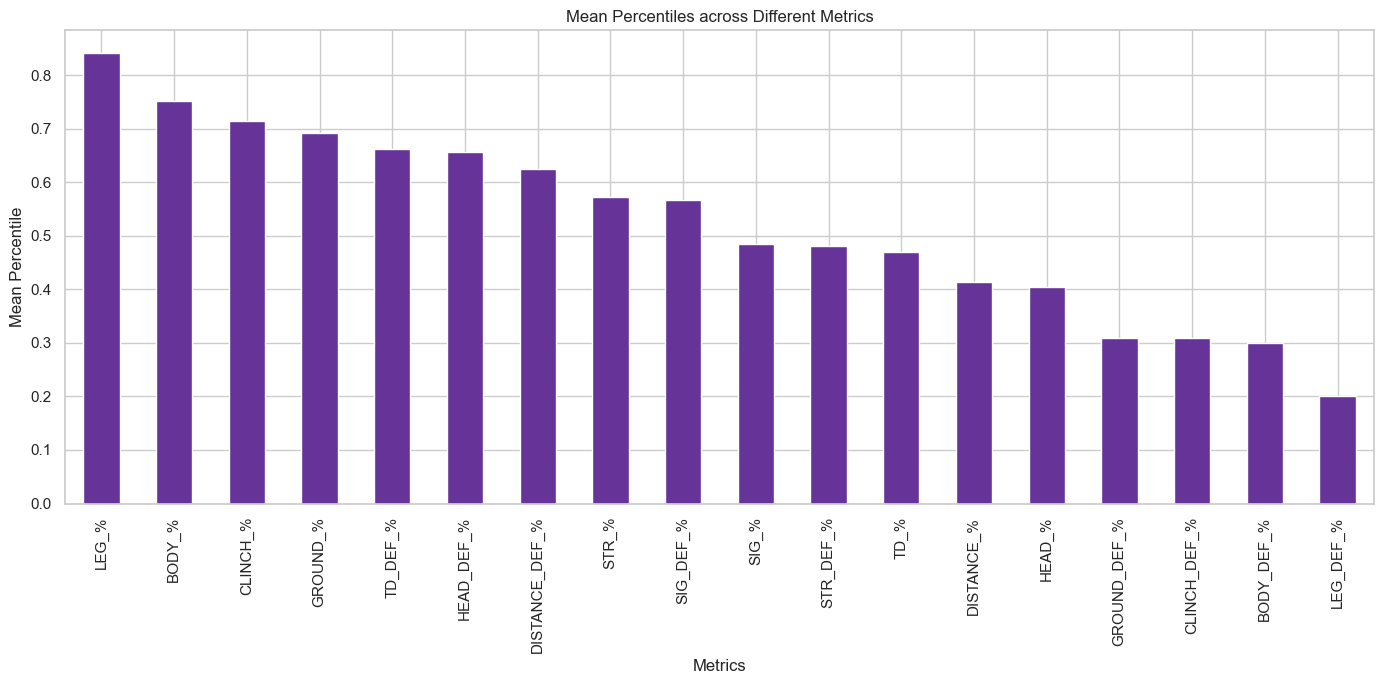

In [162]:
# List of columns to calculate means
columns_of_interest = [
    "TD_%",	'HEAD_%', 'BODY_%',	'LEG_%', 'DISTANCE_%',	'CLINCH_%',	'GROUND_%',	'SIG_%', 'STR_%', 'TD_DEF_%',
    'HEAD_DEF_%',	'BODY_DEF_%', 'LEG_DEF_%',	'DISTANCE_DEF_%',	'CLINCH_DEF_%',	'GROUND_DEF_%',	'SIG_DEF_%', 'STR_DEF_%'
]

# Calculate the mean for each of the specified columns
meansA = c_champions[columns_of_interest].mean()

# Rank the means from highest to lowest and plot again
sorted_meansA = meansA.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansA.plot(kind='bar', color='rebeccapurple')
plt.title('Mean Percentiles across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [163]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_meansA)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

LEG_%             0.842307
BODY_%            0.752657
CLINCH_%          0.714435
GROUND_%          0.692284
TD_DEF_%          0.662773
HEAD_DEF_%        0.656814
DISTANCE_DEF_%    0.625127
STR_%             0.572208
SIG_DEF_%         0.568168
SIG_%             0.485006
STR_DEF_%         0.481506
TD_%              0.470467
DISTANCE_%        0.413881
HEAD_%            0.404081
GROUND_DEF_%      0.309731
CLINCH_DEF_%      0.309558
BODY_DEF_%        0.299603
LEG_DEF_%         0.201431
dtype: float64


### Challengers

In [164]:
# Challengers
c_challengers = career[career['EVER_CHALLENGER'] == 'Yes']

c_challengers

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5       Dustin Poirier  Southpaw            No          Yes             Yes   
6        Gilbert Burns  Orthodox            No           No             Yes   
17    Rafael Dos Anjos  Southpaw           Yes           No             Yes   
22            Petr Yan    Switch           Yes          Yes             Yes   
26         Marlon Vera    Switch            No           No             Yes   
...                ...       ...           ...          ...             ...   
2277    Hayato Sakurai  Orthodox            No           No             Yes   
2278      Pat Miletich  Orthodox           Yes           No             Yes   
2282   Kevin Randleman  Orthodox           Yes           No             Yes   
2289        Yuki Kondo  Southpaw            No           No             Yes   
2296  Kenichi Yamamoto  Orthodox            No           No             Yes   

     EITHER_CHAMP    KD    TD  SUB.ATT  REV        CTRL    HEAD   BODY    LEG  \
5             Yes  14.0  28.0     24.0  4.0   69.400000  1343.0  158.0  177.0   
6              No   4.0  40.0      9.0  0.0   67.066667   526.0  187.0  169.0   
17            Yes   7.0  68.0     20.0  3.0  136.750000  1061.0  433.0  324.0   
22            Yes  10.0  25.0      2.0  2.0   32.866667   758.0  231.0  126.0   
26             No  12.0  11.0     18.0  1.0   30.366667   730.0  279.0  321.0   
...           ...   ...   ...      ...  ...         ...     ...    ...    ...   
2277           No   1.0   0.0      0.0  0.0    0.000000     4.0    0.0    1.0   
2278          Yes   1.0   6.0      3.0  0.0   14.166667    47.0    6.0   11.0   
2282          Yes   0.0   5.0      3.0  0.0   25.866667    43.0    6.0    1.0   
2289           No   2.0   0.0      0.0  2.0    4.316667    29.0    7.0    0.0   
2296           No   0.0   0.0      0.0  0.0    0.016667     0.0    2.0    1.0   

      DISTANCE  CLINCH  GROUND     SIG  TOT.SIG     STR  TOTAL.STR  TOTAL.TD  \
5       1262.0   254.0   162.0  1678.0   3284.0  2010.0     3654.0      77.0   
6        661.0    83.0   138.0   882.0   1818.0  1275.0     2265.0     103.0   
17      1220.0   321.0   277.0  1818.0   3858.0  2587.0     4723.0     191.0   
22       806.0   122.0   187.0  1115.0   2083.0  1438.0     2437.0      49.0   
26      1041.0   138.0   151.0  1330.0   2696.0  1533.0     2937.0      28.0   
...        ...     ...     ...     ...      ...     ...        ...       ...   
2277       5.0     0.0     0.0     5.0     12.0    14.0       22.0       0.0   
2278      40.0     9.0    15.0    64.0    140.0   202.0      281.0       6.0   
2282      14.0     8.0    28.0    50.0    110.0   153.0      222.0       9.0   
2289      12.0     5.0    19.0    36.0     61.0   142.0      172.0       2.0   
2296       2.0     1.0     0.0     3.0      7.0     3.0        7.0       4.0   

      TOTAL.HEAD  TOTAL.BODY  TOTAL.LEG  TOTAL.DISTANCE  TOTAL.CLINCH  \
5         2850.0       219.0      215.0          2644.0         387.0   
6         1361.0       243.0      214.0          1521.0         124.0   
17        2880.0       588.0      390.0          3046.0         407.0   
22        1665.0       284.0      134.0          1700.0         154.0   
26        1859.0       451.0      386.0          2294.0         175.0   
...          ...         ...        ...             ...           ...   
2277        11.0         0.0        1.0            12.0           0.0   
2278       120.0         7.0       13.0           107.0          14.0   
2282       103.0         6.0        1.0            46.0          10.0   
2289        48.0        13.0        0.0            23.0           7.0   
2296         3.0         2.0        2.0             6.0           1.0   

      TOTAL.GROUND  OPP_KD  OPP_TD  OPP_SUB.ATT  OPP_REV    OPP_CTRL  \
5            253.0     3.0    29.0         28.0      3.0   58.800000   
6            173.0     8.0    12.0          1.0      0.0   25.850000   
17           405.0     2.0    74.0     

In [165]:
c_challengers.describe()

KD          TD     SUB.ATT         REV        CTRL  \
count  221.000000  221.000000  221.000000  221.000000  221.000000   
mean     4.357466   17.755656    6.004525    1.633484   37.396908   
std      4.040005   17.143619    6.202271    1.967130   31.340069   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    5.000000    1.000000    0.000000   13.450000   
50%      4.000000   12.000000    4.000000    1.000000   29.700000   
75%      7.000000   25.000000    9.000000    3.000000   53.483333   
max     20.000000   90.000000   40.000000   11.000000  162.116667   

              HEAD        BODY         LEG     DISTANCE      CLINCH  \
count   221.000000  221.000000  221.000000   221.000000  221.000000   
mean    409.457014  126.452489  100.502262   454.615385   84.561086   
std     298.931269  103.238355   91.737800   377.156818   69.719386   
min       0.000000    0.000000    0.000000     2.000000    0.000000   
25%     182.000000   50.000000   32.000000   180.000000   37.000000   
50%     378.000000  109.000000   78.000000   383.000000   64.000000   
75%     559.000000  174.000000  140.000000   658.000000  112.000000   
max    2117.000000  723.000000  508.000000  2709.000000  359.000000   

           GROUND          SIG      TOT.SIG          STR    TOTAL.STR  \
count  221.000000   221.000000   221.000000   221.000000   221.000000   
mean    97.235294   636.411765  1395.570136   933.176471  1727.380090   
std     83.281553   451.899061   991.135497   592.667062  1121.197055   
min      0.000000     3.000000     7.000000     3.000000     7.000000   
25%     36.000000   294.000000   637.000000   469.000000   837.000000   
50%     77.000000   585.000000  1236.000000   837.000000  1589.000000   
75%    130.000000   888.000000  1963.000000  1298.000000  2442.000000   
max    461.000000  3122.000000  6586.000000  3366.000000  6859.000000   

         TOTAL.TD   TOTAL.HEAD  TOTAL.BODY   TOTAL.LEG  TOTAL.DISTANCE  \
count  221.000000   221.000000  221.000000  221.000000      221.000000   
mean    44.986425  1092.303167  178.153846  125.113122     1134.601810   
std     42.757613   790.989359  144.934135  115.537561      892.061145   
min      0.000000     3.000000    0.000000    0.000000        6.000000   
25%     13.000000   474.000000   72.000000   42.000000      477.000000   
50%     32.000000   972.000000  153.000000   95.000000      994.000000   
75%     64.000000  1510.000000  250.000000  176.000000     1594.000000   
max    274.000000  5254.000000  964.000000  630.000000     6034.000000   

       TOTAL.CLINCH  TOTAL.GROUND      OPP_KD      OPP_TD  OPP_SUB.ATT  \
count    221.000000     221.00000  221.000000  221.000000   221.000000   
mean     119.782805     141.18552    2.841629   14.158371     4.316742   
std       95.702274     118.61928    2.633229   11.383293     4.755775   
min        0.000000       0.00000    0.000000    0.000000     0.000000   
25%       54.000000      54.00000    1.000000    6.000000     1.000000   
50%       98.000000     115.00000    2.000000   11.000000     3.000000   
75%      160.000000     189.00000    5.000000   20.000000     6.000000   
max      477.000000     656.00000   12.000000   74.000000    28.000000   

          OPP_REV    OPP_CTRL     OPP_HEAD    OPP_BODY     OPP_LEG  \
count  221.000000  221.000000   221.000000  221.000000  221.000000   
mean     1.475113   29.146531   357.524887  114.104072   99.945701   
std      2.037281   21.607451   242.774878   82.262899   77.229273   
min      0.000000    0.016667    15.000000    0.000000    0.000000   
25%      0.000000   13.183333   167.000000   52.000000   40.000000   
50%      1.000000   23.333333   320.000000  102.000000   86.000000   
75%      2.000000   41.316667   506.000000  166.000000  140.000000   
max     10.000000  125.066667  1310.000000  454.000000  486.000000   

       OPP_DISTANCE  OPP_CLINCH  OPP_GROUND      OPP_SIG  OPP_TOT.SIG  \
count    221.000000  221.000000  221.000000   221.000000 

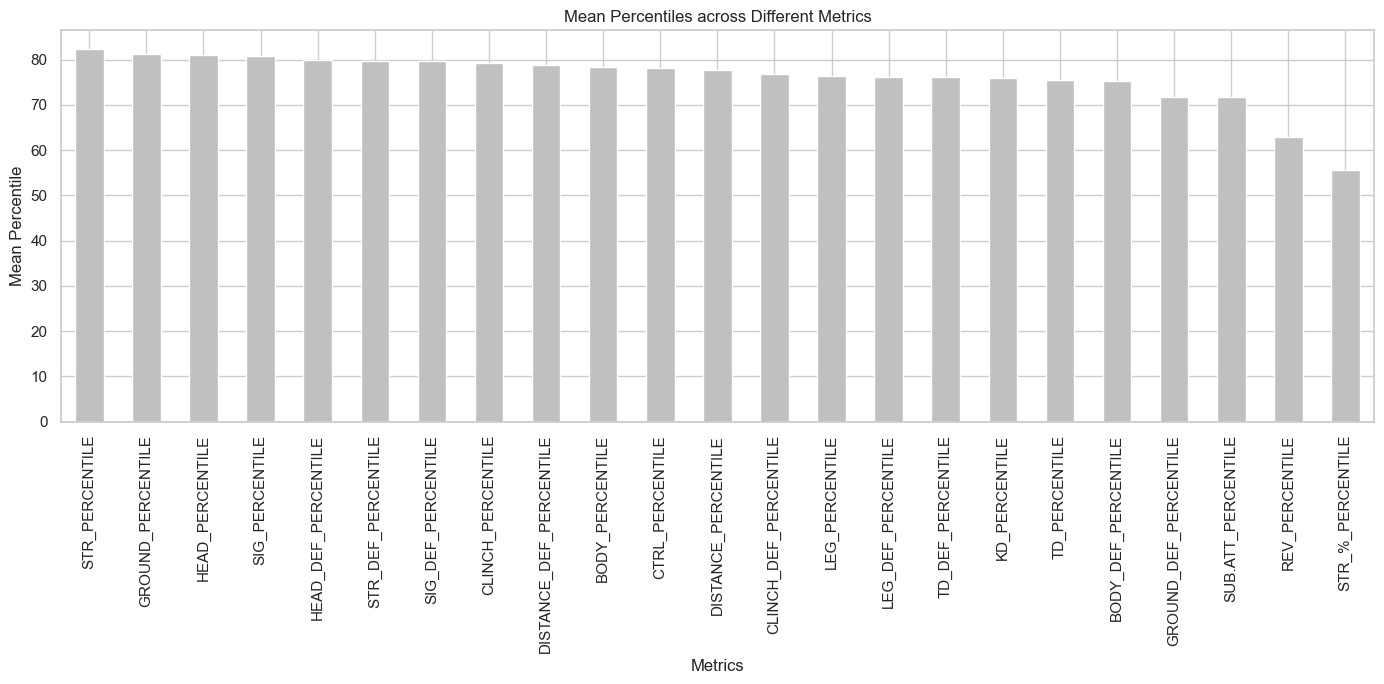

In [166]:
# List of columns to calculate means
columns_of_interest = [
    "KD_PERCENTILE", "TD_PERCENTILE", "SUB.ATT_PERCENTILE", "REV_PERCENTILE", "CTRL_PERCENTILE",
    "HEAD_PERCENTILE", "BODY_PERCENTILE", "LEG_PERCENTILE", "DISTANCE_PERCENTILE", "CLINCH_PERCENTILE",
    "GROUND_PERCENTILE", "SIG_PERCENTILE", "STR_PERCENTILE", "STR_%_PERCENTILE", "TD_DEF_PERCENTILE",
    "HEAD_DEF_PERCENTILE", "BODY_DEF_PERCENTILE", "LEG_DEF_PERCENTILE", "DISTANCE_DEF_PERCENTILE",
    "CLINCH_DEF_PERCENTILE", "GROUND_DEF_PERCENTILE", "SIG_DEF_PERCENTILE", "STR_DEF_PERCENTILE"
]

# Calculate the mean for each of the specified columns
means2 = c_challengers[columns_of_interest].mean()

# Rank the means from highest to lowest and plot again
sorted_means2 = means2.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means2.plot(kind='bar', color='silver')
plt.title('Mean Percentiles across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [167]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means2)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

STR_PERCENTILE             82.380380
GROUND_PERCENTILE          81.194476
HEAD_PERCENTILE            81.138135
SIG_PERCENTILE             80.868243
HEAD_DEF_PERCENTILE        79.846873
STR_DEF_PERCENTILE         79.824805
SIG_DEF_PERCENTILE         79.733994
CLINCH_PERCENTILE          79.283947
DISTANCE_DEF_PERCENTILE    78.909477
BODY_PERCENTILE            78.360612
CTRL_PERCENTILE            78.282105
DISTANCE_PERCENTILE        77.663619
CLINCH_DEF_PERCENTILE      76.950613
LEG_PERCENTILE             76.493828
LEG_DEF_PERCENTILE         76.238973
TD_DEF_PERCENTILE          76.084498
KD_PERCENTILE              75.908053
TD_PERCENTILE              75.432423
BODY_DEF_PERCENTILE        75.243381
GROUND_DEF_PERCENTILE      71.705494
SUB.ATT_PERCENTILE         71.692702
REV_PERCENTILE             62.963010
STR_%_PERCENTILE           55.675548
dtype: float64


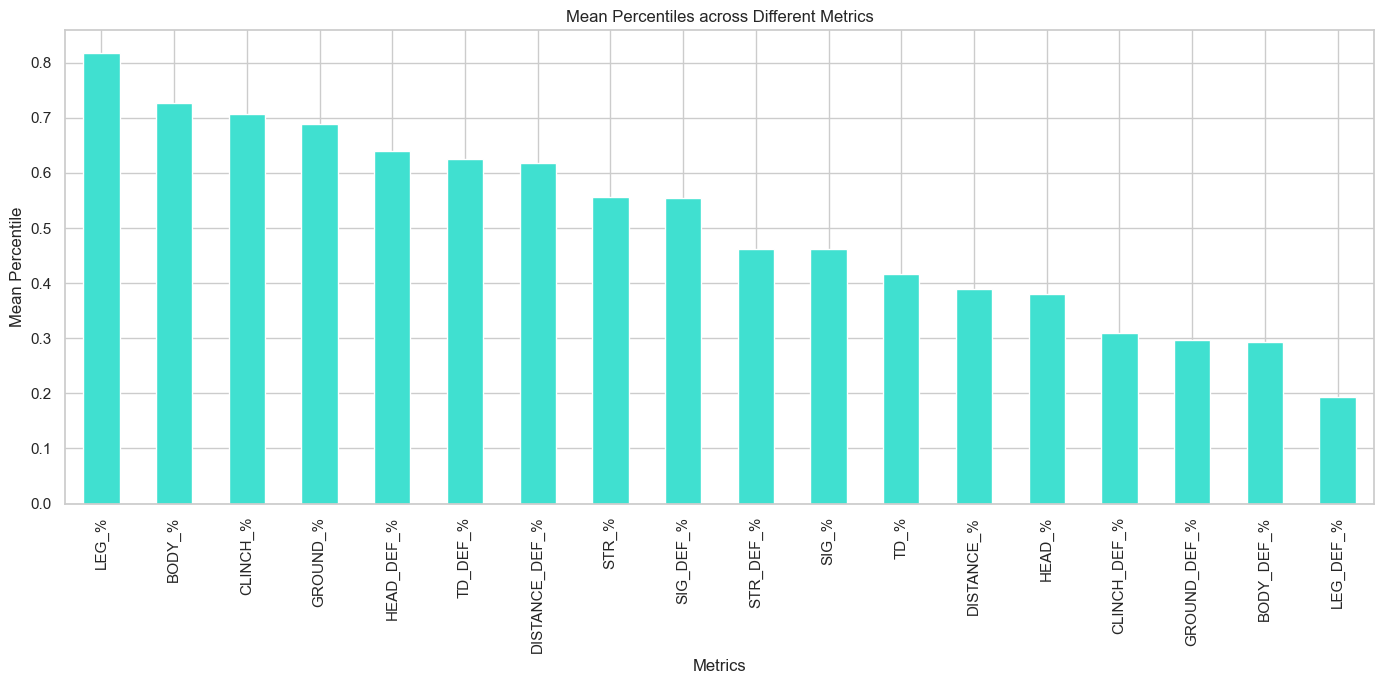

In [168]:
# List of columns to calculate means
columns_of_interest = [
    "TD_%",	'HEAD_%', 'BODY_%',	'LEG_%', 'DISTANCE_%',	'CLINCH_%',	'GROUND_%',	'SIG_%', 'STR_%', 'TD_DEF_%',
    'HEAD_DEF_%',	'BODY_DEF_%', 'LEG_DEF_%',	'DISTANCE_DEF_%',	'CLINCH_DEF_%',	'GROUND_DEF_%',	'SIG_DEF_%', 'STR_DEF_%'
]

# Calculate the mean for each of the specified columns
meansB = c_challengers[columns_of_interest].mean()

# Rank the means from highest to lowest and plot again
sorted_meansB = meansB.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansB.plot(kind='bar', color='turquoise')
plt.title('Mean Percentiles across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [169]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_meansB)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

LEG_%             0.817924
BODY_%            0.727326
CLINCH_%          0.706195
GROUND_%          0.688538
HEAD_DEF_%        0.639834
TD_DEF_%          0.625632
DISTANCE_DEF_%    0.618785
STR_%             0.556207
SIG_DEF_%         0.554091
STR_DEF_%         0.462211
SIG_%             0.461697
TD_%              0.416920
DISTANCE_%        0.389120
HEAD_%            0.380254
CLINCH_DEF_%      0.309191
GROUND_DEF_%      0.296140
BODY_DEF_%        0.293381
LEG_DEF_%         0.194047
dtype: float64


### Non Champions

In [170]:
# Non Champions
c_non_champions = career[career['EITHER_CHAMP'] != 'Yes']

c_non_champions

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0          Asu Almabayev      None            No           No              No   
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
...                  ...       ...           ...          ...             ...   
2312          Joao Roque  Orthodox            No           No              No   
2313      Marcelo Aguiar  Orthodox            No           No              No   
2314      Adrian Serrano      None            No           No              No   
2315          David Dodd  Orthodox            No           No              No   
2316      Tyrone Roberts  Orthodox            No           No              No   

     EITHER_CHAMP   KD    TD  SUB.ATT  REV       CTRL   HEAD   BODY    LEG  \
0              No  0.0   9.0      0.0  0.0   9.533333   22.0    9.0   13.0   
1              No  0.0   0.0      1.0  1.0  10.750000  203.0  149.0   52.0   
2              No  2.0  62.0      0.0  0.0  80.250000  395.0   69.0  110.0   
3              No  0.0  25.0      8.0  1.0  47.950000  143.0    8.0    2.0   
4              No  4.0  16.0      5.0  1.0  24.416667  159.0   85.0   43.0   
...           ...  ...   ...      ...  ...        ...    ...    ...    ...   
2312           No  0.0   1.0      0.0  0.0   0.266667    2.0    2.0    1.0   
2313           No  0.0   0.0      0.0  0.0   0.000000    2.0    0.0    0.0   
2314           No  0.0   0.0      0.0  1.0   3.116667    2.0    4.0    0.0   
2315           No  0.0   0.0      0.0  0.0   0.033333    5.0    5.0    0.0   
2316           No  0.0   1.0      0.0  0.0   4.783333   11.0    3.0    2.0   

      DISTANCE  CLINCH  GROUND    SIG  TOT.SIG     STR  TOTAL.STR  TOTAL.TD  \
0         23.0     8.0    13.0   44.0     77.0    85.0      132.0      14.0   
1        285.0    35.0    84.0  404.0    700.0   579.0      895.0       0.0   
2        260.0    73.0   241.0  574.0   1144.0  1016.0     1681.0     116.0   
3          8.0     3.0   142.0  153.0    232.0   328.0      442.0      42.0   
4        166.0    50.0    71.0  287.0    525.0   439.0      700.0      43.0   
...        ...     ...     ...    ...      ...     ...        ...       ...   
2312       5.0     0.0     0.0    5.0     59.0     5.0       59.0      18.0   
2313       0.0     0.0     2.0    2.0      2.0    21.0       21.0       0.0   
2314       3.0     3.0     0.0    6.0     23.0    55.0       79.0       2.0   
2315       3.0     5.0     2.0   10.0     31.0    27.0       49.0       2.0   
2316      12.0     4.0     0.0   16.0     60.0   105.0      163.0       1.0   

      TOTAL.HEAD  TOTAL.BODY  TOTAL.LEG  TOTAL.DISTANCE  TOTAL.CLINCH  \
0           53.0        11.0       13.0            51.0          10.0   
1          448.0       193.0       59.0           531.0          46.0   
2          941.0        80.0      123.0           754.0          91.0   
3          216.0        10.0        6.0            22.0           8.0   
4          372.0       108.0       45.0           335.0          64.0   
...          ...         ...        ...             ...           ...   
2312        43.0         6.0       10.0            57.0           1.0   
2313         2.0         0.0        0.0             0.0           0.0   
2314        16.0         7.0        0.0            15.0           8.0   
2315        25.0         6.0        0.0            22.0           6.0   
2316        53.0         5.0        2.0            45.0          13.0   

      TOTAL.GROUND  OPP_KD  OPP_TD  OPP_SUB.ATT  OPP_REV   OPP_CTRL  OPP_HEAD  \
0             16.0     0.0     0.0          0.0      0.0   0.233333      13.0   
1            123.0     2.0    16.0          5.0      2.0  20.200000     222.0   
2            299.0     4.0    13.0    

In [171]:
c_non_champions.describe()

KD           TD      SUB.ATT          REV         CTRL  \
count  2212.000000  2212.000000  2212.000000  2212.000000  2212.000000   
mean      1.196655     6.070976     2.240054     0.813743    12.705048   
std       2.095358     9.083109     3.758273     1.415374    16.608481   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     0.000000     1.933333   
50%       0.000000     3.000000     1.000000     0.000000     6.800000   
75%       2.000000     8.000000     3.000000     1.000000    16.604167   
max      20.000000    84.000000    48.000000    13.000000   156.500000   

              HEAD         BODY          LEG     DISTANCE       CLINCH  \
count  2212.000000  2212.000000  2212.000000  2212.000000  2212.000000   
mean    128.974231    42.659584    33.820524   149.303797    28.845389   
std     157.106067    55.884705    47.880570   193.425908    39.013347   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      23.000000     8.000000     5.000000    26.000000     4.750000   
50%      72.000000    23.000000    17.000000    78.000000    15.000000   
75%     180.000000    56.000000    43.000000   197.500000    37.250000   
max    1146.000000   594.000000   425.000000  1478.000000   453.000000   

            GROUND          SIG      TOT.SIG          STR    TOTAL.STR  \
count  2212.000000  2212.000000  2212.000000  2212.000000  2212.000000   
mean     27.305154   205.454340   469.159584   307.912749   586.511302   
std      40.027201   245.613603   557.823609   349.754395   666.956357   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    43.000000   105.750000    71.000000   144.000000   
50%      12.000000   116.000000   261.500000   184.500000   351.500000   
75%      36.000000   282.000000   627.000000   429.000000   802.250000   
max     334.000000  1896.000000  3783.000000  2525.000000  4550.000000   

          TOTAL.TD   TOTAL.HEAD   TOTAL.BODY    TOTAL.LEG  TOTAL.DISTANCE  \
count  2212.000000  2212.000000  2212.000000  2212.000000     2212.000000   
mean     16.406872   364.967902    62.124322    42.067360      387.593580   
std      23.118124   438.394571    81.522317    59.498245      483.687484   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       2.000000    77.000000    12.000000     6.000000       76.000000   
50%       8.500000   205.000000    33.000000    22.000000      212.000000   
75%      21.000000   491.250000    80.250000    53.000000      511.000000   
max     274.000000  2891.000000   817.000000   559.000000     3392.000000   

       TOTAL.CLINCH  TOTAL.GROUND       OPP_KD       OPP_TD  OPP_SUB.ATT  \
count   2212.000000   2212.000000  2212.000000  2212.000000  2212.000000   
mean      41.674503     39.891501     1.302893     6.388336     2.350814   
std       54.430332     58.307874     1.704155     7.266505     3.212775   
min        0.000000      0.000000     0.000000     0.000000     0.000000   
25%        7.750000      3.000000     0.000000     1.000000     0.000000   
50%       22.000000     18.000000     1.000000     4.000000     1.000000   
75%       54.000000     53.000000     2.000000     9.000000     3.000000   
max      576.000000    535.000000    11.000000    59.000000    29.000000   

           OPP_REV     OPP_CTRL     OPP_HEAD     OPP_BODY      OPP_LEG  \
count  2212.000000  2212.000000  2212.000000  2212.000000  2212.000000   
mean      0.819620    13.348825   134.397830    43.890145    34.611664   
std       1.421714    13.975472   146.895591    49.493931    42.736809   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     3.550000    38.000000    10.000000     6.000000   
50%       0.000000     9.341667    86.000000    27.000000    21.000000   
75%       1.000000    18.137500   174.000000    60.000000    45.000000   
max      12.000000   128.183333  1069.000000

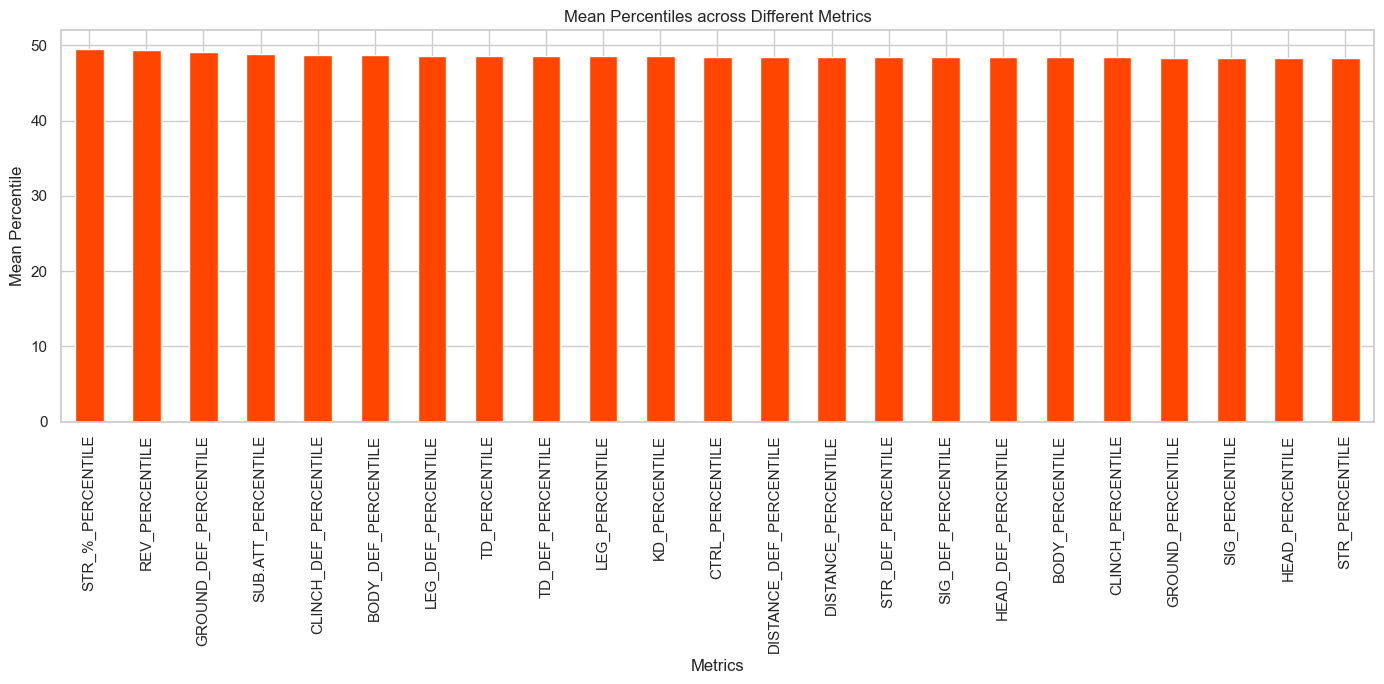

In [172]:
# List of columns to calculate means
columns_of_interest = [
    "KD_PERCENTILE", "TD_PERCENTILE", "SUB.ATT_PERCENTILE", "REV_PERCENTILE", "CTRL_PERCENTILE",
    "HEAD_PERCENTILE", "BODY_PERCENTILE", "LEG_PERCENTILE", "DISTANCE_PERCENTILE", "CLINCH_PERCENTILE",
    "GROUND_PERCENTILE", "SIG_PERCENTILE", "STR_PERCENTILE", "STR_%_PERCENTILE", "TD_DEF_PERCENTILE",
    "HEAD_DEF_PERCENTILE", "BODY_DEF_PERCENTILE", "LEG_DEF_PERCENTILE", "DISTANCE_DEF_PERCENTILE",
    "CLINCH_DEF_PERCENTILE", "GROUND_DEF_PERCENTILE", "SIG_DEF_PERCENTILE", "STR_DEF_PERCENTILE"
]

# Calculate the mean for each of the specified columns
means3 = c_non_champions[columns_of_interest].mean()

# Rank the means from highest to lowest and plot again
sorted_means3 = means3.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means3.plot(kind='bar', color='orangered')
plt.title('Mean Percentiles across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [173]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means3)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

STR_%_PERCENTILE           49.504118
REV_PERCENTILE             49.415623
GROUND_DEF_PERCENTILE      49.057735
SUB.ATT_PERCENTILE         48.813511
CLINCH_DEF_PERCENTILE      48.665624
BODY_DEF_PERCENTILE        48.658736
LEG_DEF_PERCENTILE         48.634337
TD_PERCENTILE              48.625918
TD_DEF_PERCENTILE          48.620338
LEG_PERCENTILE             48.544565
KD_PERCENTILE              48.526771
CTRL_PERCENTILE            48.492938
DISTANCE_DEF_PERCENTILE    48.468510
DISTANCE_PERCENTILE        48.459281
STR_DEF_PERCENTILE         48.453905
SIG_DEF_PERCENTILE         48.448657
HEAD_DEF_PERCENTILE        48.444774
BODY_PERCENTILE            48.418170
CLINCH_PERCENTILE          48.390279
GROUND_PERCENTILE          48.322955
SIG_PERCENTILE             48.301677
HEAD_PERCENTILE            48.284673
STR_PERCENTILE             48.258801
dtype: float64


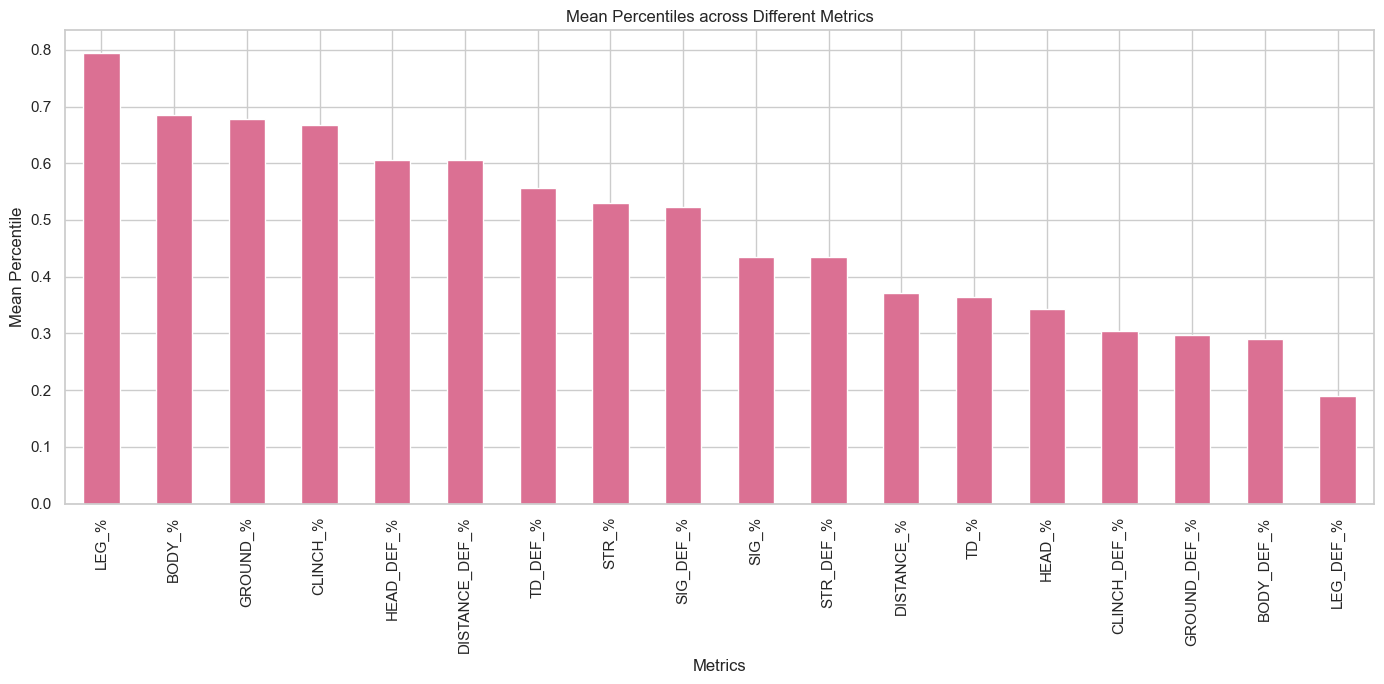

In [174]:
# List of columns to calculate means
columns_of_interest = [
    "TD_%",	'HEAD_%', 'BODY_%',	'LEG_%', 'DISTANCE_%',	'CLINCH_%',	'GROUND_%',	'SIG_%', 'STR_%', 'TD_DEF_%',
    'HEAD_DEF_%',	'BODY_DEF_%', 'LEG_DEF_%',	'DISTANCE_DEF_%',	'CLINCH_DEF_%',	'GROUND_DEF_%',	'SIG_DEF_%', 'STR_DEF_%'
]

# Calculate the mean for each of the specified columns
meansC = c_non_champions[columns_of_interest].mean()

# Rank the means from highest to lowest and plot again
sorted_meansC = meansC.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansC.plot(kind='bar', color='palevioletred')
plt.title('Mean Percentiles across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [175]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_meansC)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

LEG_%             0.794655
BODY_%            0.684252
GROUND_%          0.678273
CLINCH_%          0.666827
HEAD_DEF_%        0.605819
DISTANCE_DEF_%    0.605248
TD_DEF_%          0.556787
STR_%             0.529423
SIG_DEF_%         0.523505
SIG_%             0.434385
STR_DEF_%         0.433996
DISTANCE_%        0.370481
TD_%              0.363704
HEAD_%            0.342294
CLINCH_DEF_%      0.303750
GROUND_DEF_%      0.296509
BODY_DEF_%        0.289229
LEG_DEF_%         0.188687
dtype: float64


### Non Challengers

In [176]:
# Non Challengers
c_non_challengers = career[career['EVER_CHALLENGER'] != 'Yes']

c_non_challengers

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0          Asu Almabayev      None            No           No              No   
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
...                  ...       ...           ...          ...             ...   
2312          Joao Roque  Orthodox            No           No              No   
2313      Marcelo Aguiar  Orthodox            No           No              No   
2314      Adrian Serrano      None            No           No              No   
2315          David Dodd  Orthodox            No           No              No   
2316      Tyrone Roberts  Orthodox            No           No              No   

     EITHER_CHAMP   KD    TD  SUB.ATT  REV       CTRL   HEAD   BODY    LEG  \
0              No  0.0   9.0      0.0  0.0   9.533333   22.0    9.0   13.0   
1              No  0.0   0.0      1.0  1.0  10.750000  203.0  149.0   52.0   
2              No  2.0  62.0      0.0  0.0  80.250000  395.0   69.0  110.0   
3              No  0.0  25.0      8.0  1.0  47.950000  143.0    8.0    2.0   
4              No  4.0  16.0      5.0  1.0  24.416667  159.0   85.0   43.0   
...           ...  ...   ...      ...  ...        ...    ...    ...    ...   
2312           No  0.0   1.0      0.0  0.0   0.266667    2.0    2.0    1.0   
2313           No  0.0   0.0      0.0  0.0   0.000000    2.0    0.0    0.0   
2314           No  0.0   0.0      0.0  1.0   3.116667    2.0    4.0    0.0   
2315           No  0.0   0.0      0.0  0.0   0.033333    5.0    5.0    0.0   
2316           No  0.0   1.0      0.0  0.0   4.783333   11.0    3.0    2.0   

      DISTANCE  CLINCH  GROUND    SIG  TOT.SIG     STR  TOTAL.STR  TOTAL.TD  \
0         23.0     8.0    13.0   44.0     77.0    85.0      132.0      14.0   
1        285.0    35.0    84.0  404.0    700.0   579.0      895.0       0.0   
2        260.0    73.0   241.0  574.0   1144.0  1016.0     1681.0     116.0   
3          8.0     3.0   142.0  153.0    232.0   328.0      442.0      42.0   
4        166.0    50.0    71.0  287.0    525.0   439.0      700.0      43.0   
...        ...     ...     ...    ...      ...     ...        ...       ...   
2312       5.0     0.0     0.0    5.0     59.0     5.0       59.0      18.0   
2313       0.0     0.0     2.0    2.0      2.0    21.0       21.0       0.0   
2314       3.0     3.0     0.0    6.0     23.0    55.0       79.0       2.0   
2315       3.0     5.0     2.0   10.0     31.0    27.0       49.0       2.0   
2316      12.0     4.0     0.0   16.0     60.0   105.0      163.0       1.0   

      TOTAL.HEAD  TOTAL.BODY  TOTAL.LEG  TOTAL.DISTANCE  TOTAL.CLINCH  \
0           53.0        11.0       13.0            51.0          10.0   
1          448.0       193.0       59.0           531.0          46.0   
2          941.0        80.0      123.0           754.0          91.0   
3          216.0        10.0        6.0            22.0           8.0   
4          372.0       108.0       45.0           335.0          64.0   
...          ...         ...        ...             ...           ...   
2312        43.0         6.0       10.0            57.0           1.0   
2313         2.0         0.0        0.0             0.0           0.0   
2314        16.0         7.0        0.0            15.0           8.0   
2315        25.0         6.0        0.0            22.0           6.0   
2316        53.0         5.0        2.0            45.0          13.0   

      TOTAL.GROUND  OPP_KD  OPP_TD  OPP_SUB.ATT  OPP_REV   OPP_CTRL  OPP_HEAD  \
0             16.0     0.0     0.0          0.0      0.0   0.233333      13.0   
1            123.0     2.0    16.0          5.0      2.0  20.200000     222.0   
2            299.0     4.0    13.0    

In [177]:
c_non_challengers.describe()

KD           TD      SUB.ATT          REV         CTRL  \
count  2096.000000  2096.000000  2096.000000  2096.000000  2096.000000   
mean      1.058683     5.600191     2.057729     0.769084    11.627886   
std       1.854850     8.458207     3.500836     1.367931    15.023103   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.833333   
50%       0.000000     3.000000     1.000000     0.000000     6.383333   
75%       1.000000     7.000000     3.000000     1.000000    15.566667   
max      18.000000    84.000000    48.000000    13.000000   156.500000   

              HEAD         BODY          LEG     DISTANCE       CLINCH  \
count  2096.000000  2096.000000  2096.000000  2096.000000  2096.000000   
mean    118.088263    39.458492    31.307252   137.583492    26.800095   
std     144.432066    52.294779    44.722481   178.861586    37.052445   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      22.000000     7.000000     4.000000    25.000000     4.000000   
50%      67.000000    21.000000    16.000000    73.000000    14.000000   
75%     162.250000    52.000000    40.000000   182.000000    34.000000   
max    1136.000000   594.000000   425.000000  1380.000000   453.000000   

           GROUND          SIG      TOT.SIG          STR    TOTAL.STR  \
count  2096.00000  2096.000000  2096.000000  2096.000000  2096.000000   
mean     24.47042   188.854008   430.268130   282.533397   537.821565   
std      35.74229   226.900015   511.715937   321.367907   611.521210   
min       0.00000     0.000000     0.000000     0.000000     0.000000   
25%       2.00000    40.000000    98.000000    67.000000   136.000000   
50%      11.00000   107.000000   246.500000   169.500000   330.500000   
75%      32.00000   258.000000   580.250000   382.000000   732.250000   
max     332.00000  1896.000000  3783.000000  2525.000000  4550.000000   

          TOTAL.TD   TOTAL.HEAD   TOTAL.BODY    TOTAL.LEG  TOTAL.DISTANCE  \
count  2096.000000  2096.000000  2096.000000  2096.000000     2096.000000   
mean     15.099237   333.883111    57.521947    38.863073      355.875000   
std      21.076804   400.202746    76.471896    55.432479      443.579615   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       2.000000    73.000000    11.000000     6.000000       72.000000   
50%       8.000000   192.000000    31.000000    20.000000      199.000000   
75%      20.000000   455.000000    75.250000    49.000000      475.000000   
max     231.000000  2872.000000   817.000000   559.000000     3392.000000   

       TOTAL.CLINCH  TOTAL.GROUND       OPP_KD       OPP_TD  OPP_SUB.ATT  \
count   2096.000000   2096.000000  2096.000000  2096.000000  2096.000000   
mean      38.735210     35.657920     1.218034     5.976145     2.235210   
std       51.602511     51.693459     1.599725     6.785173     3.056121   
min        0.000000      0.000000     0.000000     0.000000     0.000000   
25%        7.000000      2.000000     0.000000     1.000000     0.000000   
50%       21.000000     16.000000     1.000000     4.000000     1.000000   
75%       50.000000     48.000000     2.000000     8.000000     3.000000   
max      576.000000    429.000000    10.000000    59.000000    29.000000   

           OPP_REV     OPP_CTRL     OPP_HEAD     OPP_BODY      OPP_LEG  \
count  2096.000000  2096.000000  2096.000000  2096.000000  2096.000000   
mean      0.785782    12.490689   123.501908    40.728531    31.361164   
std       1.373256    13.050976   132.989145    45.593841    37.683759   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     3.333333    36.000000     9.750000     6.000000   
50%       0.000000     8.900000    81.000000    25.000000    19.000000   
75%       1.000000    16.941667   162.000000    56.000000    43.000000   
max      12.000000   128.183333  1066.000000   414.00

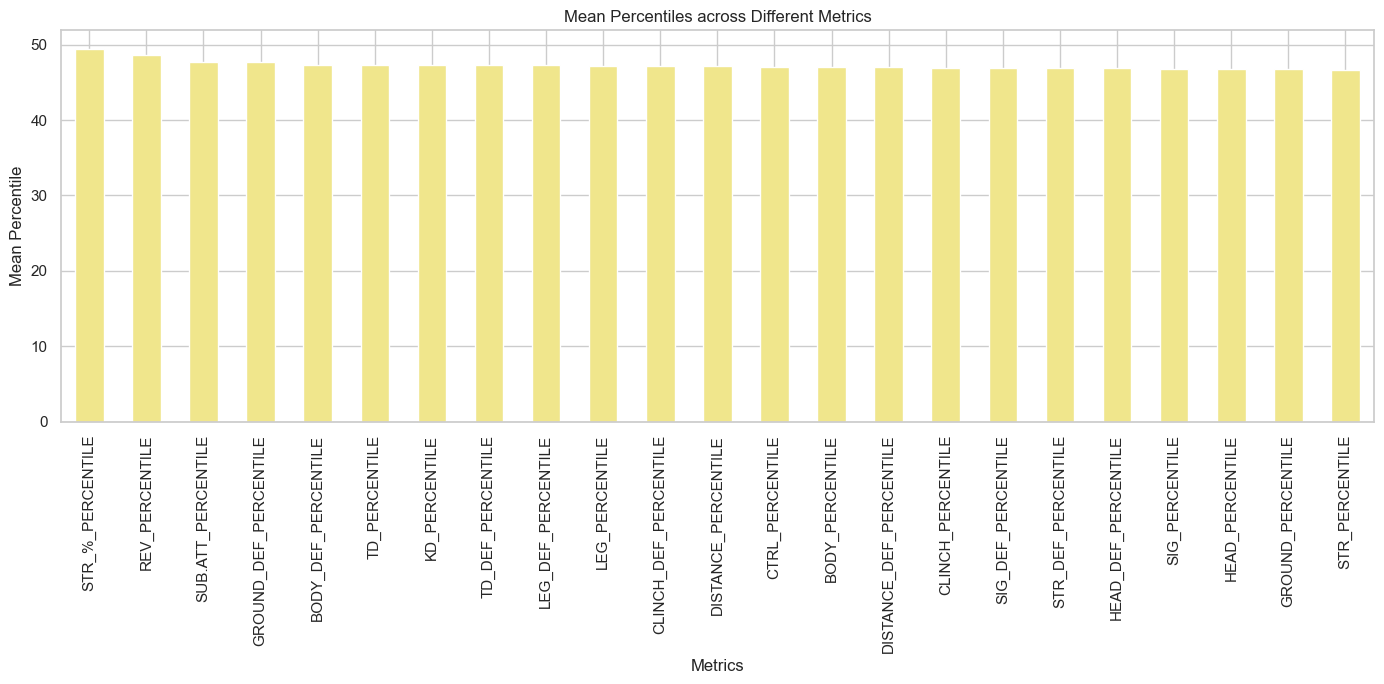

In [178]:
# List of columns to calculate means
columns_of_interest = [
    "KD_PERCENTILE", "TD_PERCENTILE", "SUB.ATT_PERCENTILE", "REV_PERCENTILE", "CTRL_PERCENTILE",
    "HEAD_PERCENTILE", "BODY_PERCENTILE", "LEG_PERCENTILE", "DISTANCE_PERCENTILE", "CLINCH_PERCENTILE",
    "GROUND_PERCENTILE", "SIG_PERCENTILE", "STR_PERCENTILE", "STR_%_PERCENTILE", "TD_DEF_PERCENTILE",
    "HEAD_DEF_PERCENTILE", "BODY_DEF_PERCENTILE", "LEG_DEF_PERCENTILE", "DISTANCE_DEF_PERCENTILE",
    "CLINCH_DEF_PERCENTILE", "GROUND_DEF_PERCENTILE", "SIG_DEF_PERCENTILE", "STR_DEF_PERCENTILE"
]

# Calculate the mean for each of the specified columns
means4 = c_non_challengers[columns_of_interest].mean()

# Rank the means from highest to lowest and plot again
sorted_means4 = means4.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means4.plot(kind='bar', color='khaki')
plt.title('Mean Percentiles across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [179]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means4)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

STR_%_PERCENTILE           49.425157
REV_PERCENTILE             48.657049
SUB.ATT_PERCENTILE         47.736600
GROUND_DEF_PERCENTILE      47.735251
BODY_DEF_PERCENTILE        47.362220
TD_PERCENTILE              47.342288
KD_PERCENTILE              47.292138
TD_DEF_PERCENTILE          47.273533
LEG_DEF_PERCENTILE         47.257246
LEG_PERCENTILE             47.230374
CLINCH_DEF_PERCENTILE      47.182211
DISTANCE_PERCENTILE        47.107032
CTRL_PERCENTILE            47.041820
BODY_PERCENTILE            47.033542
DISTANCE_DEF_PERCENTILE    46.975671
CLINCH_PERCENTILE          46.936187
SIG_DEF_PERCENTILE         46.888734
STR_DEF_PERCENTILE         46.879159
HEAD_DEF_PERCENTILE        46.876833
SIG_PERCENTILE             46.769140
HEAD_PERCENTILE            46.740683
GROUND_PERCENTILE          46.734743
STR_PERCENTILE             46.609702
dtype: float64


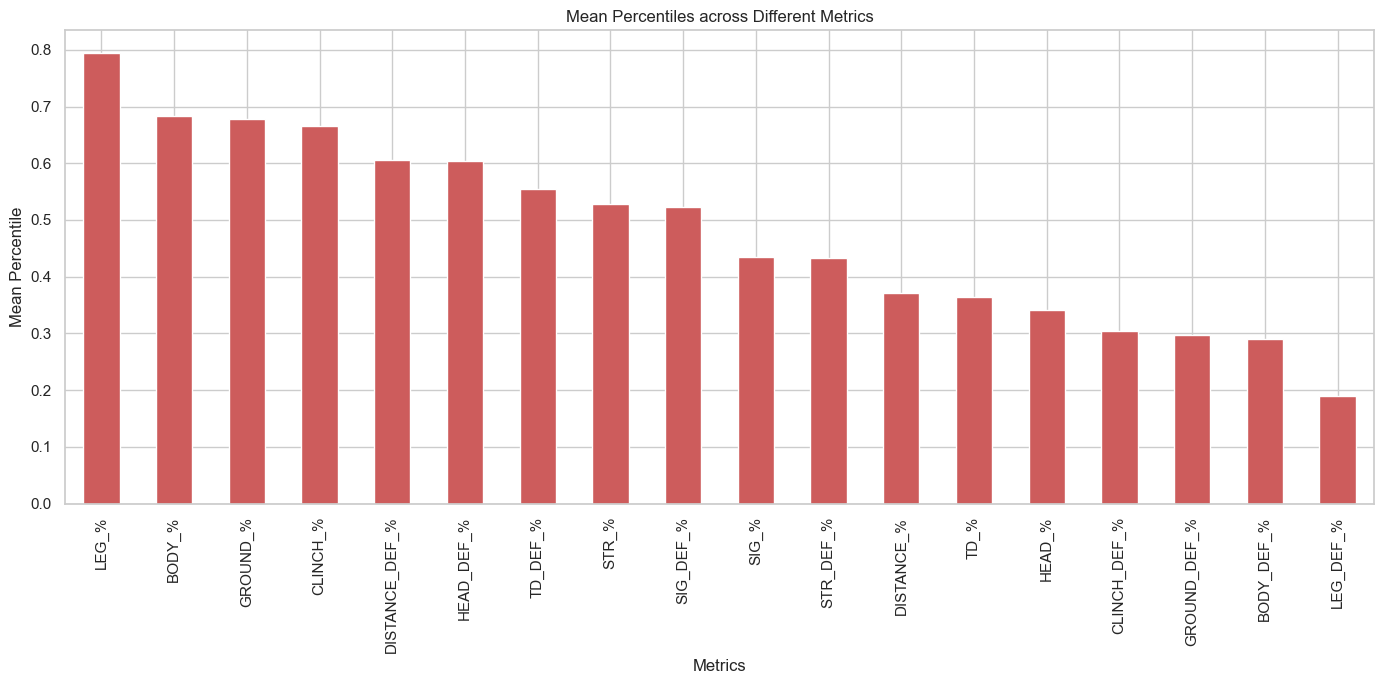

In [180]:
# List of columns to calculate means
columns_of_interest = [
    "TD_%",	'HEAD_%', 'BODY_%',	'LEG_%', 'DISTANCE_%',	'CLINCH_%',	'GROUND_%',	'SIG_%', 'STR_%', 'TD_DEF_%',
    'HEAD_DEF_%',	'BODY_DEF_%', 'LEG_DEF_%',	'DISTANCE_DEF_%',	'CLINCH_DEF_%',	'GROUND_DEF_%',	'SIG_DEF_%', 'STR_DEF_%'
]

# Calculate the mean for each of the specified columns
meansD = c_non_challengers[columns_of_interest].mean()

# Rank the means from highest to lowest and plot again
sorted_meansD = meansD.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansD.plot(kind='bar', color='indianred')
plt.title('Mean Percentiles across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [181]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_meansD)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

LEG_%             0.794597
BODY_%            0.683110
GROUND_%          0.677831
CLINCH_%          0.664954
DISTANCE_DEF_%    0.604814
HEAD_DEF_%        0.604784
TD_DEF_%          0.554721
STR_%             0.528742
SIG_DEF_%         0.522517
SIG_%             0.434040
STR_DEF_%         0.433401
DISTANCE_%        0.370691
TD_%              0.363409
HEAD_%            0.341382
CLINCH_DEF_%      0.303448
GROUND_DEF_%      0.297266
BODY_DEF_%        0.289315
LEG_DEF_%         0.188770
dtype: float64


## fight_average

In [182]:
fight_average.describe()

FA_KD        FA_TD   FA_SUB.ATT       FA_REV      FA_CTRL  \
count  2317.000000  2317.000000  2317.000000  2317.000000  2317.000000   
mean      0.102005     0.396189     0.177114     0.057451     0.828589   
std       0.158727     0.407920     0.276405     0.114033     0.671398   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.066667     0.000000     0.000000     0.308565   
50%       0.000000     0.300000     0.083333     0.000000     0.700000   
75%       0.166667     0.592857     0.250000     0.076923     1.208333   
max       1.000000     3.500000     3.000000     1.500000     4.891667   

           FA_HEAD      FA_BODY       FA_LEG  FA_DISTANCE    FA_CLINCH  \
count  2317.000000  2317.000000  2317.000000  2317.000000  2317.000000   
mean      8.017597     2.657430     2.153952     9.093827     1.894024   
std       4.857685     1.922465     1.803111     6.129980     1.674394   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.500000     1.277778     0.850000     4.500000     0.729167   
50%       7.605333     2.333333     1.806250     8.186667     1.500000   
75%      10.717949     3.605556     3.000000    12.533333     2.607143   
max      35.000000    15.666667    21.000000    45.333333    15.000000   

         FA_GROUND       FA_SIG   FA_TOT.SIG       FA_STR  FA_TOTAL.STR  \
count  2317.000000  2317.000000  2317.000000  2317.000000   2317.000000   
mean      1.841128    12.828979    29.160414    19.493507     36.800267   
std       2.248926     6.915715    14.595553     9.171340     15.871864   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.333333     7.952381    19.000000    13.625000     26.666667   
50%       1.285714    12.333333    28.000000    18.916667     35.833333   
75%       2.622222    17.000000    38.500000    24.833333     46.764706   
max      32.000000    49.666667    98.333333    75.000000    105.000000   

       FA_TOTAL.TD  FA_TOTAL.HEAD  FA_TOTAL.BODY  FA_TOTAL.LEG  \
count  2317.000000    2317.000000    2317.000000   2317.000000   
mean      1.114328      22.583911       3.863829      2.712673   
std       0.966141      11.942925       2.677142      2.241967   
min       0.000000       0.000000       0.000000      0.000000   
25%       0.363333      14.211111       1.952381      1.050000   
50%       0.952381      21.500000       3.437500      2.243137   
75%       1.625000      29.762222       5.277778      3.791667   
max       7.333333      80.333333      18.777778     24.000000   

       FA_TOTAL.DISTANCE  FA_TOTAL.CLINCH  FA_TOTAL.GROUND    FA_OPP_KD  \
count        2317.000000      2317.000000      2317.000000  2317.000000   
mean           23.697608         2.770589         2.692217     0.157146   
std            14.067329         2.312388         3.253183     0.231004   
min             0.000000         0.000000         0.000000     0.000000   
25%            13.153846         1.166667         0.500000     0.000000   
50%            22.106061         2.266667         1.888889     0.071429   
75%            32.416667         3.777778         3.729167     0.222222   
max            95.500000        20.166667        49.000000     2.000000   

         FA_OPP_TD  FA_OPP_SUB.ATT   FA_OPP_REV  FA_OPP_CTRL  FA_OPP_HEAD  \
count  2317.000000     2317.000000  2317.000000  2317.000000  2317.000000   
mean      0.493745        0.248937     0.060147     1.033310     9.644342   
std       0.455493        0.385061     0.131657     0.772006     5.057907   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       0.166667        0.000000     0.000000     0.473611     6.300000   
50%       0.391304        0.119048     0.000000     0.885897     8.833333   
75%       0.694444        0.333333     0.083333     1.428056    12.166667   
max       5.000000        5.000000     2.000000     4.700000    38.500000   

       FA_OPP_BODY   FA_OPP_LEG  FA_OP

In [183]:
metrics1 = ['FA_KD', 'FA_TD', 'FA_SUB.ATT', 'FA_REV', 'FA_CTRL', 'FA_HEAD', 'FA_BODY', 'FA_LEG', 'FA_DISTANCE', 
    'FA_CLINCH', 'FA_GROUND', 'FA_SIG', 'FA_STR']


metrics2 = [
    'FA_TD_%','FA_HEAD_%','FA_BODY_%','FA_LEG_%','FA_DISTANCE_%','FA_CLINCH_%',	'FA_GROUND_%', 'FA_SIG_%',
    'FA_STR_%',	'FA_TD_DEF_%','FA_HEAD_DEF_%','FA_BODY_DEF_%','FA_LEG_DEF_%', 'FA_DISTANCE_DEF_%',	
    'FA_CLINCH_DEF_%',	'FA_GROUND_DEF_%',	'FA_SIG_DEF_%',	'FA_STR_DEF_%']



In [184]:
# Filter the dataframe using the correct column name "FIGHTER"
fa = fight_average[fight_average['FIGHTER'].isin(fighters_list)]

fa

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
5         Dustin Poirier  Southpaw            No          Yes             Yes   
...                  ...       ...           ...          ...             ...   
2252         Ian Freeman  Orthodox            No           No              No   
2264      Eugene Jackson  Orthodox            No           No              No   
2278        Pat Miletich  Orthodox           Yes           No             Yes   
2282     Kevin Randleman  Orthodox           Yes           No             Yes   
2286         Fabiano Iha  Orthodox            No           No              No   

     EITHER_CHAMP          FA_FIGHTER     FA_KD     FA_TD  FA_SUB.ATT  \
1              No          CJ Vergara  0.000000  0.000000    0.083333   
2              No      Curtis Blaydes  0.055556  1.266667    0.000000   
3              No     Jailton Almeida  0.000000  2.028571    0.685714   
4              No  Benoit Saint Denis  0.357143  1.238095    0.500000   
5             Yes      Dustin Poirier  0.333333  0.380000    0.415556   
...           ...                 ...       ...       ...         ...   
2252           No         Ian Freeman  0.000000  0.233333    0.066667   
2264           No      Eugene Jackson  0.000000  0.500000    0.625000   
2278          Yes        Pat Miletich  0.100000  0.600000    0.300000   
2282          Yes     Kevin Randleman  0.000000  0.350000    0.183333   
2286           No         Fabiano Iha  0.000000  0.733333    0.933333   

        FA_REV   FA_CTRL    FA_HEAD   FA_BODY    FA_LEG  FA_DISTANCE  \
1     0.083333  0.694444  13.222222  8.861111  3.194444    17.111111   
2     0.000000  1.519198   9.433333  1.475926  2.385185     6.462963   
3     0.028571  3.565476  13.557143  0.571429  0.100000     0.428571   
4     0.142857  1.931746  10.833333  6.380952  3.047619    11.404762   
5     0.038889  0.931787  18.404444  1.986667  2.854444    16.203889   
...        ...       ...        ...       ...       ...          ...   
2252  0.200000  1.591111   9.900000  1.366667  0.533333     1.300000   
2264  0.000000  0.166667   0.625000  0.250000  0.000000     0.375000   
2278  0.000000  1.392222   4.166667  0.566667  0.833333     3.300000   
2282  0.000000  2.147778   3.016667  0.500000  0.083333     0.800000   
2286  0.000000  0.961111   3.200000  0.466667  1.200000     1.866667   

      FA_CLINCH  FA_GROUND     FA_SIG  FA_TOT.SIG     FA_STR  FA_TOTAL.STR  \
1      2.027778   6.138889  25.277778   43.722222  35.694444     55.388889   
2      1.612963   5.218519  13.294444   27.970370  22.492593     39.153704   
3      0.085714  13.714286  14.228571   22.457143  26.142857     37.014286   
4      3.642857   5.214286  20.261905   37.119048  32.666667     51.357143   
5      4.217222   2.824444  23.245556   45.263333  27.461667     50.016111   
...         ...        ...        ...         ...        ...           ...   
2252   3.500000   7.000000  11.800000   21.266667  23.166667     33.066667   
2264   0.250000   0.250000   0.875000    3.875000  12.750000     16.375000   
2278   0.800000   1.466667   5.566667   11.666667  18.633333     24.966667   
2282   0.600000   2.200000   3.600000    7.433333  11.816667     16.333333   
2286   1.133333   1.866667   4.866667    9.800000   8.466667     13.800000   

      FA_TOTAL.TD  FA_TOTAL.HEAD  FA_TOTAL.BODY  FA_TOTAL.LEG  \
1        0.000000      28.388889      11.694444      3.638889   
2        2.444444      23.518519       1.692593      2.759259   
3        3.000000      21.228571       0.857143      0.371429   
4        3.238095      25.642857       8.285714      3.190476   
5        0.986111      38.940556       2

In [185]:
# Original metrics list
original_metrics = [
    "KD", "TD", "SUB.ATT", "REV", "CTRL", "HEAD", "BODY", "LEG", "DISTANCE",
    "CLINCH", "GROUND", "SIG", "STR", "TD_DEF", "HEAD_DEF", "BODY_DEF", "LEG_DEF",
    "DISTANCE_DEF", "CLINCH_DEF", "GROUND_DEF", "SIG_DEF", "STR_DEF", "TD_%",
    "HEAD_%", "BODY_%", "LEG_%", "DISTANCE_%", "CLINCH_%", "GROUND_%", "SIG_%",
    "STR_%", "TD_DEF_%", "HEAD_DEF_%", "BODY_DEF_%", "LEG_DEF_%", "DISTANCE_DEF_%",
    "CLINCH_DEF_%", "GROUND_DEF_%", "SIG_DEF_%", "STR_DEF_%"
]

# Adding 'FA_' prefix to each metric in the list
fa_metrics = ["FA_" + metric for metric in original_metrics]
fa_metrics


['FA_KD',
 'FA_TD',
 'FA_SUB.ATT',
 'FA_REV',
 'FA_CTRL',
 'FA_HEAD',
 'FA_BODY',
 'FA_LEG',
 'FA_DISTANCE',
 'FA_CLINCH',
 'FA_GROUND',
 'FA_SIG',
 'FA_STR',
 'FA_TD_DEF',
 'FA_HEAD_DEF',
 'FA_BODY_DEF',
 'FA_LEG_DEF',
 'FA_DISTANCE_DEF',
 'FA_CLINCH_DEF',
 'FA_GROUND_DEF',
 'FA_SIG_DEF',
 'FA_STR_DEF',
 'FA_TD_%',
 'FA_HEAD_%',
 'FA_BODY_%',
 'FA_LEG_%',
 'FA_DISTANCE_%',
 'FA_CLINCH_%',
 'FA_GROUND_%',
 'FA_SIG_%',
 'FA_STR_%',
 'FA_TD_DEF_%',
 'FA_HEAD_DEF_%',
 'FA_BODY_DEF_%',
 'FA_LEG_DEF_%',
 'FA_DISTANCE_DEF_%',
 'FA_CLINCH_DEF_%',
 'FA_GROUND_DEF_%',
 'FA_SIG_DEF_%',
 'FA_STR_DEF_%']

In [186]:
# Reinitializing the dictionary to hold the top ten fighters for the updated list of metrics
top_fighters_per_metric = {}

# Creating a dictionary to hold the top ten fighters for each metric
top_fighters_per_metric = {}

# Finding the top ten fighters for each metric
for metric in fa_metrics:
    # Some metrics may have missing values, so we sort only non-NA values
    top_fighters_per_metric[metric] = fa.nlargest(10, metric)[['FIGHTER', metric]]

# Printing the top ten fighters for each metric with a blank line in between
for metric, data in top_fighters_per_metric.items():
    print(f"Top ten fighters for {metric}:")
    if isinstance(data, pd.DataFrame):
        print(data.to_string(index=False))
    else:
        print(data)
    print("\n")  # Blank line for separation

Top ten fighters for FA_KD:
             FIGHTER    FA_KD
    Sergei Pavlovich 0.875000
Jack Della Maddalena 0.761905
      Danaa Batgerel 0.750000
        Steve Garcia 0.666667
         Todd Duffee 0.666667
      Drew McFedries 0.666667
    Punahele Soriano 0.642857
Abdul Razak Alhassan 0.625000
       Chris Daukaus 0.625000
      Albert Tumenov 0.625000


Top ten fighters for FA_TD:
              FIGHTER    FA_TD
    Merab Dvalishvili 2.127778
      Jailton Almeida 2.028571
       Tatiana Suarez 1.880952
        Jacob Malkoun 1.833333
       Jeremy Kennedy 1.750000
Zabit Magomedsharipov 1.694444
      Muhammad Mokaev 1.666667
     Gregor Gillespie 1.645833
        Karo Parisyan 1.628205
       Serghei Spivac 1.590909


Top ten fighters for FA_SUB.ATT:
          FIGHTER  FA_SUB.ATT
      James Wilks    2.333333
        Paul Sass    2.133333
      John Albert    1.500000
  Shannon Gugerty    1.166667
    TJ Waldburger    1.125000
  Khamzat Chimaev    1.083333
   Ramiz Brahimaj    1.083

### Champions

In [187]:
fa_champions = fa[fa['EITHER_CHAMP'] == 'Yes']

fa_champions

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5       Dustin Poirier  Southpaw            No          Yes             Yes   
17    Rafael Dos Anjos  Southpaw           Yes           No             Yes   
22            Petr Yan    Switch           Yes          Yes             Yes   
27       Sean O'Malley    Switch           Yes           No             Yes   
50      Brandon Moreno  Orthodox           Yes          Yes             Yes   
...                ...       ...           ...          ...             ...   
2165        Dave Menne  Orthodox           Yes           No             Yes   
2241     Carlos Newton  Orthodox           Yes           No             Yes   
2246   Ricco Rodriguez  Orthodox           Yes           No             Yes   
2278      Pat Miletich  Orthodox           Yes           No             Yes   
2282   Kevin Randleman  Orthodox           Yes           No             Yes   

     EITHER_CHAMP        FA_FIGHTER     FA_KD     FA_TD  FA_SUB.ATT    FA_REV  \
5             Yes    Dustin Poirier  0.333333  0.380000    0.415556  0.038889   
17            Yes  Rafael Dos Anjos  0.124762  0.565714    0.243333  0.022381   
22            Yes          Petr Yan  0.332051  0.614103    0.053846  0.041026   
27            Yes     Sean O'Malley  0.291667  0.083333    0.083333  0.027778   
50            Yes    Brandon Moreno  0.093750  0.633333    0.354167  0.110417   
...           ...               ...       ...       ...         ...       ...   
2165          Yes        Dave Menne  0.000000  0.106667    0.893333  0.146667   
2241          Yes     Carlos Newton  0.000000  0.600000    0.416667  0.250000   
2246          Yes   Ricco Rodriguez  0.000000  0.923810    0.409524  0.119048   
2278          Yes      Pat Miletich  0.100000  0.600000    0.300000  0.000000   
2282          Yes   Kevin Randleman  0.000000  0.350000    0.183333  0.000000   

       FA_CTRL    FA_HEAD   FA_BODY    FA_LEG  FA_DISTANCE  FA_CLINCH  \
5     0.931787  18.404444  1.986667  2.854444    16.203889   4.217222   
17    1.195627   9.042857  3.488095  2.694762     9.950000   2.444762   
22    0.725256  17.366667  5.467949  2.526923    18.220513   2.866667   
27    0.061944  19.833333  6.572222  2.955556    27.297222   0.508333   
50    1.154444  12.929167  2.818750  1.806250    14.433333   1.043750   
...        ...        ...       ...       ...          ...        ...   
2165  0.350000   2.486667  1.606667  2.773333     4.126667   2.033333   
2241  0.993889   0.683333  0.666667  0.200000     0.716667   0.666667   
2246  2.018254   7.495238  1.280952  0.695238     2.509524   1.342857   
2278  1.392222   4.166667  0.566667  0.833333     3.300000   0.800000   
2282  2.147778   3.016667  0.500000  0.083333     0.800000   0.600000   

      FA_GROUND     FA_SIG  FA_TOT.SIG     FA_STR  FA_TOTAL.STR  FA_TOTAL.TD  \
5      2.824444  23.245556   45.263333  27.461667     50.016111     0.986111   
17     2.830952  15.225714   32.731905  21.592857     39.883810     1.515714   
22     4.274359  25.361538   47.634615  32.408974     55.421795     1.170513   
27     1.555556  29.361111   47.350000  30.158333     48.313889     0.194444   
50     2.077083  17.554167   40.518750  25.658333     49.141667     1.233333   
...         ...        ...         ...        ...           ...          ...   
2165   0.706667   6.866667   20.366667  12.700000     26.440000     0.506667   
2241   0.166667   1.550000    5.216667   7.000000     11.066667     0.983333   
2246   5.619048   9.471429   16.190476  24.466667     32.152381     2.357143   
2278   1.466667   5.566667   11.666667  18.633333     24.966667     0.600000   
2282   2.200000   3.600000    7.433333  11.816667     16.333333     0.950000   

      FA_TOTAL.HEAD  FA_TOTAL.BODY  FA_TOTAL.LEG  FA_TOTAL.DISTANCE  \
5         38.940556       2.903333      3.419444          34.181111   
17        24.749048       4.707143      3.275714          25.424762   
22        38.164103       6.756410      2.

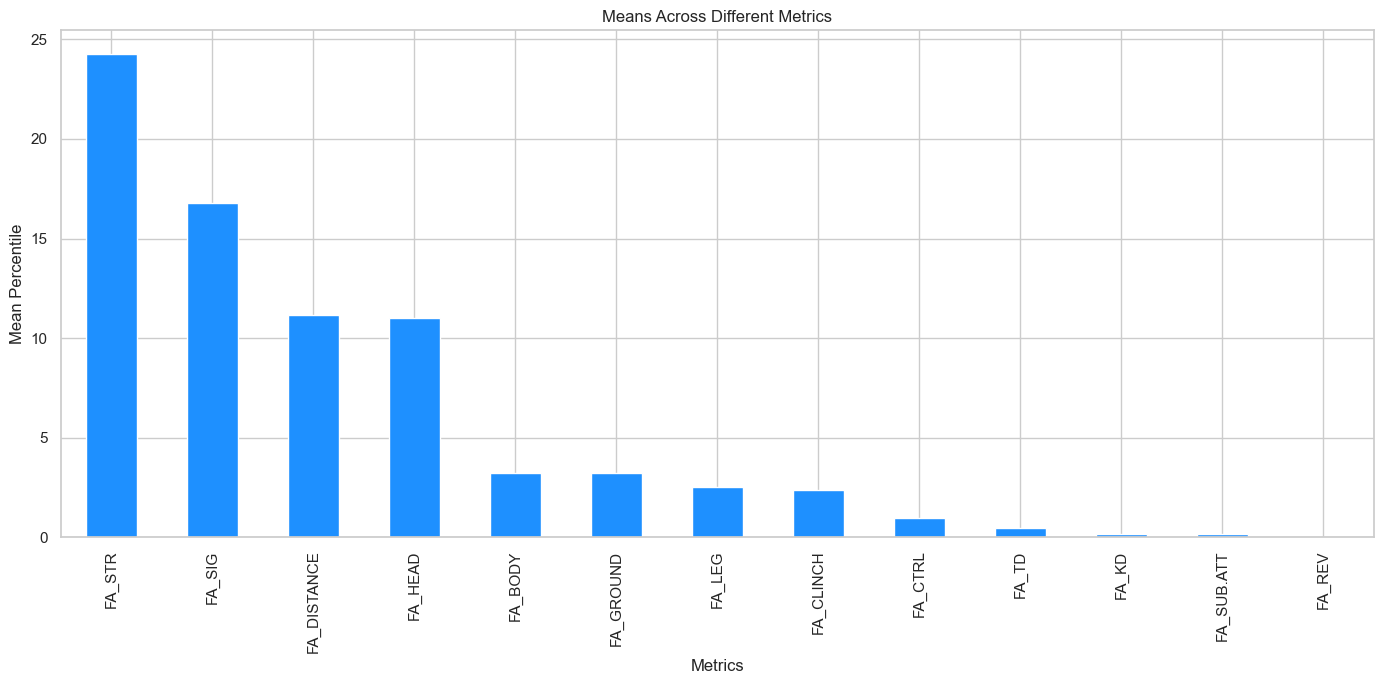

In [188]:
# Calculate the mean for each of the specified columns
means1 = fa_champions[metrics1].mean()

# Rank the means from highest to lowest and plot again
sorted_means1 = means1.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means1.plot(kind='bar', color='dodgerblue')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [189]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means1)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

FA_STR         24.240257
FA_SIG         16.786969
FA_DISTANCE    11.182800
FA_HEAD        11.024111
FA_BODY         3.238543
FA_GROUND       3.225539
FA_LEG          2.524314
FA_CLINCH       2.378630
FA_CTRL         0.960540
FA_TD           0.461349
FA_KD           0.194483
FA_SUB.ATT      0.189178
FA_REV          0.039975
dtype: float64


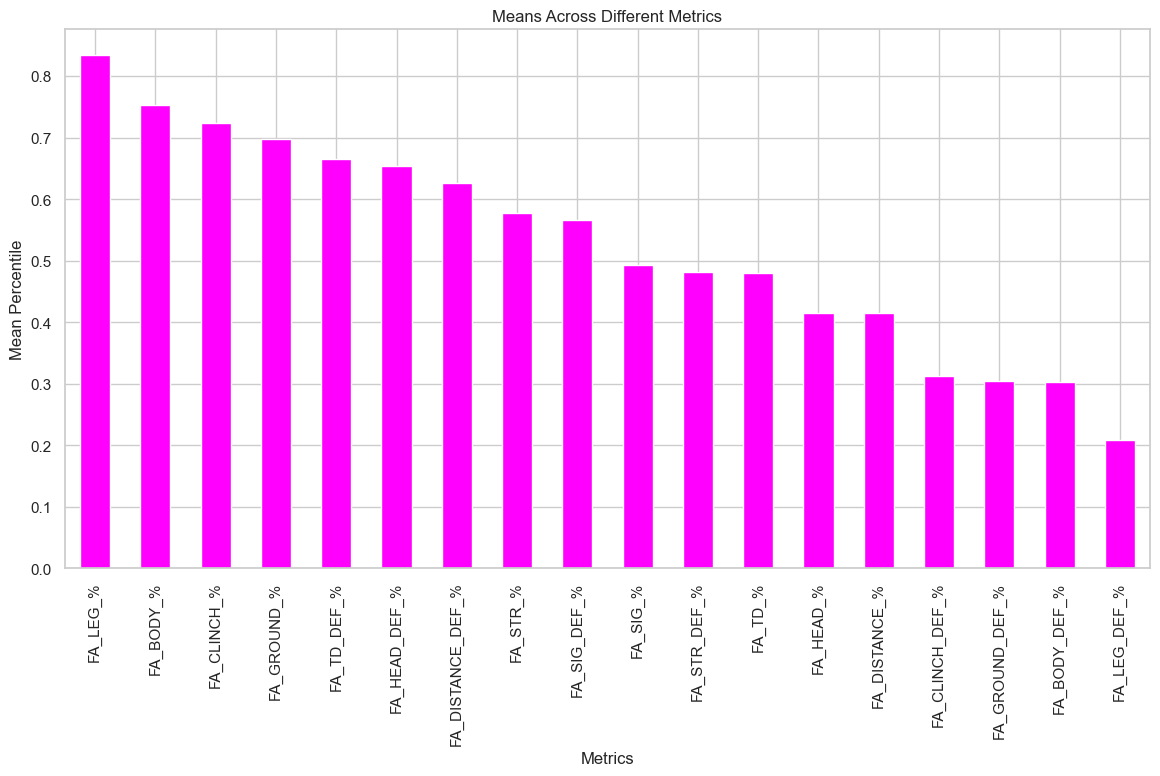

In [190]:
# Calculate the mean for each of the specified columns
meansA = fa_champions[metrics2].mean()

# Rank the means from highest to lowest and plot again
sorted_meansA = meansA.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansA.plot(kind='bar', color='fuchsia')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  
plt.show()

In [191]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_meansA)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

FA_LEG_%             0.833976
FA_BODY_%            0.752965
FA_CLINCH_%          0.723276
FA_GROUND_%          0.698076
FA_TD_DEF_%          0.664550
FA_HEAD_DEF_%        0.653479
FA_DISTANCE_DEF_%    0.625328
FA_STR_%             0.577259
FA_SIG_DEF_%         0.565893
FA_SIG_%             0.493218
FA_STR_DEF_%         0.482259
FA_TD_%              0.479201
FA_HEAD_%            0.415360
FA_DISTANCE_%        0.414179
FA_CLINCH_DEF_%      0.312915
FA_GROUND_DEF_%      0.304424
FA_BODY_DEF_%        0.302230
FA_LEG_DEF_%         0.207889
dtype: float64


### Challengers

In [192]:
fa_challengers = fa[fa['EVER_CHALLENGER'] == 'Yes']

fa_challengers

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5       Dustin Poirier  Southpaw            No          Yes             Yes   
6        Gilbert Burns  Orthodox            No           No             Yes   
17    Rafael Dos Anjos  Southpaw           Yes           No             Yes   
22            Petr Yan    Switch           Yes          Yes             Yes   
26         Marlon Vera    Switch            No           No             Yes   
...                ...       ...           ...          ...             ...   
2245       Pedro Rizzo  Orthodox            No           No             Yes   
2246   Ricco Rodriguez  Orthodox           Yes           No             Yes   
2251         Gan McGee  Orthodox            No           No             Yes   
2278      Pat Miletich  Orthodox           Yes           No             Yes   
2282   Kevin Randleman  Orthodox           Yes           No             Yes   

     EITHER_CHAMP        FA_FIGHTER     FA_KD     FA_TD  FA_SUB.ATT    FA_REV  \
5             Yes    Dustin Poirier  0.333333  0.380000    0.415556  0.038889   
6              No     Gilbert Burns  0.106061  0.737879    0.259091  0.000000   
17            Yes  Rafael Dos Anjos  0.124762  0.565714    0.243333  0.022381   
22            Yes          Petr Yan  0.332051  0.614103    0.053846  0.041026   
26             No       Marlon Vera  0.189130  0.188406    0.349275  0.014493   
...           ...               ...       ...       ...         ...       ...   
2245           No       Pedro Rizzo  0.203333  0.083333    0.000000  0.000000   
2246          Yes   Ricco Rodriguez  0.000000  0.923810    0.409524  0.119048   
2251           No         Gan McGee  0.000000  0.250000    0.000000  0.000000   
2278          Yes      Pat Miletich  0.100000  0.600000    0.300000  0.000000   
2282          Yes   Kevin Randleman  0.000000  0.350000    0.183333  0.000000   

       FA_CTRL    FA_HEAD   FA_BODY    FA_LEG  FA_DISTANCE  FA_CLINCH  \
5     0.931787  18.404444  1.986667  2.854444    16.203889   4.217222   
6     1.261818   9.092424  3.015152  2.731818    10.783333   1.413636   
17    1.195627   9.042857  3.488095  2.694762     9.950000   2.444762   
22    0.725256  17.366667  5.467949  2.526923    18.220513   2.866667   
26    0.471957  10.335507  4.074638  4.638406    14.327536   2.131159   
...        ...        ...       ...       ...          ...        ...   
2245  0.516444   4.200000  0.643333  4.120000     6.436667   1.273333   
2246  2.018254   7.495238  1.280952  0.695238     2.509524   1.342857   
2251  1.312500   7.875000  1.000000  0.625000     6.375000   0.250000   
2278  1.392222   4.166667  0.566667  0.833333     3.300000   0.800000   
2282  2.147778   3.016667  0.500000  0.083333     0.800000   0.600000   

      FA_GROUND     FA_SIG  FA_TOT.SIG     FA_STR  FA_TOTAL.STR  FA_TOTAL.TD  \
5      2.824444  23.245556   45.263333  27.461667     50.016111     0.986111   
6      2.642424  14.839394   30.507576  21.321212     37.996970     1.813636   
17     2.830952  15.225714   32.731905  21.592857     39.883810     1.515714   
22     4.274359  25.361538   47.634615  32.408974     55.421795     1.170513   
26     2.589855  19.048551   37.742029  22.190580     41.505797     0.450725   
...         ...        ...         ...        ...           ...          ...   
2245   1.253333   8.963333   23.783333  12.573333     27.723333     0.283333   
2246   5.619048   9.471429   16.190476  24.466667     32.152381     2.357143   
2251   2.875000   9.500000   29.125000  12.250000     32.125000     1.375000   
2278   1.466667   5.566667   11.666667  18.633333     24.966667     0.600000   
2282   2.200000   3.600000    7.433333  11.816667     16.333333     0.950000   

      FA_TOTAL.HEAD  FA_TOTAL.BODY  FA_TOTAL.LEG  FA_TOTAL.DISTANCE  \
5         38.940556       2.903333      3.419444          34.181111   
6         23.080303       3.980303      3.446970          25.089394   
17        24.749048       4.707143      3.

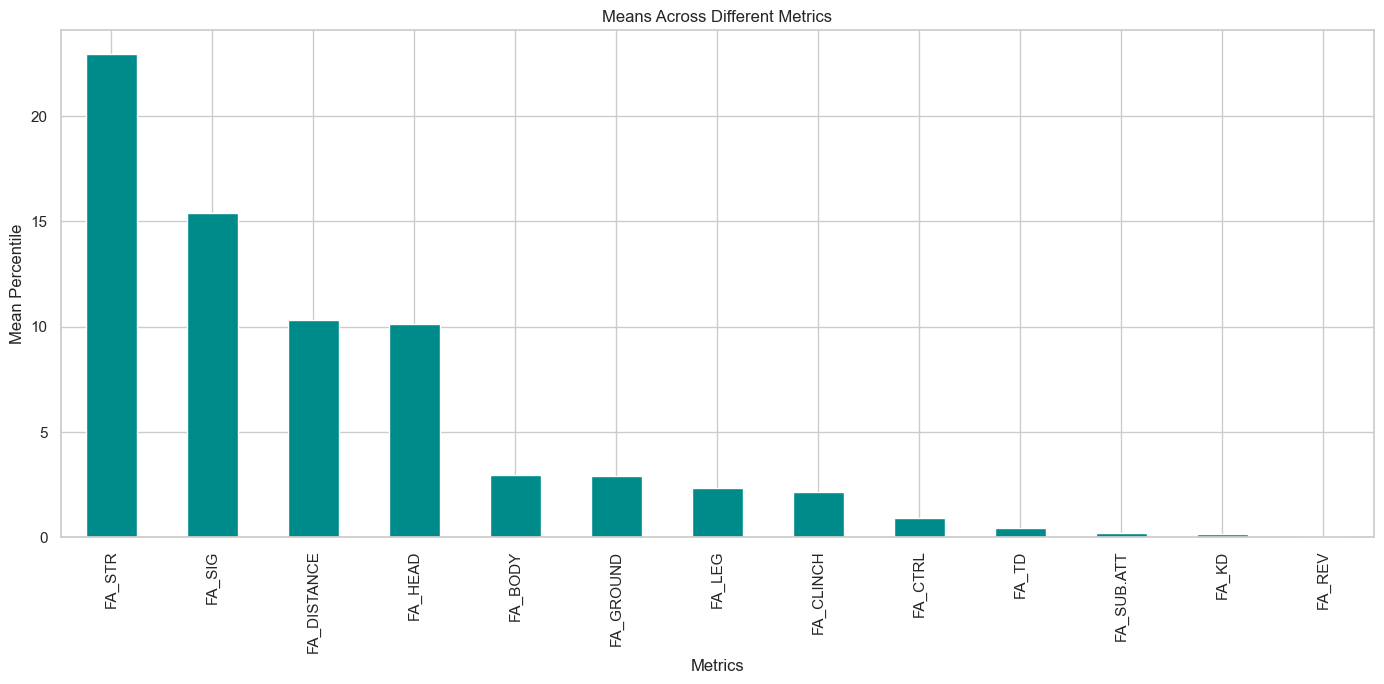

In [193]:
# Calculate the mean for each of the specified columns
means2 = fa_challengers[metrics1].mean()

# Rank the means from highest to lowest and plot again
sorted_means2 = means2.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means2.plot(kind='bar', color='darkcyan')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [194]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means2)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

FA_STR         22.923483
FA_SIG         15.410662
FA_DISTANCE    10.327533
FA_HEAD        10.124125
FA_BODY         2.961720
FA_GROUND       2.924029
FA_LEG          2.324817
FA_CLINCH       2.159100
FA_CTRL         0.942520
FA_TD           0.432389
FA_SUB.ATT      0.193111
FA_KD           0.180899
FA_REV          0.044116
dtype: float64


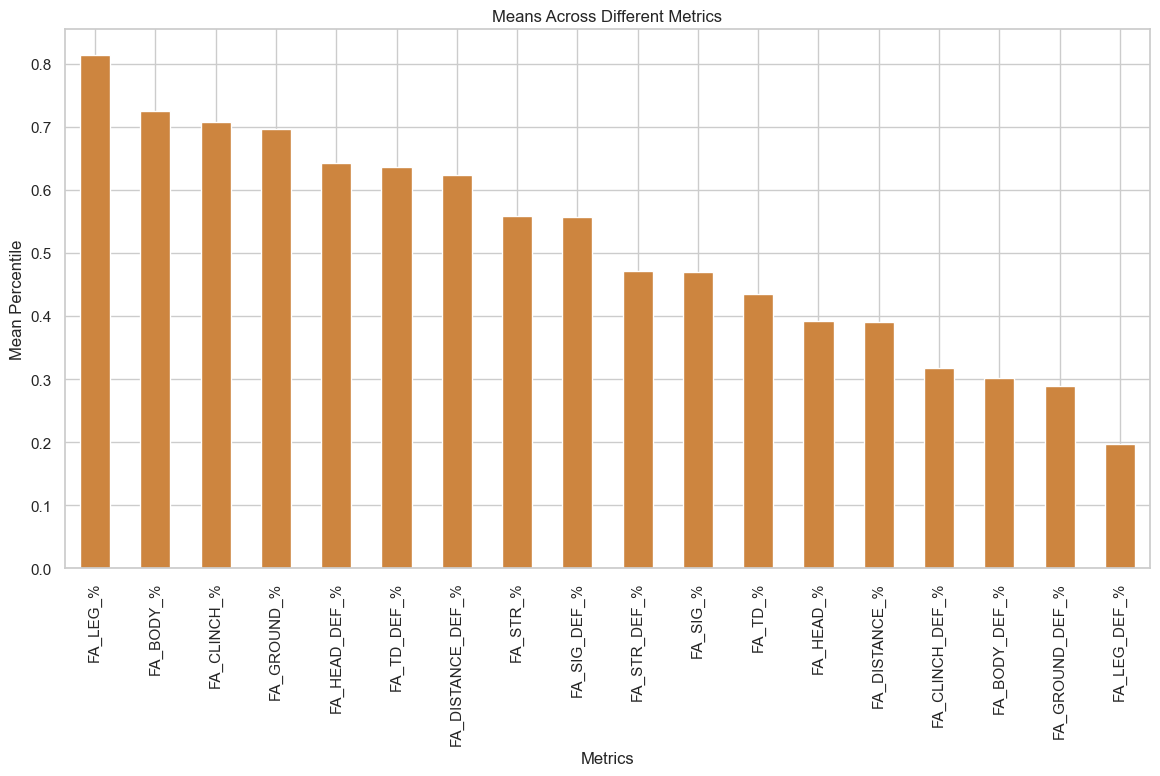

In [195]:
# Calculate the mean for each of the specified columns
meansB = fa_challengers[metrics2].mean()

# Rank the means from highest to lowest and plot again
sorted_meansB = meansB.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansB.plot(kind='bar', color='peru')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  
plt.show()

In [196]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_meansB)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

FA_LEG_%             0.813412
FA_BODY_%            0.724973
FA_CLINCH_%          0.708018
FA_GROUND_%          0.695559
FA_HEAD_DEF_%        0.642939
FA_TD_DEF_%          0.635492
FA_DISTANCE_DEF_%    0.623366
FA_STR_%             0.558913
FA_SIG_DEF_%         0.557172
FA_STR_DEF_%         0.470928
FA_SIG_%             0.470047
FA_TD_%              0.434055
FA_HEAD_%            0.392721
FA_DISTANCE_%        0.389862
FA_CLINCH_DEF_%      0.317479
FA_BODY_DEF_%        0.301163
FA_GROUND_DEF_%      0.289093
FA_LEG_DEF_%         0.196398
dtype: float64


### Non Champions

In [197]:
fa_non_champions = fa[fa['EITHER_CHAMP'] != 'Yes']

fa_non_champions

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
6          Gilbert Burns  Orthodox            No           No             Yes   
...                  ...       ...           ...          ...             ...   
2245         Pedro Rizzo  Orthodox            No           No             Yes   
2251           Gan McGee  Orthodox            No           No             Yes   
2252         Ian Freeman  Orthodox            No           No              No   
2264      Eugene Jackson  Orthodox            No           No              No   
2286         Fabiano Iha  Orthodox            No           No              No   

     EITHER_CHAMP          FA_FIGHTER     FA_KD     FA_TD  FA_SUB.ATT  \
1              No          CJ Vergara  0.000000  0.000000    0.083333   
2              No      Curtis Blaydes  0.055556  1.266667    0.000000   
3              No     Jailton Almeida  0.000000  2.028571    0.685714   
4              No  Benoit Saint Denis  0.357143  1.238095    0.500000   
6              No       Gilbert Burns  0.106061  0.737879    0.259091   
...           ...                 ...       ...       ...         ...   
2245           No         Pedro Rizzo  0.203333  0.083333    0.000000   
2251           No           Gan McGee  0.000000  0.250000    0.000000   
2252           No         Ian Freeman  0.000000  0.233333    0.066667   
2264           No      Eugene Jackson  0.000000  0.500000    0.625000   
2286           No         Fabiano Iha  0.000000  0.733333    0.933333   

        FA_REV   FA_CTRL    FA_HEAD   FA_BODY    FA_LEG  FA_DISTANCE  \
1     0.083333  0.694444  13.222222  8.861111  3.194444    17.111111   
2     0.000000  1.519198   9.433333  1.475926  2.385185     6.462963   
3     0.028571  3.565476  13.557143  0.571429  0.100000     0.428571   
4     0.142857  1.931746  10.833333  6.380952  3.047619    11.404762   
6     0.000000  1.261818   9.092424  3.015152  2.731818    10.783333   
...        ...       ...        ...       ...       ...          ...   
2245  0.000000  0.516444   4.200000  0.643333  4.120000     6.436667   
2251  0.000000  1.312500   7.875000  1.000000  0.625000     6.375000   
2252  0.200000  1.591111   9.900000  1.366667  0.533333     1.300000   
2264  0.000000  0.166667   0.625000  0.250000  0.000000     0.375000   
2286  0.000000  0.961111   3.200000  0.466667  1.200000     1.866667   

      FA_CLINCH  FA_GROUND     FA_SIG  FA_TOT.SIG     FA_STR  FA_TOTAL.STR  \
1      2.027778   6.138889  25.277778   43.722222  35.694444     55.388889   
2      1.612963   5.218519  13.294444   27.970370  22.492593     39.153704   
3      0.085714  13.714286  14.228571   22.457143  26.142857     37.014286   
4      3.642857   5.214286  20.261905   37.119048  32.666667     51.357143   
6      1.413636   2.642424  14.839394   30.507576  21.321212     37.996970   
...         ...        ...        ...         ...        ...           ...   
2245   1.273333   1.253333   8.963333   23.783333  12.573333     27.723333   
2251   0.250000   2.875000   9.500000   29.125000  12.250000     32.125000   
2252   3.500000   7.000000  11.800000   21.266667  23.166667     33.066667   
2264   0.250000   0.250000   0.875000    3.875000  12.750000     16.375000   
2286   1.133333   1.866667   4.866667    9.800000   8.466667     13.800000   

      FA_TOTAL.TD  FA_TOTAL.HEAD  FA_TOTAL.BODY  FA_TOTAL.LEG  \
1        0.000000      28.388889      11.694444      3.638889   
2        2.444444      23.518519       1.692593      2.759259   
3        3.000000      21.228571       0.857143      0.371429   
4        3.238095      25.642857       8.285714      3.190476   
6        1.813636      23.080303       3

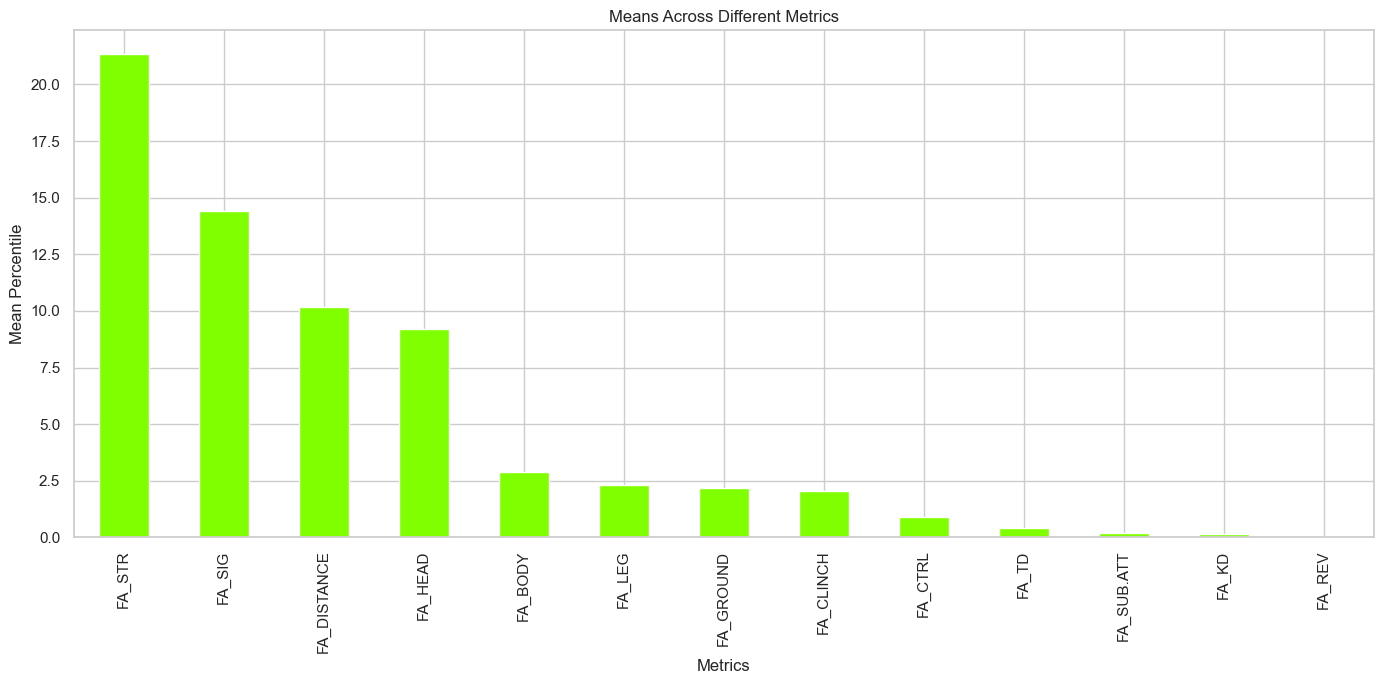

In [198]:
# Calculate the mean for each of the specified columns
means3 = fa_non_champions[metrics1].mean()

# Rank the means from highest to lowest and plot again
sorted_means3 = means3.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means3.plot(kind='bar', color='chartreuse')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [199]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means3)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

FA_STR         21.323796
FA_SIG         14.397316
FA_DISTANCE    10.167569
FA_HEAD         9.196077
FA_BODY         2.901468
FA_LEG          2.299772
FA_GROUND       2.180359
FA_CLINCH       2.049388
FA_CTRL         0.884414
FA_TD           0.426226
FA_SUB.ATT      0.193950
FA_KD           0.129751
FA_REV          0.059439
dtype: float64


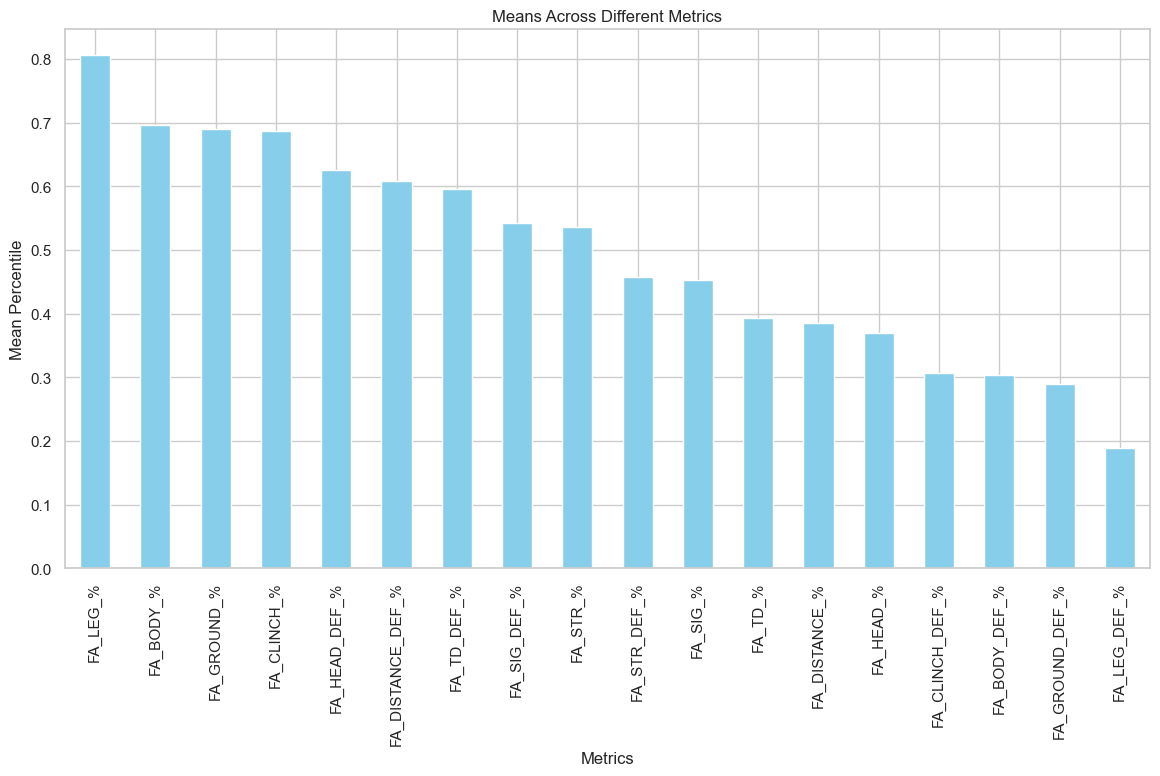

In [200]:
# Calculate the mean for each of the specified columns
meansC = fa_non_champions[metrics2].mean()

# Rank the means from highest to lowest and plot again
sorted_meansC = meansC.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansC.plot(kind='bar', color='skyblue')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  
plt.show()

In [201]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_meansC)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

FA_LEG_%             0.806208
FA_BODY_%            0.697069
FA_GROUND_%          0.690389
FA_CLINCH_%          0.686431
FA_HEAD_DEF_%        0.625425
FA_DISTANCE_DEF_%    0.608515
FA_TD_DEF_%          0.595080
FA_SIG_DEF_%         0.541719
FA_STR_%             0.536701
FA_STR_DEF_%         0.458306
FA_SIG_%             0.452500
FA_TD_%              0.392616
FA_DISTANCE_%        0.385435
FA_HEAD_%            0.370293
FA_CLINCH_DEF_%      0.307128
FA_BODY_DEF_%        0.304421
FA_GROUND_DEF_%      0.289130
FA_LEG_DEF_%         0.189558
dtype: float64


### Non Challengers

In [202]:
fa_non_challengers = fa[fa['EVER_CHALLENGER'] != 'Yes']

fa_non_challengers

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM  \
1               CJ Vergara  Orthodox            No           No   
2           Curtis Blaydes  Orthodox            No           No   
3          Jailton Almeida  Orthodox            No           No   
4       Benoit Saint Denis  Southpaw            No           No   
7     Jack Della Maddalena    Switch            No           No   
...                    ...       ...           ...          ...   
2198       Trevor Prangley  Orthodox            No           No   
2234       Wesley Correira  Orthodox            No           No   
2252           Ian Freeman  Orthodox            No           No   
2264        Eugene Jackson  Orthodox            No           No   
2286           Fabiano Iha  Orthodox            No           No   

     EVER_CHALLENGER EITHER_CHAMP            FA_FIGHTER     FA_KD     FA_TD  \
1                 No           No            CJ Vergara  0.000000  0.000000   
2                 No           No        Curtis Blaydes  0.055556  1.266667   
3                 No           No       Jailton Almeida  0.000000  2.028571   
4                 No           No    Benoit Saint Denis  0.357143  1.238095   
7                 No           No  Jack Della Maddalena  0.761905  0.047619   
...              ...          ...                   ...       ...       ...   
2198              No           No       Trevor Prangley  0.000000  1.250000   
2234              No           No       Wesley Correira  0.250000  0.000000   
2252              No           No           Ian Freeman  0.000000  0.233333   
2264              No           No        Eugene Jackson  0.000000  0.500000   
2286              No           No           Fabiano Iha  0.000000  0.733333   

      FA_SUB.ATT    FA_REV   FA_CTRL    FA_HEAD   FA_BODY    FA_LEG  \
1       0.083333  0.083333  0.694444  13.222222  8.861111  3.194444   
2       0.000000  0.000000  1.519198   9.433333  1.475926  2.385185   
3       0.685714  0.028571  3.565476  13.557143  0.571429  0.100000   
4       0.500000  0.142857  1.931746  10.833333  6.380952  3.047619   
7       0.142857  0.000000  0.201587  18.952381  6.571429  2.047619   
...          ...       ...       ...        ...       ...       ...   
2198    0.416667  0.000000  2.414583   3.833333  2.916667  3.000000   
2234    0.000000  0.000000  0.056250   8.750000  0.625000  0.375000   
2252    0.066667  0.200000  1.591111   9.900000  1.366667  0.533333   
2264    0.625000  0.000000  0.166667   0.625000  0.250000  0.000000   
2286    0.933333  0.000000  0.961111   3.200000  0.466667  1.200000   

      FA_DISTANCE  FA_CLINCH  FA_GROUND     FA_SIG  FA_TOT.SIG     FA_STR  \
1       17.111111   2.027778   6.138889  25.277778   43.722222  35.694444   
2        6.462963   1.612963   5.218519  13.294444   27.970370  22.492593   
3        0.428571   0.085714  13.714286  14.228571   22.457143  26.142857   
4       11.404762   3.642857   5.214286  20.261905   37.119048  32.666667   
7       21.809524   2.380952   3.380952  27.571429   51.142857  33.285714   
...           ...        ...        ...        ...         ...        ...   
2198     1.833333   4.833333   3.083333   9.750000   16.416667  26.125000   
2234     4.500000   5.000000   0.250000   9.750000   23.000000  17.875000   
2252     1.300000   3.500000   7.000000  11.800000   21.266667  23.166667   
2264     0.375000   0.250000   0.250000   0.875000    3.875000  12.750000   
2286     1.866667   1.133333   1.866667   4.866667    9.800000   8.466667   

      FA_TOTAL.STR  FA_TOTAL.TD  FA_TOTAL.HEAD  FA_TOTAL.BODY  FA_TOTAL.LEG  \
1        55.388889     0.000000      28.388889      11.694444      3.638889   
2        39.153704     2.444444      23.518519       1.692593      2.759259   
3        37.014286     3.000000      21.228571       0.857143      0.371429   
4        51.357143     3.238095      25.642857       8.285714      3.190476   
7        57.523810     0.142857      38.952381       9.428571      2.761905   
...          

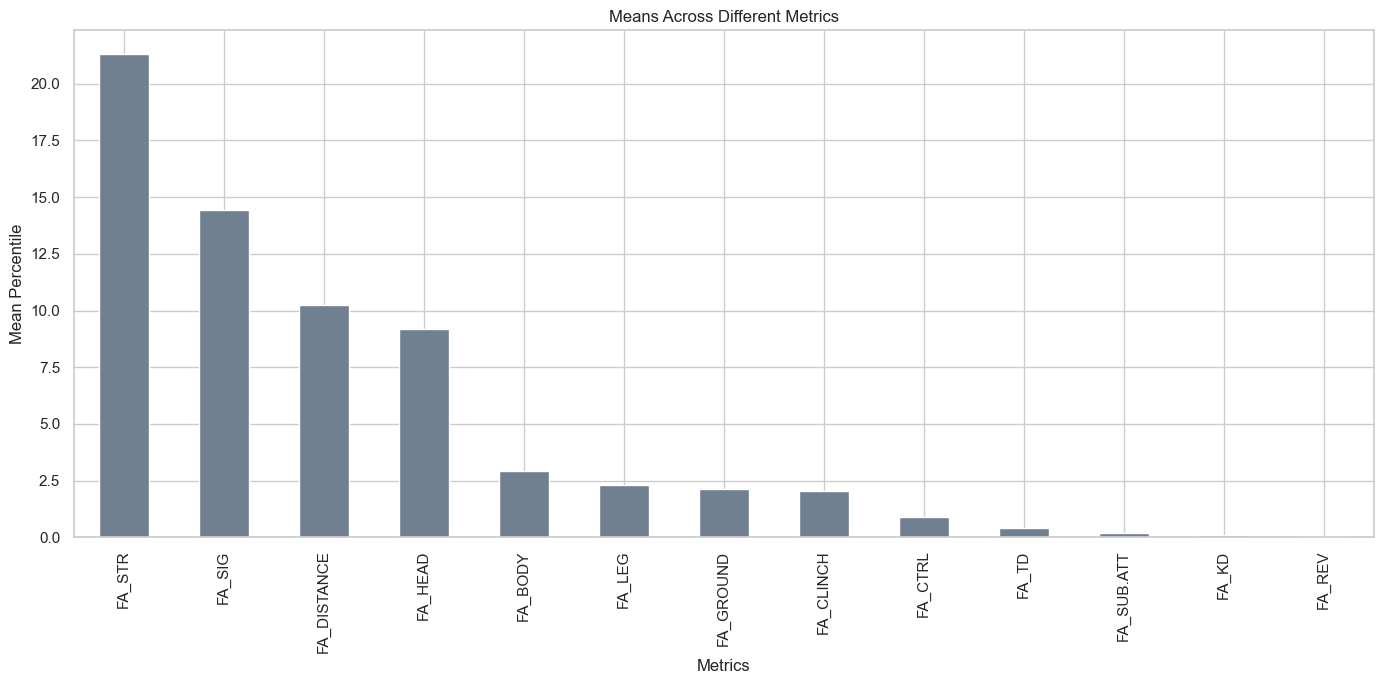

In [203]:
# Calculate the mean for each of the specified columns
means4 = fa_non_challengers[metrics1].mean()

# Rank the means from highest to lowest and plot again
sorted_means4 = means4.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means4.plot(kind='bar', color='slategray')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [204]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means4)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

FA_STR         21.287390
FA_SIG         14.424655
FA_DISTANCE    10.231194
FA_HEAD         9.187605
FA_BODY         2.921219
FA_LEG          2.315831
FA_GROUND       2.134558
FA_CLINCH       2.058903
FA_CTRL         0.880321
FA_TD           0.428306
FA_SUB.ATT      0.193668
FA_KD           0.125936
FA_REV          0.060576
dtype: float64


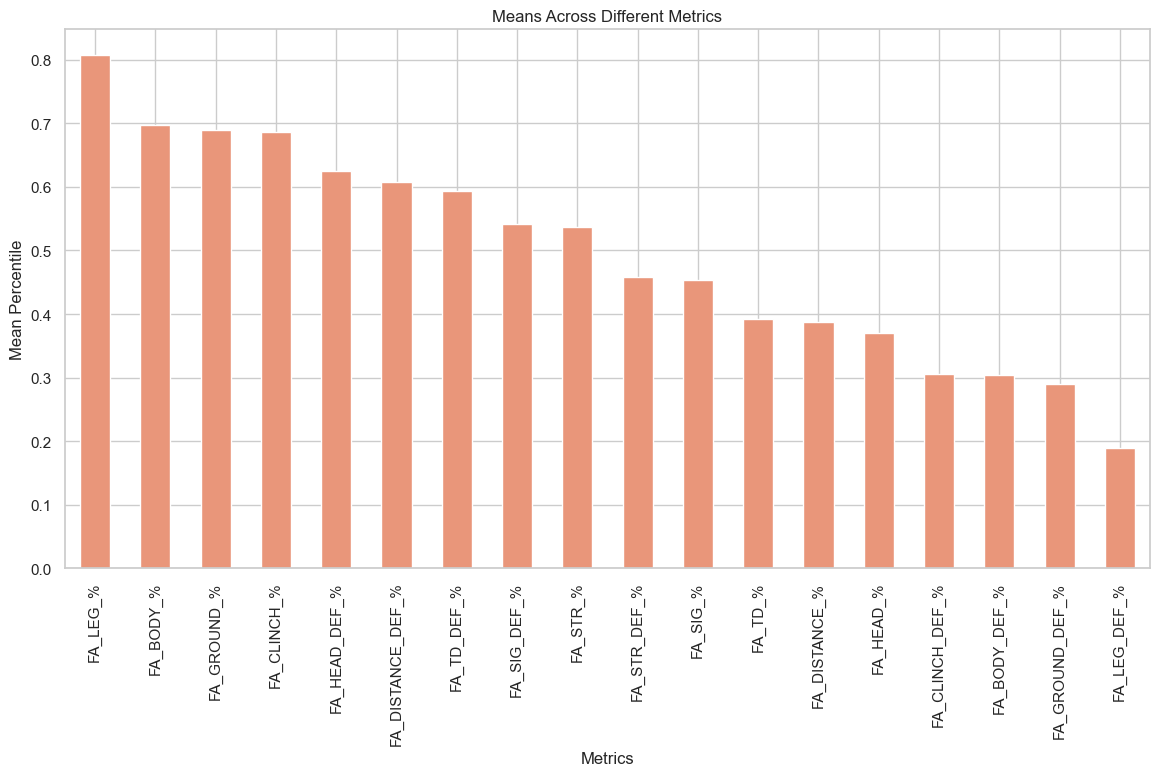

In [205]:
# Calculate the mean for each of the specified columns
meansD = fa_non_challengers[metrics2].mean()

# Rank the means from highest to lowest and plot again
sorted_meansD = meansD.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansD.plot(kind='bar', color='darksalmon')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  
plt.show()

In [206]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_meansD)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

FA_LEG_%             0.807412
FA_BODY_%            0.696901
FA_GROUND_%          0.690107
FA_CLINCH_%          0.685705
FA_HEAD_DEF_%        0.624666
FA_DISTANCE_DEF_%    0.607223
FA_TD_DEF_%          0.593804
FA_SIG_DEF_%         0.540996
FA_STR_%             0.536201
FA_STR_DEF_%         0.458106
FA_SIG_%             0.452912
FA_TD_%              0.392659
FA_DISTANCE_%        0.387256
FA_HEAD_%            0.370171
FA_CLINCH_DEF_%      0.305668
FA_BODY_DEF_%        0.304844
FA_GROUND_DEF_%      0.290575
FA_LEG_DEF_%         0.189947
dtype: float64


## round_average

In [207]:
round_average.describe()

RA_KD        RA_TD   RA_SUB.ATT       RA_REV      RA_CTRL  \
count  2317.000000  2317.000000  2317.000000  2317.000000  2317.000000   
mean      0.067797     0.404869     0.157241     0.063200     0.875441   
std       0.120949     0.422592     0.255422     0.124811     0.722091   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.055556     0.000000     0.000000     0.309259   
50%       0.000000     0.312500     0.066667     0.000000     0.722222   
75%       0.102273     0.611111     0.222222     0.083333     1.266667   
max       1.000000     3.500000     3.000000     1.500000     4.891667   

           RA_HEAD      RA_BODY       RA_LEG  RA_DISTANCE    RA_CLINCH  \
count  2317.000000  2317.000000  2317.000000  2317.000000  2317.000000   
mean      8.391623     2.795283     2.185652     9.709796     1.927536   
std       5.174244     2.054144     1.899629     6.613471     1.735839   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.750000     1.333333     0.833333     4.611111     0.750000   
50%       7.833333     2.361111     1.769444     8.711111     1.500000   
75%      11.314815     3.833333     3.000000    13.503938     2.666667   
max      35.722222    15.666667    21.000000    45.333333    15.166667   

         RA_GROUND       RA_SIG   RA_TOT.SIG       RA_STR  RA_TOTAL.STR  \
count  2317.000000  2317.000000  2317.000000  2317.000000   2317.000000   
mean      1.735226    13.372558    30.830175    20.749173     39.285843   
std       2.258217     7.325111    15.655065     9.801365     16.820862   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.333333     8.194444    19.689755    14.416667     28.020833   
50%       1.166667    12.666667    29.586667    20.200000     38.722222   
75%       2.333333    17.833333    41.388889    26.530000     50.166667   
max      32.000000    49.666667    98.333333    75.000000    105.000000   

       RA_TOTAL.TD  RA_TOTAL.HEAD  RA_TOTAL.BODY  RA_TOTAL.LEG  \
count  2317.000000    2317.000000    2317.000000   2317.000000   
mean      1.177554      24.018487       4.065400      2.746289   
std       1.031576      12.901843       2.831087      2.359073   
min       0.000000       0.000000       0.000000      0.000000   
25%       0.361111      15.000000       2.000000      1.004762   
50%       1.000000      22.722222       3.531746      2.194444   
75%       1.722222      32.261183       5.583333      3.805556   
max       7.346970      80.333333      18.777778     24.000000   

       RA_TOTAL.DISTANCE  RA_TOTAL.CLINCH  RA_TOTAL.GROUND    RA_OPP_KD  \
count        2317.000000      2317.000000      2317.000000  2317.000000   
mean           25.453742         2.829491         2.546942     0.117523   
std            15.272053         2.379719         3.243287     0.206597   
min             0.000000         0.000000         0.000000     0.000000   
25%            13.861111         1.208333         0.500000     0.000000   
50%            23.440476         2.285714         1.715812     0.047619   
75%            35.712929         3.833333         3.395672     0.144444   
max            95.500000        18.333333        49.000000     2.000000   

         RA_OPP_TD  RA_OPP_SUB.ATT   RA_OPP_REV  RA_OPP_CTRL  RA_OPP_HEAD  \
count  2317.000000     2317.000000  2317.000000  2317.000000  2317.000000   
mean      0.524601        0.226220     0.065894     1.130002    10.225281   
std       0.491388        0.370242     0.143250     0.837123     5.348792   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       0.166667        0.000000     0.000000     0.492593     6.611111   
50%       0.416667        0.111111     0.000000     0.974074     9.416667   
75%       0.755952        0.291667     0.083333     1.607407    12.947751   
max       5.000000        5.000000     2.000000     4.700000    52.166667   

       RA_OPP_BODY   RA_OPP_LEG  RA_OP

In [208]:
metrics1 = ['RA_KD', 'RA_TD', 'RA_SUB.ATT', 'RA_REV', 'RA_CTRL', 'RA_HEAD', 'RA_BODY', 'RA_LEG', 'RA_DISTANCE', 
    'RA_CLINCH', 'RA_GROUND', 'RA_SIG', 'RA_STR']


metrics2 = [
    'RA_TD_%','RA_HEAD_%','RA_BODY_%','RA_LEG_%','RA_DISTANCE_%','RA_CLINCH_%',	'RA_GROUND_%', 'RA_SIG_%',
    'RA_STR_%',	'RA_TD_DEF_%','RA_HEAD_DEF_%','RA_BODY_DEF_%','RA_LEG_DEF_%', 'RA_DISTANCE_DEF_%',	
    'RA_CLINCH_DEF_%',	'RA_GROUND_DEF_%',	'RA_SIG_DEF_%',	'RA_STR_DEF_%']

In [209]:
# Filter the dataframe using the correct column name "FIGHTER"
ra = round_average[round_average['FIGHTER'].isin(fighters_list)]

ra

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
5         Dustin Poirier  Southpaw            No          Yes             Yes   
...                  ...       ...           ...          ...             ...   
2252         Ian Freeman  Orthodox            No           No              No   
2264      Eugene Jackson  Orthodox            No           No              No   
2278        Pat Miletich  Orthodox           Yes           No             Yes   
2282     Kevin Randleman  Orthodox           Yes           No             Yes   
2286         Fabiano Iha  Orthodox            No           No              No   

     EITHER_CHAMP          RA_FIGHTER     RA_KD     RA_TD  RA_SUB.ATT  \
1              No          CJ Vergara  0.000000  0.000000    0.055556   
2              No      Curtis Blaydes  0.024444  1.886667    0.000000   
3              No     Jailton Almeida  0.000000  1.476190    0.304762   
4              No  Benoit Saint Denis  0.209524  0.895238    0.257143   
5             Yes      Dustin Poirier  0.104762  0.357143    0.340476   
...           ...                 ...       ...       ...         ...   
2252           No         Ian Freeman  0.000000  0.244444    0.166667   
2264           No      Eugene Jackson  0.000000  0.250000    0.750000   
2278          Yes        Pat Miletich  0.083333  0.433333    0.233333   
2282          Yes     Kevin Randleman  0.000000  0.283333    0.150000   
2286           No         Fabiano Iha  0.000000  0.600000    0.400000   

        RA_REV   RA_CTRL    RA_HEAD   RA_BODY    RA_LEG  RA_DISTANCE  \
1     0.055556  0.681481  12.750000  9.861111  3.083333    18.250000   
2     0.000000  2.670889   8.462222  1.548889  1.500000     5.433333   
3     0.200000  3.737937   8.580952  0.571429  0.266667     0.647619   
4     0.047619  1.433492  11.952381  6.561905  2.961905    14.514286   
5     0.032381  0.937897  19.855238  2.094762  1.622857    18.732857   
...        ...       ...        ...       ...       ...          ...   
2252  0.066667  1.942407   9.344444  0.644444  0.311111     1.122222   
2264  0.000000  0.112500   0.750000  0.125000  0.000000     0.625000   
2278  0.000000  0.985556   4.483333  0.683333  1.600000     4.766667   
2282  0.000000  1.512778   3.600000  0.333333  0.066667     1.566667   
2286  0.000000  1.698889   3.200000  0.200000  1.733333     1.333333   

      RA_CLINCH  RA_GROUND     RA_SIG  RA_TOT.SIG     RA_STR  RA_TOTAL.STR  \
1      2.500000   4.944444  25.694444   44.611111  37.111111     57.305556   
2      1.900000   4.177778  11.511111   21.655556  22.500000     35.106667   
3      0.600000   8.171429   9.419048   14.228571  27.542857     35.980952   
4      2.761905   4.200000  21.476190   39.304762  29.761905     49.047619   
5      2.650000   2.190000  23.572857   43.810476  29.180000     49.939524   
...         ...        ...        ...         ...        ...           ...   
2252   2.844444   6.333333  10.300000   21.322222  22.833333     34.544444   
2264   0.125000   0.125000   0.875000    3.250000   9.875000     12.625000   
2278   0.950000   1.050000   6.766667   13.150000  17.816667     24.683333   
2282   0.783333   1.650000   4.000000    9.250000  10.850000     16.666667   
2286   1.933333   1.866667   5.133333   12.466667  13.933333     23.266667   

      RA_TOTAL.TD  RA_TOTAL.HEAD  RA_TOTAL.BODY  RA_TOTAL.LEG  \
1        0.000000      28.472222      12.638889      3.500000   
2        3.837778      18.253333       1.726667      1.675556   
3        3.409524      12.971429       0.628571      0.628571   
4        3.780952      28.190476       8.057143      3.057143   
5        0.991429      39.138095       2

In [210]:
# Original metrics list
original_metrics = [
    "KD", "TD", "SUB.ATT", "REV", "CTRL", "HEAD", "BODY", "LEG", "DISTANCE",
    "CLINCH", "GROUND", "SIG", "STR", "TD_DEF", "HEAD_DEF", "BODY_DEF", "LEG_DEF",
    "DISTANCE_DEF", "CLINCH_DEF", "GROUND_DEF", "SIG_DEF", "STR_DEF", "TD_%",
    "HEAD_%", "BODY_%", "LEG_%", "DISTANCE_%", "CLINCH_%", "GROUND_%", "SIG_%",
    "STR_%", "TD_DEF_%", "HEAD_DEF_%", "BODY_DEF_%", "LEG_DEF_%", "DISTANCE_DEF_%",
    "CLINCH_DEF_%", "GROUND_DEF_%", "SIG_DEF_%", "STR_DEF_%"
]

# Adding 'RA_' prefix to each metric in the list
ra_metrics = ["RA_" + metric for metric in original_metrics]
ra_metrics


# Reinitializing the dictionary to hold the top ten fighters for the updated list of metrics
top_fighters_per_metric = {}

# Creating a dictionary to hold the top ten fighters for each metric
top_fighters_per_metric = {}

# Finding the top ten fighters for each metric
for metric in ra_metrics:
    # Some metrics may have missing values, so we sort only non-NA values
    top_fighters_per_metric[metric] = ra.nlargest(10, metric)[['FIGHTER', metric]]

# Printing the top ten fighters for each metric with a blank line in between
for metric, data in top_fighters_per_metric.items():
    print(f"Top ten fighters for {metric}:")
    if isinstance(data, pd.DataFrame):
        print(data.to_string(index=False))
    else:
        print(data)
    print("\n")  # Blank line for separation

Top ten fighters for RA_KD:
             FIGHTER    RA_KD
    Sergei Pavlovich 0.875000
Santiago Ponzinibbio 0.647839
          Uros Medic 0.622222
       Chris Daukaus 0.562500
      Michael Kuiper 0.555556
         James Irvin 0.550000
       Ihor Potieria 0.511111
 Joachim Christensen 0.500000
      Montel Jackson 0.481481
 Khalil Rountree Jr. 0.458333


Top ten fighters for RA_TD:
          FIGHTER    RA_TD
Merab Dvalishvili 2.446970
       Jason Witt 2.222222
    Jacob Malkoun 2.194444
     Jake O'Brien 2.142857
 Bartosz Fabinski 2.111111
   Jeremy Kennedy 2.027778
  Muhammad Mokaev 1.966667
   Curtis Blaydes 1.886667
       Sean Sherk 1.858081
   Mateusz Gamrot 1.781667


Top ten fighters for RA_SUB.ATT:
        FIGHTER  RA_SUB.ATT
    John Albert    1.700000
  TJ Waldburger    1.305556
      Paul Sass    1.200000
    James Wilks    1.111111
Preston Parsons    1.000000
     Jason High    0.988889
    Jimmy Flick    0.875000
     Dave Menne    0.853333
  Tatsuro Taira    0.800000


### Champions

In [211]:
ra_champions = ra[ra['EITHER_CHAMP'] == 'Yes']

ra_champions

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5       Dustin Poirier  Southpaw            No          Yes             Yes   
17    Rafael Dos Anjos  Southpaw           Yes           No             Yes   
22            Petr Yan    Switch           Yes          Yes             Yes   
27       Sean O'Malley    Switch           Yes           No             Yes   
50      Brandon Moreno  Orthodox           Yes          Yes             Yes   
...                ...       ...           ...          ...             ...   
2165        Dave Menne  Orthodox           Yes           No             Yes   
2241     Carlos Newton  Orthodox           Yes           No             Yes   
2246   Ricco Rodriguez  Orthodox           Yes           No             Yes   
2278      Pat Miletich  Orthodox           Yes           No             Yes   
2282   Kevin Randleman  Orthodox           Yes           No             Yes   

     EITHER_CHAMP        RA_FIGHTER     RA_KD     RA_TD  RA_SUB.ATT    RA_REV  \
5             Yes    Dustin Poirier  0.104762  0.357143    0.340476  0.032381   
17            Yes  Rafael Dos Anjos  0.043160  0.619217    0.140167  0.020303   
22            Yes          Petr Yan  0.197902  0.470559    0.056667  0.034848   
27            Yes     Sean O'Malley  0.125000  0.100000    0.075000  0.025000   
50            Yes    Brandon Moreno  0.056456  0.544780    0.107555  0.110055   
...           ...               ...       ...       ...         ...       ...   
2165          Yes        Dave Menne  0.000000  0.080000    0.853333  0.233333   
2241          Yes     Carlos Newton  0.000000  0.441667    0.245833  0.183333   
2246          Yes   Ricco Rodriguez  0.000000  0.907143    0.192857  0.061905   
2278          Yes      Pat Miletich  0.083333  0.433333    0.233333  0.000000   
2282          Yes   Kevin Randleman  0.000000  0.283333    0.150000  0.000000   

       RA_CTRL    RA_HEAD   RA_BODY    RA_LEG  RA_DISTANCE  RA_CLINCH  \
5     0.937897  19.855238  2.094762  1.622857    18.732857   2.650000   
17    1.268712  10.169100  3.897003  2.866448    11.633615   3.032440   
22    0.879949  18.562191  4.925058  2.606597    17.944266   2.520023   
27    0.052639  31.758333  9.583333  2.633333    42.091667   1.041667   
50    0.923321  14.478764  3.475577  1.919121    17.296896   1.217363   
...        ...        ...       ...       ...          ...        ...   
2165  0.853000   6.166667  1.760000  3.320000     4.606667   4.573333   
2241  0.732361   0.745833  0.508333  0.183333     0.687500   0.520833   
2246  2.530516   9.514286  1.047619  0.366667     1.554762   0.859524   
2278  0.985556   4.483333  0.683333  1.600000     4.766667   0.950000   
2282  1.512778   3.600000  0.333333  0.066667     1.566667   0.783333   

      RA_GROUND     RA_SIG  RA_TOT.SIG     RA_STR  RA_TOTAL.STR  RA_TOTAL.TD  \
5      2.190000  23.572857   43.810476  29.180000     49.939524     0.991429   
17     2.266496  16.932551   34.930426  23.730590     42.639434     1.778249   
22     5.629557  26.093846   46.200629  34.872984     55.728811     1.014918   
27     0.841667  43.975000   69.083333  45.058333     70.333333     0.183333   
50     1.359203  19.873462   44.118269  24.699313     49.308874     1.050852   
...         ...        ...         ...        ...           ...          ...   
2165   2.066667  11.246667   22.093333  24.086667     35.566667     0.160000   
2241   0.229167   1.437500    4.862500   5.912500      9.775000     0.787500   
2246   8.514286  10.928571   19.852381  30.600000     40.557143     1.745238   
2278   1.050000   6.766667   13.150000  17.816667     24.683333     0.433333   
2282   1.650000   4.000000    9.250000  10.850000     16.666667     0.500000   

      RA_TOTAL.HEAD  RA_TOTAL.BODY  RA_TOTAL.LEG  RA_TOTAL.DISTANCE  \
5         39.138095       2.737143      1.935238          36.829524   
17        26.360145       5.202845      3.367436          27.883052   
22        37.513450       5.920093      2.

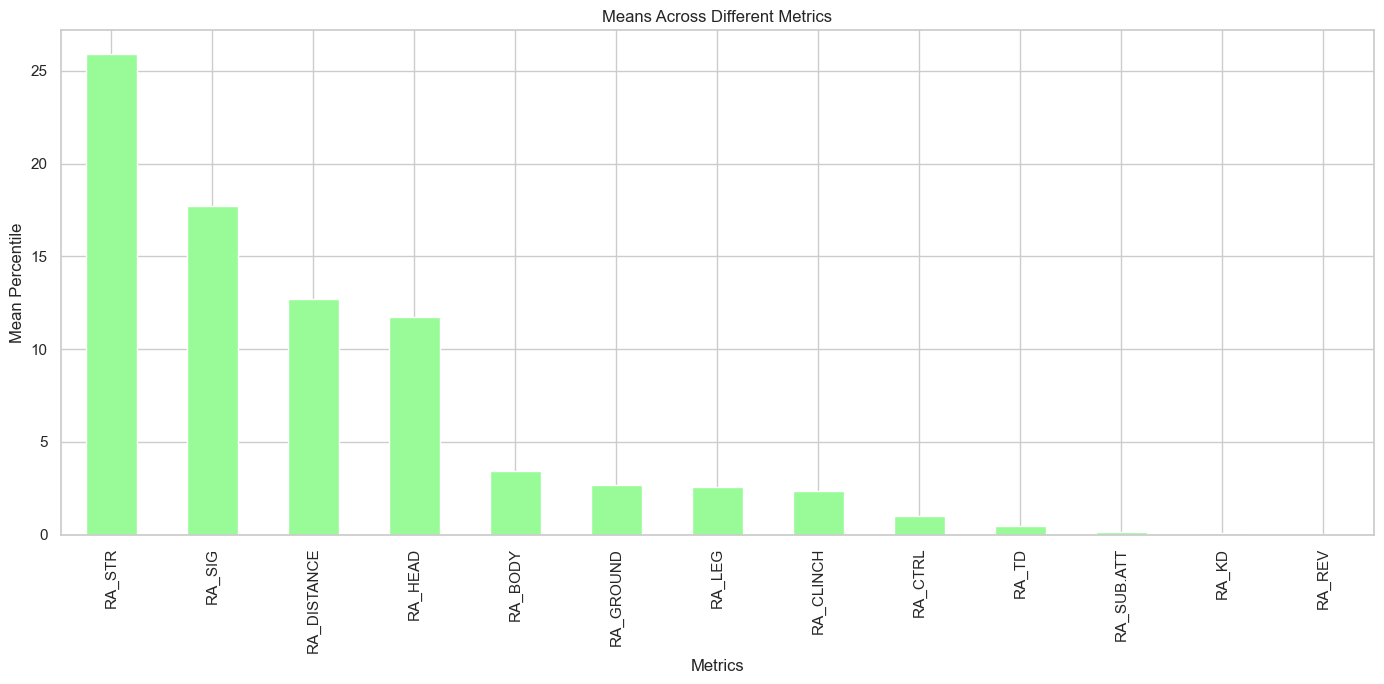

In [212]:
# Calculate the mean for each of the specified columns
means1 = ra_champions[metrics1].mean()

# Rank the means from highest to lowest and plot again
sorted_means1 = means1.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means1.plot(kind='bar', color='palegreen')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

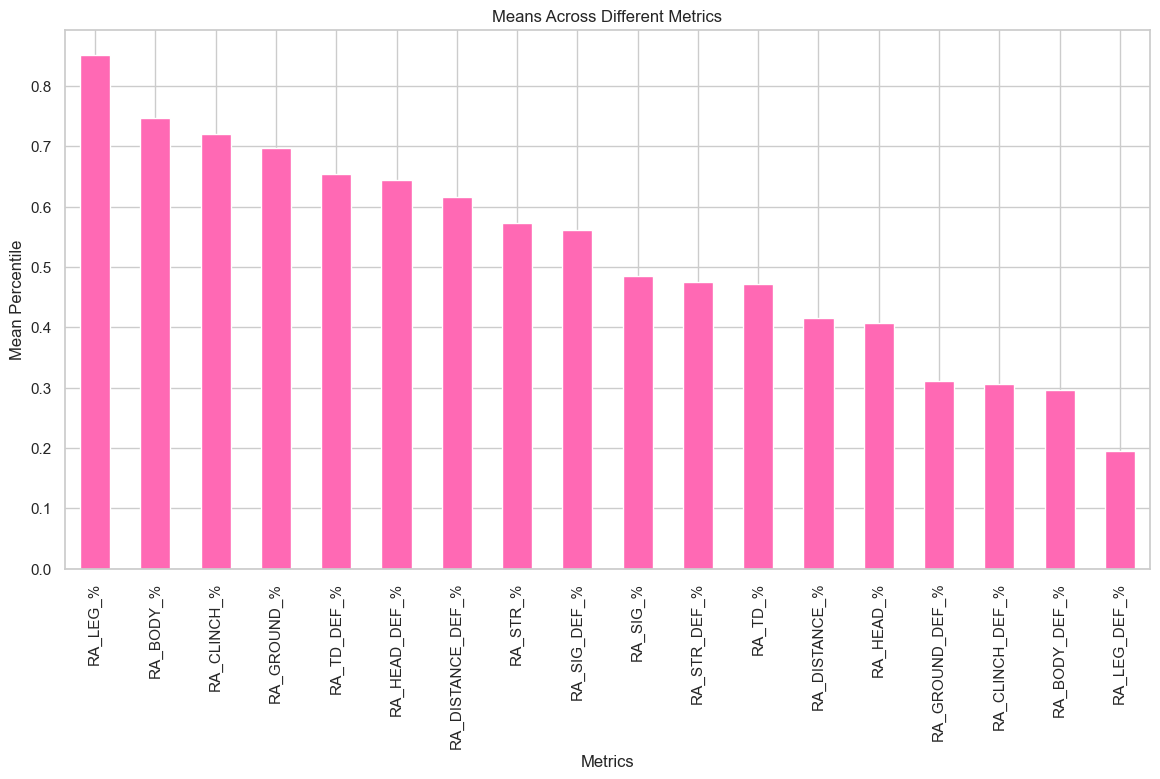

In [213]:
# Calculate the mean for each of the specified columns
meansA = ra_champions[metrics2].mean()

# Rank the means from highest to lowest and plot again
sorted_meansA = meansA.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansA.plot(kind='bar', color='hotpink')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  
plt.show()

### Challengers

In [214]:
ra_challengers = ra[ra['EVER_CHALLENGER'] == 'Yes']

ra_challengers

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5       Dustin Poirier  Southpaw            No          Yes             Yes   
6        Gilbert Burns  Orthodox            No           No             Yes   
17    Rafael Dos Anjos  Southpaw           Yes           No             Yes   
22            Petr Yan    Switch           Yes          Yes             Yes   
26         Marlon Vera    Switch            No           No             Yes   
...                ...       ...           ...          ...             ...   
2245       Pedro Rizzo  Orthodox            No           No             Yes   
2246   Ricco Rodriguez  Orthodox           Yes           No             Yes   
2251         Gan McGee  Orthodox            No           No             Yes   
2278      Pat Miletich  Orthodox           Yes           No             Yes   
2282   Kevin Randleman  Orthodox           Yes           No             Yes   

     EITHER_CHAMP        RA_FIGHTER     RA_KD     RA_TD  RA_SUB.ATT    RA_REV  \
5             Yes    Dustin Poirier  0.104762  0.357143    0.340476  0.032381   
6              No     Gilbert Burns  0.041711  0.530710    0.188464  0.000000   
17            Yes  Rafael Dos Anjos  0.043160  0.619217    0.140167  0.020303   
22            Yes          Petr Yan  0.197902  0.470559    0.056667  0.034848   
26             No       Marlon Vera  0.247391  0.110978    0.182174  0.010000   
...           ...               ...       ...       ...         ...       ...   
2245           No       Pedro Rizzo  0.103333  0.045000    0.000000  0.000000   
2246          Yes   Ricco Rodriguez  0.000000  0.907143    0.192857  0.061905   
2251           No         Gan McGee  0.000000  0.625000    0.000000  0.000000   
2278          Yes      Pat Miletich  0.083333  0.433333    0.233333  0.000000   
2282          Yes   Kevin Randleman  0.000000  0.283333    0.150000  0.000000   

       RA_CTRL    RA_HEAD   RA_BODY    RA_LEG  RA_DISTANCE  RA_CLINCH  \
5     0.937897  19.855238  2.094762  1.622857    18.732857   2.650000   
6     1.051308   8.479374  3.693736  3.561956    12.524293   1.535371   
17    1.268712  10.169100  3.897003  2.866448    11.633615   3.032440   
22    0.879949  18.562191  4.925058  2.606597    17.944266   2.520023   
26    0.374172  12.118986  4.203841  4.964203    17.284457   2.013116   
...        ...        ...       ...       ...          ...        ...   
2245  0.546778   3.351667  0.490000  2.723333     4.548333   0.935000   
2246  2.530516   9.514286  1.047619  0.366667     1.554762   0.859524   
2251  2.116667   5.250000  0.500000  0.750000     3.625000   1.000000   
2278  0.985556   4.483333  0.683333  1.600000     4.766667   0.950000   
2282  1.512778   3.600000  0.333333  0.066667     1.566667   0.783333   

      RA_GROUND     RA_SIG  RA_TOT.SIG     RA_STR  RA_TOTAL.STR  RA_TOTAL.TD  \
5      2.190000  23.572857   43.810476  29.180000     49.939524     0.991429   
6      1.675401  15.735065   30.133766  24.078151     39.108938     1.951566   
17     2.266496  16.932551   34.930426  23.730590     42.639434     1.778249   
22     5.629557  26.093846   46.200629  34.872984     55.728811     1.014918   
26     1.989457  21.287029   43.797717  23.702428     46.697862     0.278152   
...         ...        ...         ...        ...           ...          ...   
2245   1.081667   6.565000   19.076667  10.651667     23.543333     0.163333   
2246   8.514286  10.928571   19.852381  30.600000     40.557143     1.745238   
2251   1.875000   6.500000   17.375000   8.750000     19.750000     1.750000   
2278   1.050000   6.766667   13.150000  17.816667     24.683333     0.433333   
2282   1.650000   4.000000    9.250000  10.850000     16.666667     0.500000   

      RA_TOTAL.HEAD  RA_TOTAL.BODY  RA_TOTAL.LEG  RA_TOTAL.DISTANCE  \
5         39.138095       2.737143      1.935238          36.829524   
6         21.409015       4.409702      4.315050          26.107945   
17        26.360145       5.202845      3.

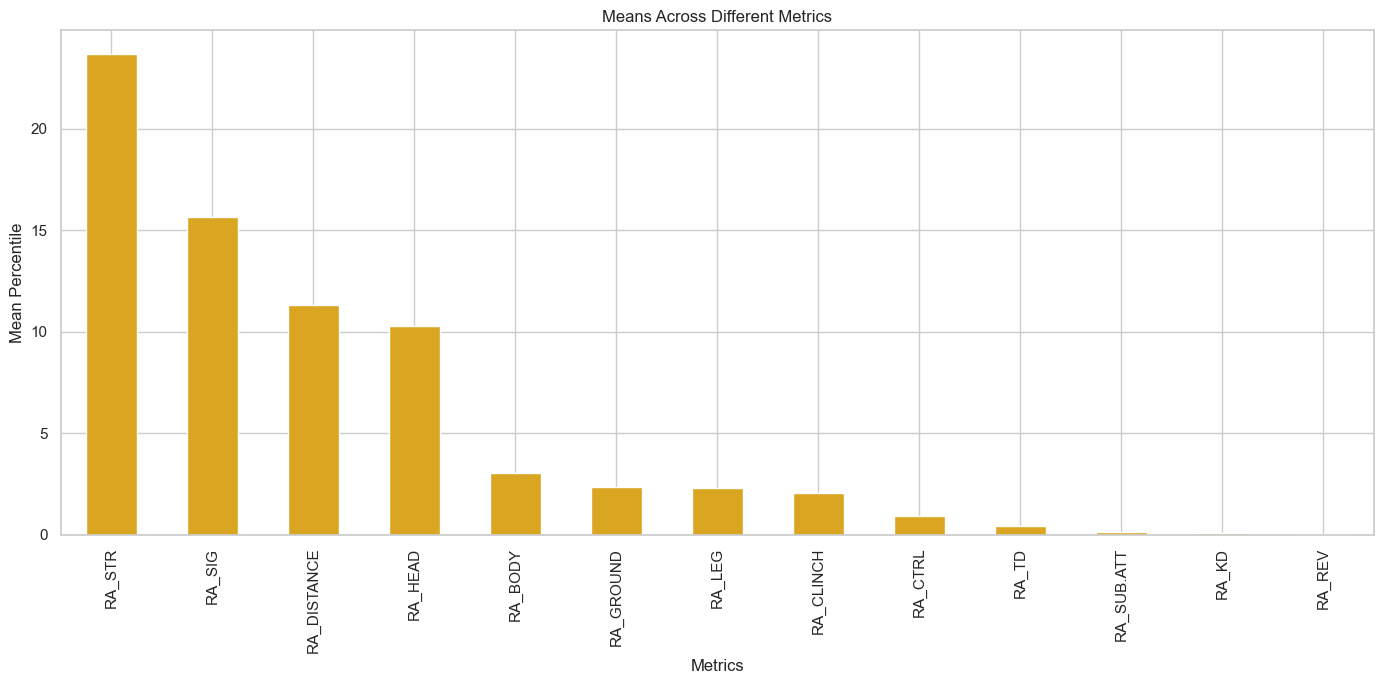

In [215]:
# Calculate the mean for each of the specified columns
means2 = ra_challengers[metrics1].mean()

# Rank the means from highest to lowest and plot again
sorted_means2 = means2.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means2.plot(kind='bar', color='goldenrod')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

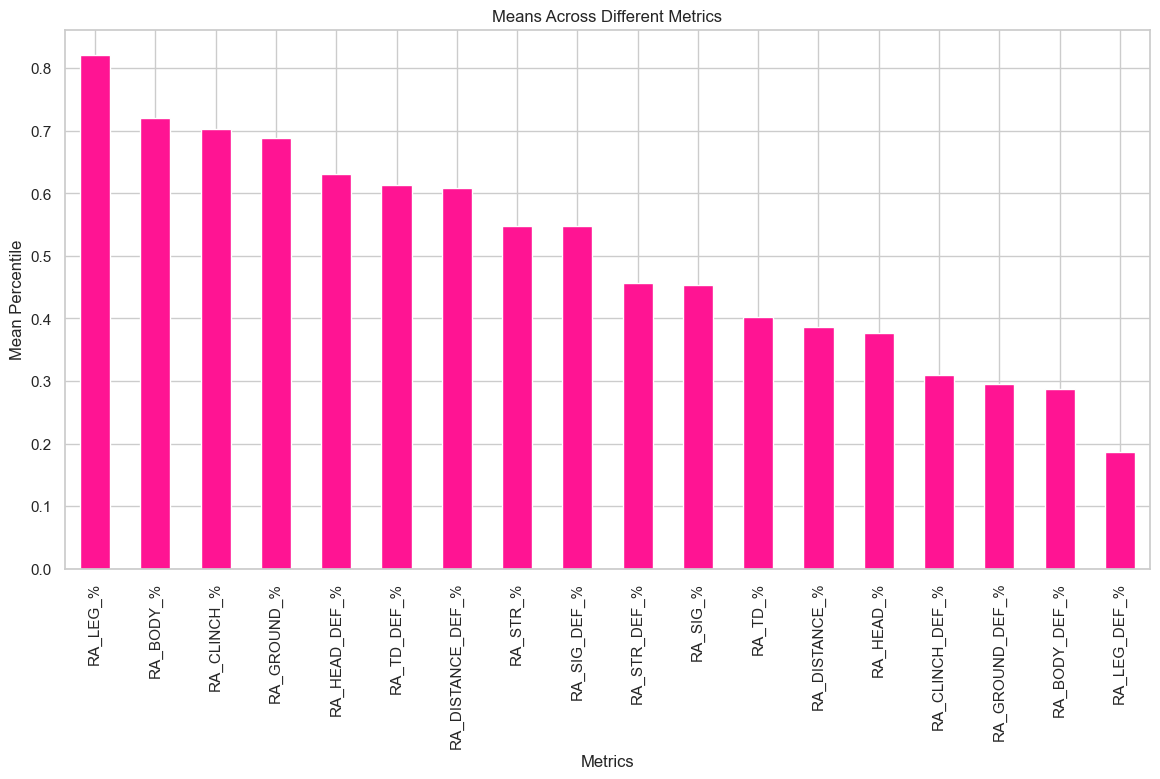

In [216]:
# Calculate the mean for each of the specified columns
meansB = ra_challengers[metrics2].mean()

# Rank the means from highest to lowest and plot again
sorted_meansB = meansB.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansB.plot(kind='bar', color='deeppink')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  
plt.show()

### Non Champions

In [217]:
ra_non_champions = ra[ra['EITHER_CHAMP'] != 'Yes']

ra_non_champions

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
6          Gilbert Burns  Orthodox            No           No             Yes   
...                  ...       ...           ...          ...             ...   
2245         Pedro Rizzo  Orthodox            No           No             Yes   
2251           Gan McGee  Orthodox            No           No             Yes   
2252         Ian Freeman  Orthodox            No           No              No   
2264      Eugene Jackson  Orthodox            No           No              No   
2286         Fabiano Iha  Orthodox            No           No              No   

     EITHER_CHAMP          RA_FIGHTER     RA_KD     RA_TD  RA_SUB.ATT  \
1              No          CJ Vergara  0.000000  0.000000    0.055556   
2              No      Curtis Blaydes  0.024444  1.886667    0.000000   
3              No     Jailton Almeida  0.000000  1.476190    0.304762   
4              No  Benoit Saint Denis  0.209524  0.895238    0.257143   
6              No       Gilbert Burns  0.041711  0.530710    0.188464   
...           ...                 ...       ...       ...         ...   
2245           No         Pedro Rizzo  0.103333  0.045000    0.000000   
2251           No           Gan McGee  0.000000  0.625000    0.000000   
2252           No         Ian Freeman  0.000000  0.244444    0.166667   
2264           No      Eugene Jackson  0.000000  0.250000    0.750000   
2286           No         Fabiano Iha  0.000000  0.600000    0.400000   

        RA_REV   RA_CTRL    RA_HEAD   RA_BODY    RA_LEG  RA_DISTANCE  \
1     0.055556  0.681481  12.750000  9.861111  3.083333    18.250000   
2     0.000000  2.670889   8.462222  1.548889  1.500000     5.433333   
3     0.200000  3.737937   8.580952  0.571429  0.266667     0.647619   
4     0.047619  1.433492  11.952381  6.561905  2.961905    14.514286   
6     0.000000  1.051308   8.479374  3.693736  3.561956    12.524293   
...        ...       ...        ...       ...       ...          ...   
2245  0.000000  0.546778   3.351667  0.490000  2.723333     4.548333   
2251  0.000000  2.116667   5.250000  0.500000  0.750000     3.625000   
2252  0.066667  1.942407   9.344444  0.644444  0.311111     1.122222   
2264  0.000000  0.112500   0.750000  0.125000  0.000000     0.625000   
2286  0.000000  1.698889   3.200000  0.200000  1.733333     1.333333   

      RA_CLINCH  RA_GROUND     RA_SIG  RA_TOT.SIG     RA_STR  RA_TOTAL.STR  \
1      2.500000   4.944444  25.694444   44.611111  37.111111     57.305556   
2      1.900000   4.177778  11.511111   21.655556  22.500000     35.106667   
3      0.600000   8.171429   9.419048   14.228571  27.542857     35.980952   
4      2.761905   4.200000  21.476190   39.304762  29.761905     49.047619   
6      1.535371   1.675401  15.735065   30.133766  24.078151     39.108938   
...         ...        ...        ...         ...        ...           ...   
2245   0.935000   1.081667   6.565000   19.076667  10.651667     23.543333   
2251   1.000000   1.875000   6.500000   17.375000   8.750000     19.750000   
2252   2.844444   6.333333  10.300000   21.322222  22.833333     34.544444   
2264   0.125000   0.125000   0.875000    3.250000   9.875000     12.625000   
2286   1.933333   1.866667   5.133333   12.466667  13.933333     23.266667   

      RA_TOTAL.TD  RA_TOTAL.HEAD  RA_TOTAL.BODY  RA_TOTAL.LEG  \
1        0.000000      28.472222      12.638889      3.500000   
2        3.837778      18.253333       1.726667      1.675556   
3        3.409524      12.971429       0.628571      0.628571   
4        3.780952      28.190476       8.057143      3.057143   
6        1.951566      21.409015       4

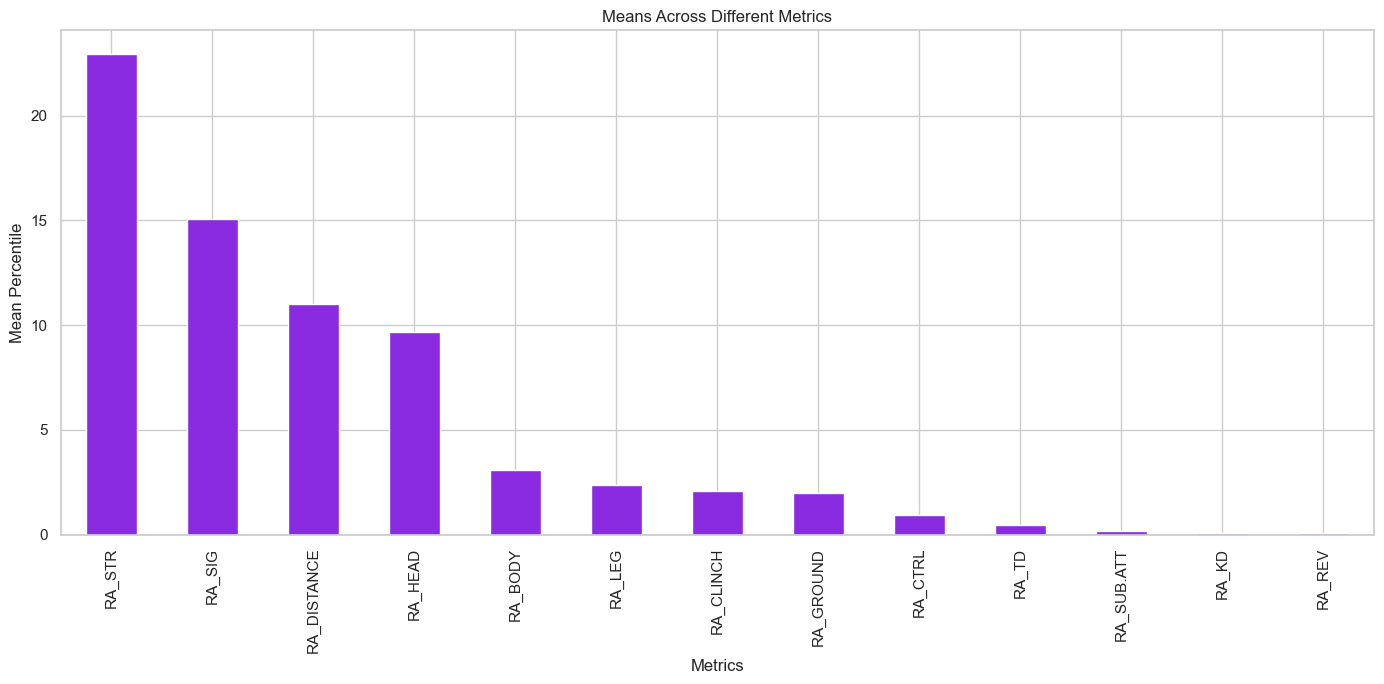

In [218]:
# Calculate the mean for each of the specified columns
means3 = ra_non_champions[metrics1].mean()

# Rank the means from highest to lowest and plot again
sorted_means3 = means3.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means3.plot(kind='bar', color='blueviolet')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

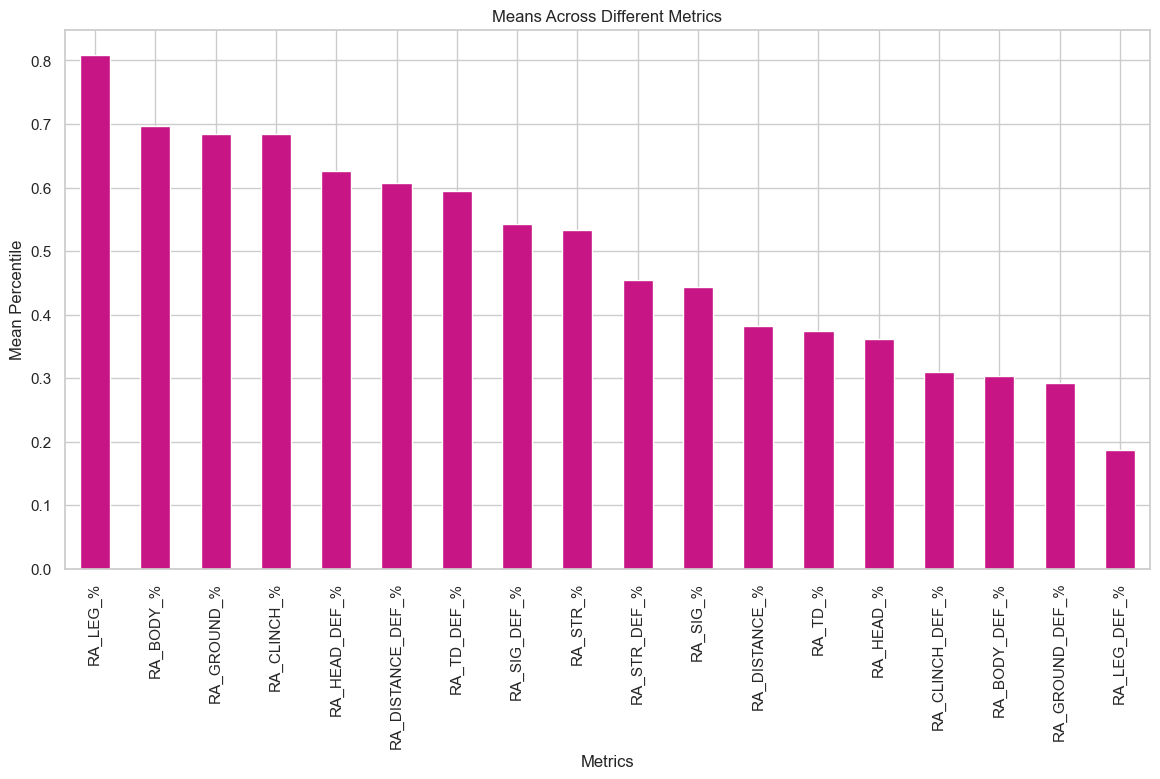

In [219]:
# Calculate the mean for each of the specified columns
meansC = ra_non_champions[metrics2].mean()

# Rank the means from highest to lowest and plot again
sorted_meansC = meansC.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansC.plot(kind='bar', color='mediumvioletred')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  
plt.show()

### Non Challengers

In [220]:
ra_non_challengers = ra[ra['EVER_CHALLENGER'] != 'Yes']

ra_non_challengers

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM  \
1               CJ Vergara  Orthodox            No           No   
2           Curtis Blaydes  Orthodox            No           No   
3          Jailton Almeida  Orthodox            No           No   
4       Benoit Saint Denis  Southpaw            No           No   
7     Jack Della Maddalena    Switch            No           No   
...                    ...       ...           ...          ...   
2198       Trevor Prangley  Orthodox            No           No   
2234       Wesley Correira  Orthodox            No           No   
2252           Ian Freeman  Orthodox            No           No   
2264        Eugene Jackson  Orthodox            No           No   
2286           Fabiano Iha  Orthodox            No           No   

     EVER_CHALLENGER EITHER_CHAMP            RA_FIGHTER     RA_KD     RA_TD  \
1                 No           No            CJ Vergara  0.000000  0.000000   
2                 No           No        Curtis Blaydes  0.024444  1.886667   
3                 No           No       Jailton Almeida  0.000000  1.476190   
4                 No           No    Benoit Saint Denis  0.209524  0.895238   
7                 No           No  Jack Della Maddalena  0.349206  0.111111   
...              ...          ...                   ...       ...       ...   
2198              No           No       Trevor Prangley  0.000000  1.277778   
2234              No           No       Wesley Correira  0.125000  0.000000   
2252              No           No           Ian Freeman  0.000000  0.244444   
2264              No           No        Eugene Jackson  0.000000  0.250000   
2286              No           No           Fabiano Iha  0.000000  0.600000   

      RA_SUB.ATT    RA_REV   RA_CTRL    RA_HEAD   RA_BODY    RA_LEG  \
1       0.055556  0.055556  0.681481  12.750000  9.861111  3.083333   
2       0.000000  0.000000  2.670889   8.462222  1.548889  1.500000   
3       0.304762  0.200000  3.737937   8.580952  0.571429  0.266667   
4       0.257143  0.047619  1.433492  11.952381  6.561905  2.961905   
7       0.047619  0.000000  0.215873  18.476190  7.714286  2.714286   
...          ...       ...       ...        ...       ...       ...   
2198    0.388889  0.000000  2.418056   4.083333  2.555556  3.083333   
2234    0.000000  0.000000  0.045139   7.833333  0.666667  0.416667   
2252    0.166667  0.066667  1.942407   9.344444  0.644444  0.311111   
2264    0.750000  0.000000  0.112500   0.750000  0.125000  0.000000   
2286    0.400000  0.000000  1.698889   3.200000  0.200000  1.733333   

      RA_DISTANCE  RA_CLINCH  RA_GROUND     RA_SIG  RA_TOT.SIG     RA_STR  \
1       18.250000   2.500000   4.944444  25.694444   44.611111  37.111111   
2        5.433333   1.900000   4.177778  11.511111   21.655556  22.500000   
3        0.647619   0.600000   8.171429   9.419048   14.228571  27.542857   
4       14.514286   2.761905   4.200000  21.476190   39.304762  29.761905   
7       23.301587   2.857143   2.746032  28.904762   51.460317  36.714286   
...           ...        ...        ...        ...         ...        ...   
2198     2.000000   4.888889   2.833333   9.722222   16.583333  26.611111   
2234     4.291667   4.500000   0.125000   8.916667   21.791667  17.166667   
2252     1.122222   2.844444   6.333333  10.300000   21.322222  22.833333   
2264     0.625000   0.125000   0.125000   0.875000    3.250000   9.875000   
2286     1.333333   1.933333   1.866667   5.133333   12.466667  13.933333   

      RA_TOTAL.STR  RA_TOTAL.TD  RA_TOTAL.HEAD  RA_TOTAL.BODY  RA_TOTAL.LEG  \
1        57.305556     0.000000      28.472222      12.638889      3.500000   
2        35.106667     3.837778      18.253333       1.726667      1.675556   
3        35.980952     3.409524      12.971429       0.628571      0.628571   
4        49.047619     3.780952      28.190476       8.057143      3.057143   
7        60.507937     0.206349      37.650794      10.634921      3.174603   
...          

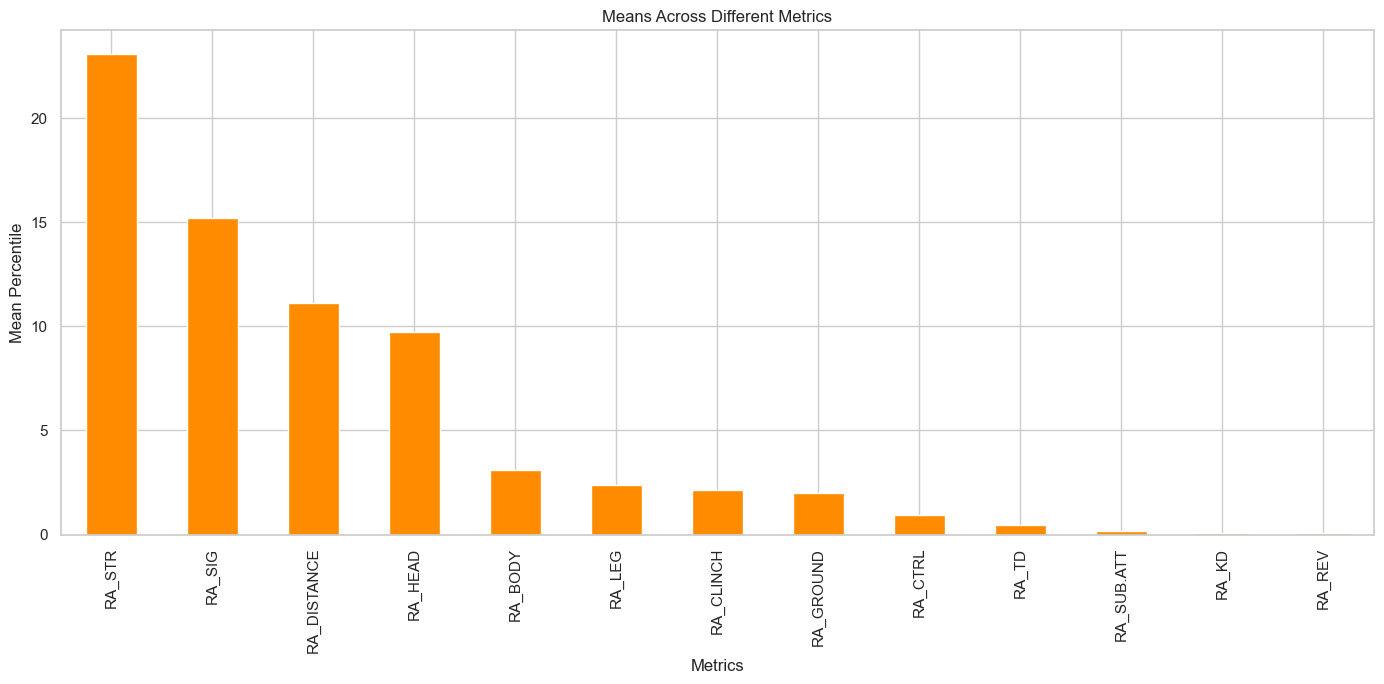

In [221]:
# Calculate the mean for each of the specified columns
means4 = ra_non_challengers[metrics1].mean()

# Rank the means from highest to lowest and plot again
sorted_means4 = means4.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_means4.plot(kind='bar', color='darkorange')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

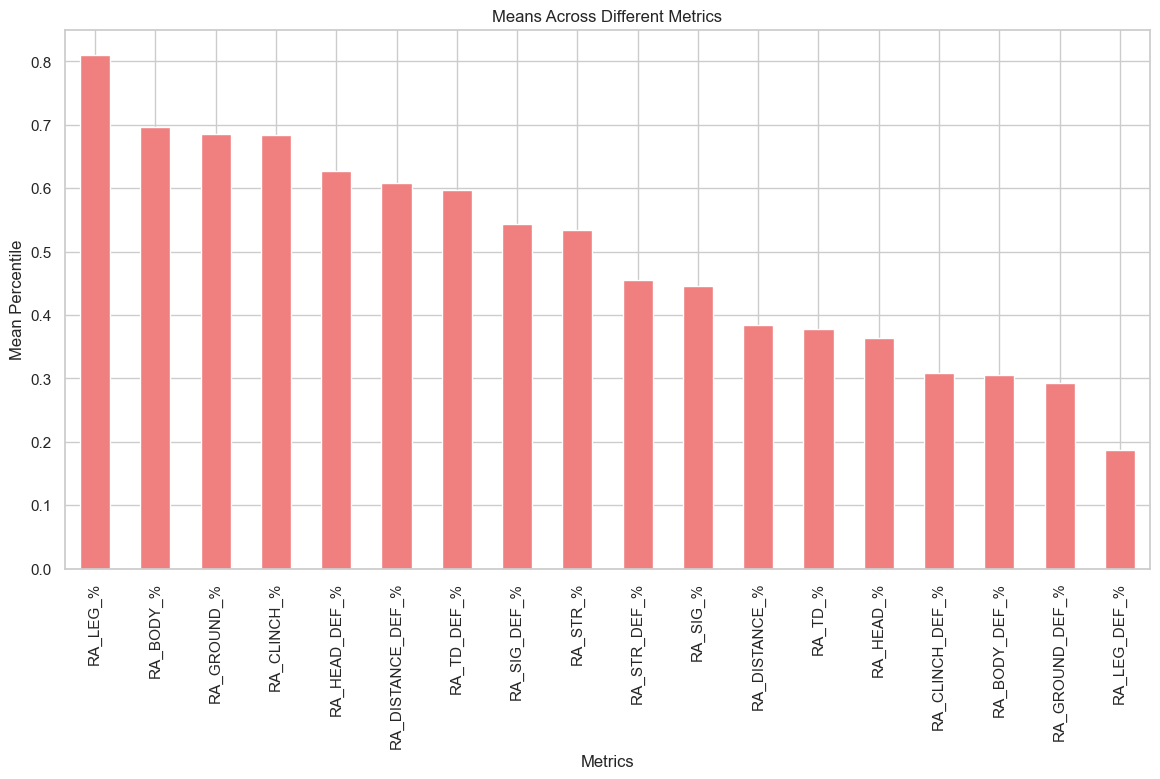

In [222]:
# Calculate the mean for each of the specified columns
meansD = ra_non_challengers[metrics2].mean()

# Rank the means from highest to lowest and plot again
sorted_meansD = meansD.sort_values(ascending=False)


# Create a bar chart
plt.figure(figsize=(14, 7))
sorted_meansD.plot(kind='bar', color='lightcoral')
plt.title('Means Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Percentile')
plt.xticks(rotation=90)  
plt.show()

## records_stats

In [223]:
# # Display max rows
# pd.set_option('display.max_rows', None)

# breakdown(records)
# # Set the display options to show 20 rows at the top and bottom
# pd.set_option('display.max_rows', 20)


# Filter the dataframe using the correct column name "FIGHTER"
r = records[records['FIGHTER'].isin(fighters_list)]

r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 1 to 2286
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FIGHTER                        1321 non-null   object 
 1   STANCE                         1302 non-null   object 
 2   EVER_CHAMPION                  1321 non-null   object 
 3   EVER_INTERIM                   1321 non-null   object 
 4   EVER_CHALLENGER                1321 non-null   object 
 5   EITHER_CHAMP                   1321 non-null   object 
 6   Total_Rounds                   1321 non-null   int64  
 7   Total_Fights                   1321 non-null   int64  
 8   Wins                           1321 non-null   int64  
 9   Losses                         1321 non-null   int64  
 10  Draws                          1321 non-null   int64  
 11  No_Contests                    1321 non-null   int64  
 12  Win_by_KO_TKO                  1321 non-null   i

In [224]:
r.describe()

Total_Rounds  Total_Fights         Wins       Losses        Draws  \
count   1321.000000   1321.000000  1321.000000  1321.000000  1321.000000   
mean      22.987131      9.562453     5.096139     4.295231     0.071915   
std       15.705837      5.941195     4.092750     2.499524     0.272708   
min        4.000000      4.000000     0.000000     0.000000     0.000000   
25%       12.000000      5.000000     2.000000     3.000000     0.000000   
50%       18.000000      8.000000     4.000000     4.000000     0.000000   
75%       30.000000     12.000000     7.000000     5.000000     0.000000   
max      111.000000     43.000000    26.000000    18.000000     2.000000   

       No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
count  1321.000000    1321.000000        1321.000000      1321.000000   
mean      0.099167       1.693414           0.996215         2.393641   
std       0.313834       2.073431           1.530741         2.349614   
min       0.000000       0.000000           0.000000         0.000000   
25%       0.000000       0.000000           0.000000         1.000000   
50%       0.000000       1.000000           0.000000         2.000000   
75%       0.000000       2.000000           1.000000         3.000000   
max       2.000000      14.000000          16.000000        14.000000   

       Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
count     1321.000000         1321.000000       1321.000000   
mean         1.385314            0.794095          2.104466   
std          1.429896            1.086415          1.813582   
min          0.000000            0.000000          0.000000   
25%          0.000000            0.000000          1.000000   
50%          1.000000            0.000000          2.000000   
75%          2.000000            1.000000          3.000000   
max          8.000000            7.000000         12.000000   

       Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
count              1321.000000      1321.000000        1321.000000   
mean                  0.498107         0.245269           0.242241   
std                   1.675638         1.165974           0.677832   
min                   0.000000         0.000000           0.000000   
25%                   0.000000         0.000000           0.000000   
50%                   0.000000         0.000000           0.000000   
75%                   0.000000         0.000000           0.000000   
max                  16.000000        15.000000           6.000000   

       Draws_with_Title  No_Contests_with_Title  Win_by_KO_TKO_with_Title  \
count       1321.000000             1321.000000               1321.000000   
mean           0.009084                0.001514                  0.105980   
std            0.094912                0.038895                  0.544367   
min            0.000000                0.000000                  0.000000   
25%            0.000000                0.000000                  0.000000   
50%            0.000000                0.000000                  0.000000   
75%            0.000000                0.000000                  0.000000   
max            1.000000                1.000000                  7.000000   

       Win_by_Submission_with_Title  Win_by_Decision_with_Title  \
count                   1321.000000                 1321.000000   
mean                       0.043149                    0.095382   
std                        0.312056                    0.562719   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        0.000000                    0.000000   
75%                        0.000000                    0.000000   
max                        5.000000                    8.000000   

       Loss_by_KO_TKO_with_Title  Loss_by_Submission_with_Title  \
count                1321.000000                    1321.000000   
mean                    0.103709 

In [225]:
metrics1 = ['Total_Rounds',	'Total_Fights',	'Wins',	'Losses', 'Draws',	'No_Contests',	'Win_by_KO_TKO',
            'Win_by_Submission', 'Win_by_Decision',	'Loss_by_KO_TKO', 'Loss_by_Submission',	'Loss_by_Decision',
            'Total_Fights_with_Title',	'Wins_with_Title',	'Losses_with_Title', 'Draws_with_Title',	'No_Contests_with_Title',	
            'Win_by_KO_TKO_with_Title',	'Win_by_Submission_with_Title',	
            'Win_by_Decision_with_Title',	'Loss_by_KO_TKO_with_Title', 'Loss_by_Submission_with_Title',	
            'Loss_by_Decision_with_Title', 'Rounds_per_Fight']


metrics2 = ['Win_%', 'Loss_%', 'KO_Win_%',	'Sub_Win_%', 'Dec_Win_%',
'KO_Loss_%', 'Sub_Loss_%', 'Dec_Loss_%', 'Title_Win_%',	'Title_Loss_%',	
'Title_KO_Win_%', 'Title_Sub_Win_%', 'Title_Dec_Win_%',	'Title_KO_Loss_%','Title_Sub_Loss_%',	
'Title_Dec_Loss_%']

In [226]:
# Original metrics list
metrics = ['Total_Rounds',	'Total_Fights',	'Wins',	'Losses', 'Draws',	'No_Contests',	'Win_by_KO_TKO',
            'Win_by_Submission', 'Win_by_Decision',	'Loss_by_KO_TKO', 'Loss_by_Submission',	'Loss_by_Decision',
            'Total_Fights_with_Title',	'Wins_with_Title',	'Losses_with_Title', 'Draws_with_Title',	'No_Contests_with_Title',	
            'Win_by_KO_TKO_with_Title',	'Win_by_Submission_with_Title',	
            'Win_by_Decision_with_Title',	'Loss_by_KO_TKO_with_Title', 'Loss_by_Submission_with_Title',	
            'Loss_by_Decision_with_Title', 'Rounds_per_Fight', 'Win_%', 'Loss_%', 'KO_Win_%',	'Sub_Win_%', 'Dec_Win_%',
'KO_Loss_%', 'Sub_Loss_%', 'Dec_Loss_%', 'Title_Win_%',	'Title_Loss_%',	
'Title_KO_Win_%', 'Title_Sub_Win_%', 'Title_Dec_Win_%',	'Title_KO_Loss_%','Title_Sub_Loss_%',	
'Title_Dec_Loss_%']



# Reinitializing the dictionary to hold the top ten fighters for the updated list of metrics
top_fighters_per_metric = {}

# Creating a dictionary to hold the top ten fighters for each metric
top_fighters_per_metric = {}

# Finding the top ten fighters for each metric
for metric in metrics:
    # Some metrics may have missing values, so we sort only non-NA values
    top_fighters_per_metric[metric] = r.nlargest(10, metric)[['FIGHTER', metric]]

# Printing the top ten fighters for each metric with a blank line in between
for metric, data in top_fighters_per_metric.items():
    print(f"Top ten fighters for {metric}:")
    if isinstance(data, pd.DataFrame):
        print(data.to_string(index=False))
    else:
        print(data)
    print("\n")  # Blank line for separation

Top ten fighters for Total_Rounds:
         FIGHTER  Total_Rounds
Rafael Dos Anjos           111
   Frankie Edgar            99
      Jim Miller            96
 Andrei Arlovski            92
      Clay Guida            92
    Max Holloway            90
     Demian Maia            89
      Neil Magny            87
 Jeremy Stephens            86
   Diego Sanchez            84


Top ten fighters for Total_Fights:
         FIGHTER  Total_Fights
      Jim Miller            43
 Andrei Arlovski            41
  Donald Cerrone            38
      Clay Guida            36
Rafael Dos Anjos            35
 Jeremy Stephens            34
     Demian Maia            33
      Neil Magny            32
Charles Oliveira            32
   Diego Sanchez            32


Top ten fighters for Wins:
         FIGHTER  Wins
      Jim Miller    26
 Andrei Arlovski    23
  Donald Cerrone    23
  Dustin Poirier    22
      Neil Magny    22
Charles Oliveira    22
     Demian Maia    22
Rafael Dos Anjos    21
       Jon

### Top 1 Percent

In [227]:
# Filter the dataframe using the correct column name "FIGHTER"
records_1 = records[records['FIGHTER'].isin(top_1_percent_list)]

records_1

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5        Dustin Poirier  Southpaw            No          Yes             Yes   
181          Jim Miller  Southpaw            No           No              No   
617           Jon Jones  Orthodox           Yes          Yes             Yes   
748      Donald Cerrone  Orthodox            No           No             Yes   
871     Jeremy Stephens  Orthodox            No           No              No   
874      Conor McGregor  Southpaw           Yes          Yes             Yes   
884         Demian Maia  Southpaw            No           No             Yes   
946      Anderson Silva  Southpaw           Yes           No             Yes   
958       Diego Sanchez  Southpaw            No           No             Yes   
1261    Johny Hendricks  Southpaw           Yes           No             Yes   
1262  Georges St-Pierre  Orthodox           Yes          Yes             Yes   
1431          Frank Mir  Southpaw           Yes          Yes             Yes   
1785          Jon Fitch  Orthodox            No           No             Yes   

     EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  Draws  \
5             Yes            71            30    22       7      0   
181            No            96            43    26      16      0   
617           Yes            74            23    21       1      0   
748            No            81            38    23      14      0   
871            No            86            34    15      18      0   
874           Yes            28            14    10       4      0   
884            No            89            33    22      11      0   
946           Yes            63            25    17       7      0   
958            No            84            32    19      13      0   
1261          Yes            56            21    13       8      0   
1262          Yes            71            22    20       2      0   
1431          Yes            43            27    16      11      0   
1785           No            50            18    14       3      1   

      No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
5               1             11                  4                7   
181             1              6                 12                8   
617             1              5                  6               10   
748             1             10                  6                7   
871             1              8                  0                7   
874             0              8                  0                2   
884             0              1                 11               10   
946             1             11                  3                3   
958             0              6                  0               12   
1261            0              5                  0                8   
1262            0              5                  3               12   
1431            0              5                  8                2   
1785            0              1                  3               10   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
5                  3                   3                 1   
181                2                   3                11   
617                0                   0                 0   
748                8                   1                 5   
871                3                   3                12   
874                2                   2                 0   
884                2                   0                 9   
946                4                   0                 3   
958                4                   0                 9   
1261               3                   0                 5   
1262               1                   1                 0   
1431               8                   0                 3   
1785               1                   0                 2   

      Total_Fights_with_Title  Wins_

In [228]:
records_1.describe()

Total_Rounds  Total_Fights       Wins     Losses      Draws  \
count     13.000000     13.000000  13.000000  13.000000  13.000000   
mean      68.615385     27.692308  18.307692   8.846154   0.076923   
std       19.876865      8.270274   4.589565   5.490084   0.277350   
min       28.000000     14.000000  10.000000   1.000000   0.000000   
25%       56.000000     22.000000  15.000000   4.000000   0.000000   
50%       71.000000     27.000000  19.000000   8.000000   0.000000   
75%       84.000000     33.000000  22.000000  13.000000   0.000000   
max       96.000000     43.000000  26.000000  18.000000   1.000000   

       No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
count    13.000000      13.000000          13.000000        13.000000   
mean      0.461538       6.307692           4.307692         7.538462   
std       0.518875       3.250247           4.110649         3.430631   
min       0.000000       1.000000           0.000000         2.000000   
25%       0.000000       5.000000           0.000000         7.000000   
50%       0.000000       6.000000           3.000000         8.000000   
75%       1.000000       8.000000           6.000000        10.000000   
max       1.000000      11.000000          12.000000        12.000000   

       Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
count       13.000000           13.000000         13.000000   
mean         3.153846            1.000000          4.615385   
std          2.444250            1.290994          4.311582   
min          0.000000            0.000000          0.000000   
25%          2.000000            0.000000          1.000000   
50%          3.000000            0.000000          3.000000   
75%          4.000000            2.000000          9.000000   
max          8.000000            3.000000         12.000000   

       Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
count                13.000000        13.000000          13.000000   
mean                  4.923077         3.538462           1.307692   
std                   5.780161         5.531958           0.947331   
min                   0.000000         0.000000           0.000000   
25%                   1.000000         0.000000           1.000000   
50%                   3.000000         1.000000           1.000000   
75%                   5.000000         3.000000           2.000000   
max                  16.000000        15.000000           3.000000   

       Draws_with_Title  No_Contests_with_Title  Win_by_KO_TKO_with_Title  \
count              13.0               13.000000                 13.000000   
mean                0.0                0.076923                  1.307692   
std                 0.0                0.277350                  2.136376   
min                 0.0                0.000000                  0.000000   
25%                 0.0                0.000000                  0.000000   
50%                 0.0                0.000000                  0.000000   
75%                 0.0                0.000000                  3.000000   
max                 0.0                1.000000                  7.000000   

       Win_by_Submission_with_Title  Win_by_Decision_with_Title  \
count                     13.000000                   13.000000   
mean                       0.692308                    1.538462   
std                        1.250641                    2.933013   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        0.000000                    0.000000   
75%                        1.000000                    1.000000   
max                        4.000000                    8.000000   

       Loss_by_KO_TKO_with_Title  Loss_by_Submission_with_Title  \
count                  13.000000                      13.000000   
mean                    0.615385                       0.307692   
std                 

In [229]:
# Calculate the mean for each of the specified columns
means_1 = records_1[metrics].mean()

# Rank the means from highest to lowest and plot again
sorted_means_1 = means_1.sort_values(ascending=False)

# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means_1)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

Total_Rounds                     68.615385
Win_%                            68.082145
Title_Loss_%                     58.822844
Title_Win_%                      40.608974
Loss_%                           29.984389
Dec_Win_%                        28.778303
Total_Fights                     27.692308
Title_KO_Loss_%                  25.641026
KO_Win_%                         24.287578
Title_Dec_Loss_%                 24.242424
Wins                             18.307692
Title_KO_Win_%                   17.054196
Title_Dec_Win_%                  16.853147
Dec_Loss_%                       14.676632
Sub_Win_%                        14.490980
KO_Loss_%                        11.337692
Title_Sub_Loss_%                  8.939394
Losses                            8.846154
Win_by_Decision                   7.538462
Title_Sub_Win_%                   6.701632
Win_by_KO_TKO                     6.307692
Total_Fights_with_Title           4.923077
Loss_by_Decision                  4.615385
Win_by_Subm

### Top 10 Percent

In [230]:
# Filter the dataframe using the correct column name "FIGHTER"
records_10 = records[records['FIGHTER'].isin(top_1_percent_list)]

records_10

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5        Dustin Poirier  Southpaw            No          Yes             Yes   
181          Jim Miller  Southpaw            No           No              No   
617           Jon Jones  Orthodox           Yes          Yes             Yes   
748      Donald Cerrone  Orthodox            No           No             Yes   
871     Jeremy Stephens  Orthodox            No           No              No   
874      Conor McGregor  Southpaw           Yes          Yes             Yes   
884         Demian Maia  Southpaw            No           No             Yes   
946      Anderson Silva  Southpaw           Yes           No             Yes   
958       Diego Sanchez  Southpaw            No           No             Yes   
1261    Johny Hendricks  Southpaw           Yes           No             Yes   
1262  Georges St-Pierre  Orthodox           Yes          Yes             Yes   
1431          Frank Mir  Southpaw           Yes          Yes             Yes   
1785          Jon Fitch  Orthodox            No           No             Yes   

     EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  Draws  \
5             Yes            71            30    22       7      0   
181            No            96            43    26      16      0   
617           Yes            74            23    21       1      0   
748            No            81            38    23      14      0   
871            No            86            34    15      18      0   
874           Yes            28            14    10       4      0   
884            No            89            33    22      11      0   
946           Yes            63            25    17       7      0   
958            No            84            32    19      13      0   
1261          Yes            56            21    13       8      0   
1262          Yes            71            22    20       2      0   
1431          Yes            43            27    16      11      0   
1785           No            50            18    14       3      1   

      No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
5               1             11                  4                7   
181             1              6                 12                8   
617             1              5                  6               10   
748             1             10                  6                7   
871             1              8                  0                7   
874             0              8                  0                2   
884             0              1                 11               10   
946             1             11                  3                3   
958             0              6                  0               12   
1261            0              5                  0                8   
1262            0              5                  3               12   
1431            0              5                  8                2   
1785            0              1                  3               10   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
5                  3                   3                 1   
181                2                   3                11   
617                0                   0                 0   
748                8                   1                 5   
871                3                   3                12   
874                2                   2                 0   
884                2                   0                 9   
946                4                   0                 3   
958                4                   0                 9   
1261               3                   0                 5   
1262               1                   1                 0   
1431               8                   0                 3   
1785               1                   0                 2   

      Total_Fights_with_Title  Wins_

In [231]:
records_10.describe()

Total_Rounds  Total_Fights       Wins     Losses      Draws  \
count     13.000000     13.000000  13.000000  13.000000  13.000000   
mean      68.615385     27.692308  18.307692   8.846154   0.076923   
std       19.876865      8.270274   4.589565   5.490084   0.277350   
min       28.000000     14.000000  10.000000   1.000000   0.000000   
25%       56.000000     22.000000  15.000000   4.000000   0.000000   
50%       71.000000     27.000000  19.000000   8.000000   0.000000   
75%       84.000000     33.000000  22.000000  13.000000   0.000000   
max       96.000000     43.000000  26.000000  18.000000   1.000000   

       No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
count    13.000000      13.000000          13.000000        13.000000   
mean      0.461538       6.307692           4.307692         7.538462   
std       0.518875       3.250247           4.110649         3.430631   
min       0.000000       1.000000           0.000000         2.000000   
25%       0.000000       5.000000           0.000000         7.000000   
50%       0.000000       6.000000           3.000000         8.000000   
75%       1.000000       8.000000           6.000000        10.000000   
max       1.000000      11.000000          12.000000        12.000000   

       Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
count       13.000000           13.000000         13.000000   
mean         3.153846            1.000000          4.615385   
std          2.444250            1.290994          4.311582   
min          0.000000            0.000000          0.000000   
25%          2.000000            0.000000          1.000000   
50%          3.000000            0.000000          3.000000   
75%          4.000000            2.000000          9.000000   
max          8.000000            3.000000         12.000000   

       Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
count                13.000000        13.000000          13.000000   
mean                  4.923077         3.538462           1.307692   
std                   5.780161         5.531958           0.947331   
min                   0.000000         0.000000           0.000000   
25%                   1.000000         0.000000           1.000000   
50%                   3.000000         1.000000           1.000000   
75%                   5.000000         3.000000           2.000000   
max                  16.000000        15.000000           3.000000   

       Draws_with_Title  No_Contests_with_Title  Win_by_KO_TKO_with_Title  \
count              13.0               13.000000                 13.000000   
mean                0.0                0.076923                  1.307692   
std                 0.0                0.277350                  2.136376   
min                 0.0                0.000000                  0.000000   
25%                 0.0                0.000000                  0.000000   
50%                 0.0                0.000000                  0.000000   
75%                 0.0                0.000000                  3.000000   
max                 0.0                1.000000                  7.000000   

       Win_by_Submission_with_Title  Win_by_Decision_with_Title  \
count                     13.000000                   13.000000   
mean                       0.692308                    1.538462   
std                        1.250641                    2.933013   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        0.000000                    0.000000   
75%                        1.000000                    1.000000   
max                        4.000000                    8.000000   

       Loss_by_KO_TKO_with_Title  Loss_by_Submission_with_Title  \
count                  13.000000                      13.000000   
mean                    0.615385                       0.307692   
std                 

In [232]:
# Calculate the mean for each of the specified columns
means_10 = records_10[metrics].mean()

# Rank the means from highest to lowest and plot again
sorted_means_10 = means_10.sort_values(ascending=False)

# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means_10)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

Total_Rounds                     68.615385
Win_%                            68.082145
Title_Loss_%                     58.822844
Title_Win_%                      40.608974
Loss_%                           29.984389
Dec_Win_%                        28.778303
Total_Fights                     27.692308
Title_KO_Loss_%                  25.641026
KO_Win_%                         24.287578
Title_Dec_Loss_%                 24.242424
Wins                             18.307692
Title_KO_Win_%                   17.054196
Title_Dec_Win_%                  16.853147
Dec_Loss_%                       14.676632
Sub_Win_%                        14.490980
KO_Loss_%                        11.337692
Title_Sub_Loss_%                  8.939394
Losses                            8.846154
Win_by_Decision                   7.538462
Title_Sub_Win_%                   6.701632
Win_by_KO_TKO                     6.307692
Total_Fights_with_Title           4.923077
Loss_by_Decision                  4.615385
Win_by_Subm

### Bottom 90 Percent

In [233]:
# Bottom 90 Percent
records_bottom_90 = records[~records['FIGHTER'].isin(top_1_percent_list)]

records_bottom_90 

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
0          Asu Almabayev      None            No           No              No   
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
...                  ...       ...           ...          ...             ...   
2312          Joao Roque  Orthodox            No           No              No   
2313      Marcelo Aguiar  Orthodox            No           No              No   
2314      Adrian Serrano      None            No           No              No   
2315          David Dodd  Orthodox            No           No              No   
2316      Tyrone Roberts  Orthodox            No           No              No   

     EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  Draws  \
0              No             3             1     1       0      0   
1              No            16             6     3       3      0   
2              No            41            18    13       4      0   
3              No            13             7     6       1      0   
4              No            13             7     5       2      0   
...           ...           ...           ...   ...     ...    ...   
2312           No             3             1     0       1      0   
2313           No             1             1     0       1      0   
2314           No             2             1     0       1      0   
2315           No             3             1     0       1      0   
2316           No             3             1     1       0      0   

      No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
0               0              0                  0                1   
1               0              1                  0                2   
2               1              8                  0                5   
3               0              2                  3                1   
4               0              3                  2                0   
...           ...            ...                ...              ...   
2312            0              0                  0                0   
2313            0              0                  0                0   
2314            0              0                  0                0   
2315            0              0                  0                0   
2316            0              0                  0                1   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
0                  0                   0                 0   
1                  0                   1                 2   
2                  4                   0                 0   
3                  1                   0                 0   
4                  1                   0                 1   
...              ...                 ...               ...   
2312               0                   0                 1   
2313               1                   0                 0   
2314               0                   0                 1   
2315               0                   0                 1   
2316               0                   0                 0   

      Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
0                         0.0              0.0                0.0   
1                         0.0              0.0                0.0   
2                         0.0              0.0                0.0   
3                         0.0              0.0                0.0   
4                         0.0              0.0                0.0   
...                       ...              ...                ...   
2312                      0.0              0.0                0.0   
2313                      0.0            

In [234]:
records_bottom_90.describe()

Total_Rounds  Total_Fights         Wins       Losses        Draws  \
count   2304.000000   2304.000000  2304.000000  2304.000000  2304.000000   
mean      14.623264      6.171875     3.003472     3.057726     0.046441   
std       14.554776      5.640170     3.706912     2.331357     0.220557   
min        1.000000      1.000000     0.000000     0.000000     0.000000   
25%        4.000000      2.000000     0.000000     2.000000     0.000000   
50%        9.000000      4.000000     2.000000     2.000000     0.000000   
75%       20.000000      8.000000     4.000000     4.000000     0.000000   
max      111.000000     41.000000    23.000000    18.000000     2.000000   

       No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
count  2304.000000    2304.000000        2304.000000      2304.000000   
mean      0.064236       0.994358           0.583767         1.417101   
std       0.255630       1.705006           1.192288         2.041490   
min       0.000000       0.000000           0.000000         0.000000   
25%       0.000000       0.000000           0.000000         0.000000   
50%       0.000000       0.000000           0.000000         1.000000   
75%       0.000000       1.000000           1.000000         2.000000   
max       2.000000      14.000000          16.000000        14.000000   

       Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
count     2304.000000         2304.000000       2304.000000   
mean         1.013889            0.601997          1.433160   
std          1.223513            0.923949          1.584459   
min          0.000000            0.000000          0.000000   
25%          0.000000            0.000000          0.000000   
50%          1.000000            0.000000          1.000000   
75%          1.250000            1.000000          2.000000   
max          8.000000            7.000000         11.000000   

       Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
count              2304.000000      2304.000000        2304.000000   
mean                  0.262153         0.121962           0.134549   
std                   1.173906         0.755564           0.518142   
min                   0.000000         0.000000           0.000000   
25%                   0.000000         0.000000           0.000000   
50%                   0.000000         0.000000           0.000000   
75%                   0.000000         0.000000           0.000000   
max                  14.000000        12.000000           6.000000   

       Draws_with_Title  No_Contests_with_Title  Win_by_KO_TKO_with_Title  \
count       2304.000000             2304.000000               2304.000000   
mean           0.005208                0.000434                  0.053819   
std            0.071996                0.020833                  0.374691   
min            0.000000                0.000000                  0.000000   
25%            0.000000                0.000000                  0.000000   
50%            0.000000                0.000000                  0.000000   
75%            0.000000                0.000000                  0.000000   
max            1.000000                1.000000                  5.000000   

       Win_by_Submission_with_Title  Win_by_Decision_with_Title  \
count                   2304.000000                 2304.000000   
mean                       0.021267                    0.046441   
std                        0.214496                    0.356096   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        0.000000                    0.000000   
75%                        0.000000                    0.000000   
max                        5.000000                    6.000000   

       Loss_by_KO_TKO_with_Title  Loss_by_Submission_with_Title  \
count                2304.000000                    2304.000000   
mean                    0.057726 

In [235]:
# Calculate the mean for each of the specified columns
means_90 = records_bottom_90[metrics].mean()

# Rank the means from highest to lowest and plot again
sorted_means_90 = means_90.sort_values(ascending=False)

# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means_90)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

Title_Loss_%                     69.809507
Loss_%                           61.847029
Win_%                            36.323768
Title_KO_Loss_%                  29.201299
Title_Win_%                      28.217670
Title_Dec_Loss_%                 27.258795
Dec_Loss_%                       26.656872
KO_Loss_%                        21.405818
Dec_Win_%                        17.380853
Total_Rounds                     14.623264
Sub_Loss_%                       13.572657
Title_Sub_Loss_%                 13.230365
Title_KO_Win_%                   11.886020
KO_Win_%                         11.652643
Title_Dec_Win_%                  10.967653
Sub_Win_%                         7.121023
Total_Fights                      6.171875
Title_Sub_Win_%                   5.268759
Losses                            3.057726
Wins                              3.003472
Rounds_per_Fight                  2.269684
Loss_by_Decision                  1.433160
Win_by_Decision                   1.417101
Loss_by_KO_

### Champions

In [236]:
# Champions
r_champions = r[r['EITHER_CHAMP'] == 'Yes']

r_champions

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5       Dustin Poirier  Southpaw            No          Yes             Yes   
17    Rafael Dos Anjos  Southpaw           Yes           No             Yes   
22            Petr Yan    Switch           Yes          Yes             Yes   
27       Sean O'Malley    Switch           Yes           No             Yes   
50      Brandon Moreno  Orthodox           Yes          Yes             Yes   
...                ...       ...           ...          ...             ...   
2165        Dave Menne  Orthodox           Yes           No             Yes   
2241     Carlos Newton  Orthodox           Yes           No             Yes   
2246   Ricco Rodriguez  Orthodox           Yes           No             Yes   
2278      Pat Miletich  Orthodox           Yes           No             Yes   
2282   Kevin Randleman  Orthodox           Yes           No             Yes   

     EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  Draws  \
5             Yes            71            30    22       7      0   
17            Yes           111            35    21      14      0   
22            Yes            45            13     9       4      0   
27            Yes            28            12    10       1      0   
50            Yes            53            16     9       5      2   
...           ...           ...           ...   ...     ...    ...   
2165          Yes            12             5     1       4      0   
2241          Yes            13             5     2       3      0   
2246          Yes            19             7     5       2      0   
2278          Yes            10             5     3       2      0   
2282          Yes            12             4     2       2      0   

      No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
5               1             11                  4                7   
17              0              4                  5               12   
22              0              4                  0                5   
27              1              6                  0                4   
50              0              3                  3                3   
...           ...            ...                ...              ...   
2165            0              0                  0                1   
2241            0              0                  2                0   
2246            0              5                  0                0   
2278            0              1                  2                0   
2282            0              0                  0                2   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
5                  3                   3                 1   
17                 3                   1                10   
22                 0                   0                 3   
27                 1                   0                 0   
50                 0                   0                 5   
...              ...                 ...               ...   
2165               3                   0                 1   
2241               2                   0                 1   
2246               1                   0                 1   
2278               1                   1                 0   
2282               2                   0                 0   

      Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
5                         3.0              1.0                2.0   
17                        4.0              2.0                2.0   
22                        4.0              2.0                2.0   
27                        2.0              2.0                0.0   
50                        6.0              3.0                2.0   
...                       ...              ...                ...   
2165                      2.0              1.0                1.0   
2241                      3.0              1.0                2

In [237]:
r_champions.describe()

Total_Rounds  Total_Fights        Wins      Losses       Draws  \
count    103.000000    103.000000  103.000000  103.000000  103.000000   
mean      44.213592     16.281553   11.048544    4.970874    0.135922   
std       20.954503      7.100701    4.765848    3.270355    0.397259   
min        9.000000      4.000000    1.000000    0.000000    0.000000   
25%       28.000000     12.000000    8.000000    2.000000    0.000000   
50%       44.000000     15.000000   11.000000    4.000000    0.000000   
75%       58.000000     20.000000   14.000000    7.000000    0.000000   
max      111.000000     41.000000   23.000000   17.000000    2.000000   

       No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
count   103.000000     103.000000         103.000000       103.000000   
mean      0.126214       4.388350           1.893204         4.747573   
std       0.333714       2.719692           2.300523         3.139622   
min       0.000000       0.000000           0.000000         0.000000   
25%       0.000000       2.000000           0.000000         2.000000   
50%       0.000000       4.000000           1.000000         4.000000   
75%       0.000000       6.000000           3.000000         7.000000   
max       1.000000      11.000000          16.000000        12.000000   

       Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
count      103.000000          103.000000        103.000000   
mean         2.126214            0.699029          2.126214   
std          1.877000            0.998381          2.003329   
min          0.000000            0.000000          0.000000   
25%          1.000000            0.000000          1.000000   
50%          2.000000            0.000000          2.000000   
75%          3.000000            1.000000          3.000000   
max          8.000000            4.000000         10.000000   

       Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
count               103.000000       103.000000         103.000000   
mean                  5.009709         3.145631           1.766990   
std                   3.462673         2.894917           1.198069   
min                   1.000000         1.000000           0.000000   
25%                   3.000000         1.000000           1.000000   
50%                   4.000000         2.000000           2.000000   
75%                   6.000000         4.000000           2.000000   
max                  16.000000        15.000000           6.000000   

       Draws_with_Title  No_Contests_with_Title  Win_by_KO_TKO_with_Title  \
count         103.00000              103.000000                103.000000   
mean            0.07767                0.019417                  1.359223   
std             0.26896                0.138662                  1.454232   
min             0.00000                0.000000                  0.000000   
25%             0.00000                0.000000                  0.000000   
50%             0.00000                0.000000                  1.000000   
75%             0.00000                0.000000                  2.000000   
max             1.00000                1.000000                  7.000000   

       Win_by_Submission_with_Title  Win_by_Decision_with_Title  \
count                    103.000000                  103.000000   
mean                       0.553398                    1.223301   
std                        0.987452                    1.644552   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        0.000000                    1.000000   
75%                        1.000000                    1.500000   
max                        5.000000                    8.000000   

       Loss_by_KO_TKO_with_Title  Loss_by_Submission_with_Title  \
count                 103.000000                     103.000000   
mean                    0.844660                       0.291

In [238]:
# Calculate the mean for each of the specified columns
means1 = r_champions[metrics].mean()

# Rank the means from highest to lowest and plot again
sorted_means1 = means1.sort_values(ascending=False)

In [239]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means1)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

Win_%                            68.529475
Title_Win_%                      59.926305
Total_Rounds                     44.213592
Title_Loss_%                     38.417939
Loss_%                           29.899001
Dec_Win_%                        28.718281
KO_Win_%                         28.092761
Title_KO_Win_%                   25.569518
Title_Dec_Win_%                  23.190211
Title_KO_Loss_%                  18.990201
Total_Fights                     16.281553
KO_Loss_%                        13.559472
Title_Dec_Loss_%                 12.453208
Dec_Loss_%                       11.983180
Sub_Win_%                        11.631376
Wins                             11.048544
Title_Sub_Win_%                  10.972401
Title_Sub_Loss_%                  6.731812
Total_Fights_with_Title           5.009709
Losses                            4.970874
Win_by_Decision                   4.747573
Win_by_KO_TKO                     4.388350
Sub_Loss_%                        4.239454
Wins_with_T

### Challengers

In [240]:
# Challengers
r_challengers = r[r['EVER_CHALLENGER'] == 'Yes']

r_challengers

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
5       Dustin Poirier  Southpaw            No          Yes             Yes   
6        Gilbert Burns  Orthodox            No           No             Yes   
17    Rafael Dos Anjos  Southpaw           Yes           No             Yes   
22            Petr Yan    Switch           Yes          Yes             Yes   
26         Marlon Vera    Switch            No           No             Yes   
...                ...       ...           ...          ...             ...   
2245       Pedro Rizzo  Orthodox            No           No             Yes   
2246   Ricco Rodriguez  Orthodox           Yes           No             Yes   
2251         Gan McGee  Orthodox            No           No             Yes   
2278      Pat Miletich  Orthodox           Yes           No             Yes   
2282   Kevin Randleman  Orthodox           Yes           No             Yes   

     EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  Draws  \
5             Yes            71            30    22       7      0   
6              No            57            22    15       7      0   
17            Yes           111            35    21      14      0   
22            Yes            45            13     9       4      0   
26             No            66            23    15       8      0   
...           ...           ...           ...   ...     ...    ...   
2245           No            28            10     5       5      0   
2246          Yes            19             7     5       2      0   
2251           No             5             4     2       2      0   
2278          Yes            10             5     3       2      0   
2282          Yes            12             4     2       2      0   

      No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
5               1             11                  4                7   
6               0              3                  5                7   
17              0              4                  5               12   
22              0              4                  0                5   
26              0              7                  4                4   
...           ...            ...                ...              ...   
2245            0              4                  0                1   
2246            0              5                  0                0   
2251            0              2                  0                0   
2278            0              1                  2                0   
2282            0              0                  0                2   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
5                  3                   3                 1   
6                  3                   0                 4   
17                 3                   1                10   
22                 0                   0                 3   
26                 0                   0                 8   
...              ...                 ...               ...   
2245               2                   0                 3   
2246               1                   0                 1   
2251               2                   0                 0   
2278               1                   1                 0   
2282               2                   0                 0   

      Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
5                         3.0              1.0                2.0   
6                         1.0              0.0                1.0   
17                        4.0              2.0                2.0   
22                        4.0              2.0                2.0   
26                        1.0              0.0                1.0   
...                       ...              ...                ...   
2245                      3.0              0.0                3.0   
2246                      2.0              1.0                1

In [241]:
r_challengers.describe()

Total_Rounds  Total_Fights        Wins      Losses       Draws  \
count    213.000000    213.000000  213.000000  213.000000  213.000000   
mean      39.657277     15.150235    9.469484    5.460094    0.122066   
std       19.794460      6.967984    4.881159    3.050604    0.368745   
min        4.000000      4.000000    0.000000    0.000000    0.000000   
25%       23.000000     10.000000    6.000000    3.000000    0.000000   
50%       38.000000     14.000000    9.000000    5.000000    0.000000   
75%       53.000000     20.000000   13.000000    7.000000    0.000000   
max      111.000000     41.000000   23.000000   17.000000    2.000000   

       No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
count   213.000000     213.000000         213.000000       213.000000   
mean      0.098592       3.638498           1.676056         4.131455   
std       0.298815       2.836059           2.174735         2.955902   
min       0.000000       0.000000           0.000000         0.000000   
25%       0.000000       1.000000           0.000000         2.000000   
50%       0.000000       3.000000           1.000000         4.000000   
75%       0.000000       5.000000           2.000000         6.000000   
max       1.000000      14.000000          16.000000        12.000000   

       Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
count      213.000000          213.000000        213.000000   
mean         2.037559            0.812207          2.600939   
std          1.845059            1.108476          2.247724   
min          0.000000            0.000000          0.000000   
25%          1.000000            0.000000          1.000000   
50%          2.000000            0.000000          2.000000   
75%          3.000000            1.000000          4.000000   
max          8.000000            5.000000         10.000000   

       Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
count               213.000000       213.000000         213.000000   
mean                  3.089202         1.521127           1.502347   
std                   3.072478         2.552427           0.979143   
min                   1.000000         0.000000           0.000000   
25%                   1.000000         0.000000           1.000000   
50%                   2.000000         0.000000           1.000000   
75%                   4.000000         2.000000           2.000000   
max                  16.000000        15.000000           6.000000   

       Draws_with_Title  No_Contests_with_Title  Win_by_KO_TKO_with_Title  \
count        213.000000              213.000000                213.000000   
mean           0.056338                0.009390                  0.657277   
std            0.231116                0.096672                  1.216981   
min            0.000000                0.000000                  0.000000   
25%            0.000000                0.000000                  0.000000   
50%            0.000000                0.000000                  0.000000   
75%            0.000000                0.000000                  1.000000   
max            1.000000                1.000000                  7.000000   

       Win_by_Submission_with_Title  Win_by_Decision_with_Title  \
count                    213.000000                  213.000000   
mean                       0.267606                    0.591549   
std                        0.738901                    1.294883   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        0.000000                    0.000000   
75%                        0.000000                    1.000000   
max                        5.000000                    8.000000   

       Loss_by_KO_TKO_with_Title  Loss_by_Submission_with_Title  \
count                 213.000000                     213.000000   
mean                    0.643192                       0.262

In [242]:
# Calculate the mean for each of the specified columns
means2 = r_challengers[metrics].mean()

# Rank the means from highest to lowest and plot again
sorted_means2 = means2.sort_values(ascending=False)

In [243]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means2)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

Title_Loss_%                     69.047172
Win_%                            61.308590
Total_Rounds                     39.657277
Loss_%                           37.258460
Title_Win_%                      28.978448
Title_KO_Loss_%                  28.471005
Title_Dec_Loss_%                 27.892083
Dec_Win_%                        26.484512
KO_Win_%                         24.026060
Dec_Loss_%                       17.045424
Total_Fights                     15.150235
KO_Loss_%                        14.517436
Title_Sub_Loss_%                 12.566713
Title_KO_Win_%                   12.364603
Title_Dec_Win_%                  11.214045
Sub_Win_%                        10.679770
Wins                              9.469484
Sub_Loss_%                        5.639074
Losses                            5.460094
Title_Sub_Win_%                   5.305903
Win_by_Decision                   4.131455
Win_by_KO_TKO                     3.638498
Total_Fights_with_Title           3.089202
Loss_by_Dec

### Non Champions

In [244]:
# Champions
r_non_champions = r[r['EITHER_CHAMP'] != 'Yes']

r_non_champions

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM EVER_CHALLENGER  \
1             CJ Vergara  Orthodox            No           No              No   
2         Curtis Blaydes  Orthodox            No           No              No   
3        Jailton Almeida  Orthodox            No           No              No   
4     Benoit Saint Denis  Southpaw            No           No              No   
6          Gilbert Burns  Orthodox            No           No             Yes   
...                  ...       ...           ...          ...             ...   
2245         Pedro Rizzo  Orthodox            No           No             Yes   
2251           Gan McGee  Orthodox            No           No             Yes   
2252         Ian Freeman  Orthodox            No           No              No   
2264      Eugene Jackson  Orthodox            No           No              No   
2286         Fabiano Iha  Orthodox            No           No              No   

     EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  Draws  \
1              No            16             6     3       3      0   
2              No            41            18    13       4      0   
3              No            13             7     6       1      0   
4              No            13             7     5       2      0   
6              No            57            22    15       7      0   
...           ...           ...           ...   ...     ...    ...   
2245           No            28            10     5       5      0   
2251           No             5             4     2       2      0   
2252           No            10             5     3       1      1   
2264           No             5             4     1       3      0   
2286           No             7             5     3       2      0   

      No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
1               0              1                  0                2   
2               1              8                  0                5   
3               0              2                  3                1   
4               0              3                  2                0   
6               0              3                  5                7   
...           ...            ...                ...              ...   
2245            0              4                  0                1   
2251            0              2                  0                0   
2252            0              2                  0                1   
2264            0              0                  1                0   
2286            0              1                  2                0   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
1                  0                   1                 2   
2                  4                   0                 0   
3                  1                   0                 0   
4                  1                   0                 1   
6                  3                   0                 4   
...              ...                 ...               ...   
2245               2                   0                 3   
2251               2                   0                 0   
2252               1                   0                 0   
2264               1                   2                 0   
2286               1                   0                 1   

      Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
1                         0.0              0.0                0.0   
2                         0.0              0.0                0.0   
3                         0.0              0.0                0.0   
4                         0.0              0.0                0.0   
6                         1.0              0.0                1.0   
...                       ...              ...                ...   
2245                      3.0              0.0                3.0   
2251                      1.0            

In [245]:
r_non_champions.describe()

Total_Rounds  Total_Fights         Wins       Losses        Draws  \
count   1218.000000   1218.000000  1218.000000  1218.000000  1218.000000   
mean      21.192118      8.994253     4.592775     4.238095     0.066502   
std       13.761946      5.469491     3.607262     2.416213     0.258961   
min        4.000000      4.000000     0.000000     0.000000     0.000000   
25%       11.000000      5.000000     2.000000     3.000000     0.000000   
50%       17.000000      7.000000     4.000000     4.000000     0.000000   
75%       27.000000     11.000000     6.000000     5.000000     0.000000   
max       96.000000     43.000000    26.000000    18.000000     2.000000   

       No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
count  1218.000000    1218.000000        1218.000000      1218.000000   
mean      0.096880       1.465517           0.920361         2.194581   
std       0.312132       1.837492           1.422693         2.157116   
min       0.000000       0.000000           0.000000         0.000000   
25%       0.000000       0.000000           0.000000         1.000000   
50%       0.000000       1.000000           0.000000         2.000000   
75%       0.000000       2.000000           1.000000         3.000000   
max       2.000000      14.000000          12.000000        14.000000   

       Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
count     1218.000000         1218.000000       1218.000000   
mean         1.322660            0.802135          2.102627   
std          1.368202            1.093536          1.797508   
min          0.000000            0.000000          0.000000   
25%          0.000000            0.000000          1.000000   
50%          1.000000            0.000000          2.000000   
75%          2.000000            1.000000          3.000000   
max          8.000000            7.000000         12.000000   

       Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
count              1218.000000           1218.0        1218.000000   
mean                  0.116585              0.0           0.113300   
std                   0.414849              0.0           0.405756   
min                   0.000000              0.0           0.000000   
25%                   0.000000              0.0           0.000000   
50%                   0.000000              0.0           0.000000   
75%                   0.000000              0.0           0.000000   
max                   4.000000              0.0           4.000000   

       Draws_with_Title  No_Contests_with_Title  Win_by_KO_TKO_with_Title  \
count       1218.000000                  1218.0                    1218.0   
mean           0.003284                     0.0                       0.0   
std            0.057236                     0.0                       0.0   
min            0.000000                     0.0                       0.0   
25%            0.000000                     0.0                       0.0   
50%            0.000000                     0.0                       0.0   
75%            0.000000                     0.0                       0.0   
max            1.000000                     0.0                       0.0   

       Win_by_Submission_with_Title  Win_by_Decision_with_Title  \
count                        1218.0                      1218.0   
mean                            0.0                         0.0   
std                             0.0                         0.0   
min                             0.0                         0.0   
25%                             0.0                         0.0   
50%                             0.0                         0.0   
75%                             0.0                         0.0   
max                             0.0                         0.0   

       Loss_by_KO_TKO_with_Title  Loss_by_Submission_with_Title  \
count                1218.000000                    1218.000000   
mean                    0.041051 

In [246]:
# Calculate the mean for each of the specified columns
means3 = r_non_champions[metrics].mean()

# Rank the means from highest to lowest and plot again
sorted_means3 = means3.sort_values(ascending=False)

In [247]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means3)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

Title_Loss_%                     97.727273
Loss_%                           50.634172
Win_%                            47.523121
Title_Dec_Loss_%                 42.348485
Title_KO_Loss_%                  37.348485
Dec_Loss_%                       24.800736
Dec_Win_%                        23.203301
Total_Rounds                     21.192118
Title_Sub_Loss_%                 18.030303
KO_Loss_%                        15.902930
KO_Win_%                         14.548336
Sub_Loss_%                        9.823755
Sub_Win_%                         9.617287
Total_Fights                      8.994253
Wins                              4.592775
Losses                            4.238095
Rounds_per_Fight                  2.337515
Win_by_Decision                   2.194581
Loss_by_Decision                  2.102627
Win_by_KO_TKO                     1.465517
Loss_by_KO_TKO                    1.322660
Win_by_Submission                 0.920361
Loss_by_Submission                0.802135
Total_Fight

### Challengers

In [248]:
# Challengers
r_non_challengers = r[r['EVER_CHALLENGER'] != 'Yes']

r_non_challengers

FIGHTER    STANCE EVER_CHAMPION EVER_INTERIM  \
1               CJ Vergara  Orthodox            No           No   
2           Curtis Blaydes  Orthodox            No           No   
3          Jailton Almeida  Orthodox            No           No   
4       Benoit Saint Denis  Southpaw            No           No   
7     Jack Della Maddalena    Switch            No           No   
...                    ...       ...           ...          ...   
2198       Trevor Prangley  Orthodox            No           No   
2234       Wesley Correira  Orthodox            No           No   
2252           Ian Freeman  Orthodox            No           No   
2264        Eugene Jackson  Orthodox            No           No   
2286           Fabiano Iha  Orthodox            No           No   

     EVER_CHALLENGER EITHER_CHAMP  Total_Rounds  Total_Fights  Wins  Losses  \
1                 No           No            16             6     3       3   
2                 No           No            41            18    13       4   
3                 No           No            13             7     6       1   
4                 No           No            13             7     5       2   
7                 No           No            13             7     7       0   
...              ...          ...           ...           ...   ...     ...   
2198              No           No            11             4     2       2   
2234              No           No             7             4     2       2   
2252              No           No            10             5     3       1   
2264              No           No             5             4     1       3   
2286              No           No             7             5     3       2   

      Draws  No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
1         0            0              1                  0                2   
2         0            1              8                  0                5   
3         0            0              2                  3                1   
4         0            0              3                  2                0   
7         0            0              4                  1                2   
...     ...          ...            ...                ...              ...   
2198      0            0              0                  1                1   
2234      0            0              2                  0                0   
2252      1            0              2                  0                1   
2264      0            0              0                  1                0   
2286      0            0              1                  2                0   

      Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
1                  0                   1                 2   
2                  4                   0                 0   
3                  1                   0                 0   
4                  1                   0                 1   
7                  0                   0                 0   
...              ...                 ...               ...   
2198               0                   0                 2   
2234               2                   0                 0   
2252               1                   0                 0   
2264               1                   2                 0   
2286               1                   0                 1   

      Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
1                         0.0              0.0                0.0   
2                         0.0              0.0                0.0   
3                         0.0              0.0                0.0   
4                         0.0              0.0                0.0   
7                         0.0              0.0                0.0   
...                       ...              ...                ...   
2198                      0.0              0.0                0.0   
2234               

In [249]:
r_non_challengers.describe()

Total_Rounds  Total_Fights         Wins       Losses        Draws  \
count   1108.000000   1108.000000  1108.000000  1108.000000  1108.000000   
mean      19.782491      8.488267     4.255415     4.071300     0.062274   
std       12.463953      5.062469     3.320125     2.314357     0.249123   
min        4.000000      4.000000     0.000000     0.000000     0.000000   
25%       11.000000      5.000000     2.000000     3.000000     0.000000   
50%       16.000000      7.000000     3.000000     4.000000     0.000000   
75%       24.000000     10.000000     6.000000     5.000000     0.000000   
max       96.000000     43.000000    26.000000    18.000000     2.000000   

       No_Contests  Win_by_KO_TKO  Win_by_Submission  Win_by_Decision  \
count  1108.000000    1108.000000        1108.000000      1108.000000   
mean      0.099278       1.319495           0.865523         2.059567   
std       0.316769       1.648656           1.335014         2.053500   
min       0.000000       0.000000           0.000000         0.000000   
25%       0.000000       0.000000           0.000000         1.000000   
50%       0.000000       1.000000           0.000000         2.000000   
75%       0.000000       2.000000           1.000000         3.000000   
max       2.000000      13.000000          12.000000        14.000000   

       Loss_by_KO_TKO  Loss_by_Submission  Loss_by_Decision  \
count     1108.000000         1108.000000       1108.000000   
mean         1.259928            0.790614          2.009025   
std          1.299413            1.082597          1.702305   
min          0.000000            0.000000          0.000000   
25%          0.000000            0.000000          1.000000   
50%          1.000000            0.000000          2.000000   
75%          2.000000            1.000000          3.000000   
max          8.000000            7.000000         12.000000   

       Total_Fights_with_Title  Wins_with_Title  Losses_with_Title  \
count                   1108.0           1108.0             1108.0   
mean                       0.0              0.0                0.0   
std                        0.0              0.0                0.0   
min                        0.0              0.0                0.0   
25%                        0.0              0.0                0.0   
50%                        0.0              0.0                0.0   
75%                        0.0              0.0                0.0   
max                        0.0              0.0                0.0   

       Draws_with_Title  No_Contests_with_Title  Win_by_KO_TKO_with_Title  \
count            1108.0                  1108.0                    1108.0   
mean                0.0                     0.0                       0.0   
std                 0.0                     0.0                       0.0   
min                 0.0                     0.0                       0.0   
25%                 0.0                     0.0                       0.0   
50%                 0.0                     0.0                       0.0   
75%                 0.0                     0.0                       0.0   
max                 0.0                     0.0                       0.0   

       Win_by_Submission_with_Title  Win_by_Decision_with_Title  \
count                        1108.0                      1108.0   
mean                            0.0                         0.0   
std                             0.0                         0.0   
min                             0.0                         0.0   
25%                             0.0                         0.0   
50%                             0.0                         0.0   
75%                             0.0                         0.0   
max                             0.0                         0.0   

       Loss_by_KO_TKO_with_Title  Loss_by_Submission_with_Title  \
count                     1108.0                         1108.0   
mean                         0.0 

In [250]:
# Calculate the mean for each of the specified columns
means4 = r_non_challengers[metrics].mean()

# Rank the means from highest to lowest and plot again
sorted_means4 = means4.sort_values(ascending=False)

In [251]:
# Display max rows
pd.set_option('display.max_rows', None)

print(sorted_means4)
# Set the display options to show 20 rows at the top and bottom
pd.set_option('display.max_rows', 20)

Loss_%                           51.277948
Win_%                            46.825783
Dec_Loss_%                       25.100080
Dec_Win_%                        23.085201
Total_Rounds                     19.782491
KO_Loss_%                        15.951426
KO_Win_%                         13.985449
Sub_Loss_%                       10.109093
Sub_Win_%                         9.600267
Total_Fights                      8.488267
Wins                              4.255415
Losses                            4.071300
Rounds_per_Fight                  2.323453
Win_by_Decision                   2.059567
Loss_by_Decision                  2.009025
Win_by_KO_TKO                     1.319495
Loss_by_KO_TKO                    1.259928
Win_by_Submission                 0.865523
Loss_by_Submission                0.790614
No_Contests                       0.099278
Draws                             0.062274
Loss_by_Decision_with_Title       0.000000
Win_by_Submission_with_Title      0.000000
Loss_by_Sub

# Close SQL

In [252]:
# Close the cursor and connection
cursor.close()
conn.close()